# Blue-Book For Bulldozers

The purpose of this notebook is to predict the future sale price of bulldozers based on past data.
The data is from the Kaggle competition "Blue-Book For Bulldozers" https://www.kaggle.com/c/bluebook-for-bulldozers:
In order to evaluate the success of the model, the evaluation metric used is root mean squared log error (RMSLE)

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")
sns.set(font_scale = 1.5)

%matplotlib inline

#import xgboost as xgb

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
#from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

from sklearn.metrics import mean_squared_log_error, mean_absolute_error

In [2]:
#Having a look at the data
pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
0       1139246    66000.0     999089     3157         121           3.0   
1       1139248    57000.0     117657       77         121           3.0   
2       1139249    10000.0     434808     7009         121           3.0   
3       1139251    38500.0    1026470      332         121           3.0   
4       1139253    11000.0    1057373    17311         121           3.0   
...         ...        ...        ...      ...         ...           ...   
412693  6333344    10000.0    1919201    21435         149           2.0   
412694  6333345    10500.0    1882122    21436         149           2.0   
412695  6333347    12500.0    1944213    21435         149           2.0   
412696  6333348    10000.0    1794518    21435         149           2.0   
412697  6333349    13000.0    1944743    21436         149           2.0   

        YearMade  MachineHoursCurrentMeter UsageBand         saledate  ...  \
0           2004                      68.0       Low  11/16/2006 0:00  ...   
1           1996                    4640.0       Low   3/26/2004 0:00  ...   
2           2001                    2838.0      High   2/26/2004 0:00  ...   
3           2001                    3486.0      High   5/19/2011 0:00  ...   
4           2007                     722.0    Medium   7/23/2009 0:00  ...   
...          ...                       ...       ...              ...  ...   
412693      2005                       NaN       NaN    3/7/2012 0:00  ...   
412694      2005                       NaN       NaN   1/28/2012 0:00  ...   
412695      2005                       NaN       NaN   1/28/2012 0:00  ...   
412696      2006                       NaN       NaN    3/7/2012 0:00  ...   
412697      2006                       NaN       NaN   1/28/2012 0:00  ...   

       Undercarriage_Pad_Width         Stick_Length                Thumb  \
0                          NaN                  NaN                  NaN   
1                          NaN                  NaN                  NaN   
2                          NaN                  NaN                  NaN   
3                          NaN                  NaN                  NaN   
4                          NaN                  NaN                  NaN   
...                        ...                  ...                  ...   
412693     None or Unspecified  None or Unspecified  None or Unspecified   
412694     None or Unspecified  None or Unspecified  None or Unspecified   
412695     None or Unspecified  None or Unspecified  None or Unspecified   
412696     None or Unspecified  None or Unspecified  None or Unspecified   
412697     None or Unspecified  None or Unspecified  None or Unspecified   

            Pattern_Changer Grouser_Type Backhoe_Mounting Blade_Type  \
0                       NaN          NaN              NaN        NaN   
1                       NaN          NaN              NaN        NaN   
2                       NaN          NaN              NaN        NaN   
3                       NaN          NaN              NaN        NaN   
4                       NaN          NaN              NaN        NaN   
...                     ...          ...              ...        ...   
412693  None or Unspecified       Double              NaN        NaN   
412694  None or Unspecified       Double              NaN        NaN   
412695  None or Unspecified       Double              NaN        NaN   
412696  None or Unspecified       Double              NaN        NaN   
412697  None or Unspecified       Double              NaN        NaN   

       Travel_Controls Differential_Type Steering_Controls  
0                  NaN          Standard      Conventional  
1                  NaN          Standard      Conventional  
2                  NaN               NaN               NaN  
3                  NaN               NaN               NaN  
4                  NaN               NaN               NaN  
...           

In [3]:
pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv").T

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


0       \
SalesID                                                    1139246   
SalePrice                                                    66000   
MachineID                                                   999089   
ModelID                                                       3157   
datasource                                                     121   
auctioneerID                                                     3   
YearMade                                                      2004   
MachineHoursCurrentMeter                                        68   
UsageBand                                                      Low   
saledate                                           11/16/2006 0:00   
fiModelDesc                                                   521D   
fiBaseModel                                                    521   
fiSecondaryDesc                                                  D   
fiModelSeries                                                  NaN   
fiModelDescriptor                                              NaN   
ProductSize                                                    NaN   
fiProductClassDesc        Wheel Loader - 110.0 to 120.0 Horsepower   
state                                                      Alabama   
ProductGroup                                                    WL   
ProductGroupDesc                                      Wheel Loader   
Drive_System                                                   NaN   
Enclosure                                               EROPS w AC   
Forks                                          None or Unspecified   
Pad_Type                                                       NaN   
Ride_Control                                   None or Unspecified   
Stick                                                          NaN   
Transmission                                                   NaN   
Turbocharged                                                   NaN   
Blade_Extension                                                NaN   
Blade_Width                                                    NaN   
Enclosure_Type                                                 NaN   
Engine_Horsepower                                              NaN   
Hydraulics                                                 2 Valve   
Pushblock                                                      NaN   
Ripper                                                         NaN   
Scarifier                                                      NaN   
Tip_Control                                                    NaN   
Tire_Size                                      None or Unspecified   
Coupler                                        None or Unspecified   
Coupler_System                                                 NaN   
Grouser_Tracks                                                 NaN   
Hydraulics_Flow                                                NaN   
Track_Type                                                     NaN   
Undercarriage_Pad_Width                                        NaN   
Stick_Length                                                   NaN   
Thumb                                                          NaN   
Pattern_Changer                                                NaN   
Grouser_Type                                                   NaN   
Backhoe_Mounting                                               NaN   
Blade_Type                                                     NaN   
Travel_Controls                                                NaN   
Differential_Type                                         Standard   
Steering_Controls                                     Conventional   

                                                            1       \
SalesID                                                    1139248   
SalePrice                                                    57000   
MachineID                                                   117657   

In [4]:
# Importing the data and parsing the date column
bulldozers_df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv", parse_dates = ["saledate"])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
bulldozers_df.describe()

SalesID      SalePrice     MachineID        ModelID  \
count  4.126980e+05  412698.000000  4.126980e+05  412698.000000   
mean   2.011161e+06   31215.181414  1.230061e+06    6947.201828   
std    1.080068e+06   23141.743695  4.539533e+05    6280.824982   
min    1.139246e+06    4750.000000  0.000000e+00      28.000000   
25%    1.421898e+06   14500.000000  1.088593e+06    3261.000000   
50%    1.645852e+06   24000.000000  1.284397e+06    4605.000000   
75%    2.261012e+06   40000.000000  1.478079e+06    8899.000000   
max    6.333349e+06  142000.000000  2.486330e+06   37198.000000   

          datasource   auctioneerID       YearMade  MachineHoursCurrentMeter  
count  412698.000000  392562.000000  412698.000000              1.475040e+05  
mean      135.169361       6.585268    1899.049637              3.522988e+03  
std         9.646749      17.158409     292.190243              2.716993e+04  
min       121.000000       0.000000    1000.000000              0.000000e+00  
25%       132.000000       1.000000    1985.000000              0.000000e+00  
50%       132.000000       2.000000    1995.000000              0.000000e+00  
75%       136.000000       4.000000    2001.000000              3.209000e+03  
max       173.000000      99.000000    2014.000000              2.483300e+06

From looking at the description we can see the stats of the numerical columns. From the dataframe, we can see that 
'YearMade' has a minimum of year of 1000. Which is highly unlikely, but we will come back to that at the end.

In [6]:
bulldozers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [7]:
bulldozers_df.describe(include =['O']).T

count unique  \
UsageBand                 73670      3   
fiModelDesc              412698   5059   
fiBaseModel              412698   1961   
fiSecondaryDesc          271971    177   
fiModelSeries             58667    129   
fiModelDescriptor         74816    140   
ProductSize              196093      6   
fiProductClassDesc       412698     74   
state                    412698     53   
ProductGroup             412698      6   
ProductGroupDesc         412698      6   
Drive_System             107087      4   
Enclosure                412364      6   
Forks                    197715      2   
Pad_Type                  81096      4   
Ride_Control             152728      3   
Stick                     81096      2   
Transmission             188007      8   
Turbocharged              81096      2   
Blade_Extension           25983      2   
Blade_Width               25983      6   
Enclosure_Type            25983      3   
Engine_Horsepower         25983      2   
Hydraulics               330133     12   
Pushblock                 25983      2   
Ripper                   106945      4   
Scarifier                 25994      2   
Tip_Control               25983      3   
Tire_Size                 97638     17   
Coupler                  220679      3   
Coupler_System            44974      2   
Grouser_Tracks            44875      2   
Hydraulics_Flow           44875      3   
Track_Type               102193      2   
Undercarriage_Pad_Width  102916     19   
Stick_Length             102261     29   
Thumb                    102332      3   
Pattern_Changer          102261      3   
Grouser_Type             102193      3   
Backhoe_Mounting          80712      2   
Blade_Type                81875     10   
Travel_Controls           81877      7   
Differential_Type         71564      4   
Steering_Controls         71522      5   

                                                                       top  \
UsageBand                                                           Medium   
fiModelDesc                                                           310G   
fiBaseModel                                                            580   
fiSecondaryDesc                                                          C   
fiModelSeries                                                           II   
fiModelDescriptor                                                        L   
ProductSize                                                         Medium   
fiProductClassDesc       Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...   
state                                                              Florida   
ProductGroup                                                           TEX   
ProductGroupDesc                                          Track Excavators   
Drive_System                                               Two Wheel Drive   
Enclosure                                                            OROPS   
Forks                                                  None or Unspecified   
Pad_Type                                               None or Unspecified   
Ride_Control                                                            No   
Stick                                                             Standard   
Transmission                                                      Standard   
Turbocharged                                           None or Unspecified   
Blade_Extension                                        None or Unspecified   
Blade_Width                                                            14'   
Enclosure_Type                                         None or Unspecified   
Engine_Horsepower                                                       No   
Hydraulics                                                         2 Valve   
Pushblock                                              None or Unspecified   
Ripper                                                 None or Unspecified   
Scarifier                    

## Exploratory Data Analysis

In [8]:
# Getting a list of categorical features
cat_feature_list = bulldozers_df.describe(include =['O']).columns.tolist()
cat_feature_list

['UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [9]:
#getting a list of numerical features
num_feature_list = bulldozers_df.describe().columns.tolist()
num_feature_list


['SalesID',
 'SalePrice',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter']

### Plotting histograms of numerical data

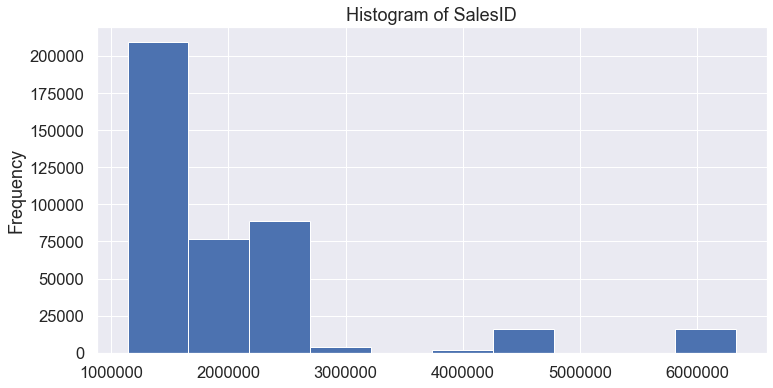

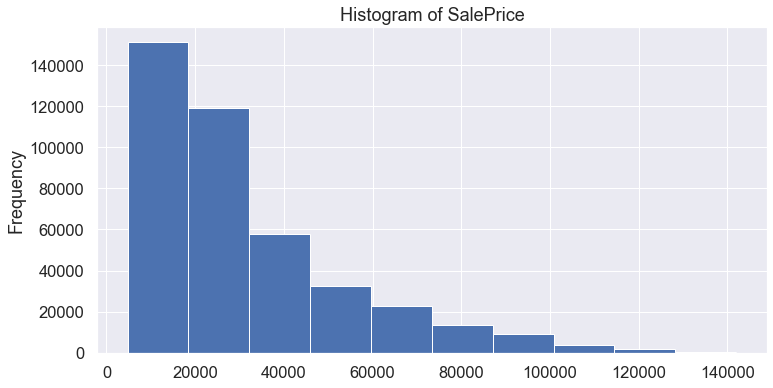

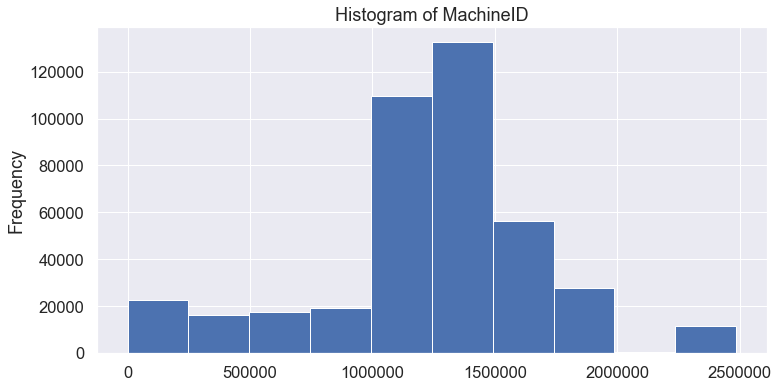

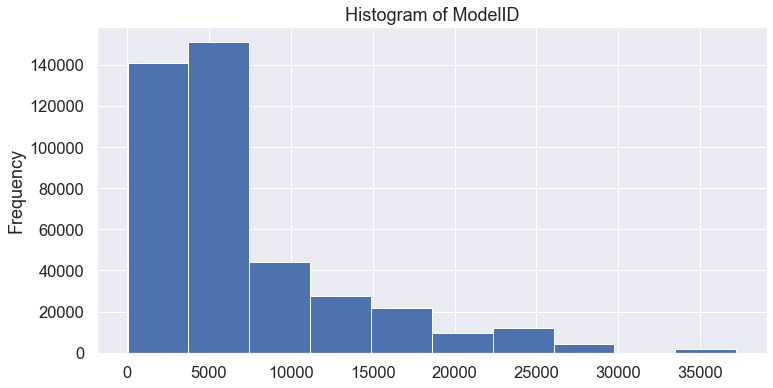

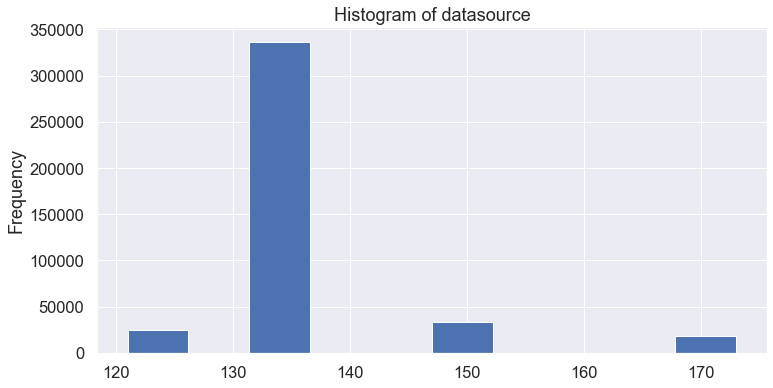

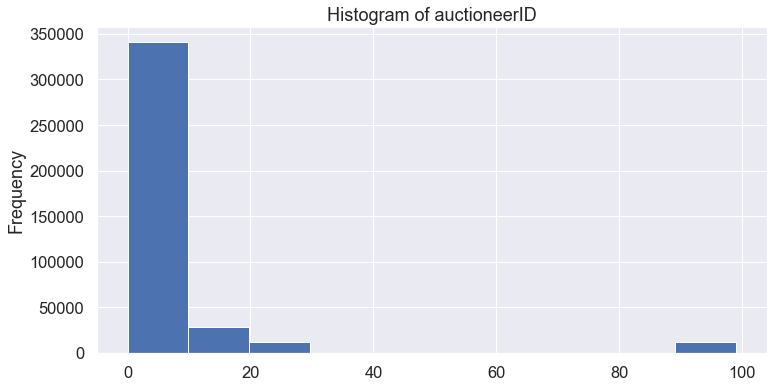

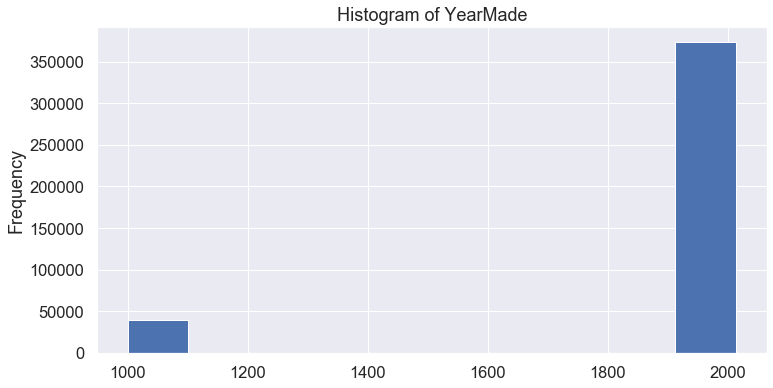

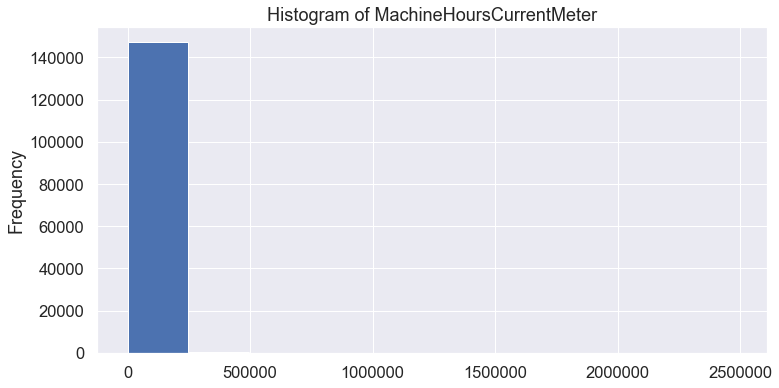

In [10]:
#plotting histograms of numerical data
for i in num_feature_list:
    bulldozers_df[i].plot(kind = "hist", figsize = (12,6))
    plt.title(f"Histogram of {i}")
    plt.show()

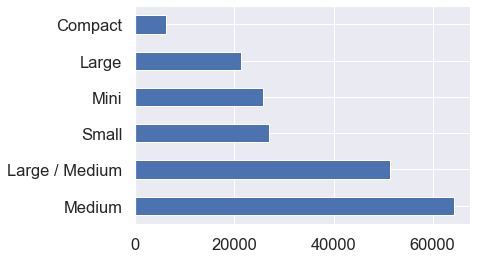

In [11]:
unique = bulldozers_df["ProductSize"].unique()
bulldozers_df["ProductSize"].value_counts().plot(kind = "barh");


### Plotting histograms of categorical data

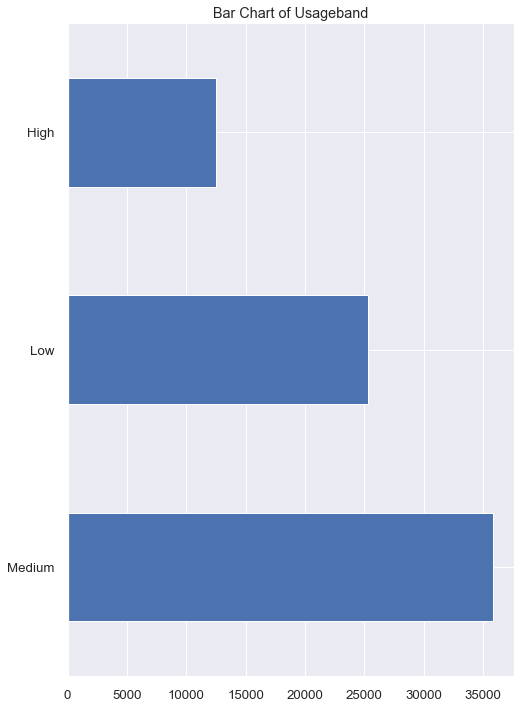

pass fiModelDesc
pass fiBaseModel
pass fiSecondaryDesc
pass fiModelSeries
pass fiModelDescriptor


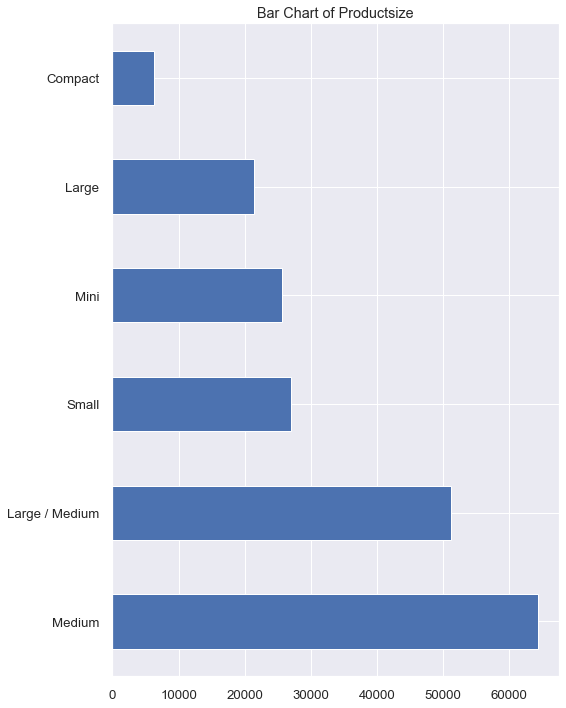

pass fiProductClassDesc


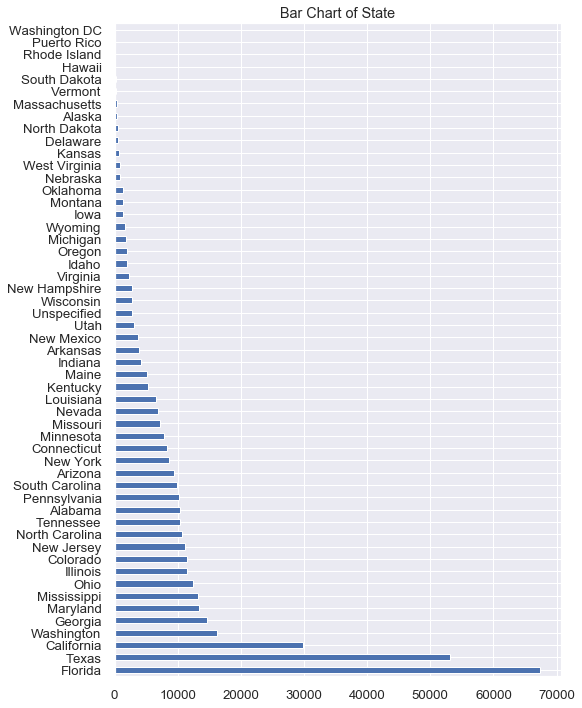

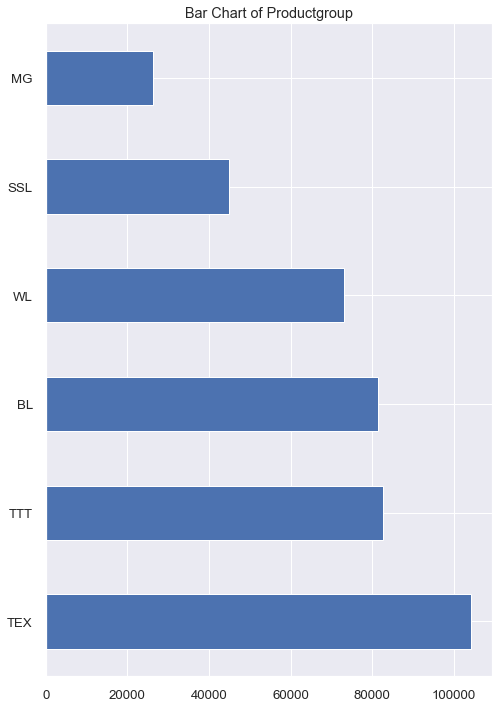

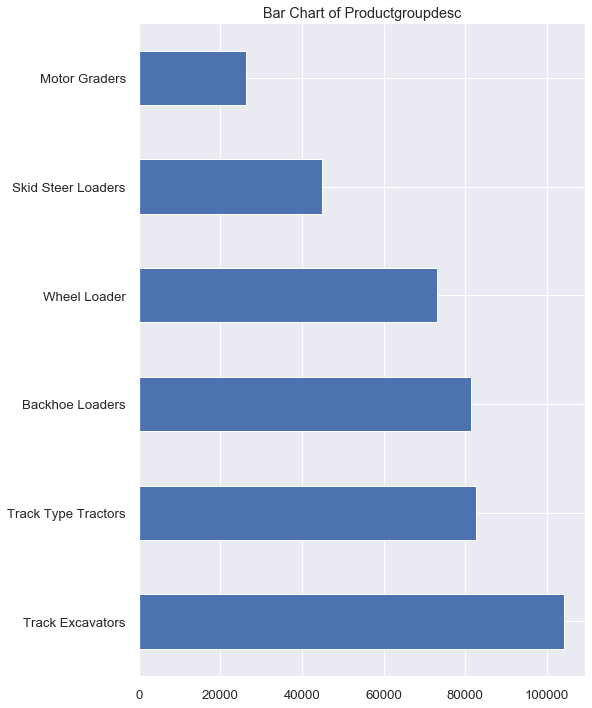

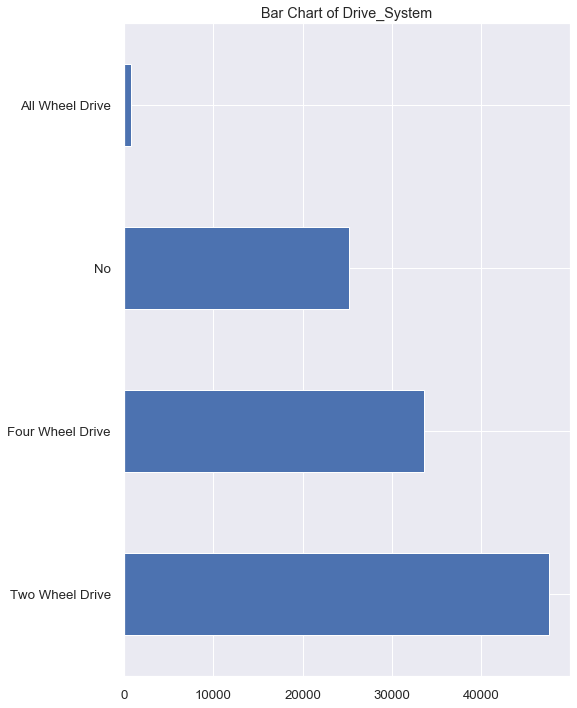

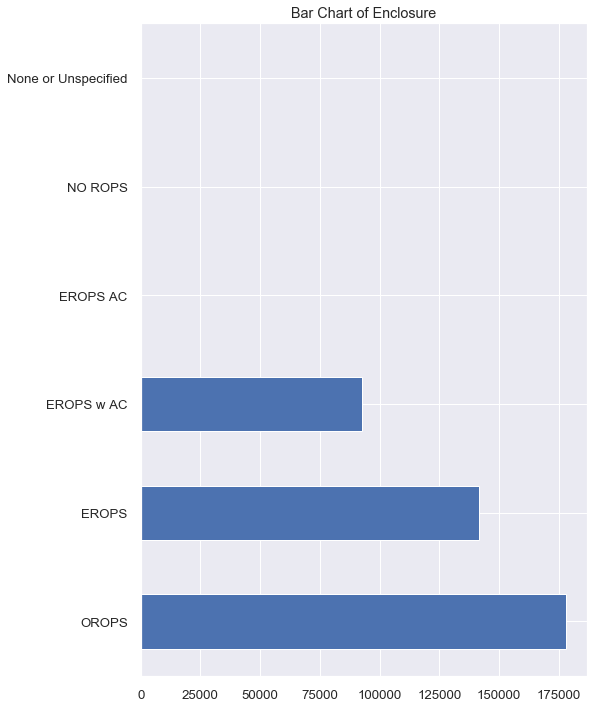

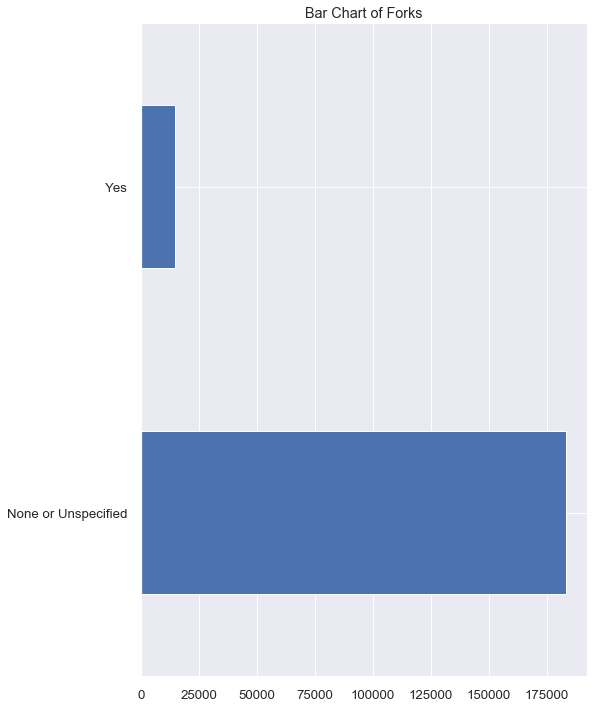

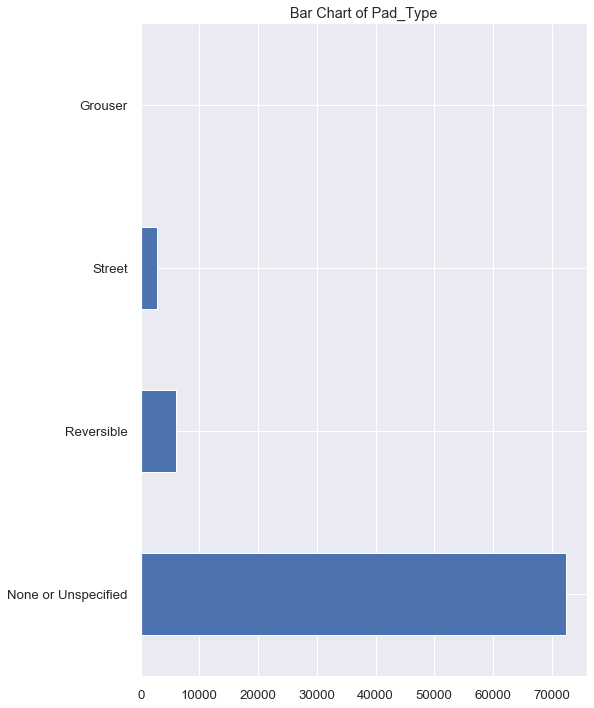

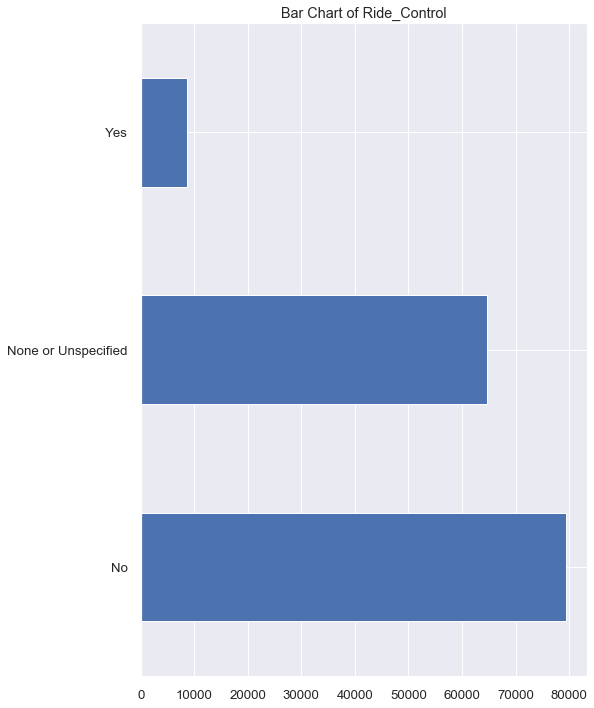

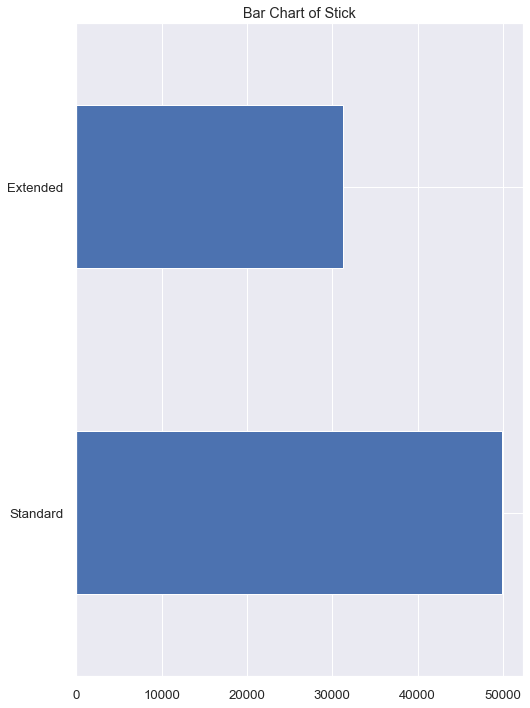

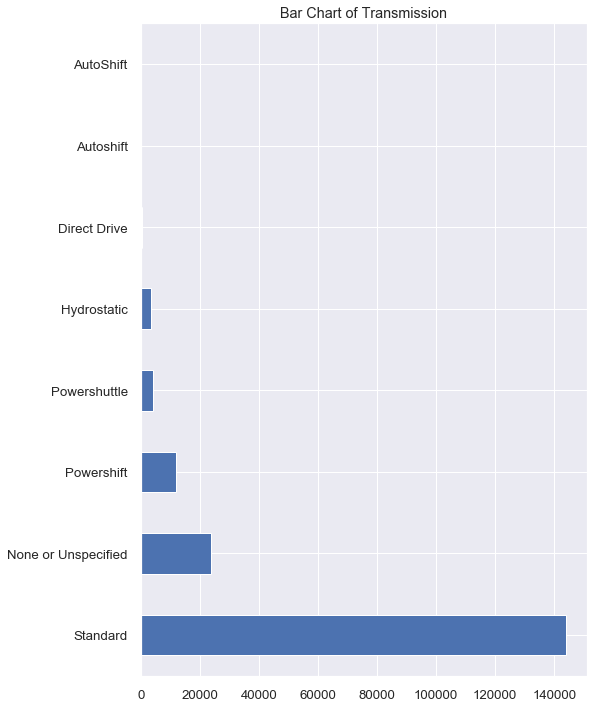

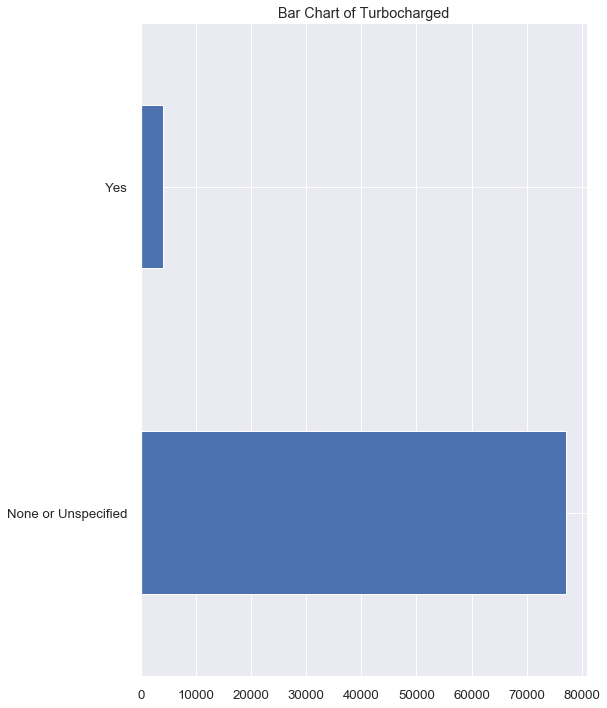

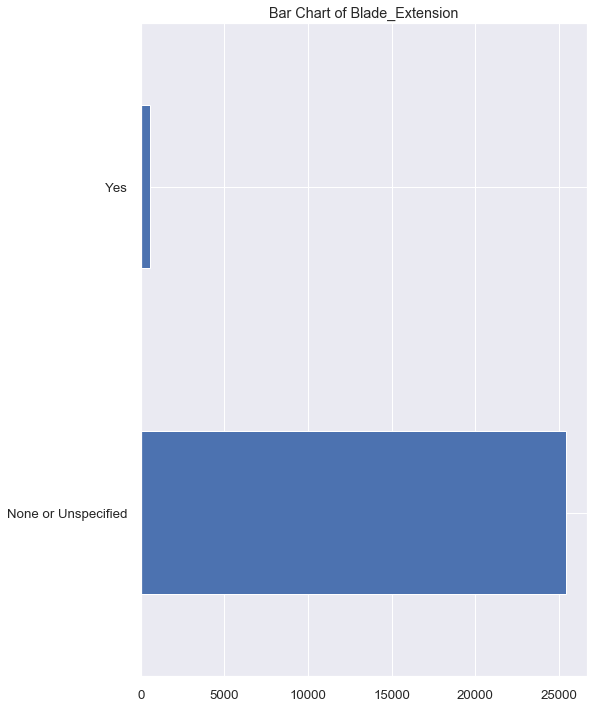

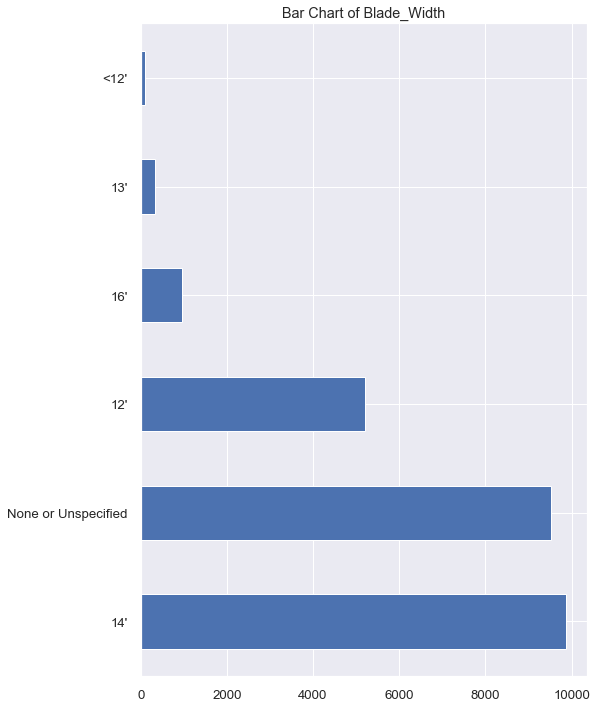

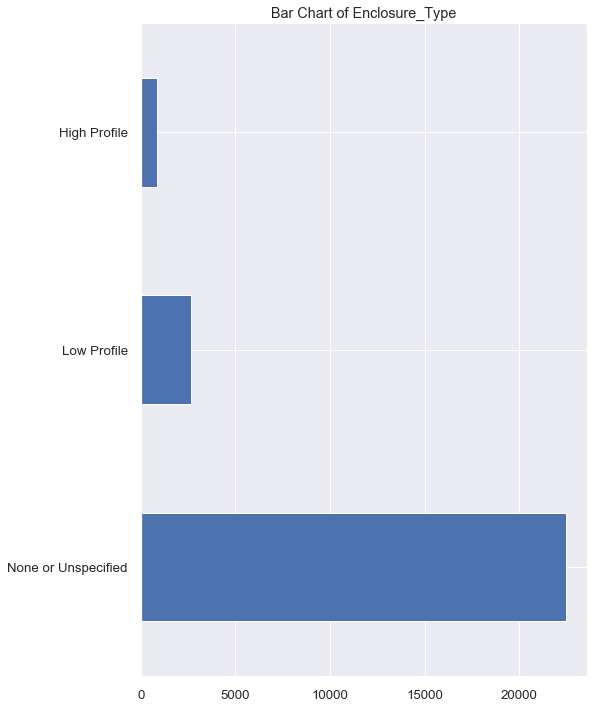

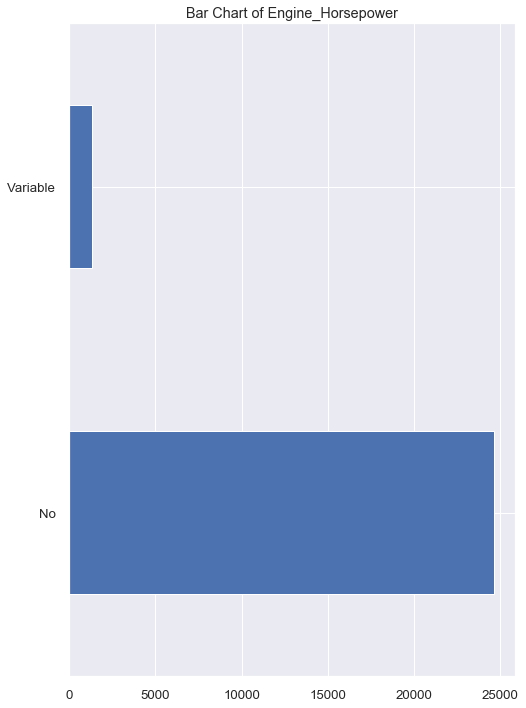

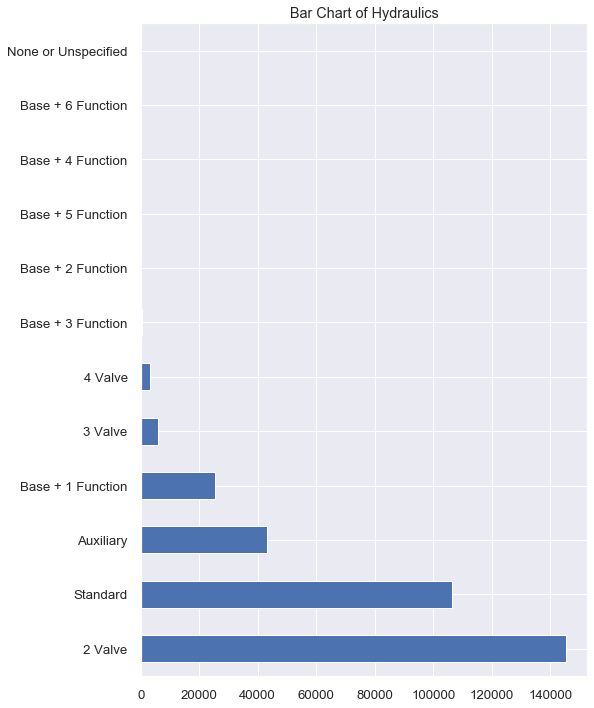

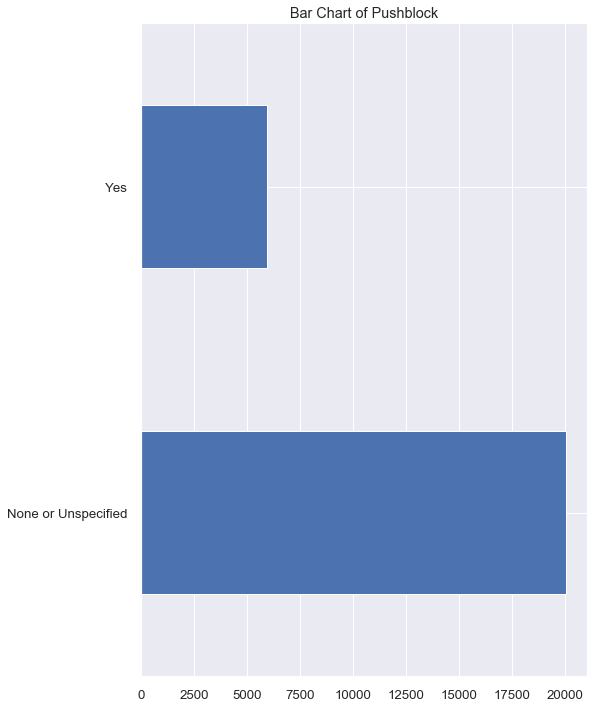

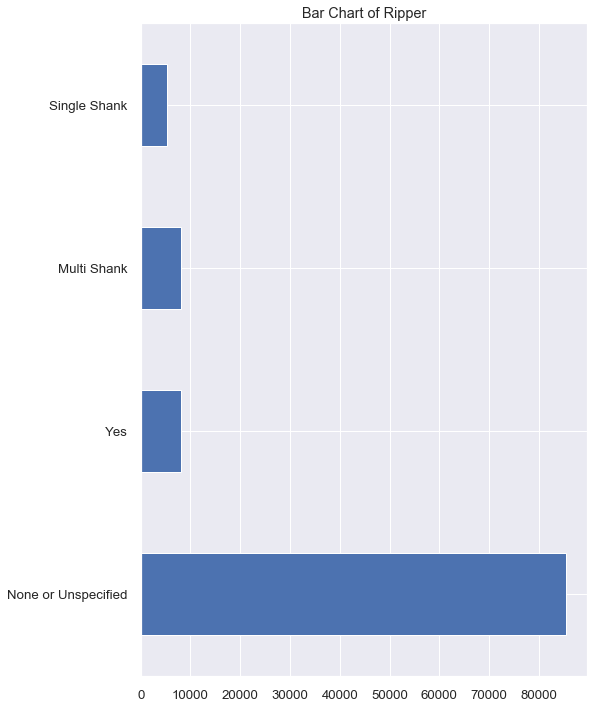

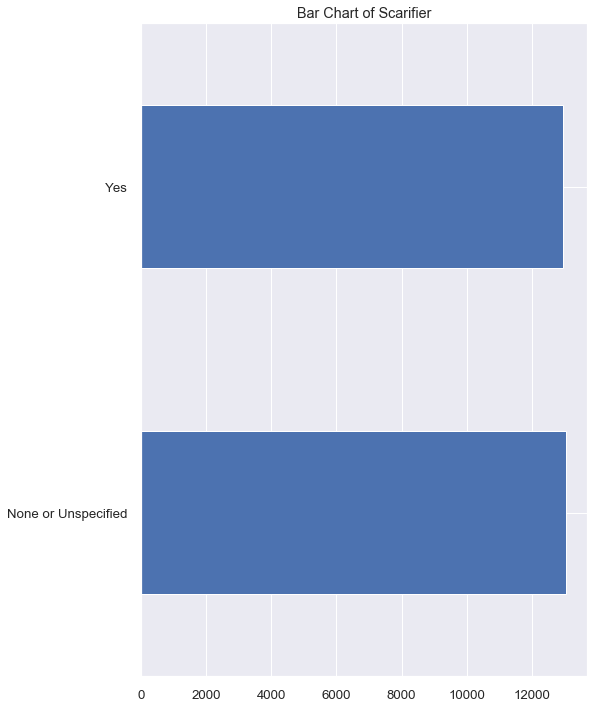

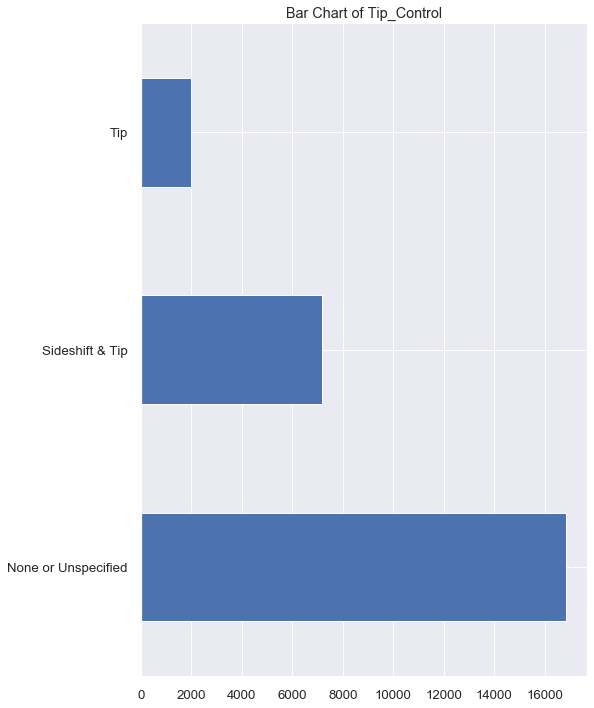

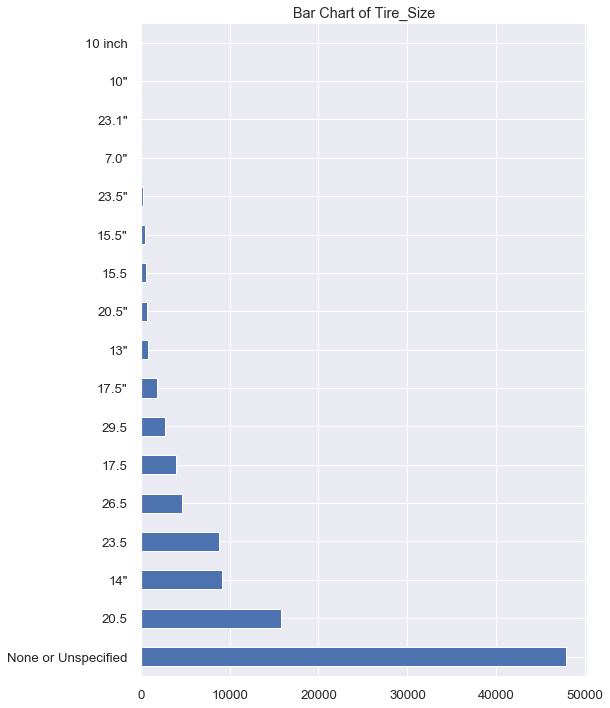

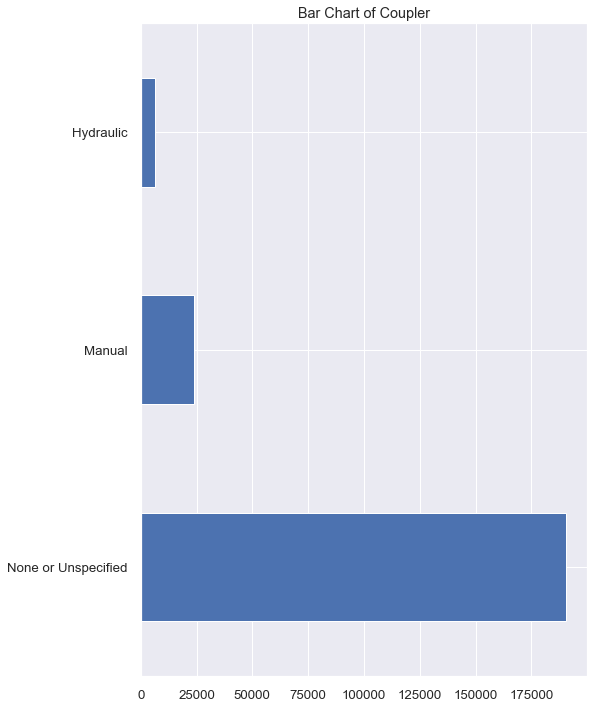

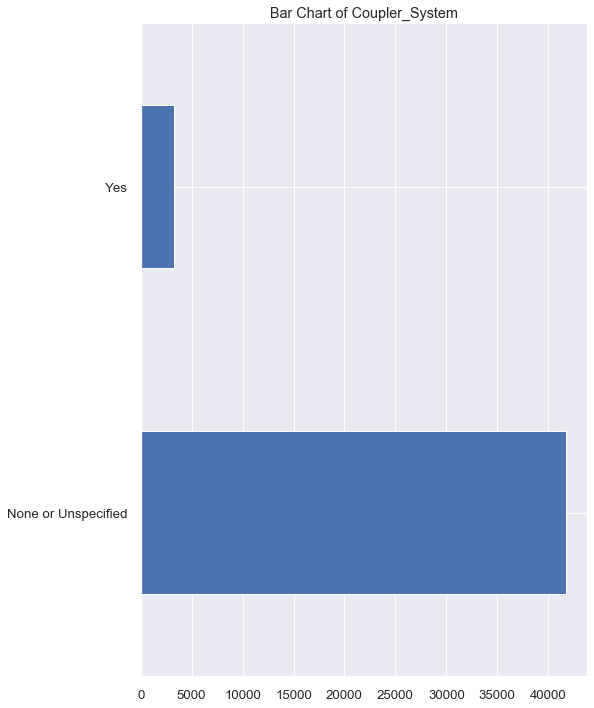

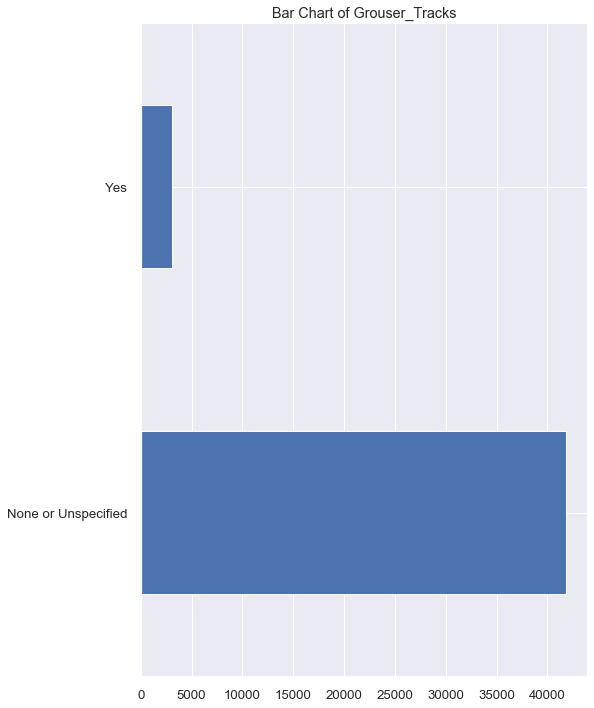

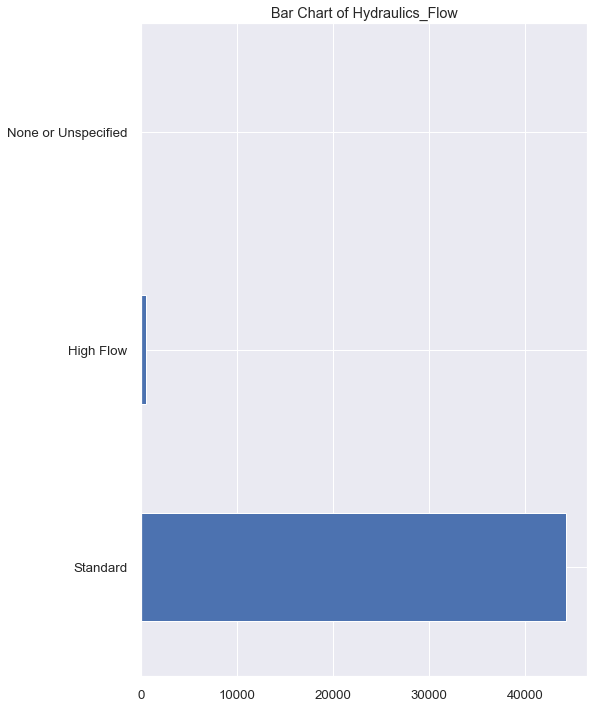

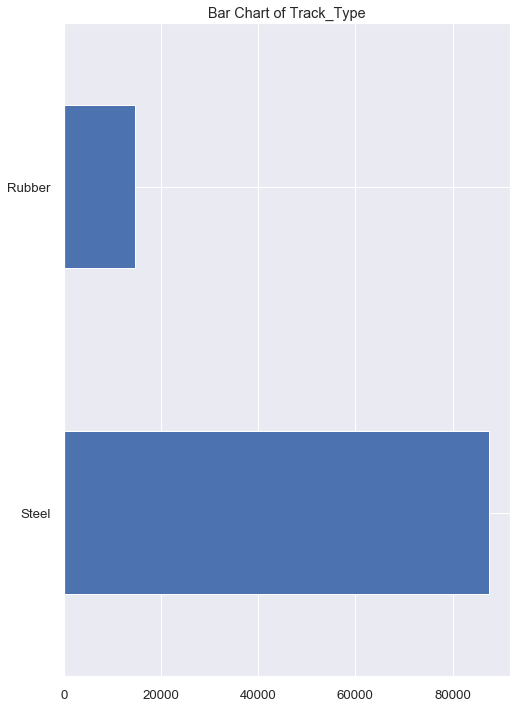

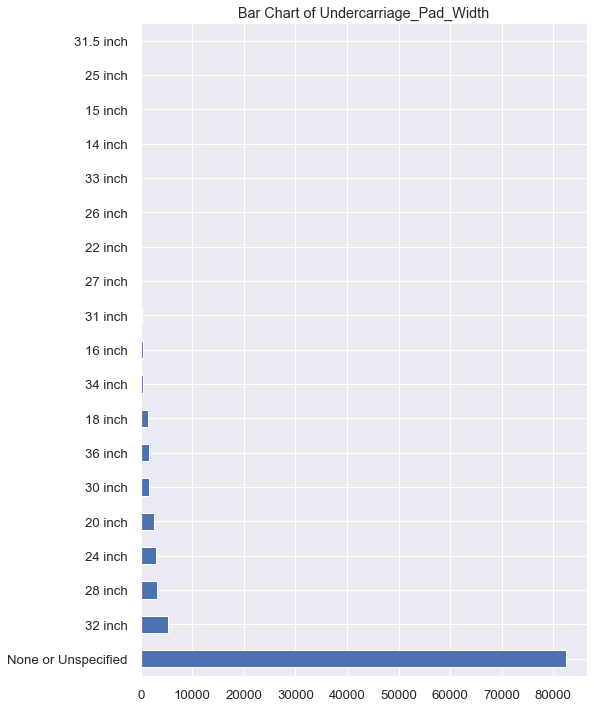

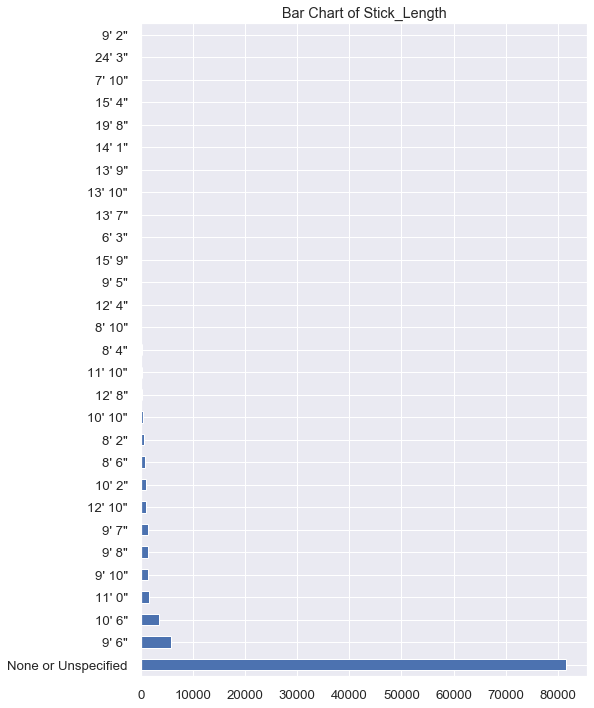

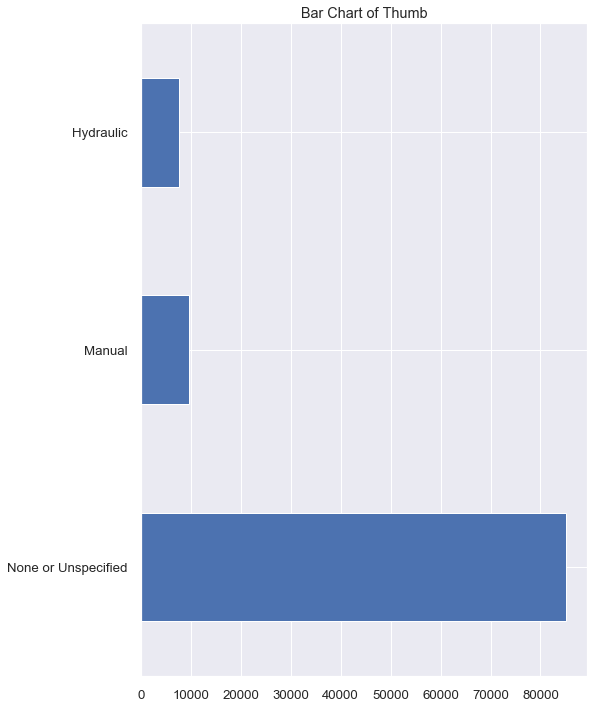

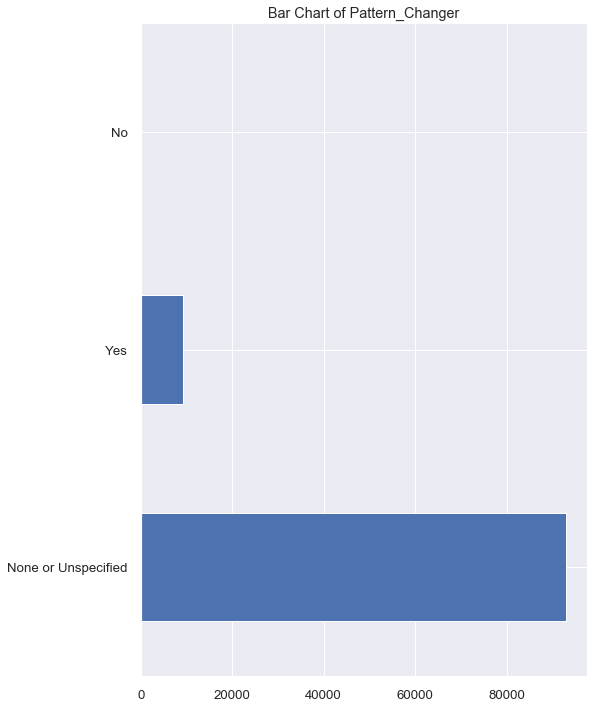

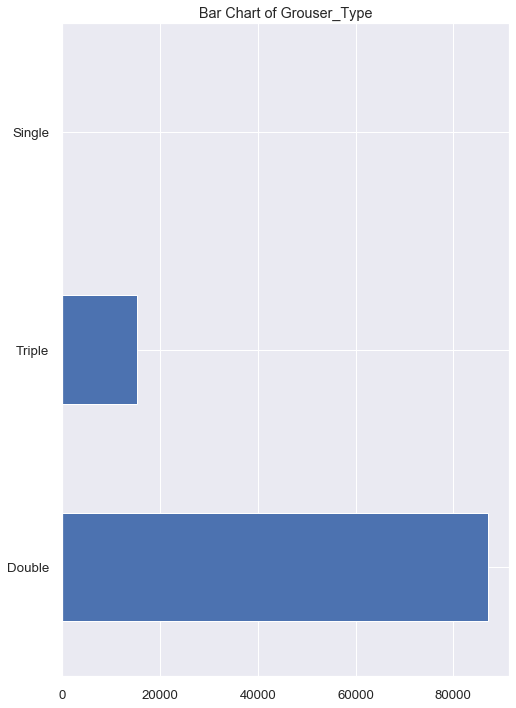

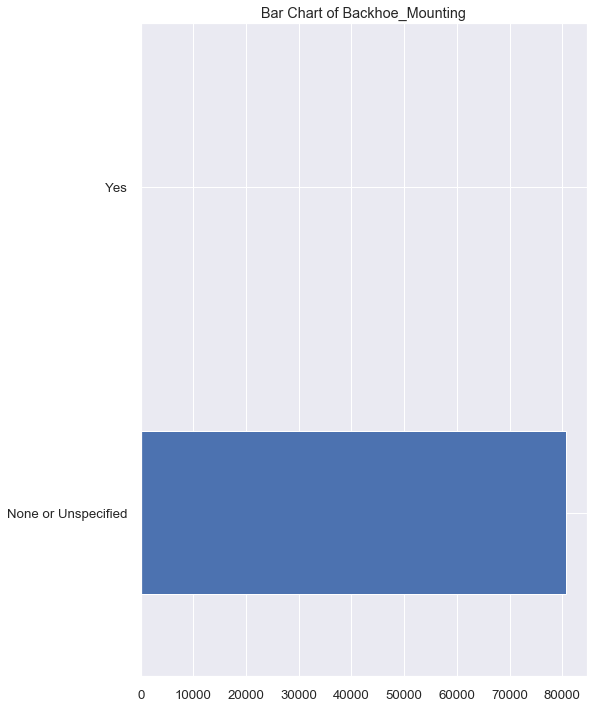

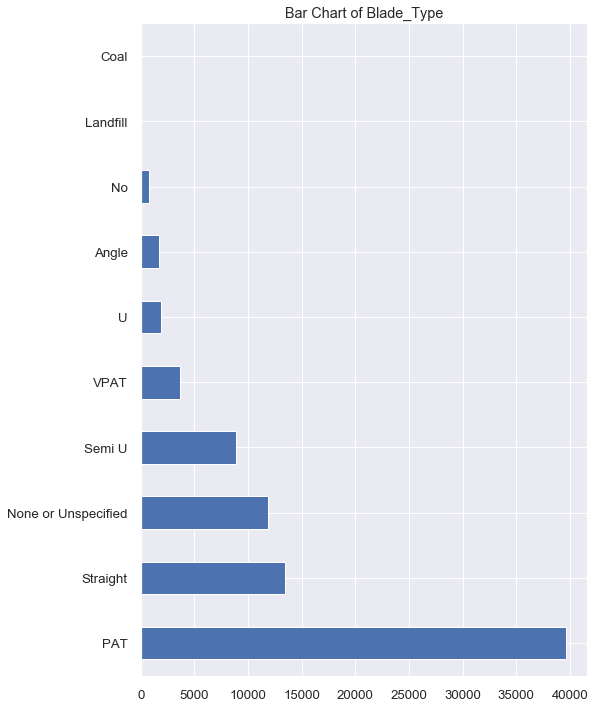

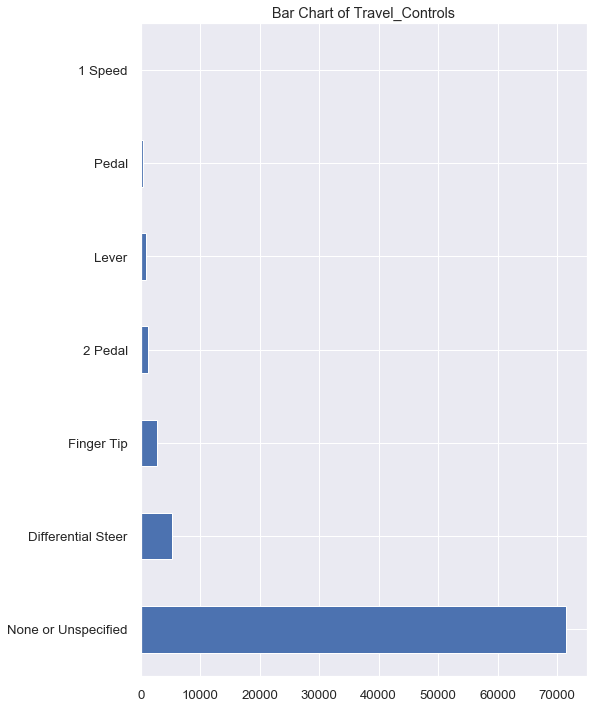

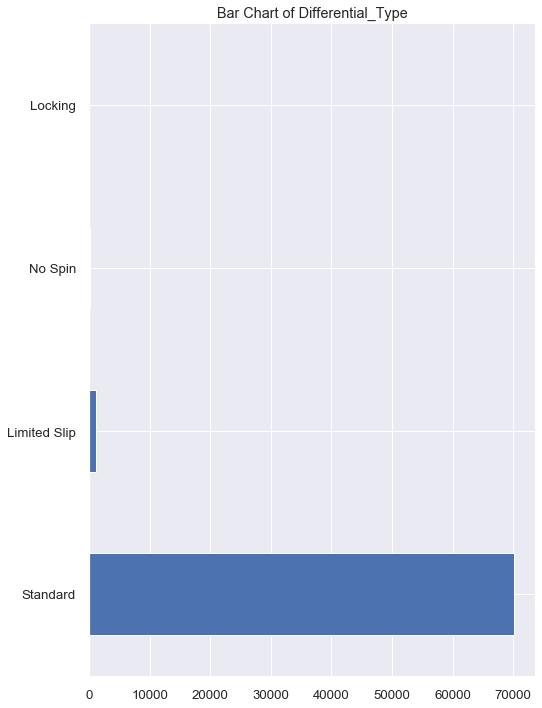

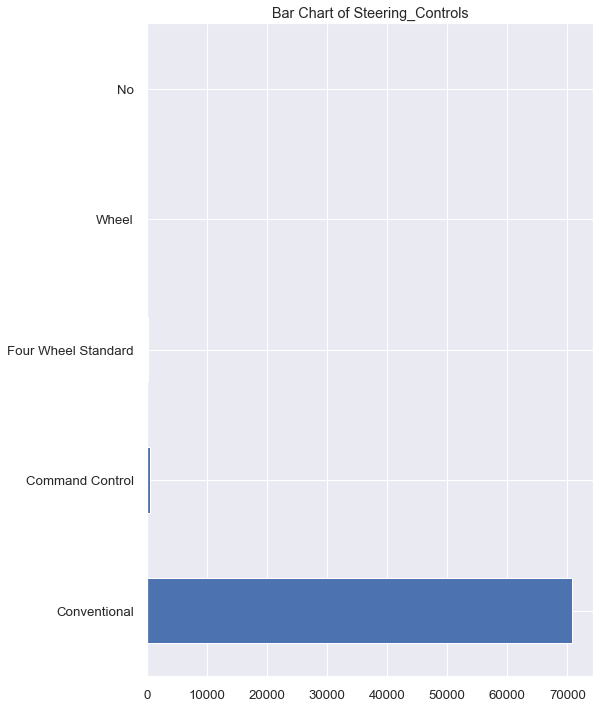

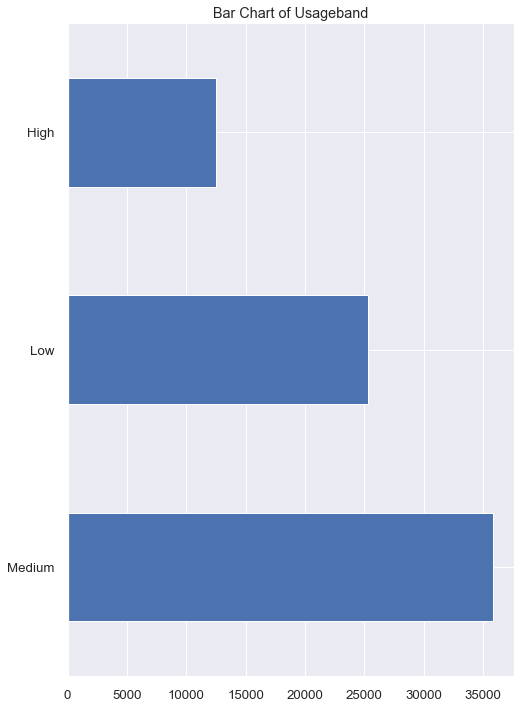

pass fiModelDesc
pass fiBaseModel
pass fiSecondaryDesc
pass fiModelSeries
pass fiModelDescriptor


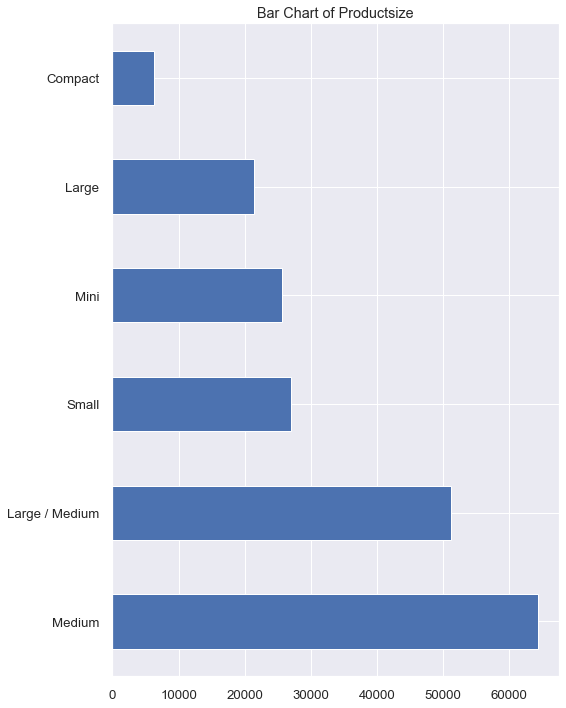

pass fiProductClassDesc


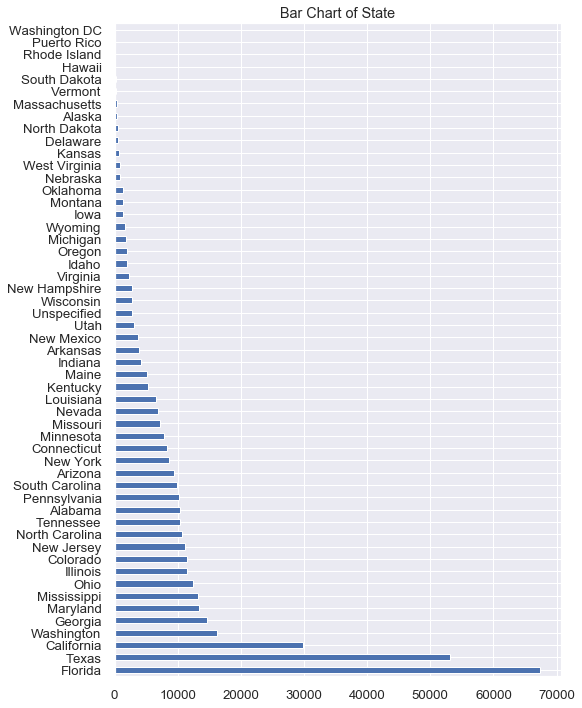

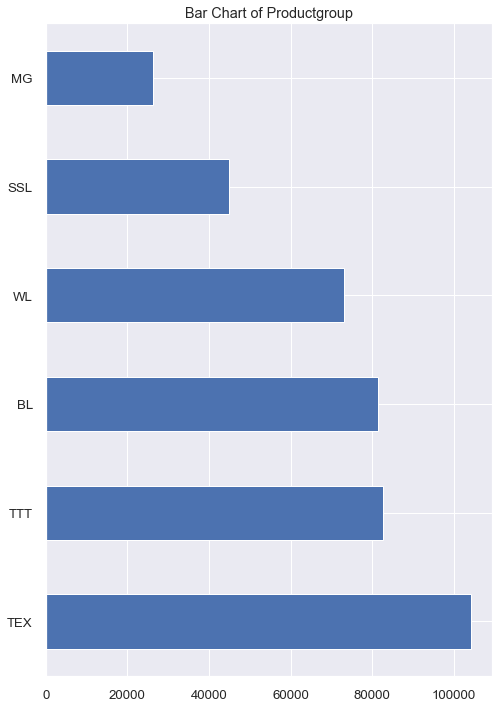

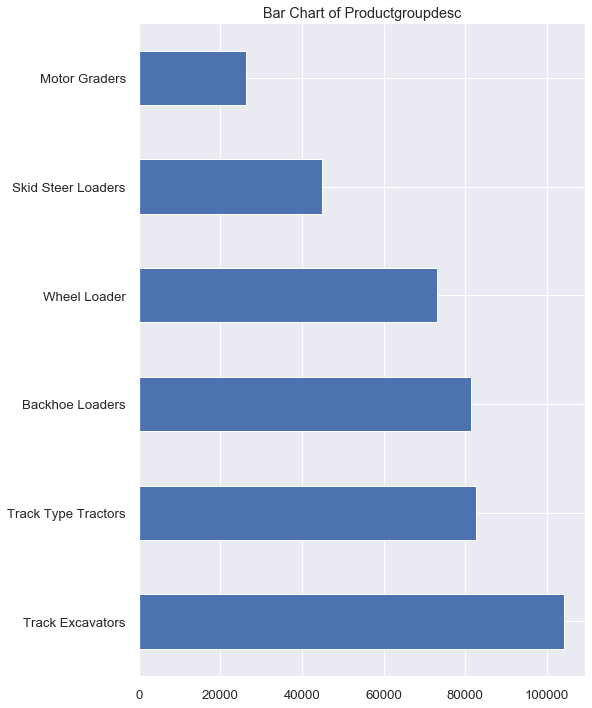

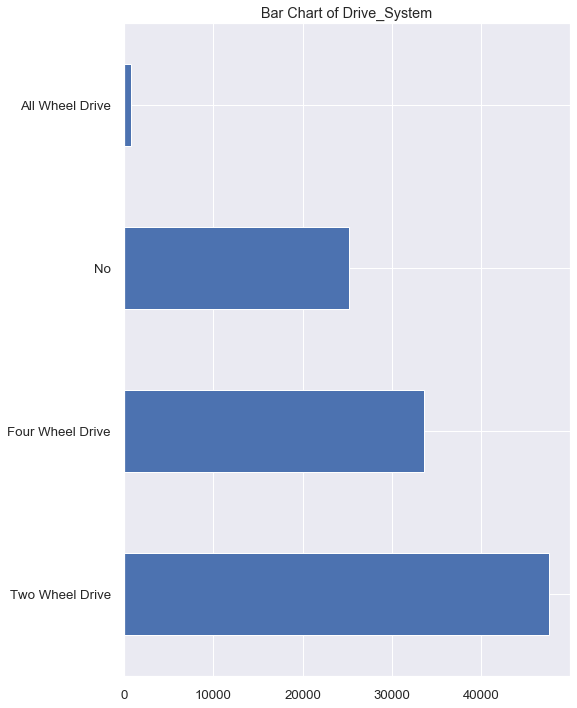

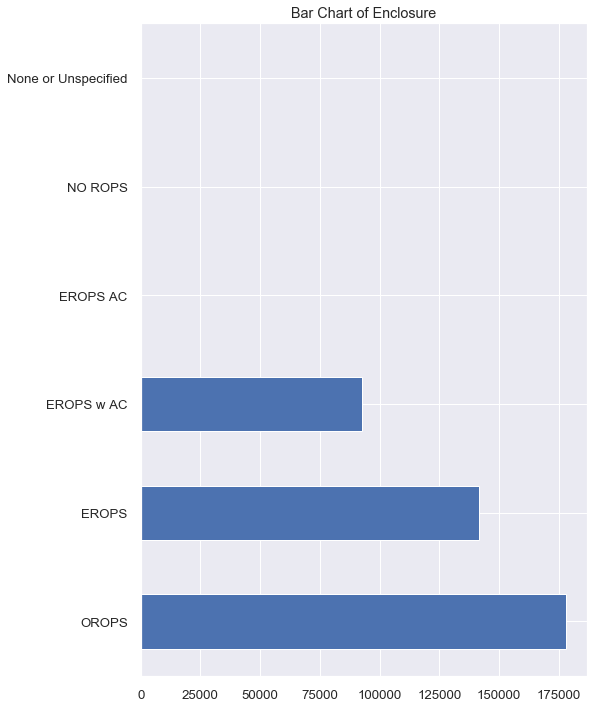

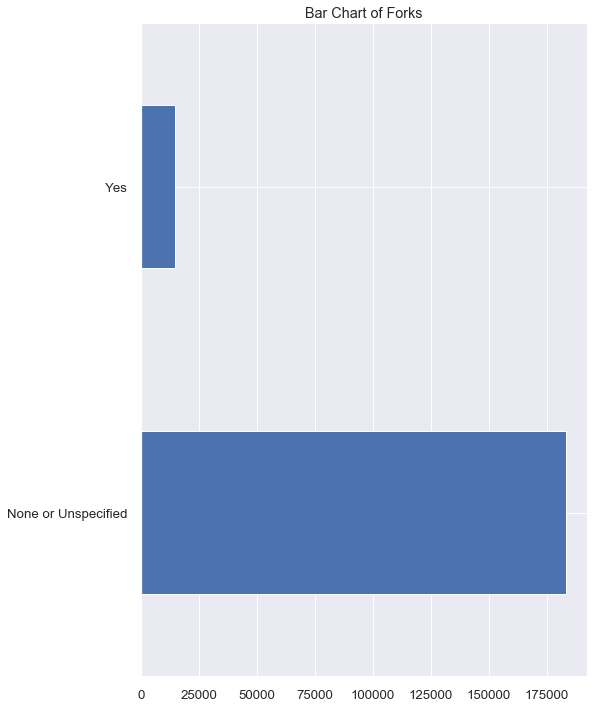

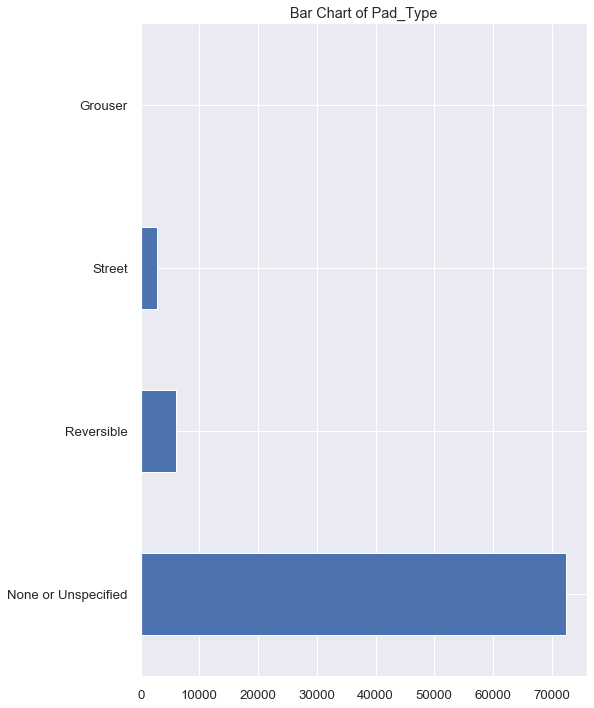

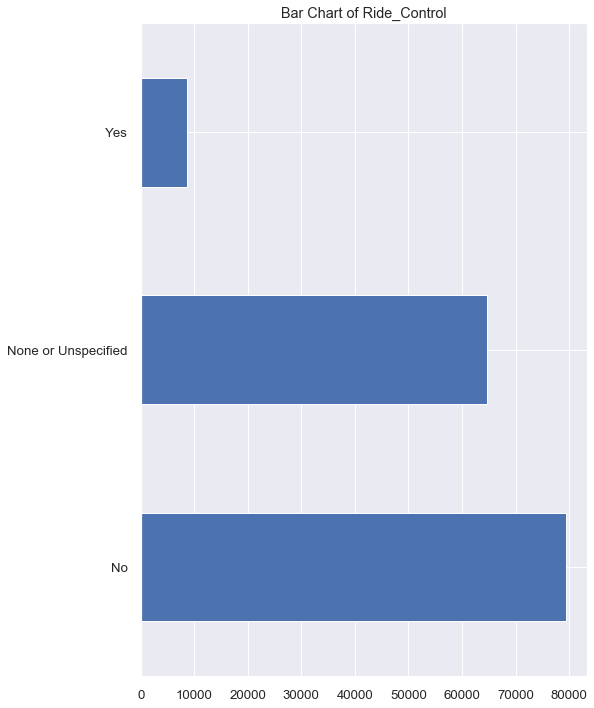

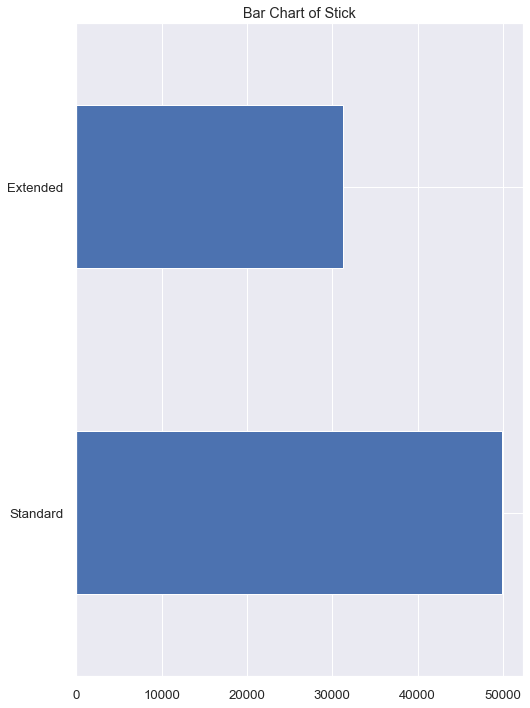

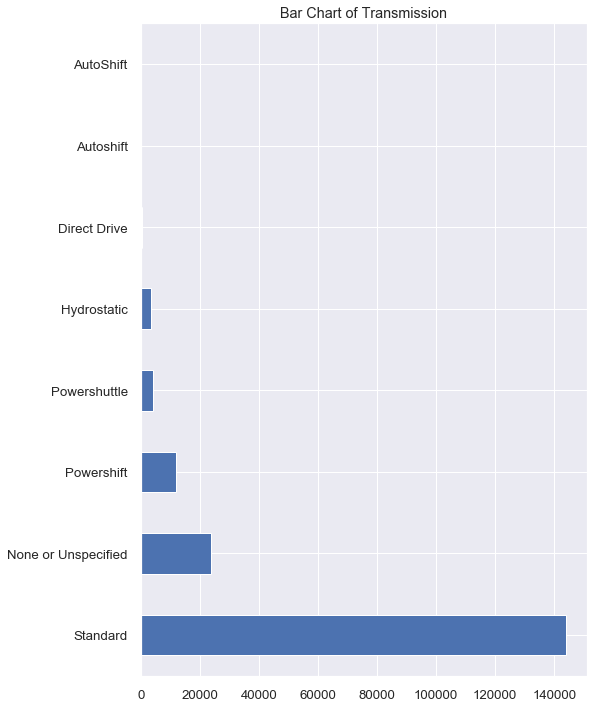

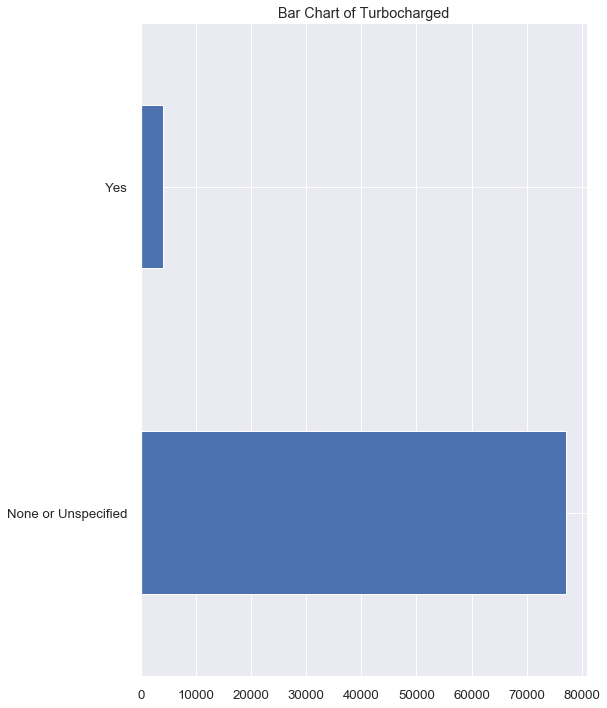

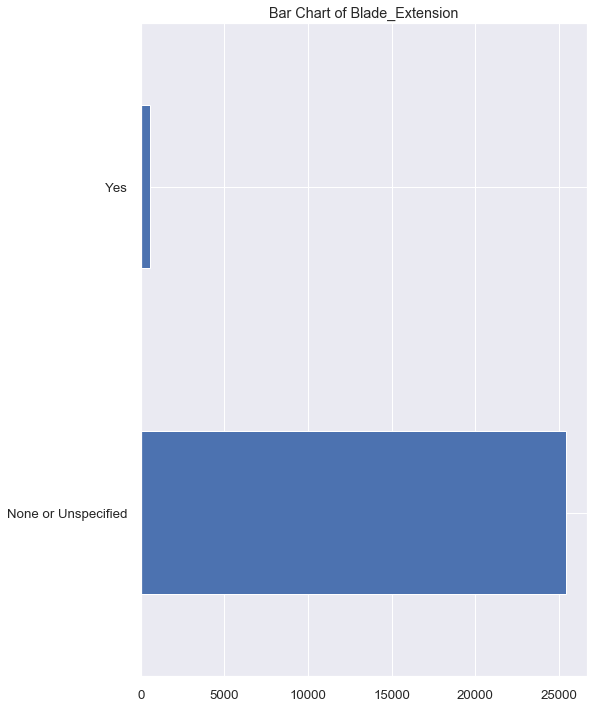

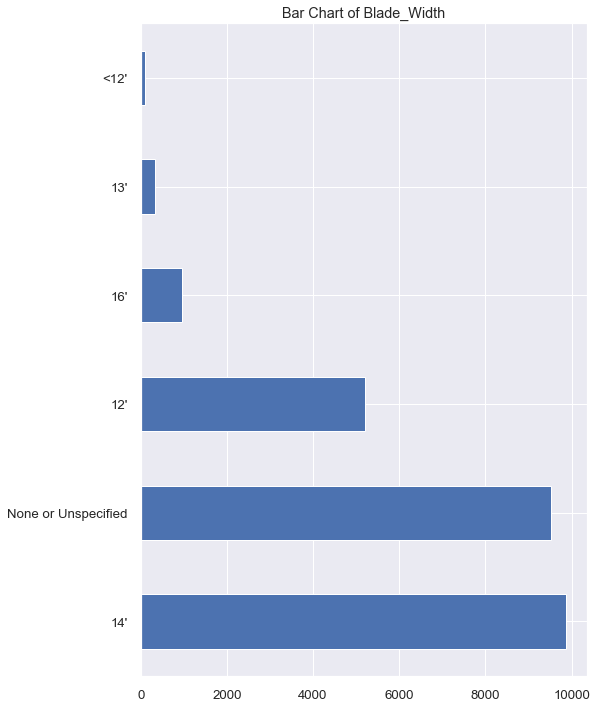

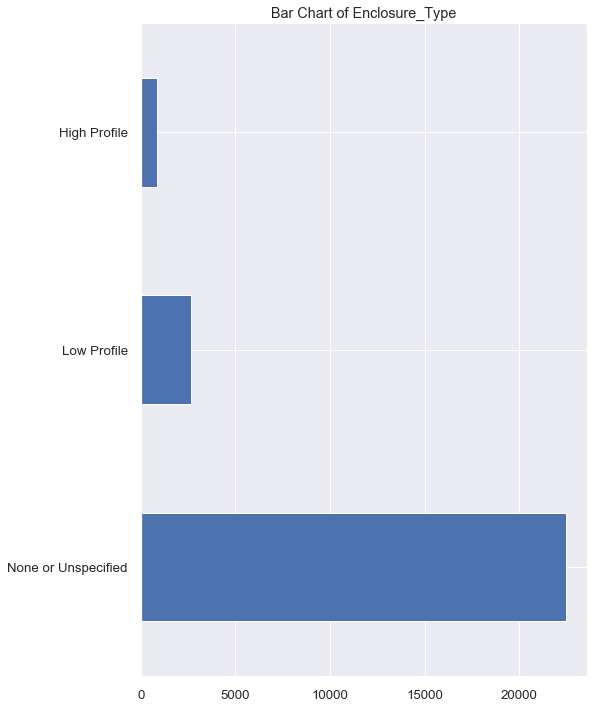

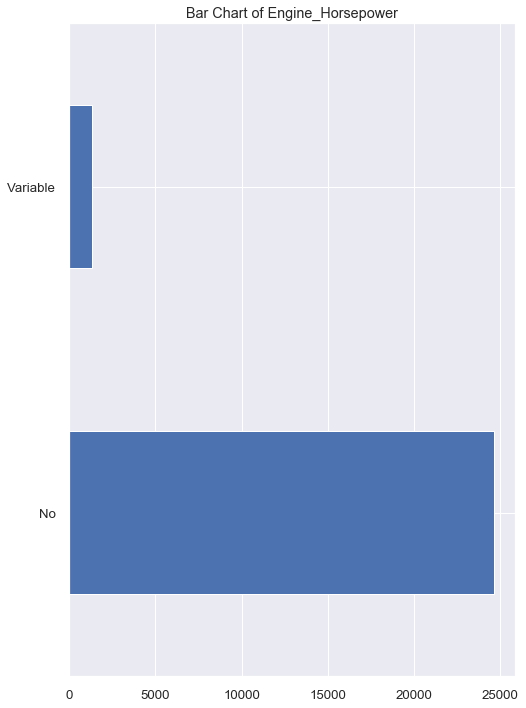

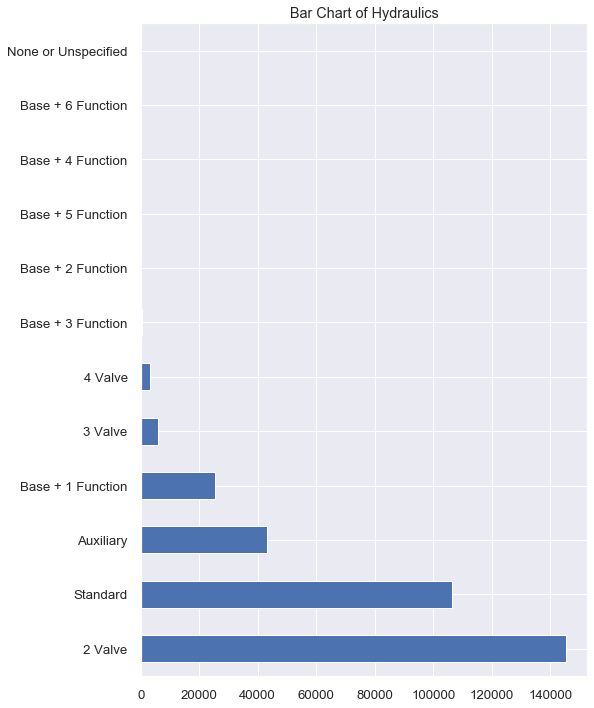

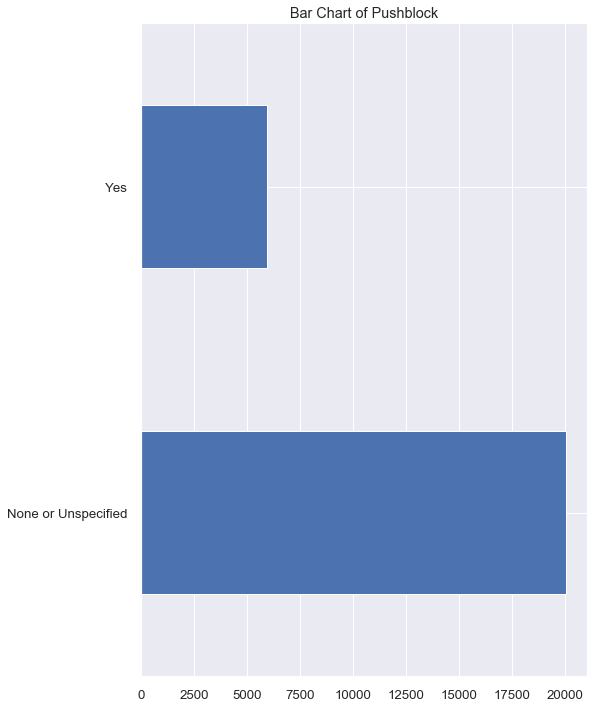

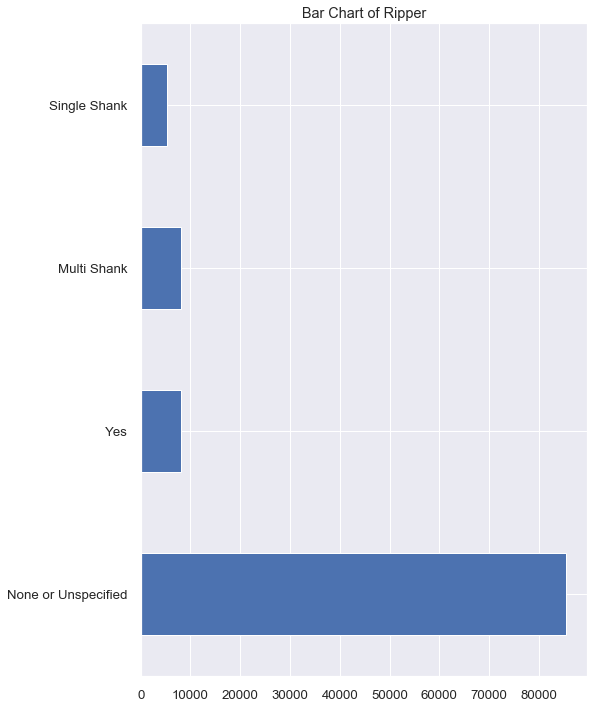

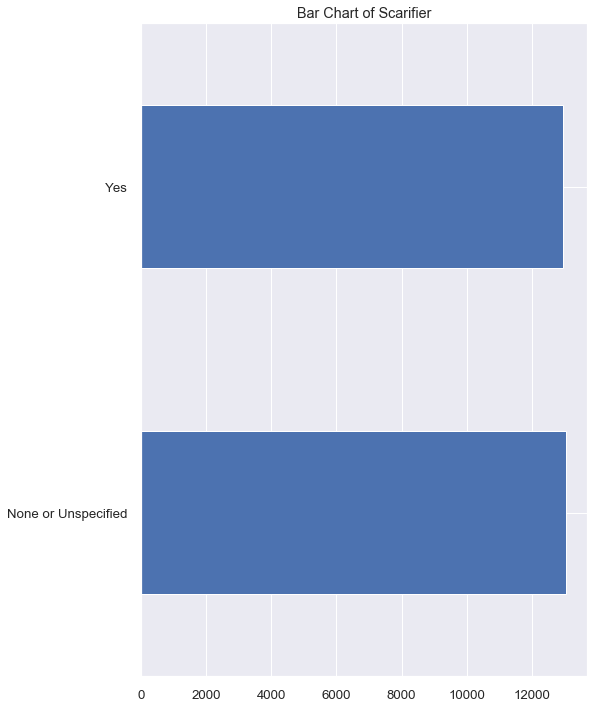

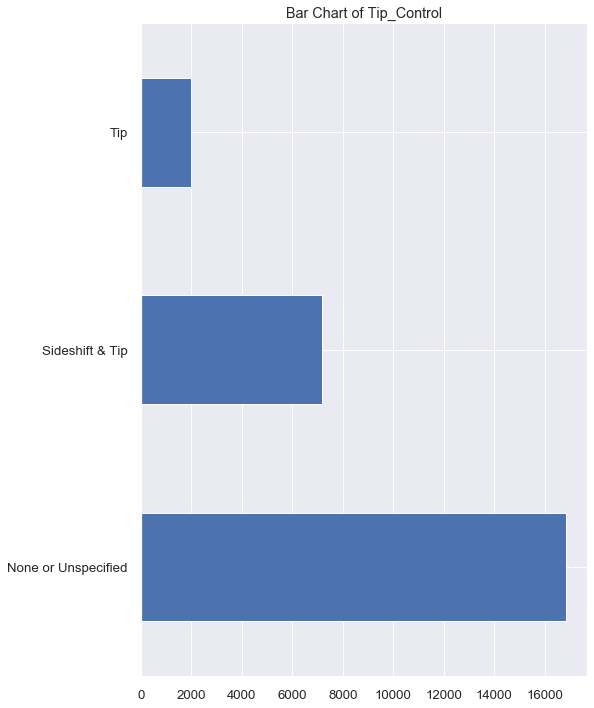

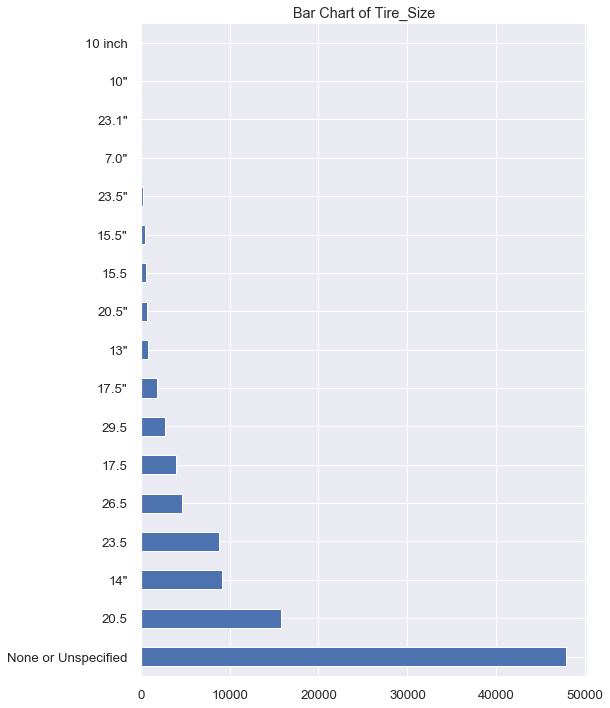

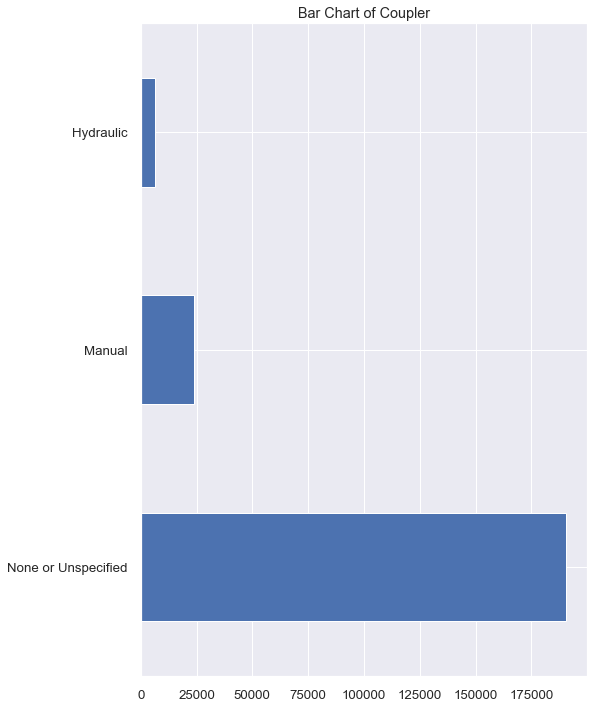

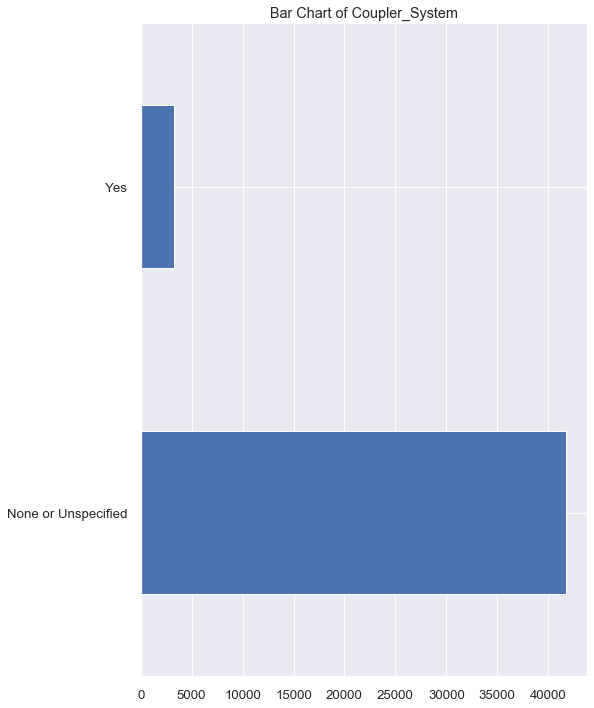

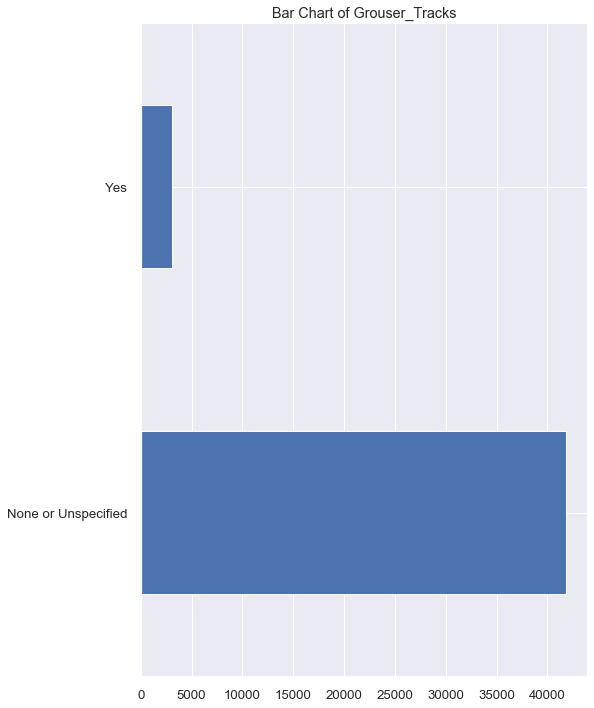

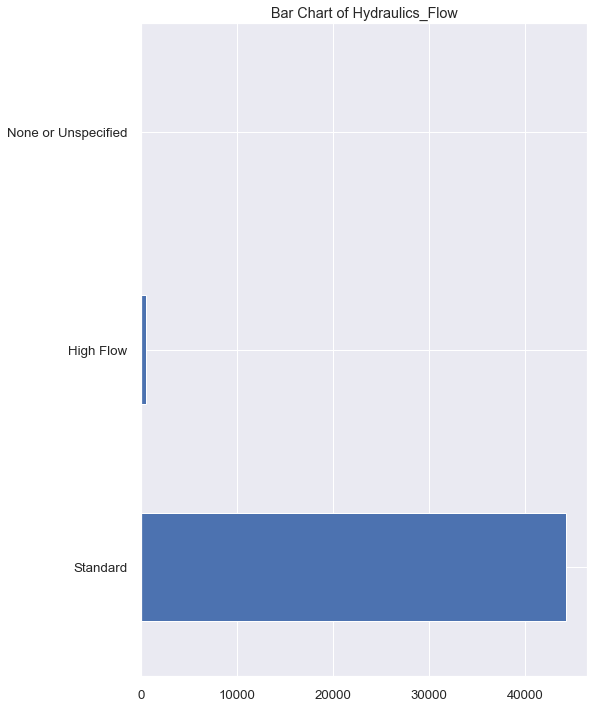

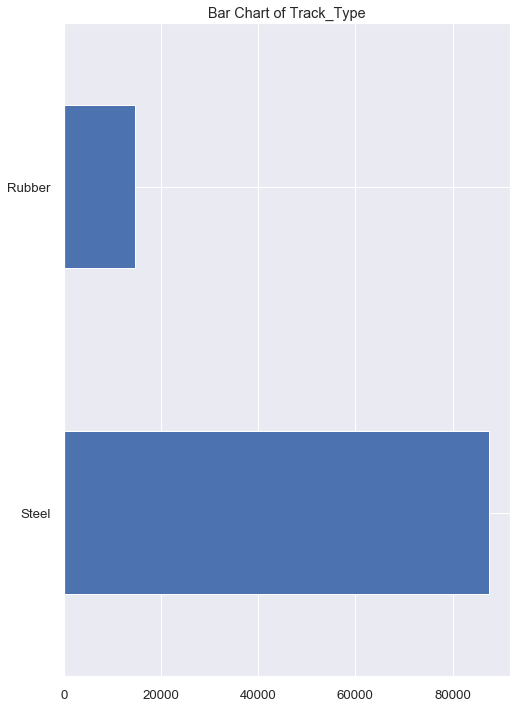

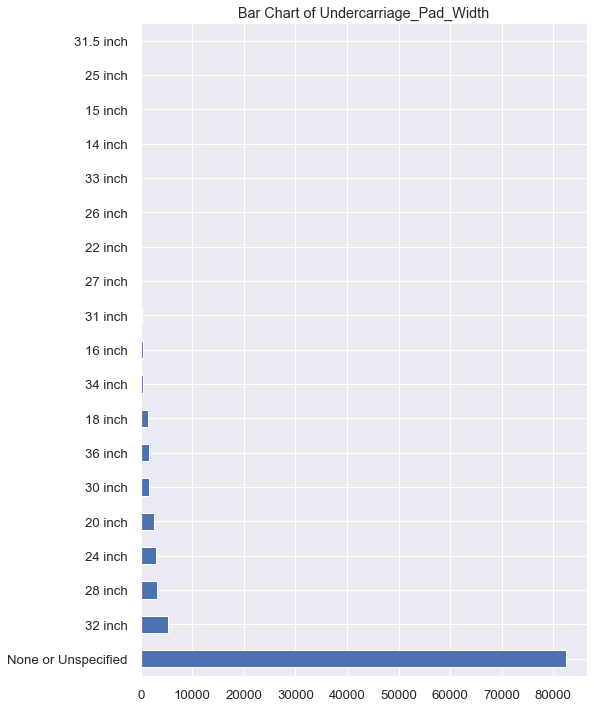

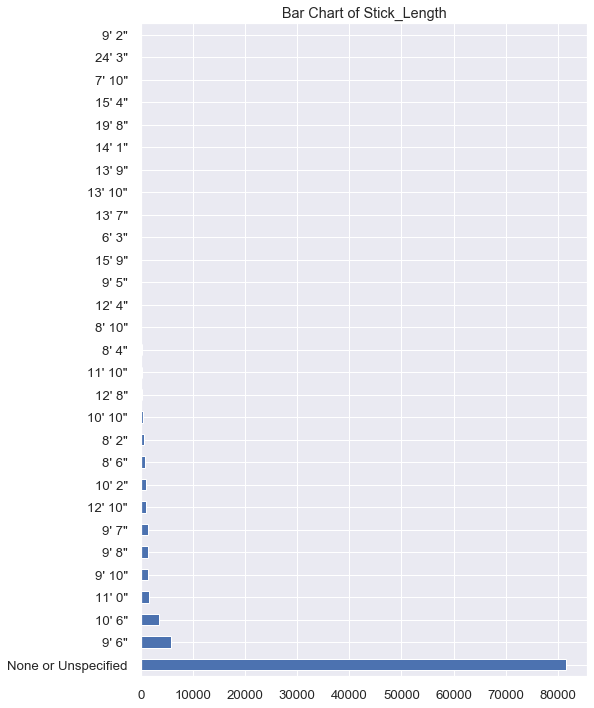

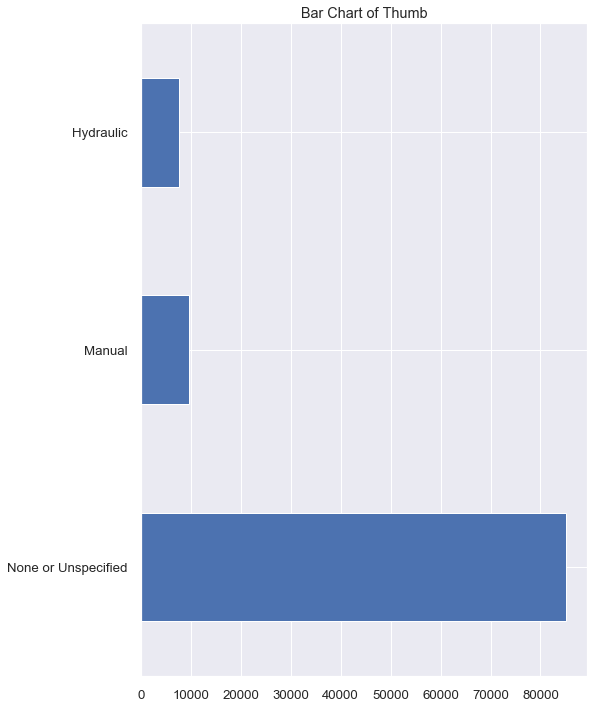

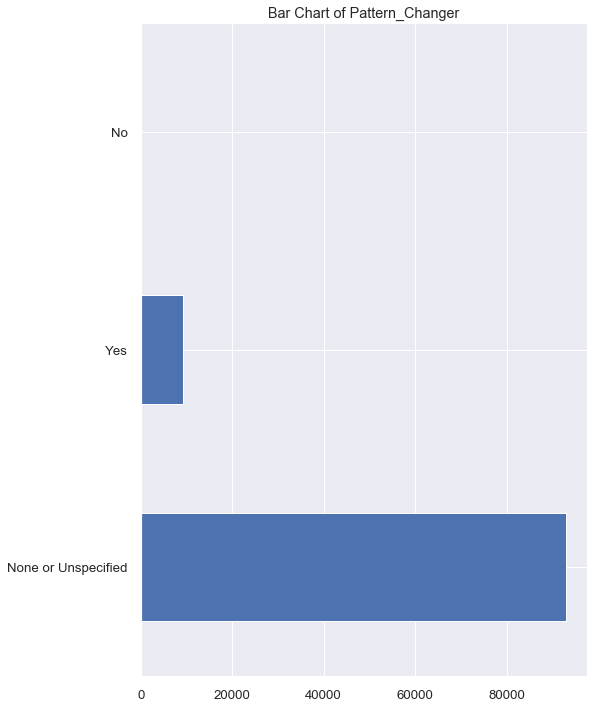

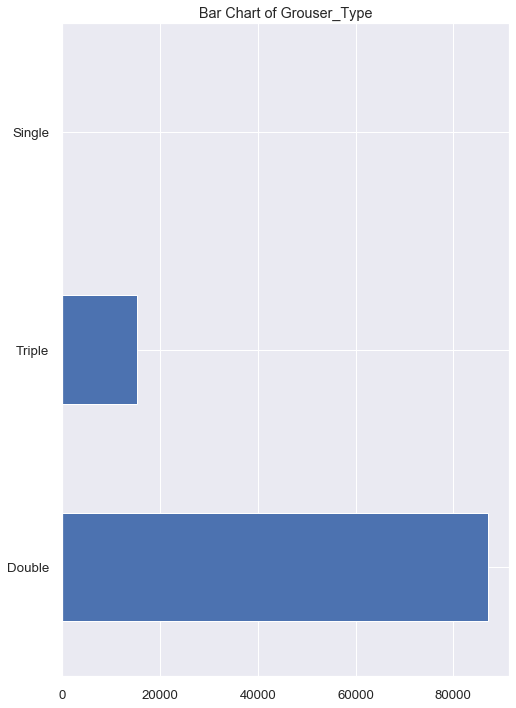

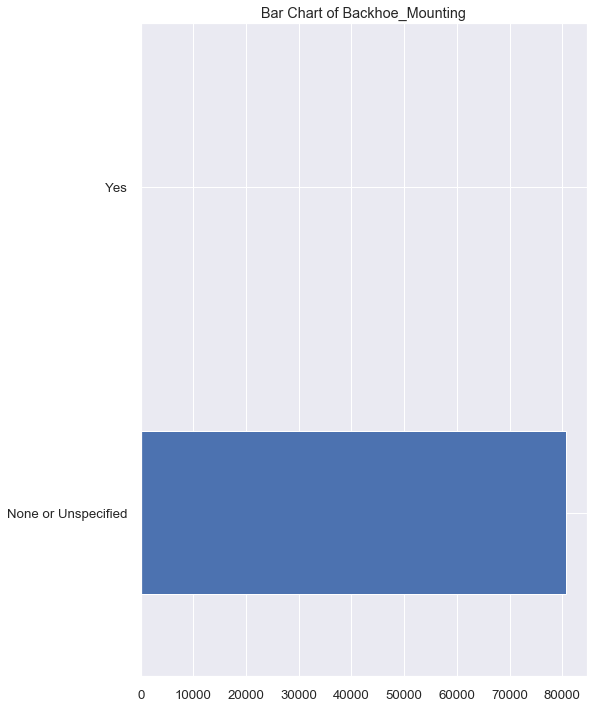

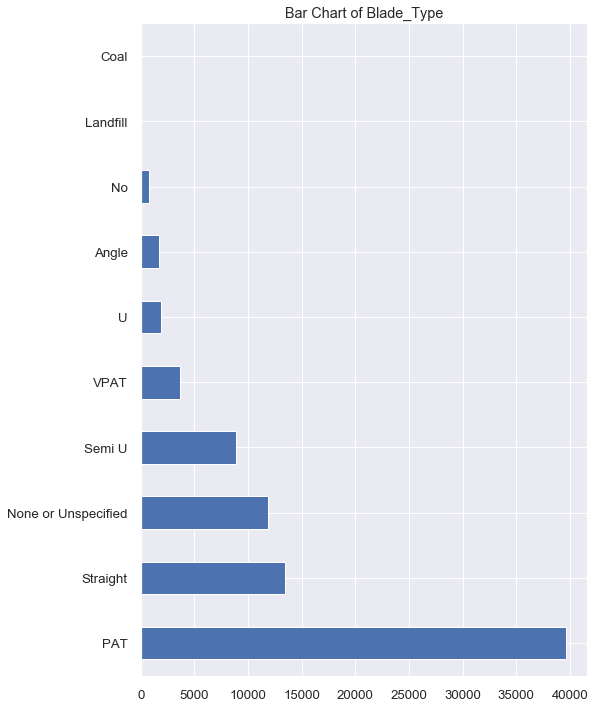

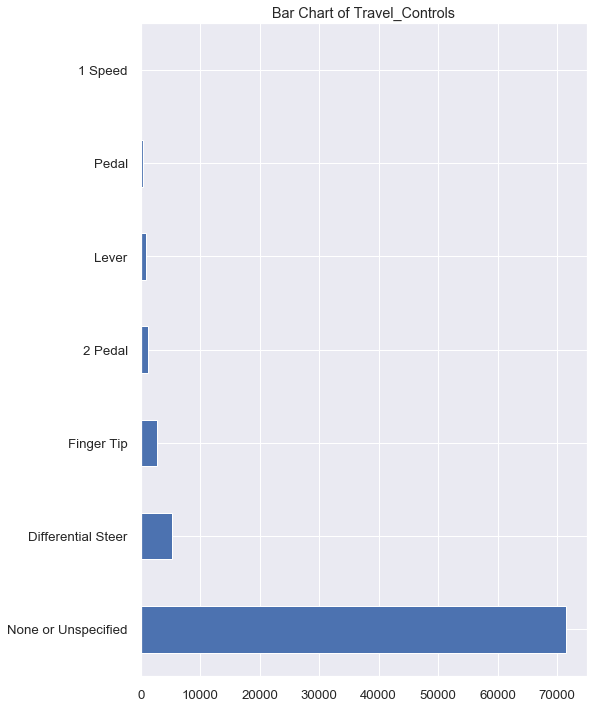

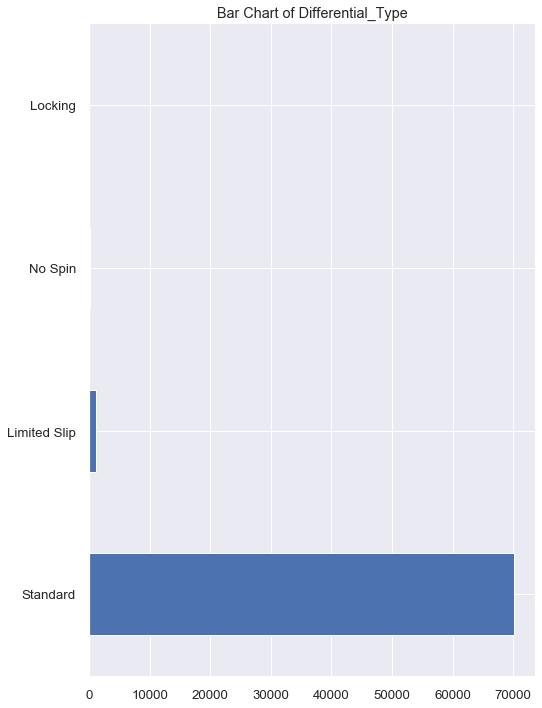

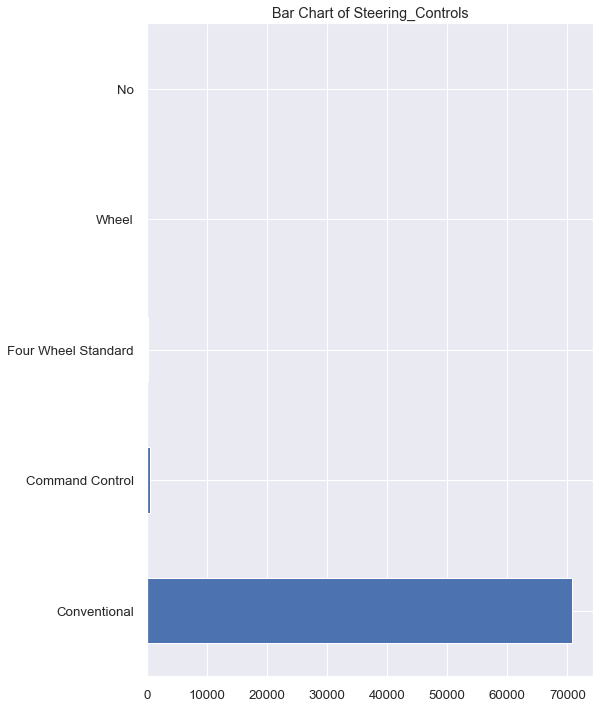

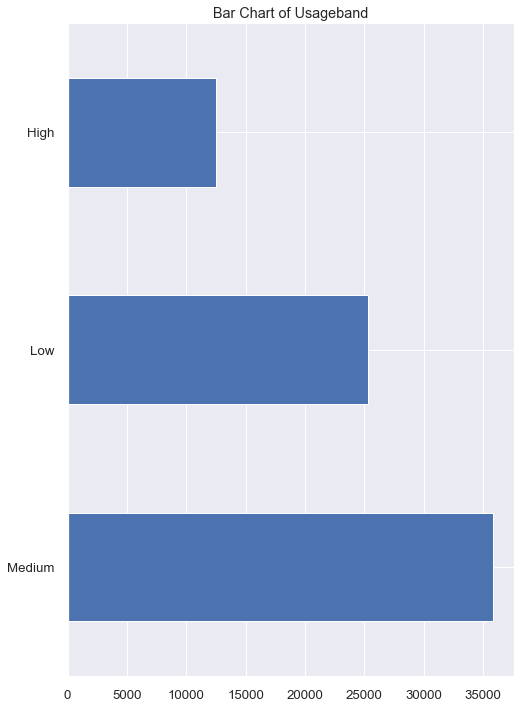

pass fiModelDesc
pass fiBaseModel
pass fiSecondaryDesc
pass fiModelSeries
pass fiModelDescriptor


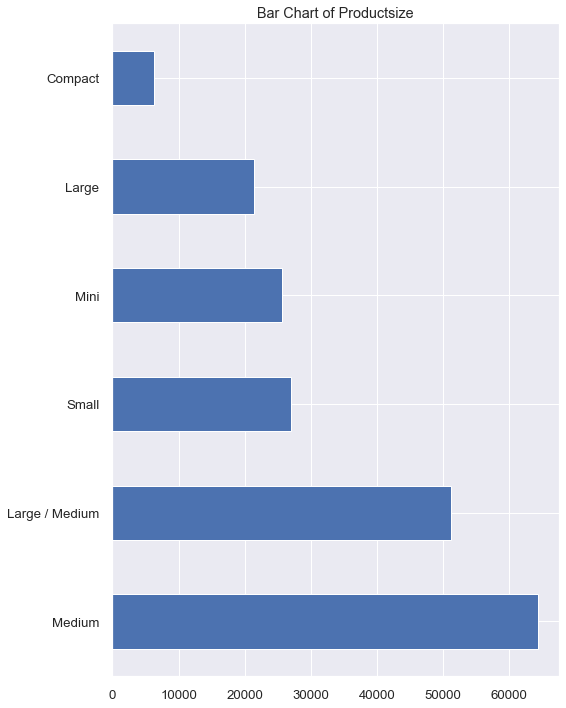

pass fiProductClassDesc


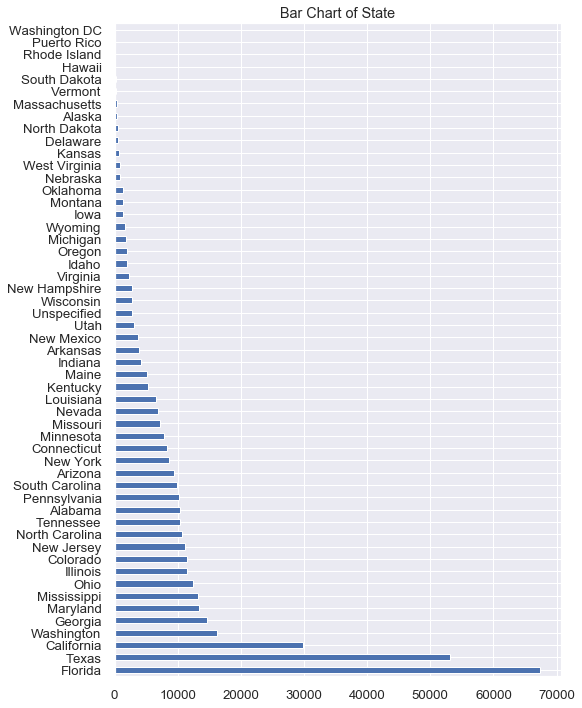

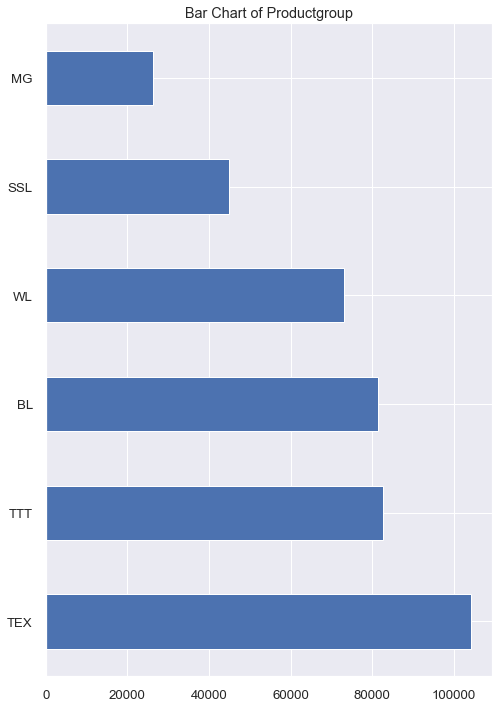

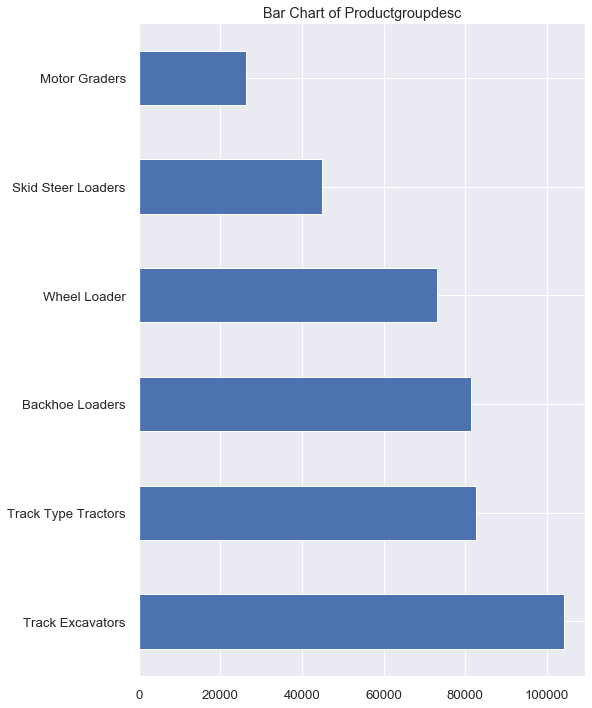

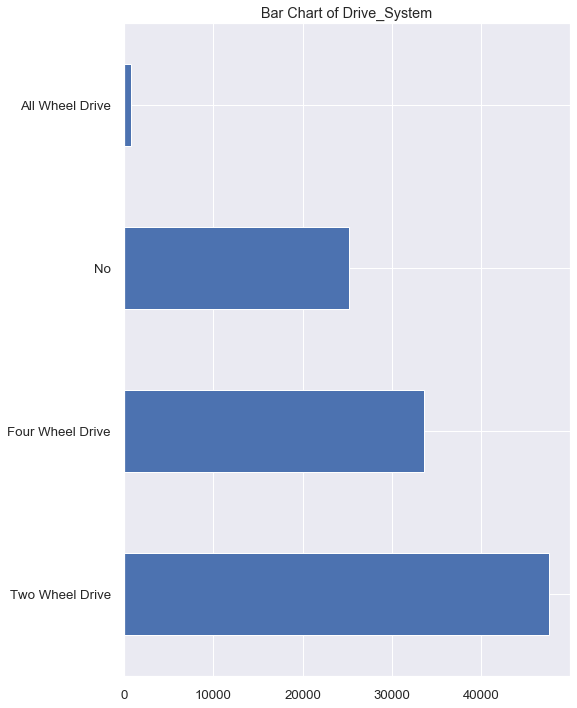

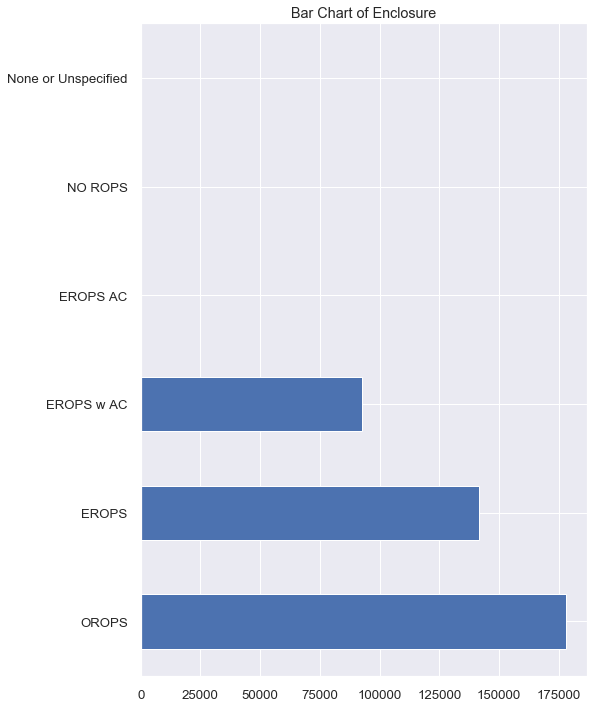

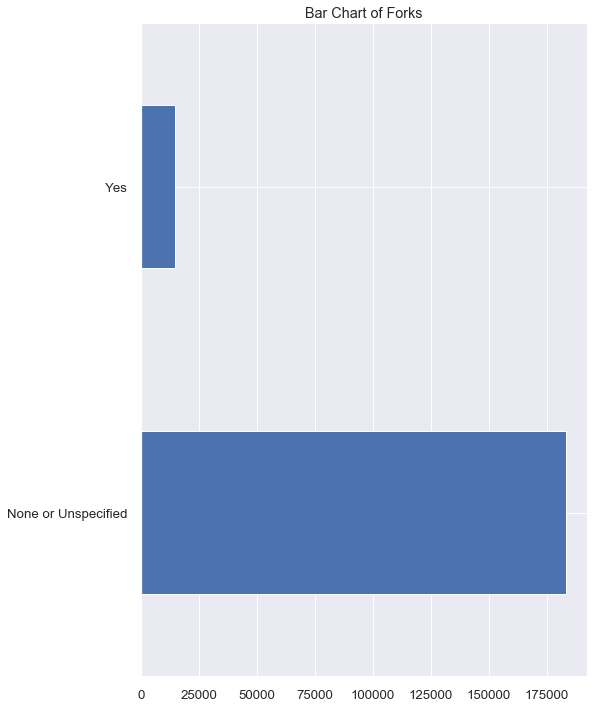

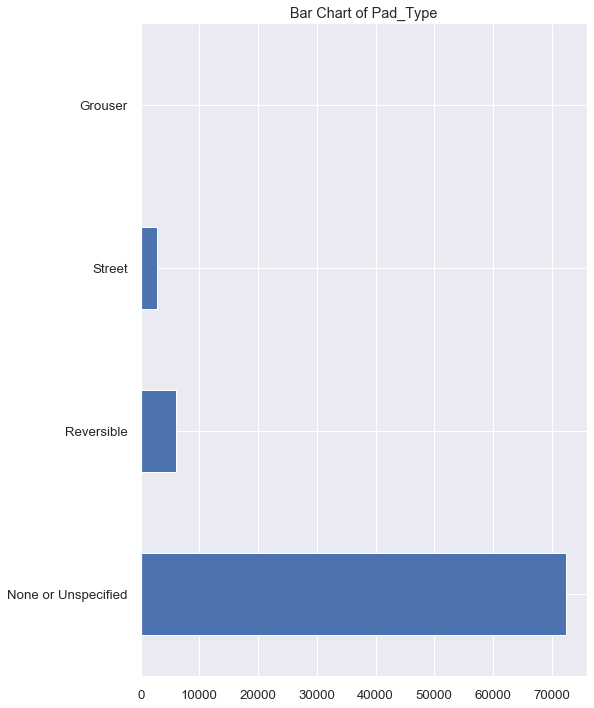

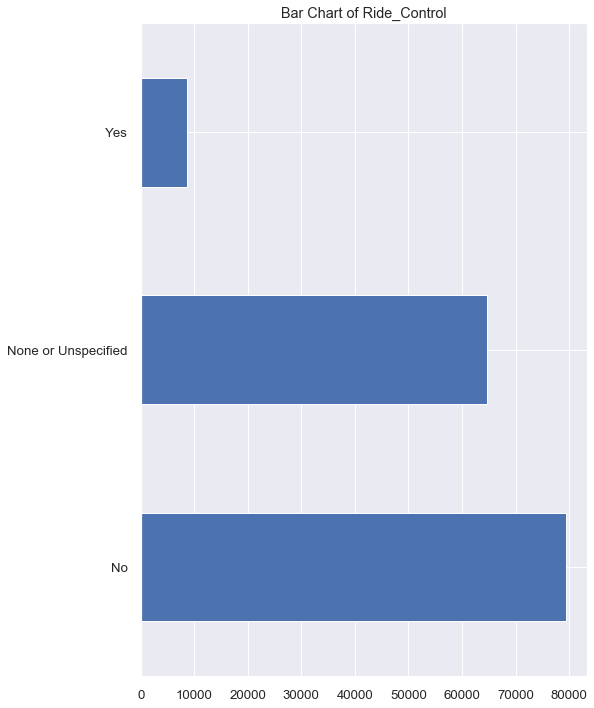

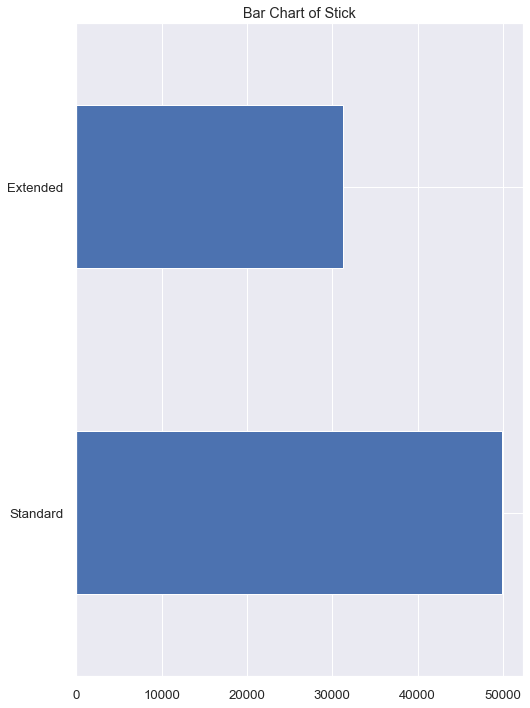

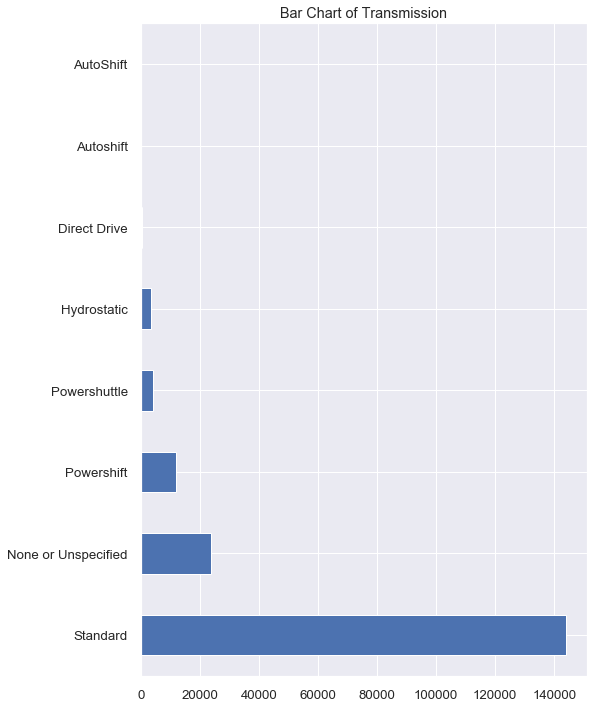

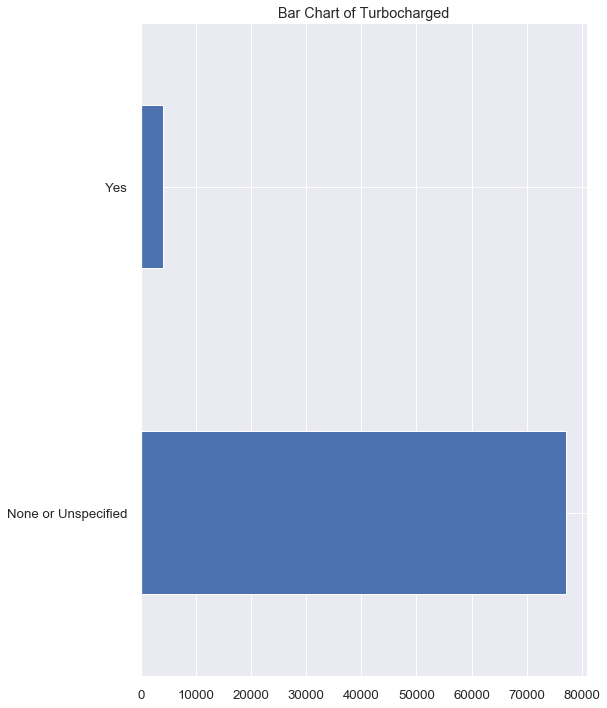

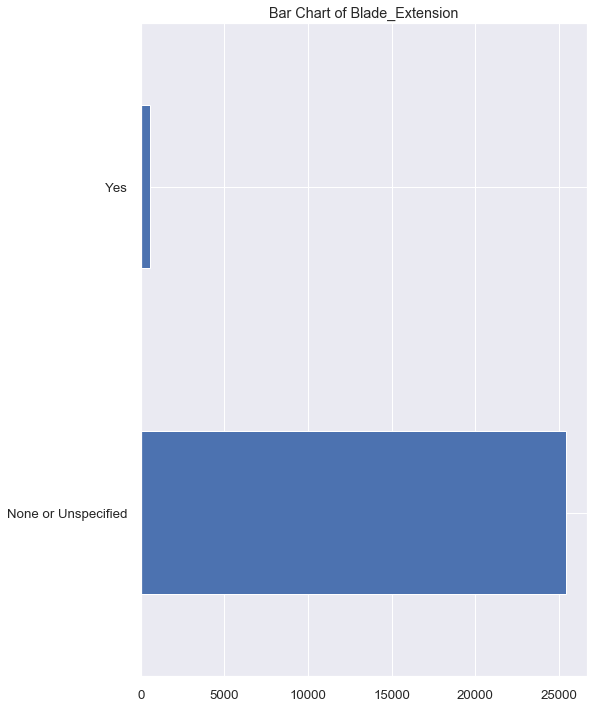

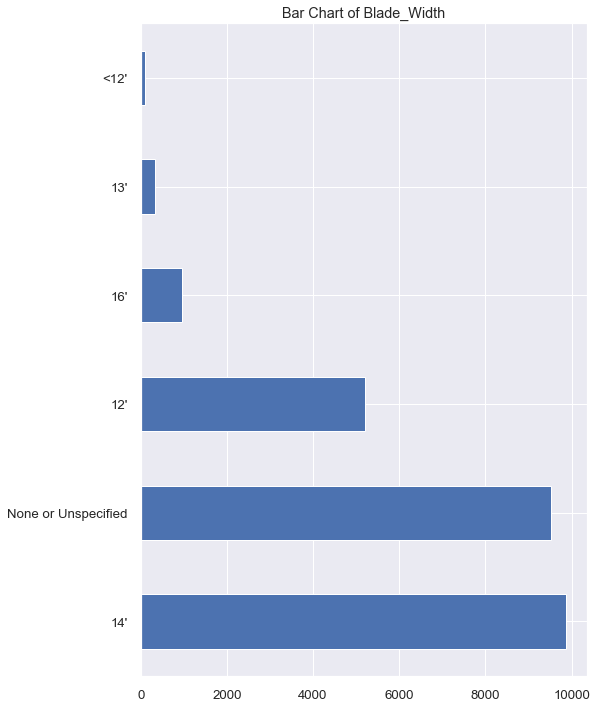

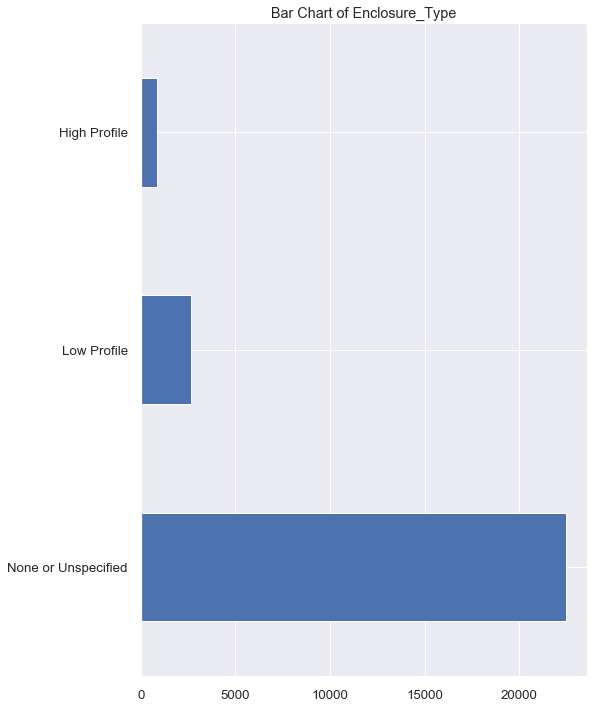

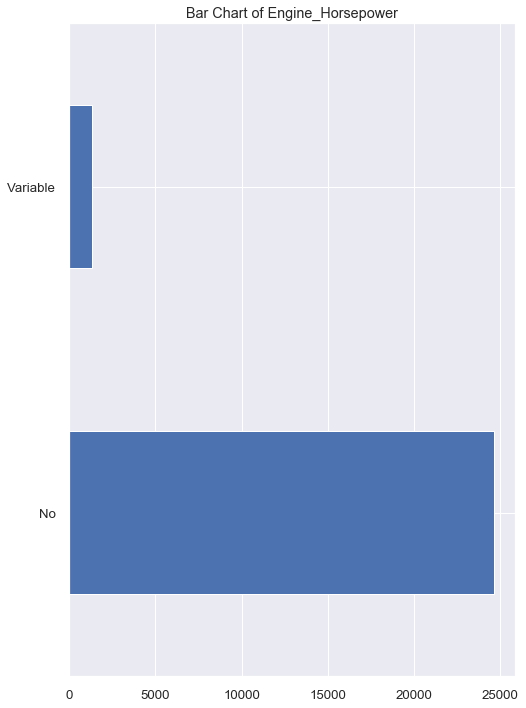

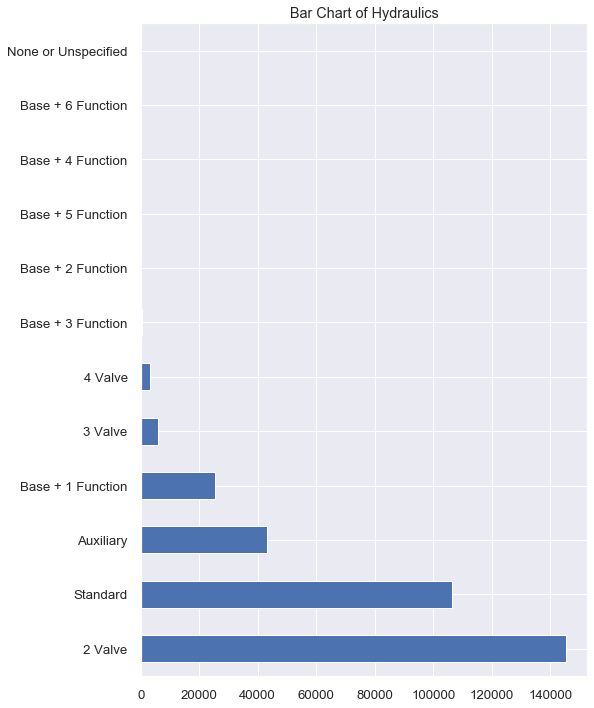

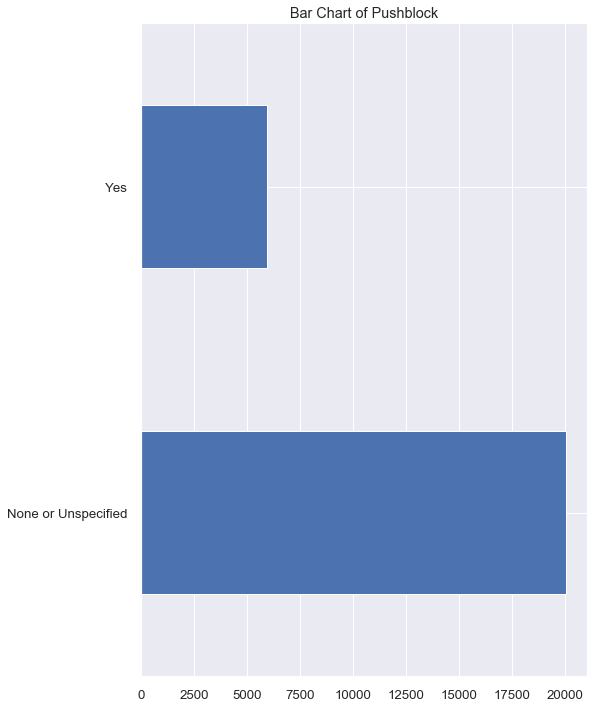

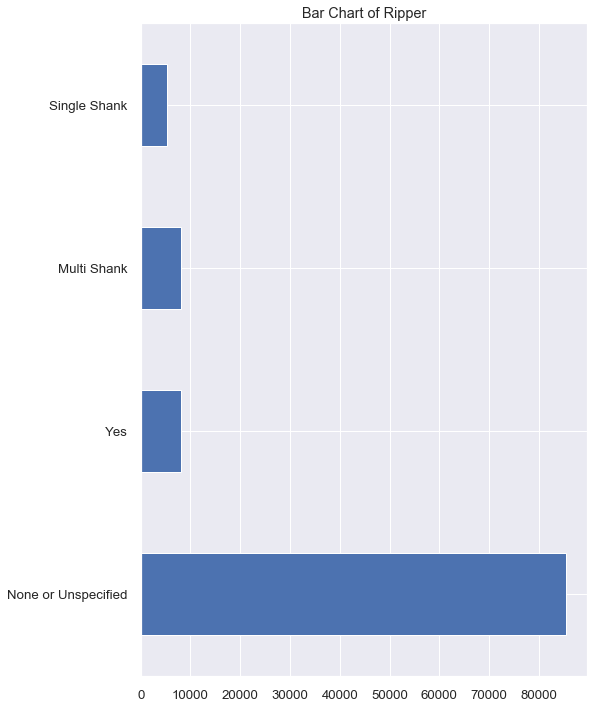

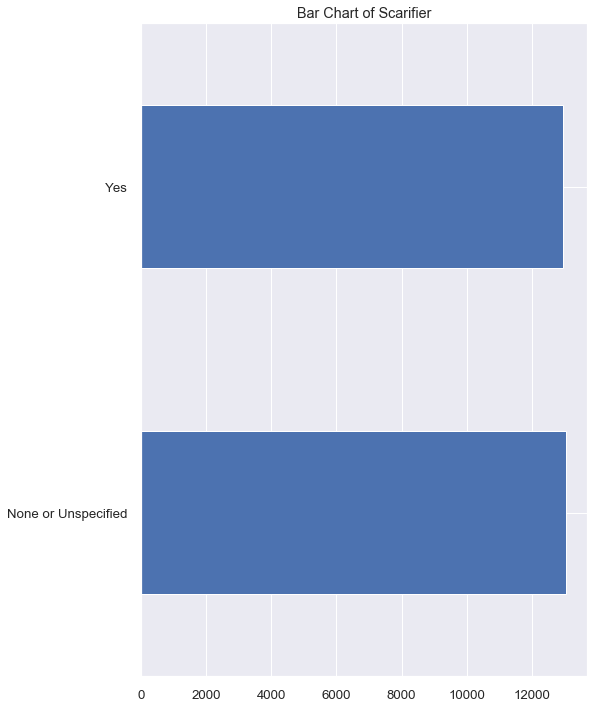

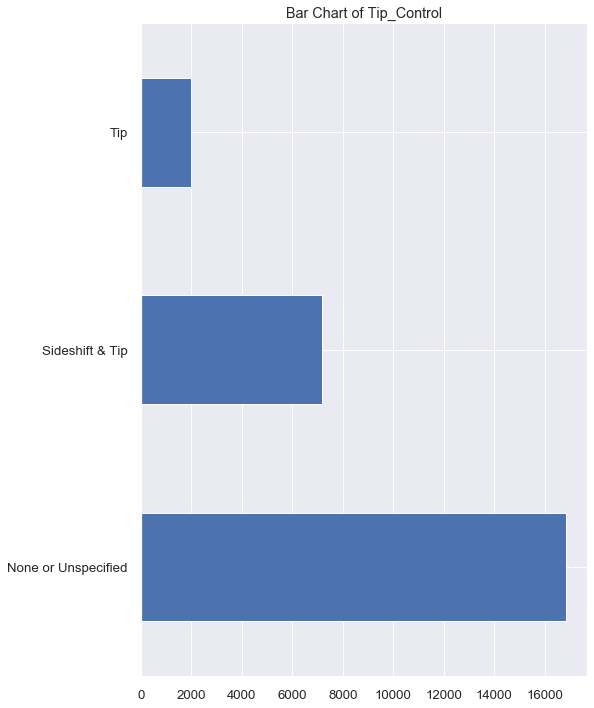

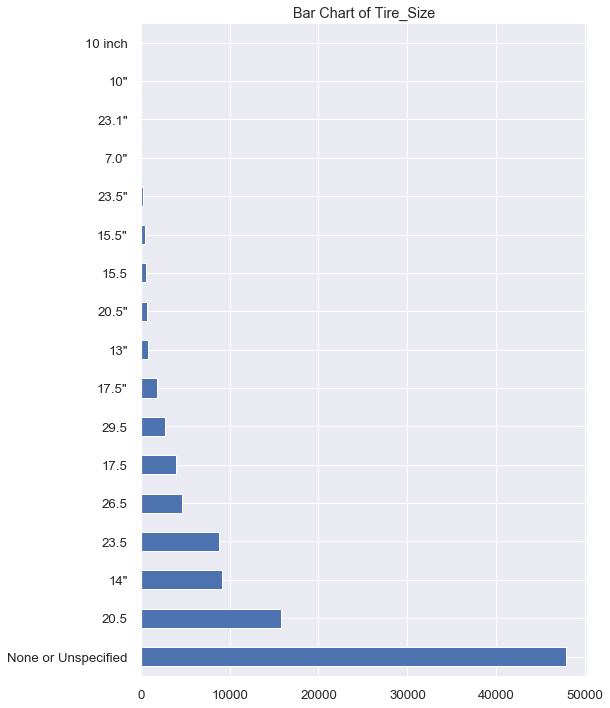

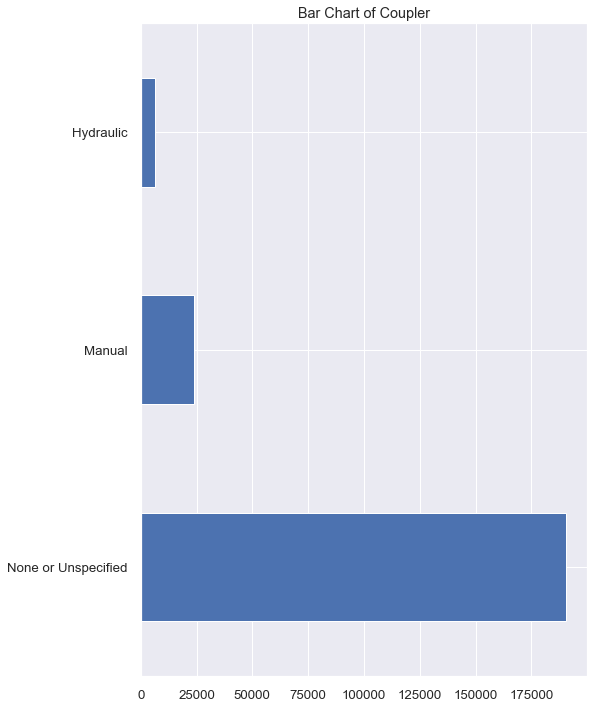

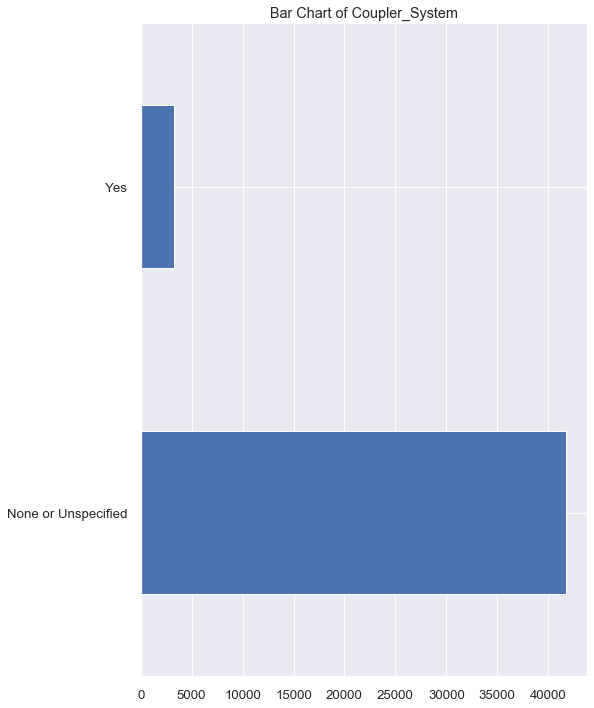

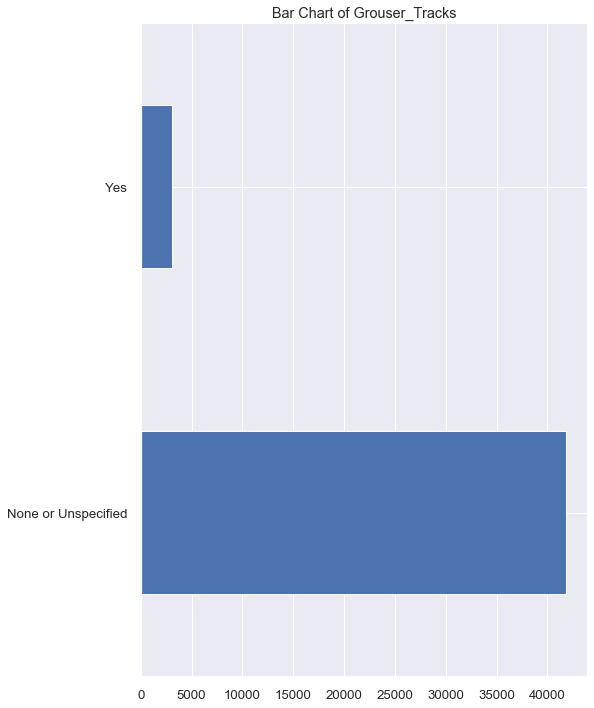

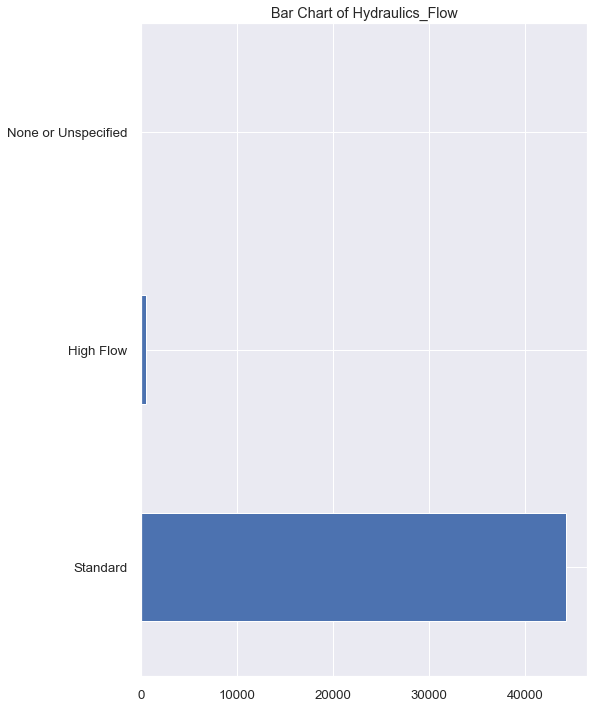

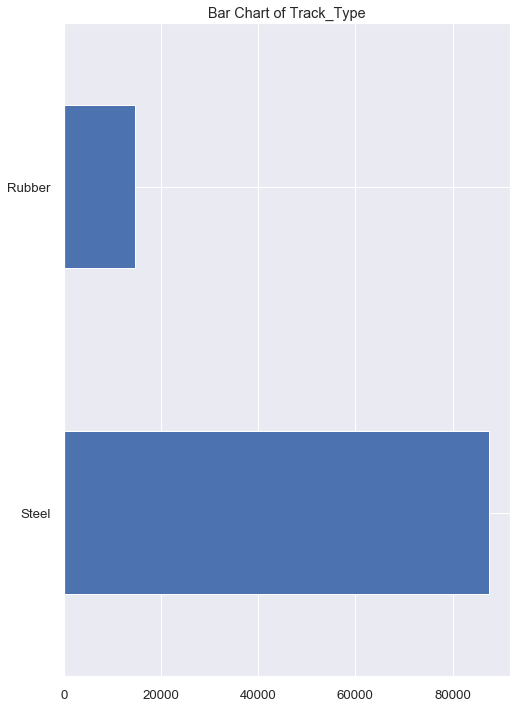

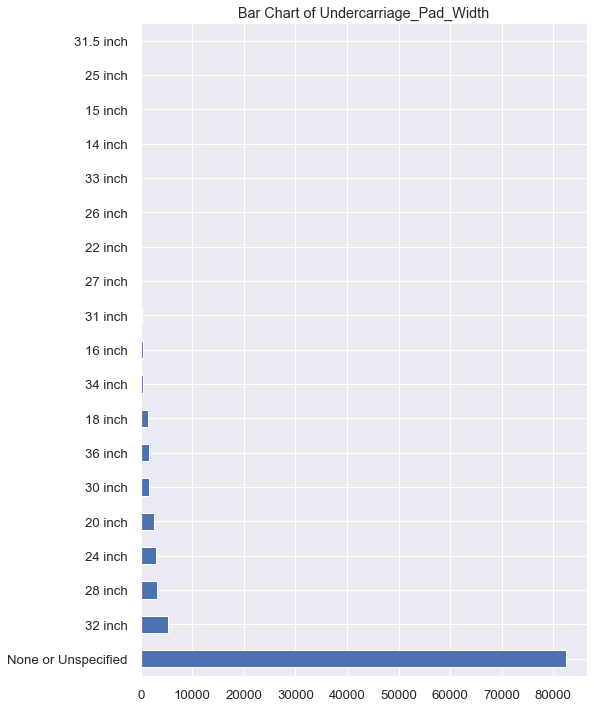

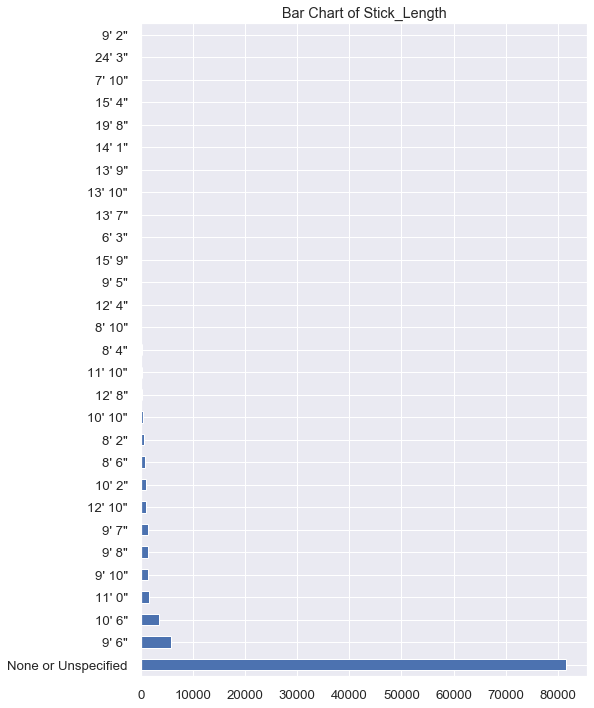

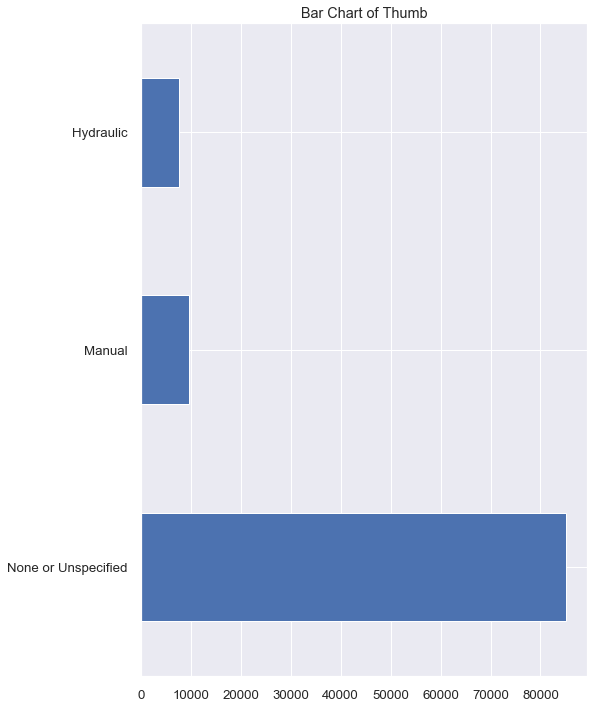

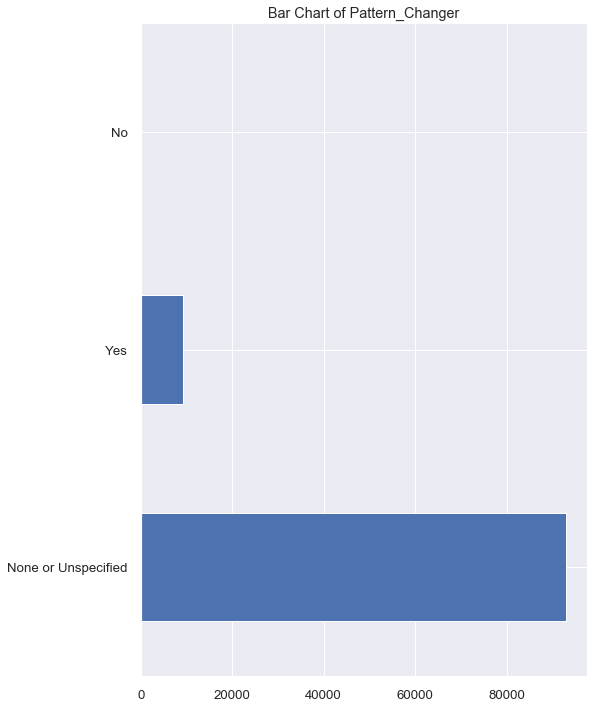

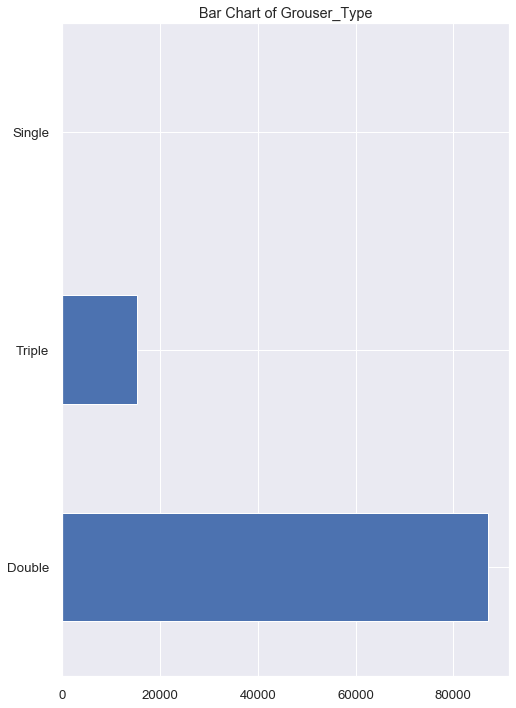

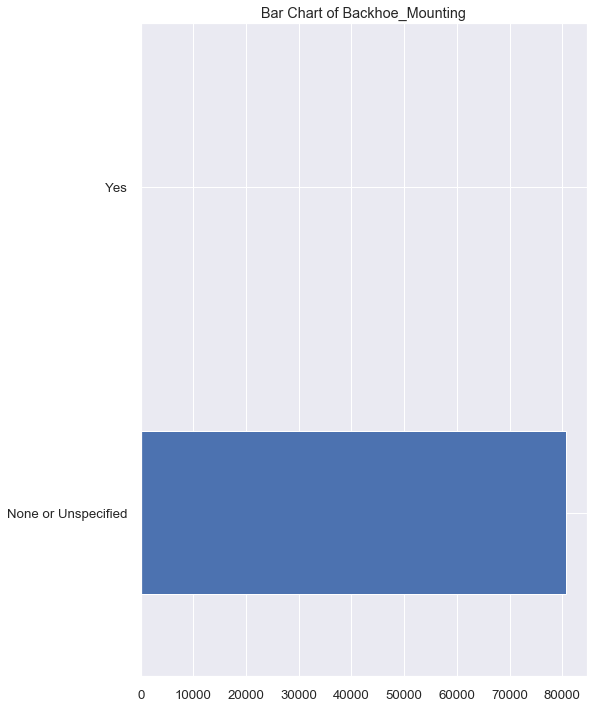

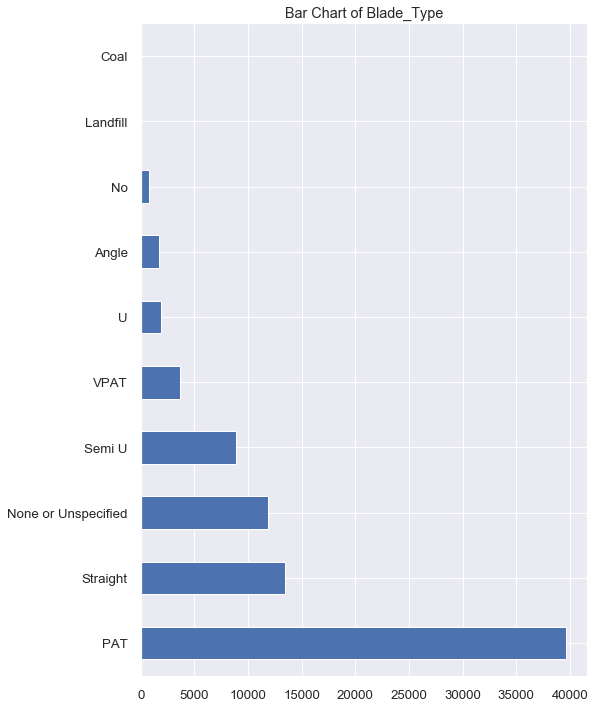

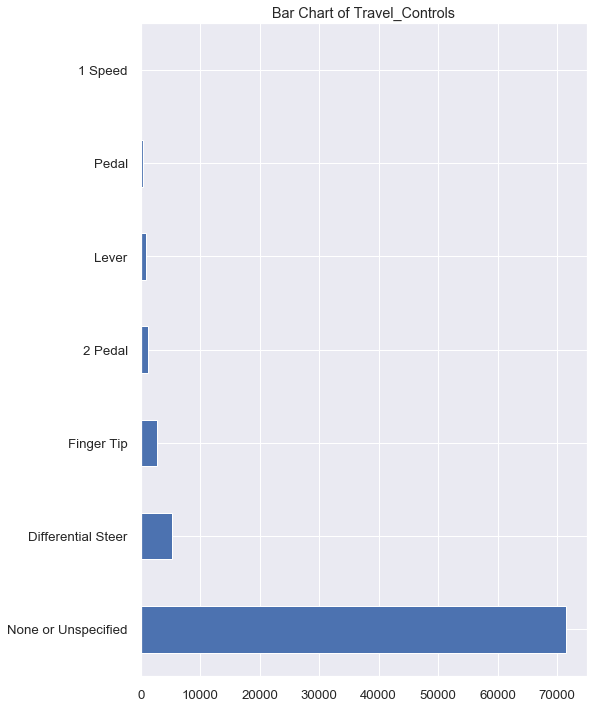

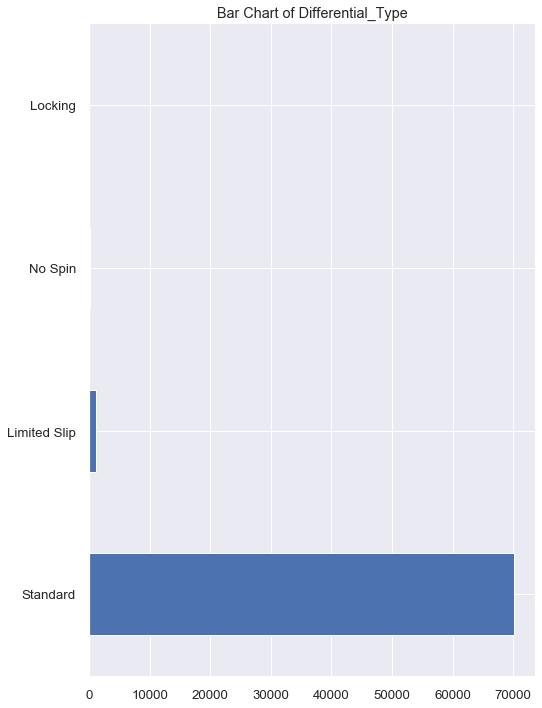

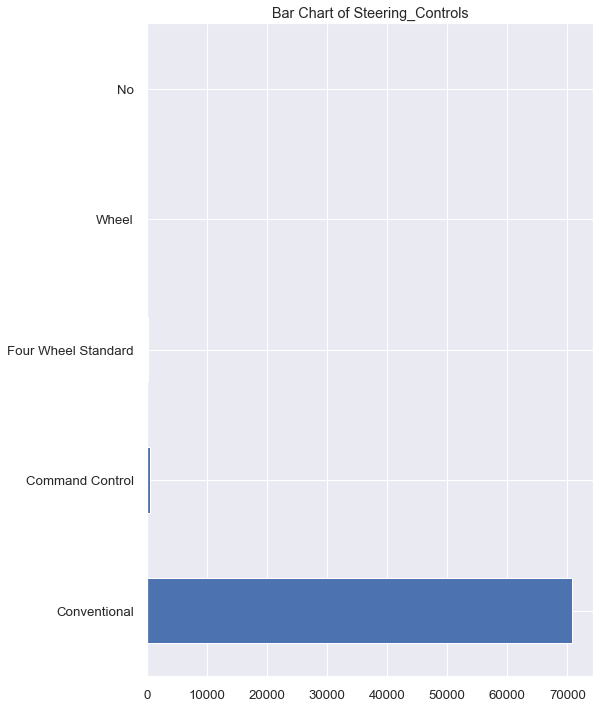

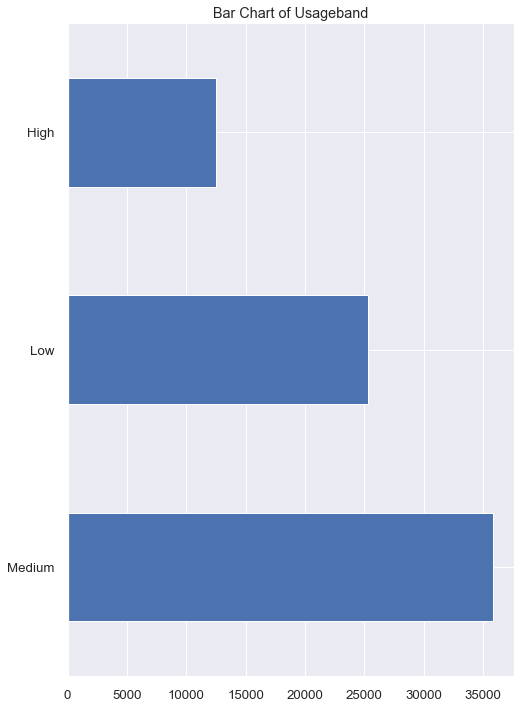

pass fiModelDesc
pass fiBaseModel
pass fiSecondaryDesc
pass fiModelSeries
pass fiModelDescriptor


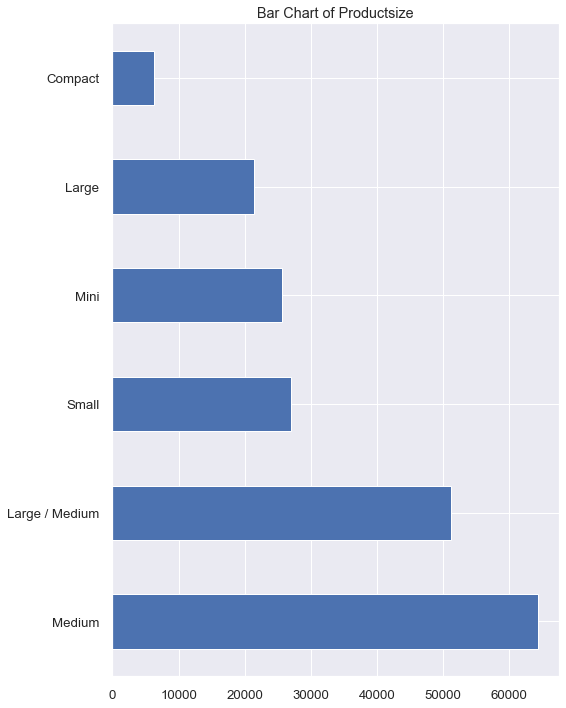

pass fiProductClassDesc


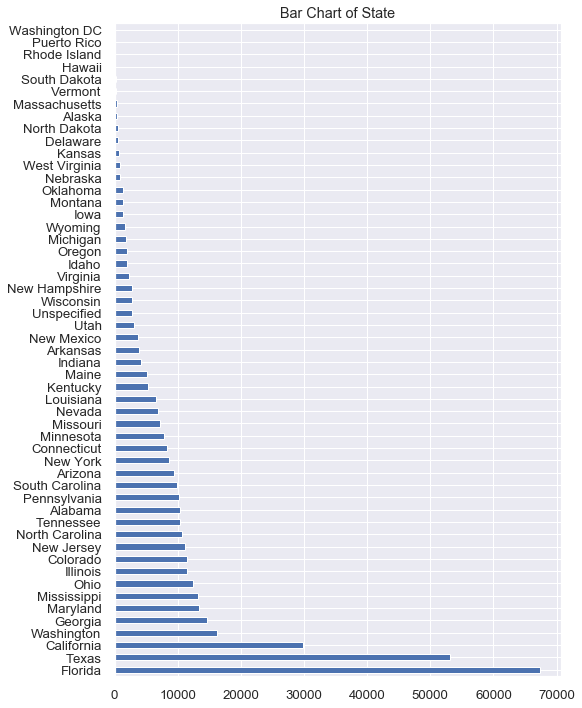

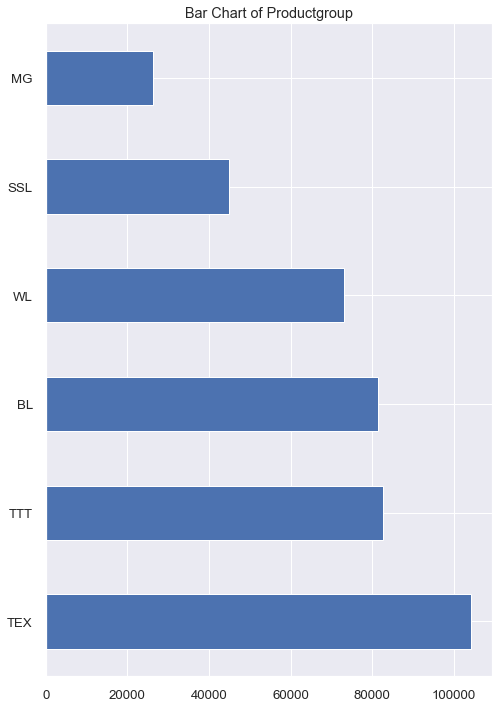

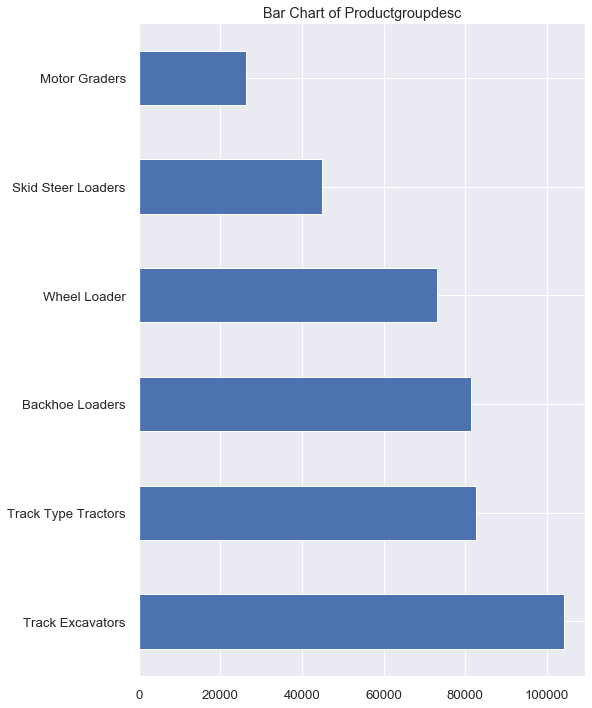

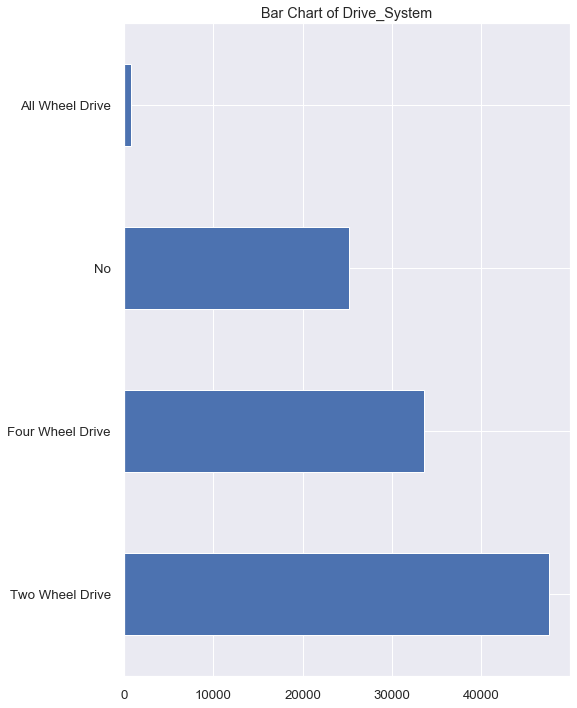

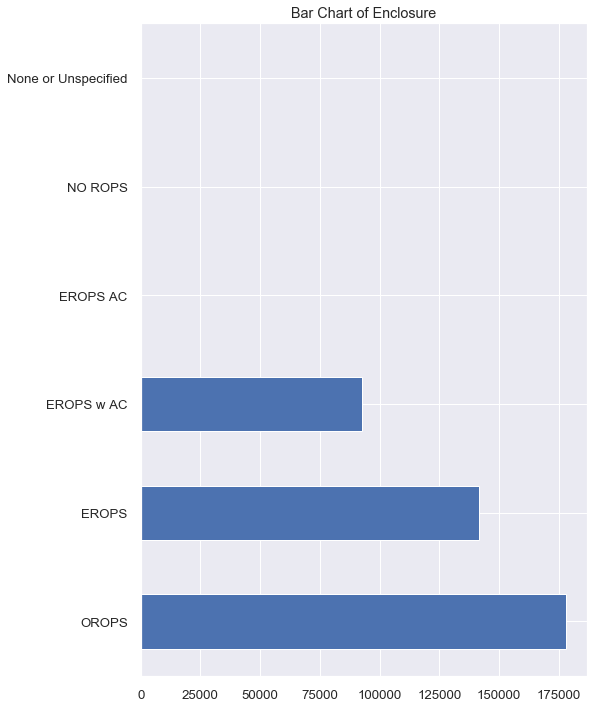

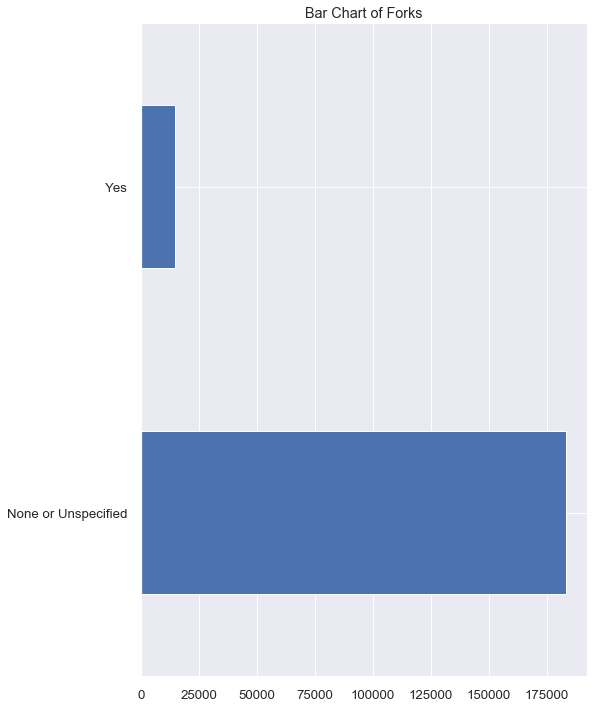

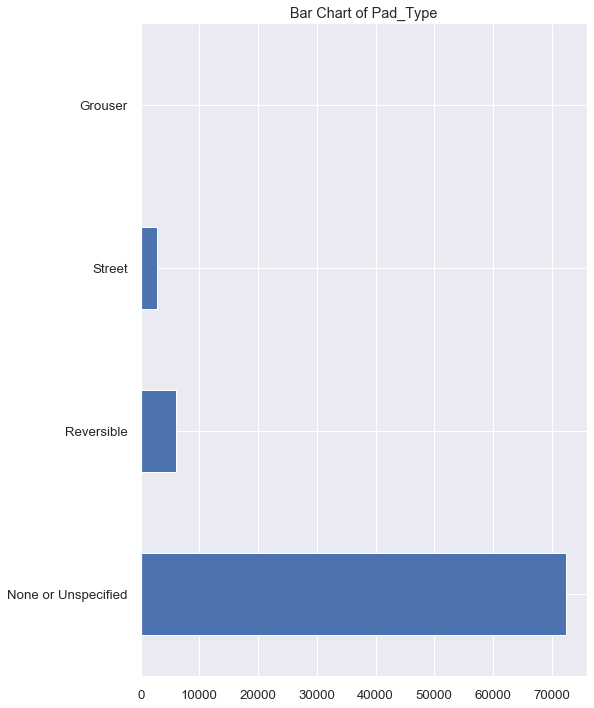

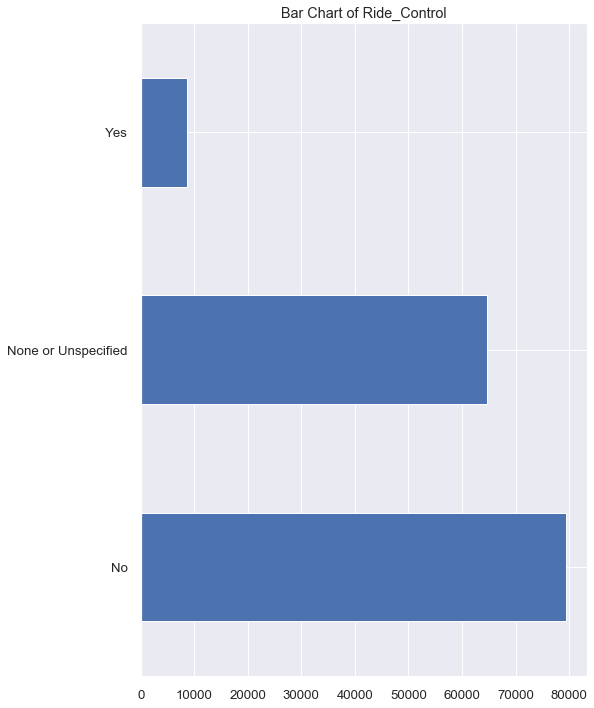

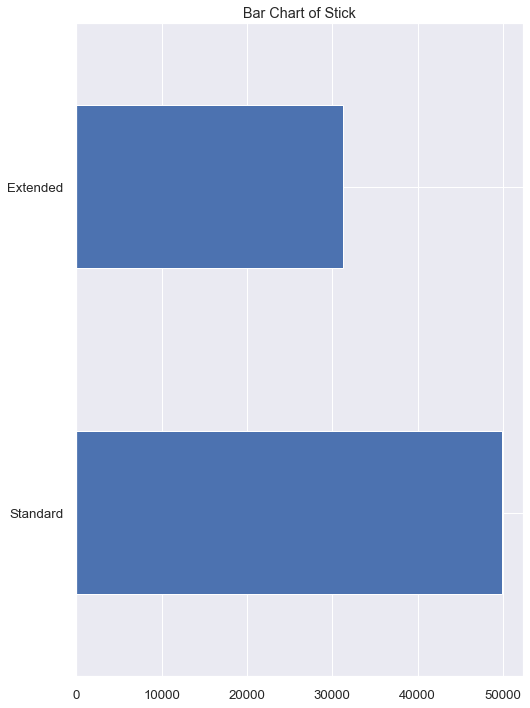

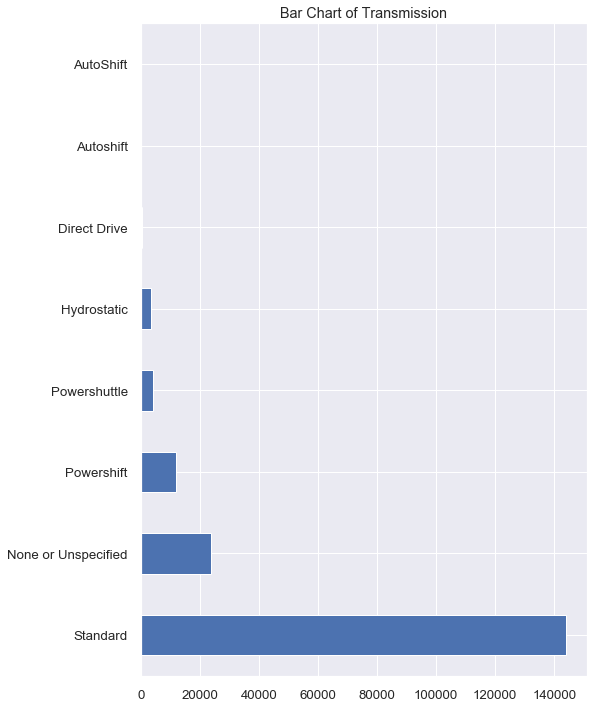

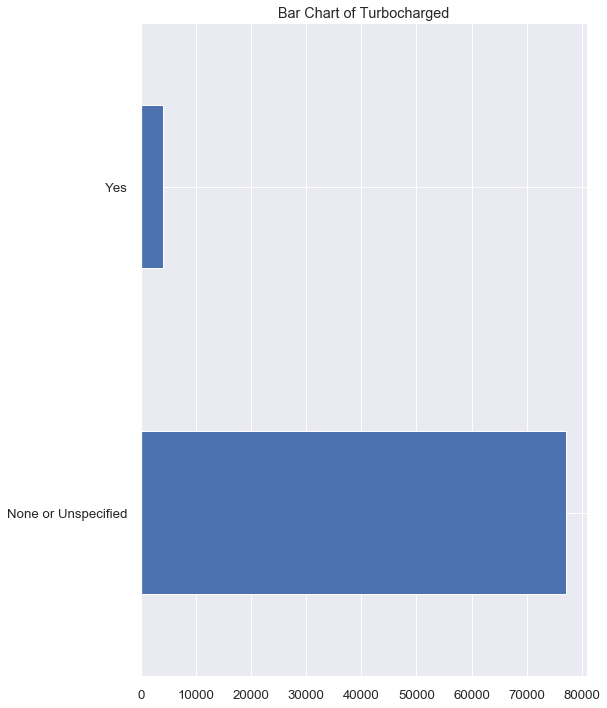

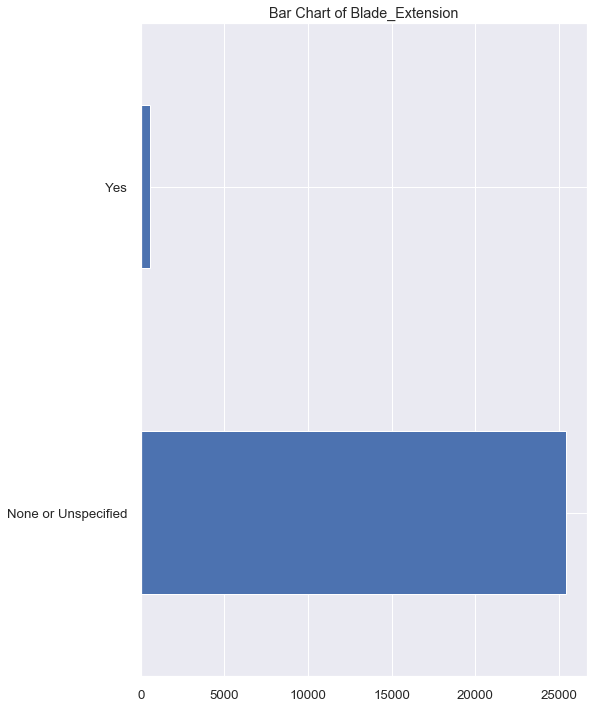

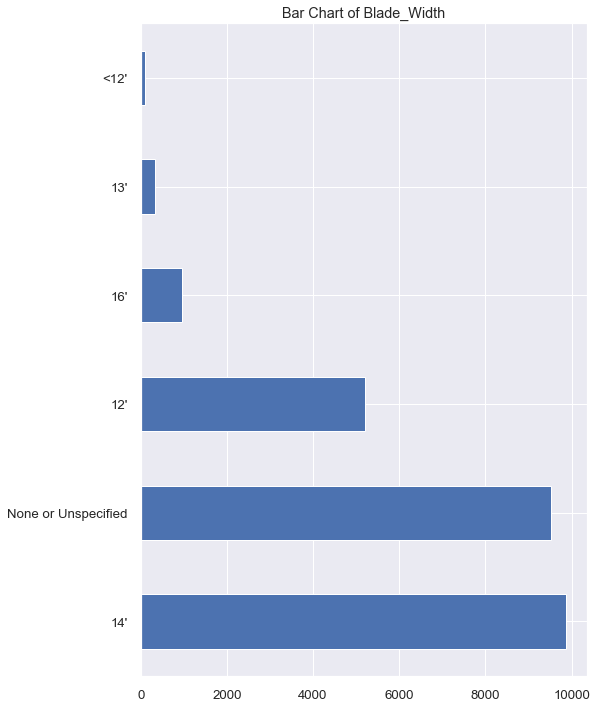

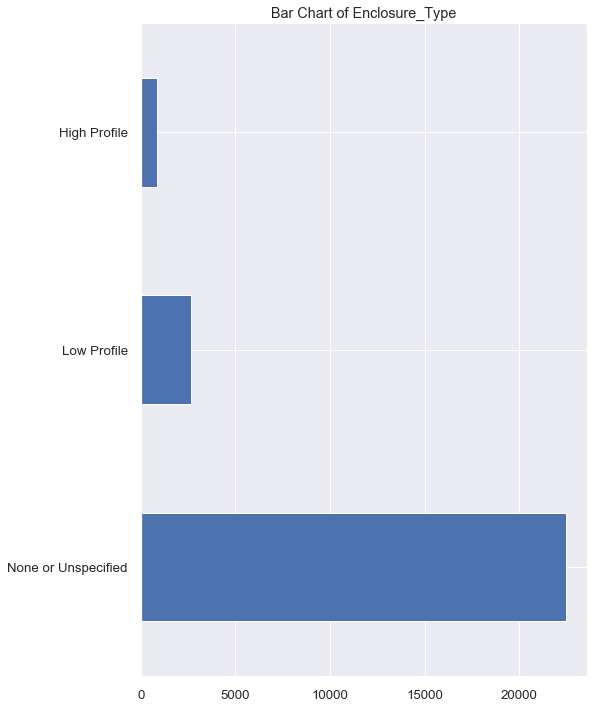

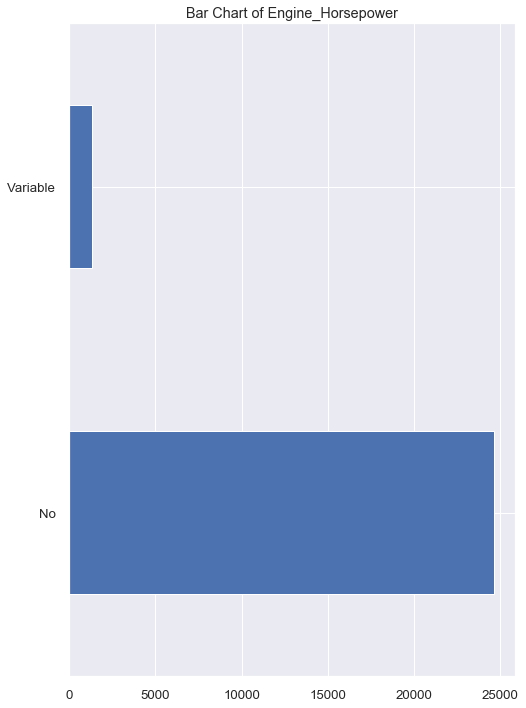

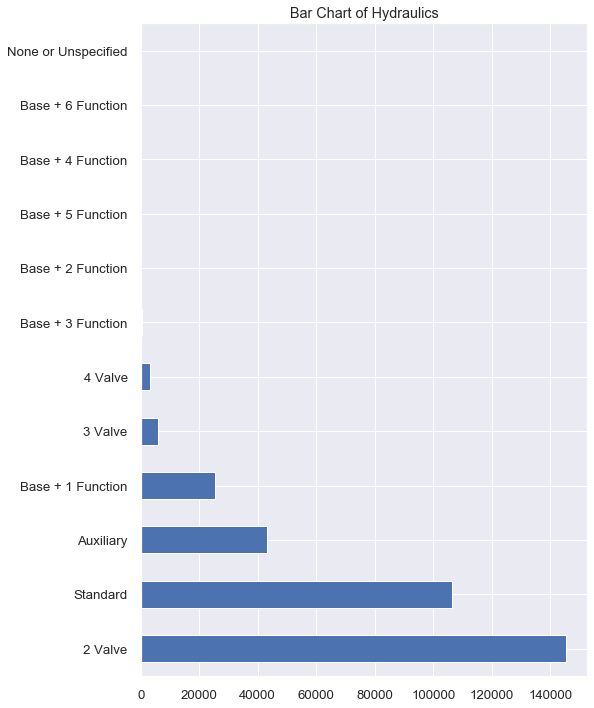

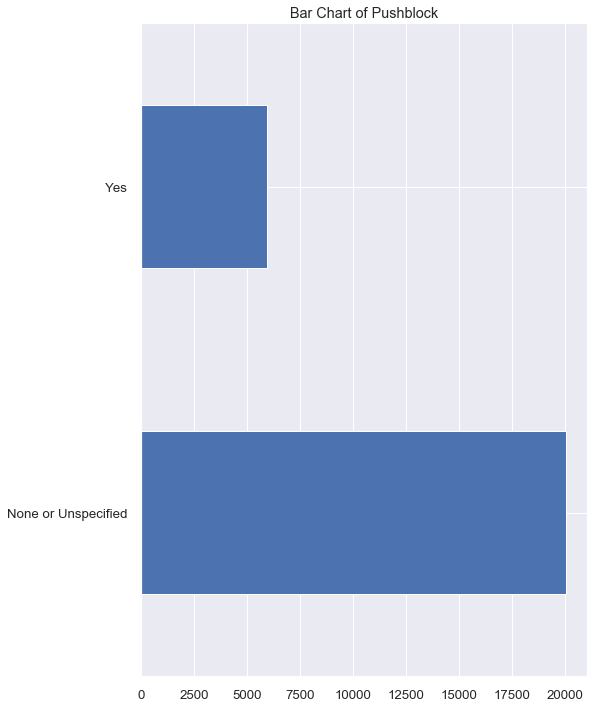

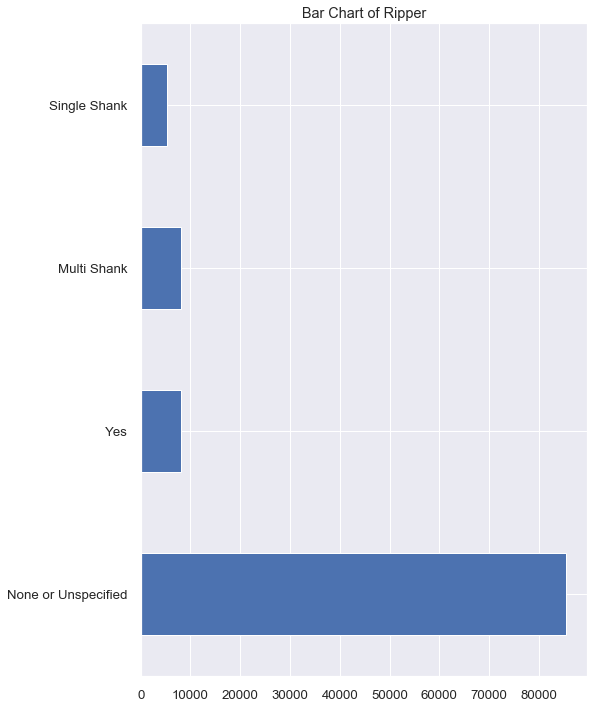

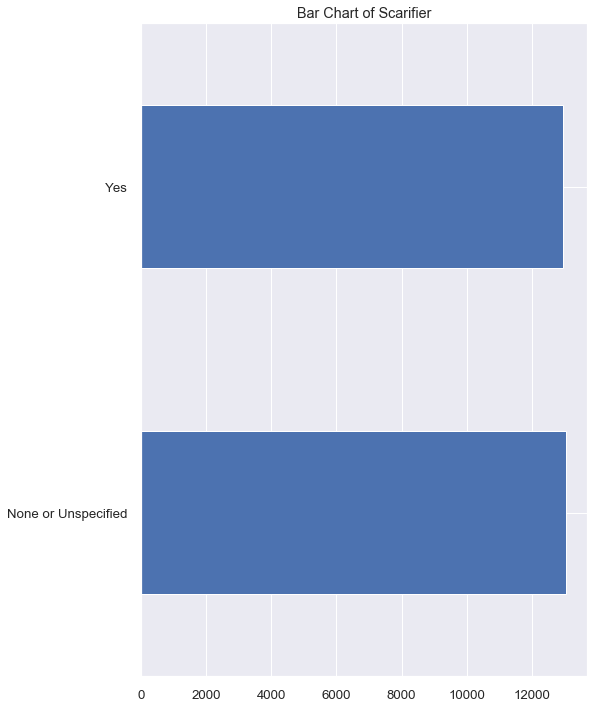

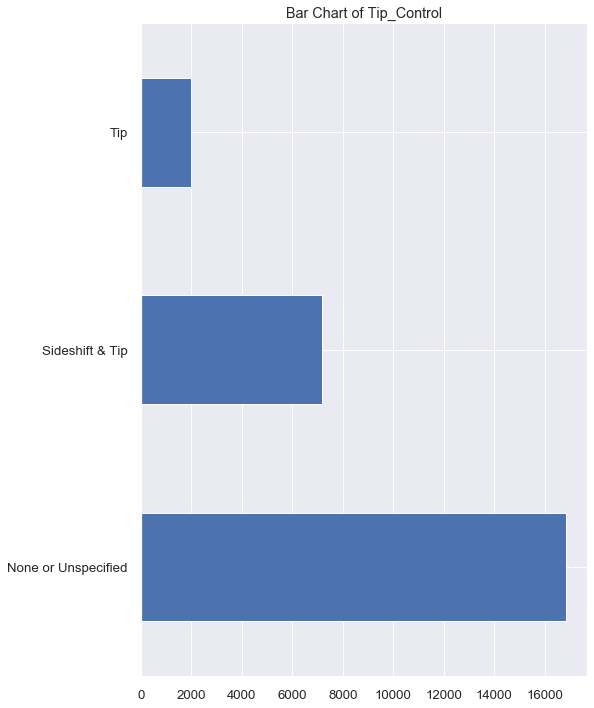

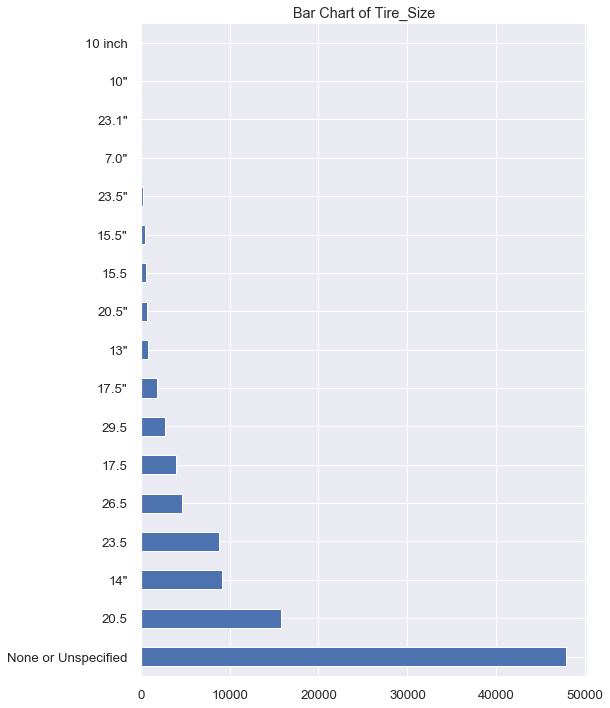

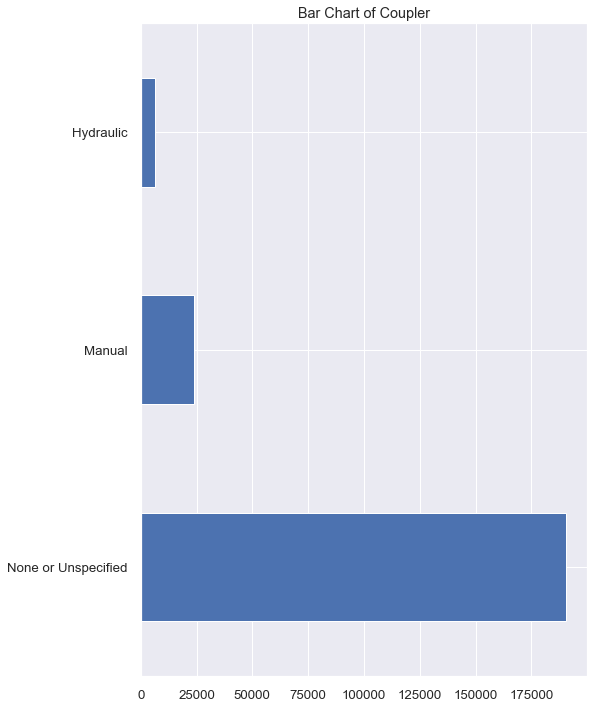

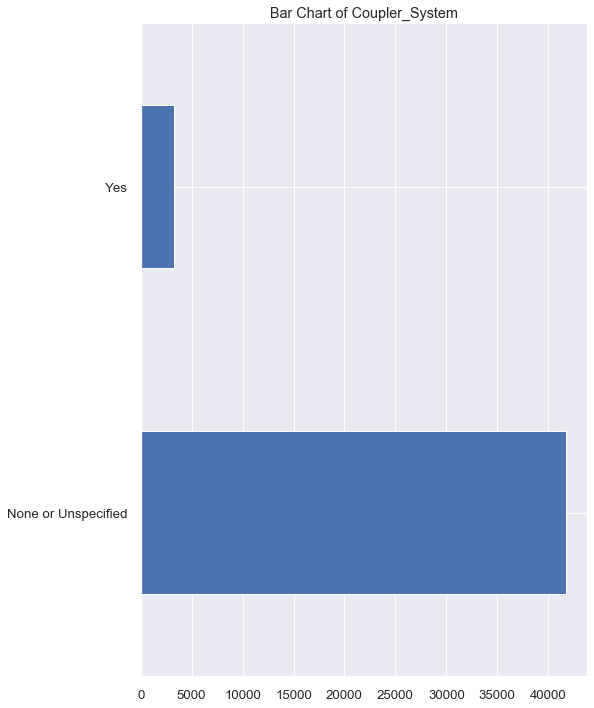

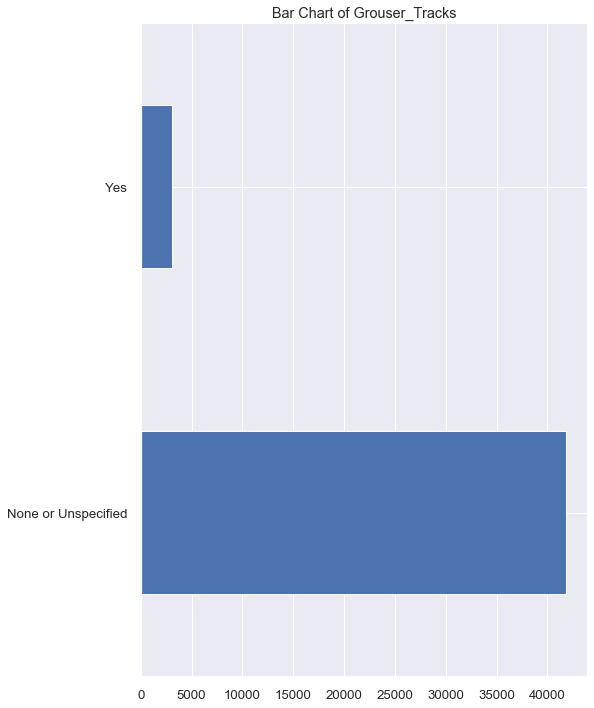

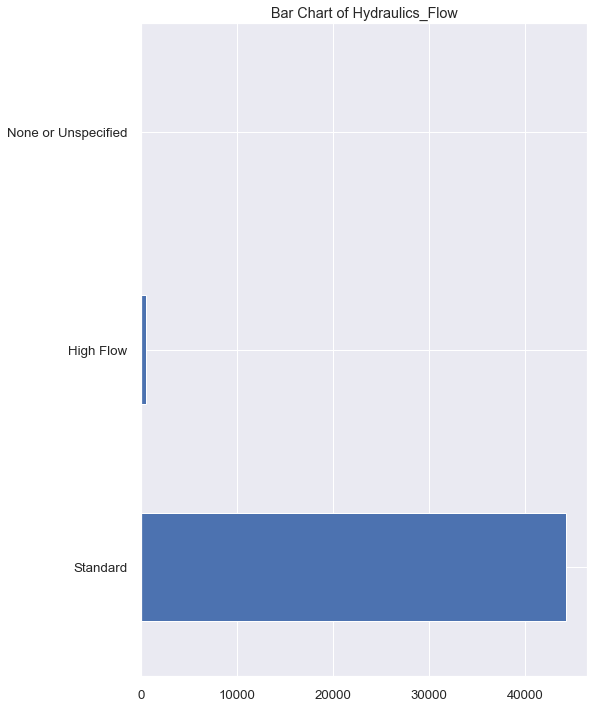

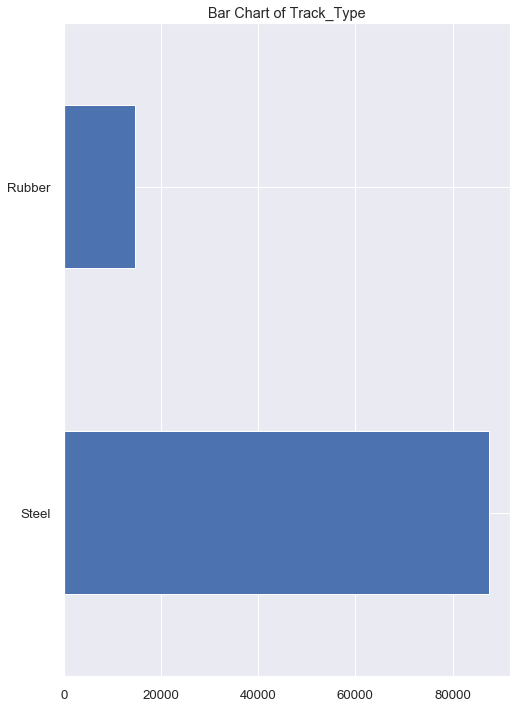

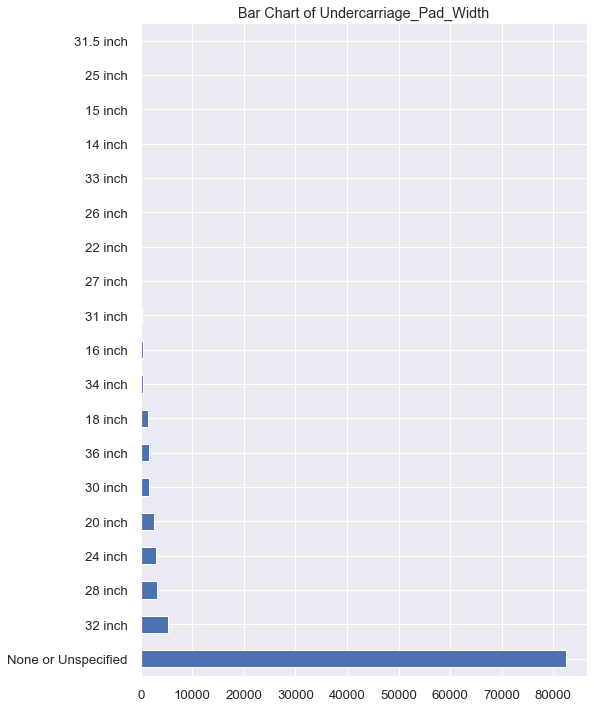

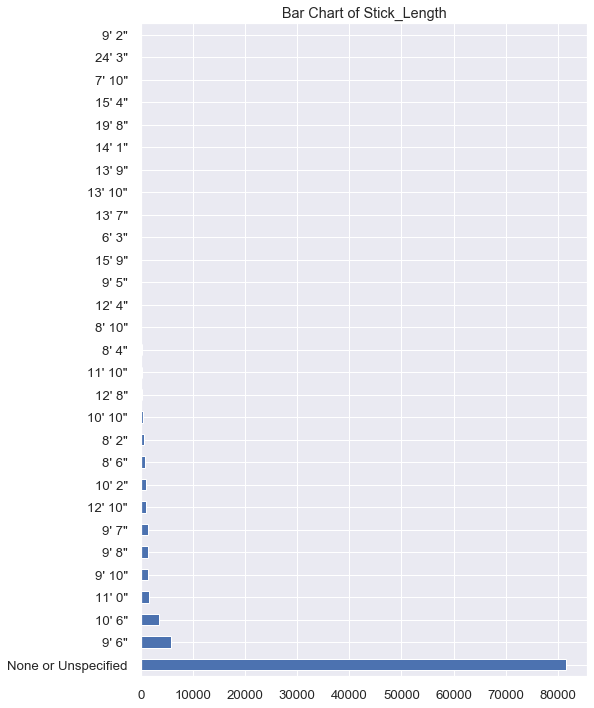

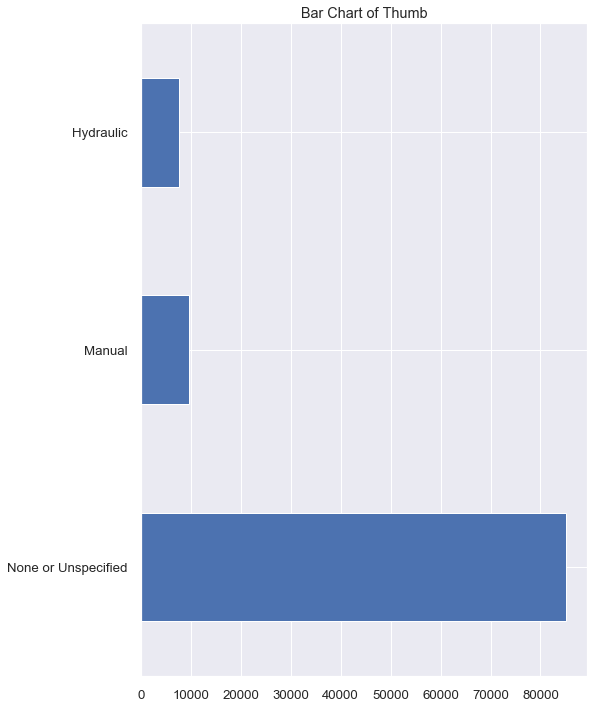

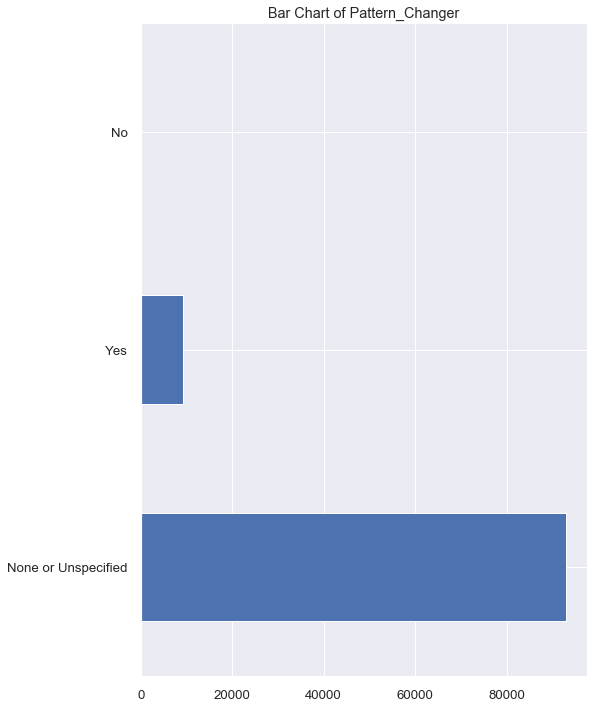

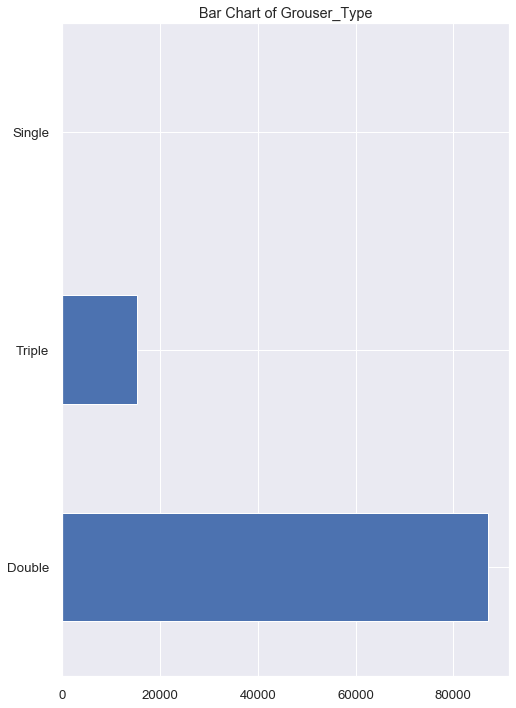

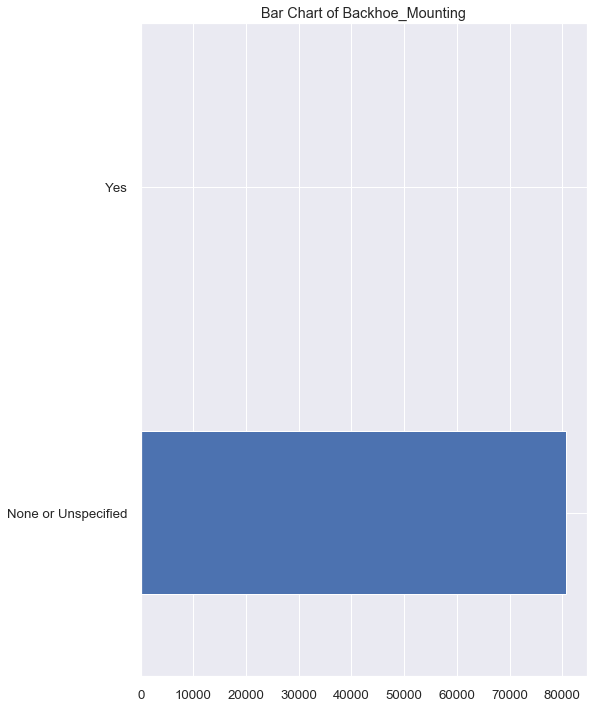

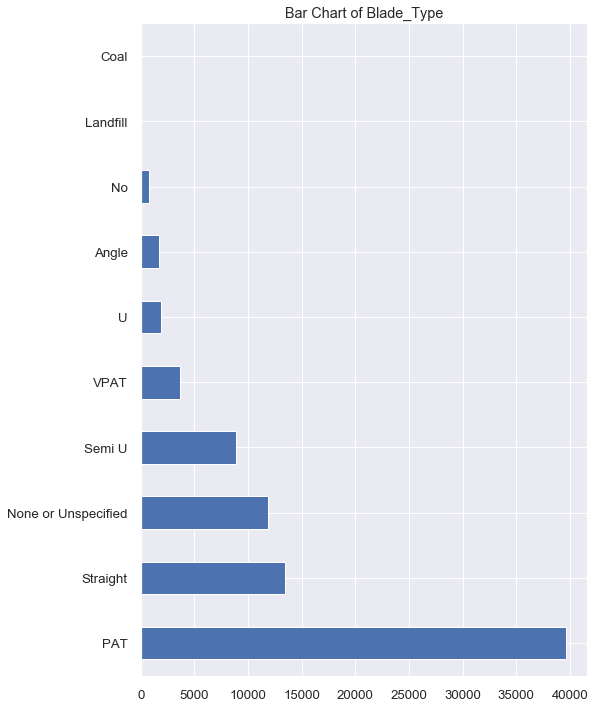

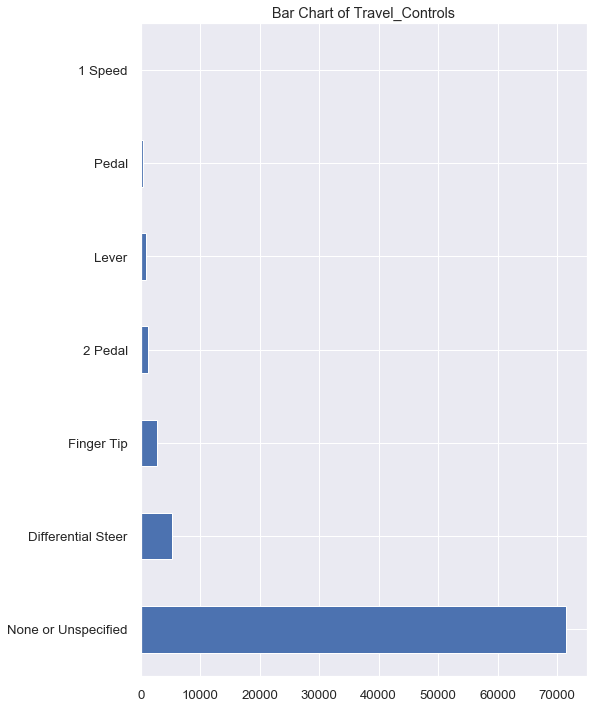

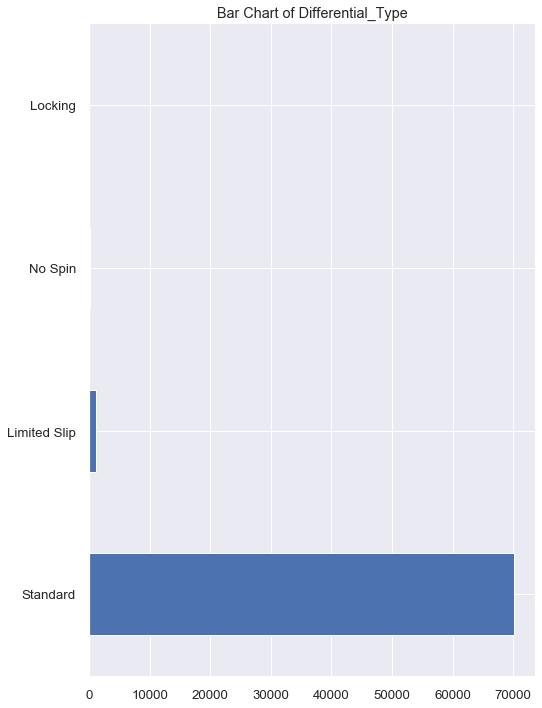

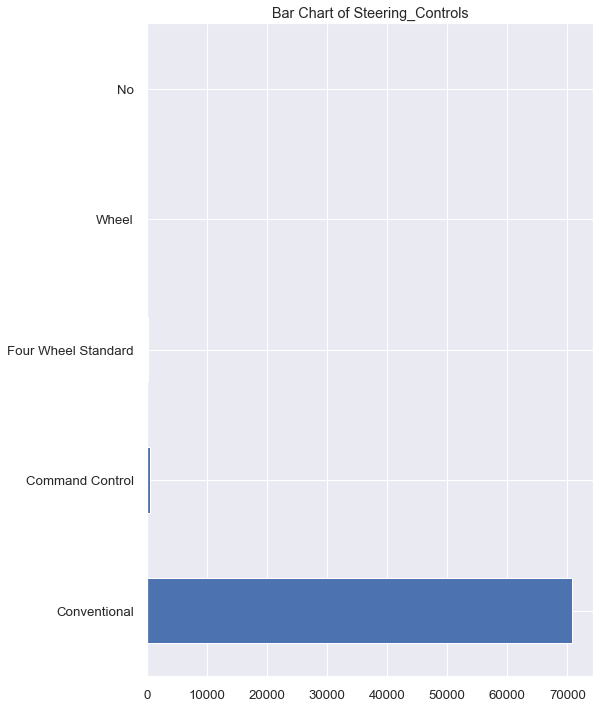

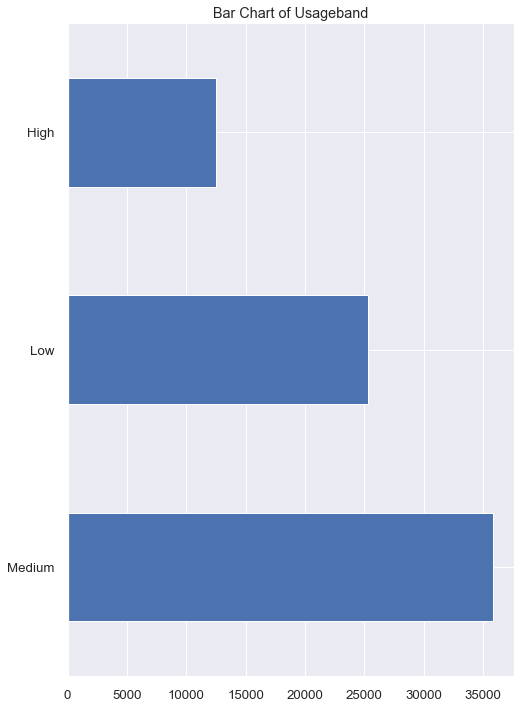

pass fiModelDesc
pass fiBaseModel
pass fiSecondaryDesc
pass fiModelSeries
pass fiModelDescriptor


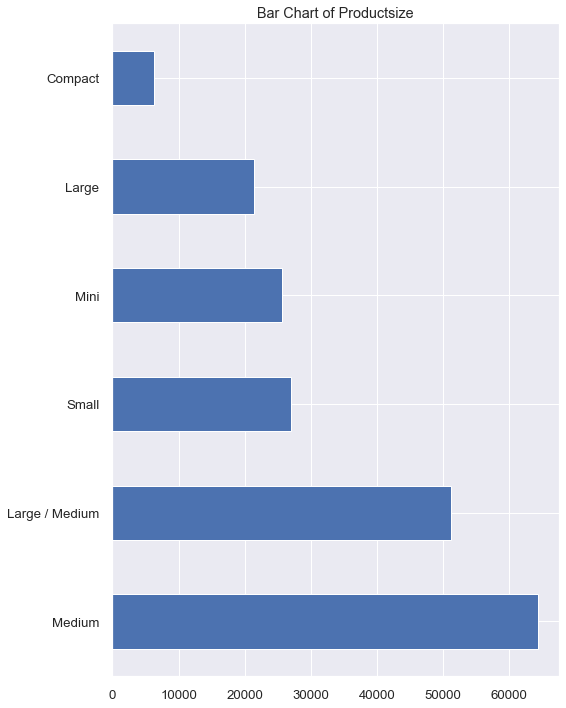

pass fiProductClassDesc


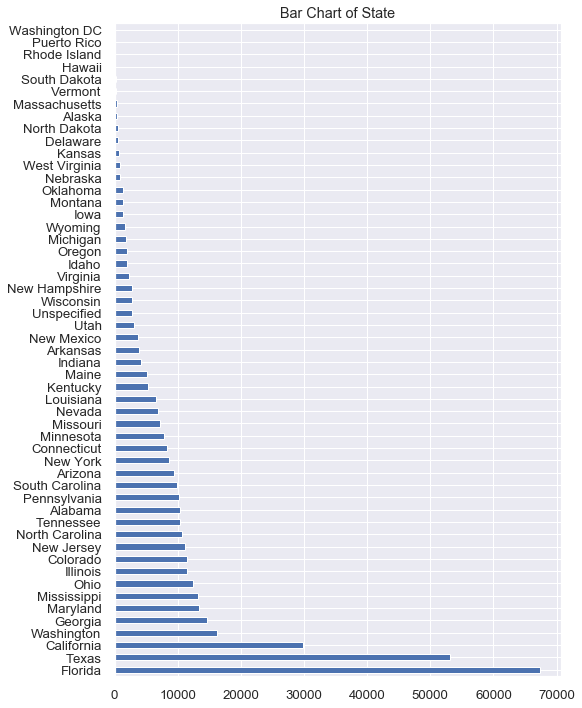

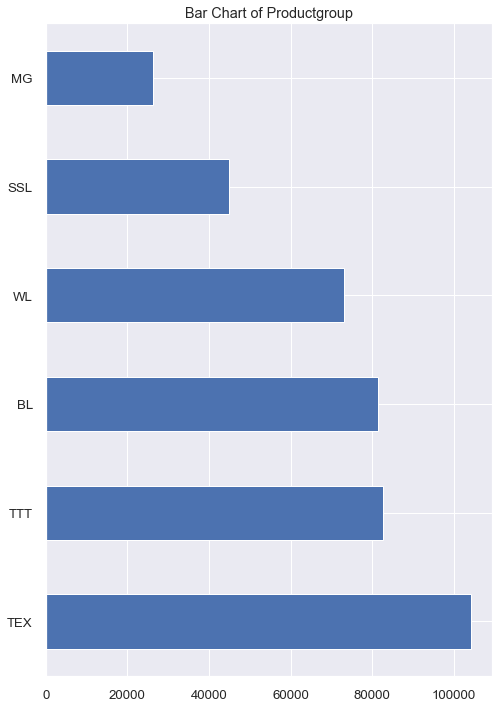

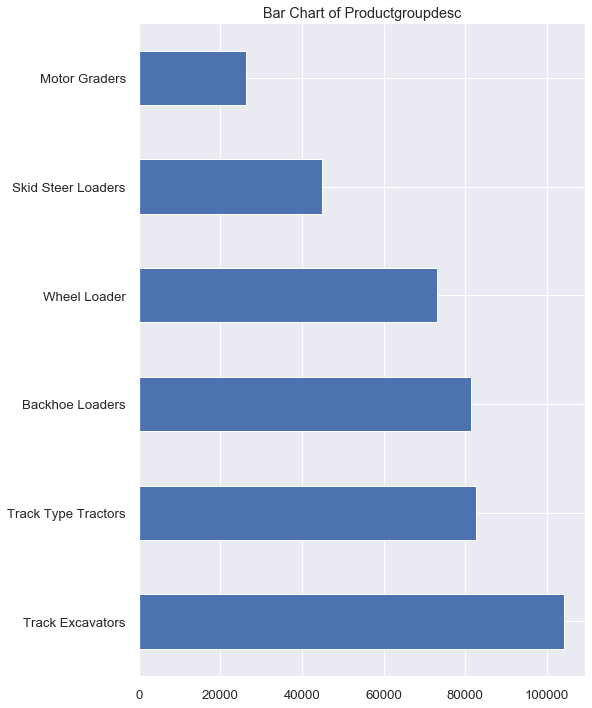

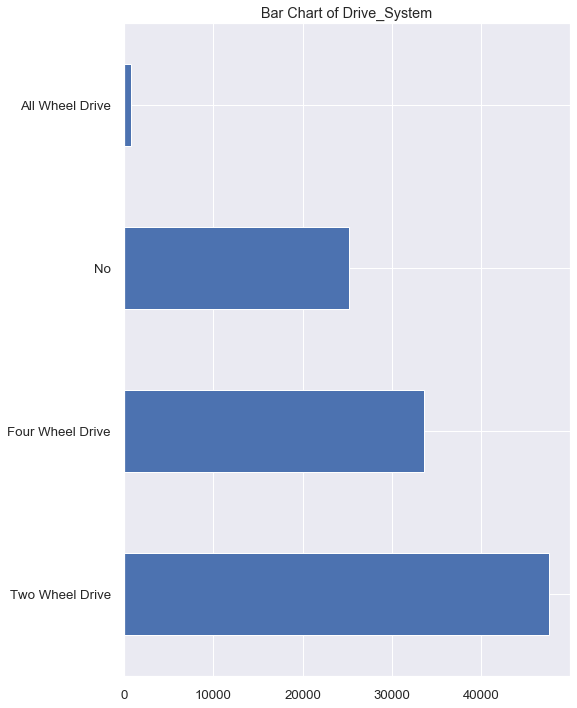

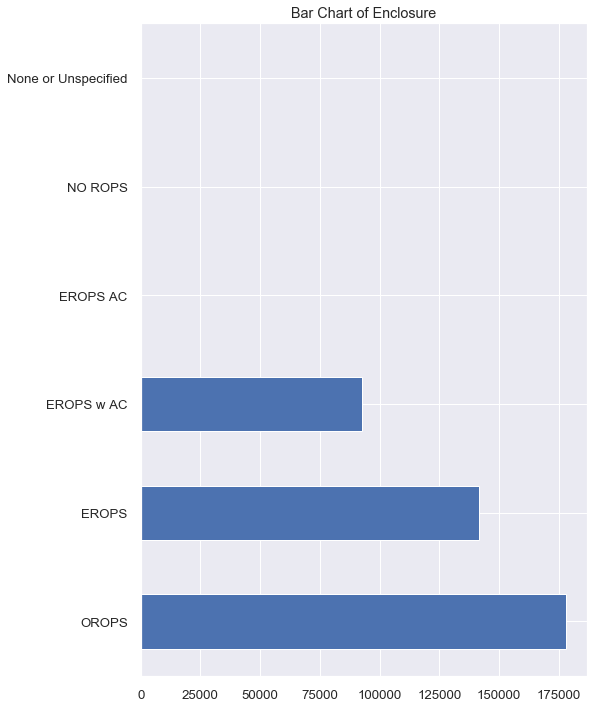

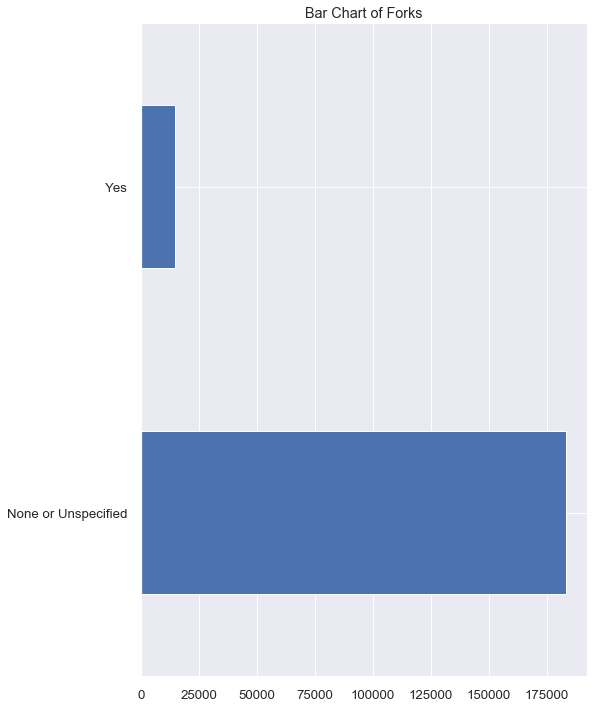

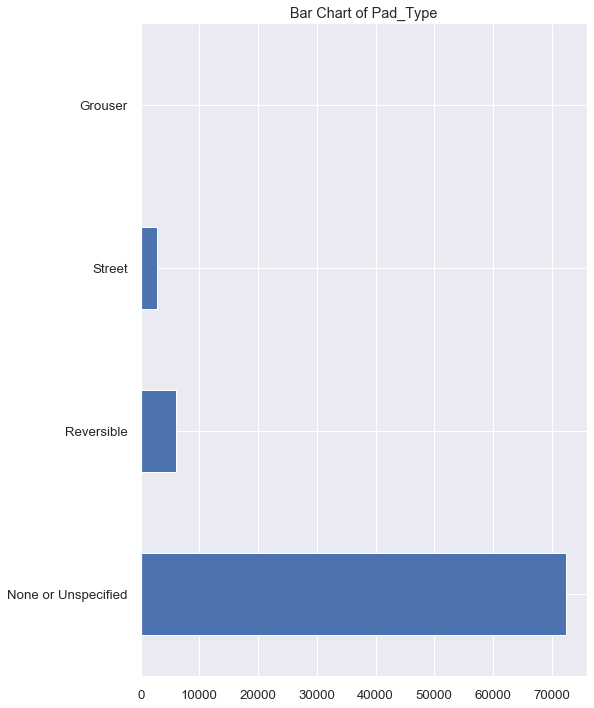

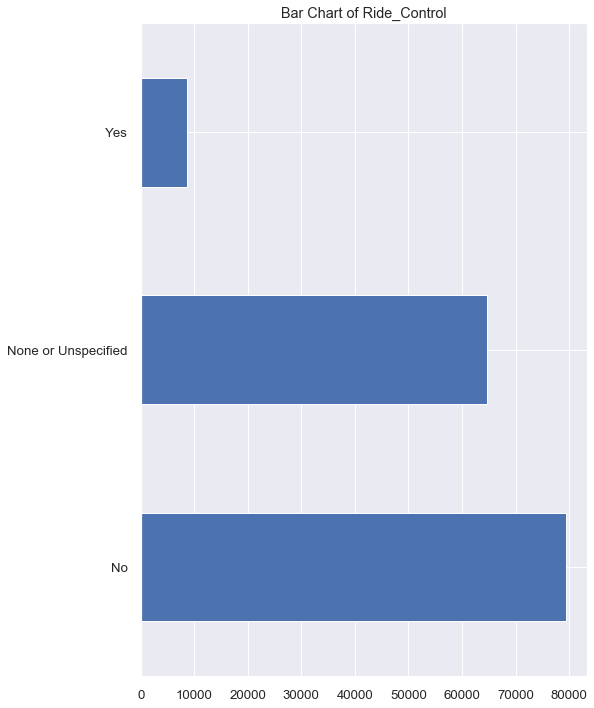

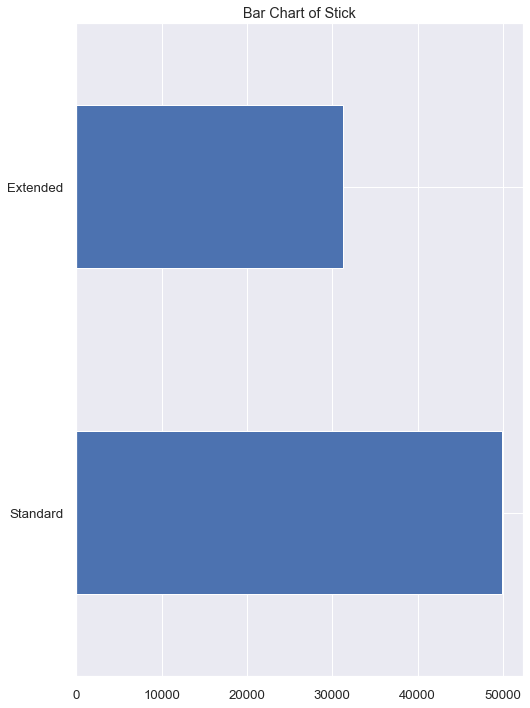

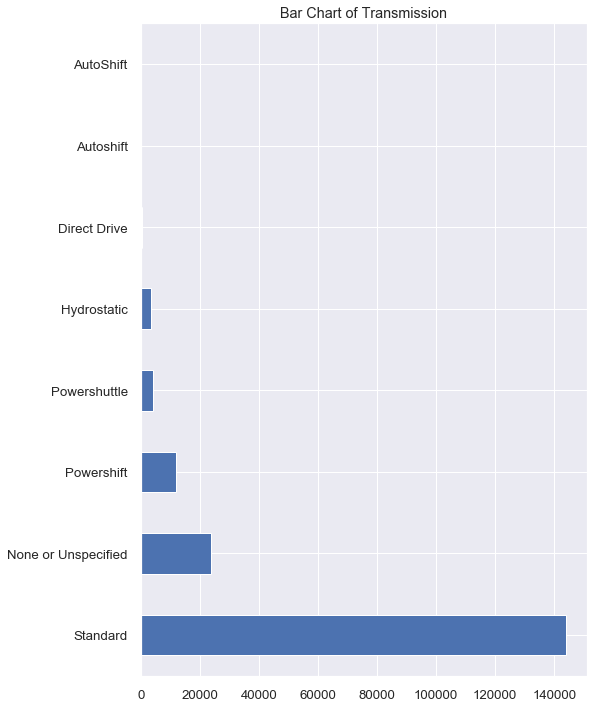

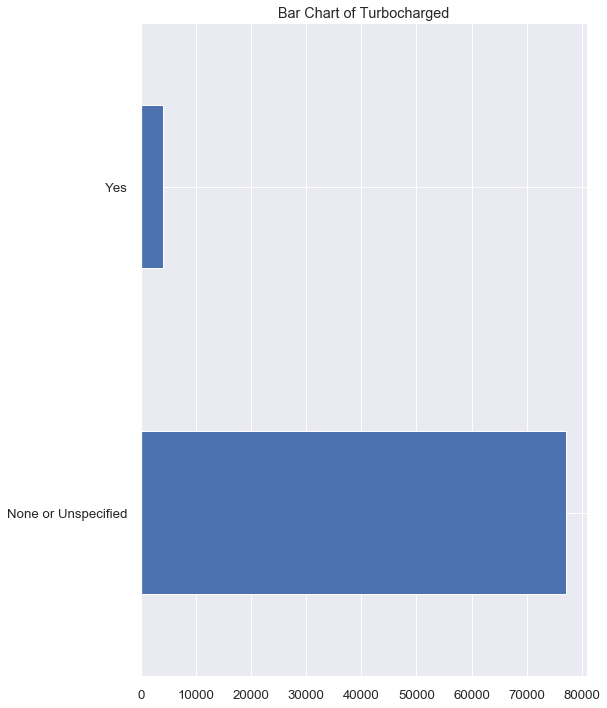

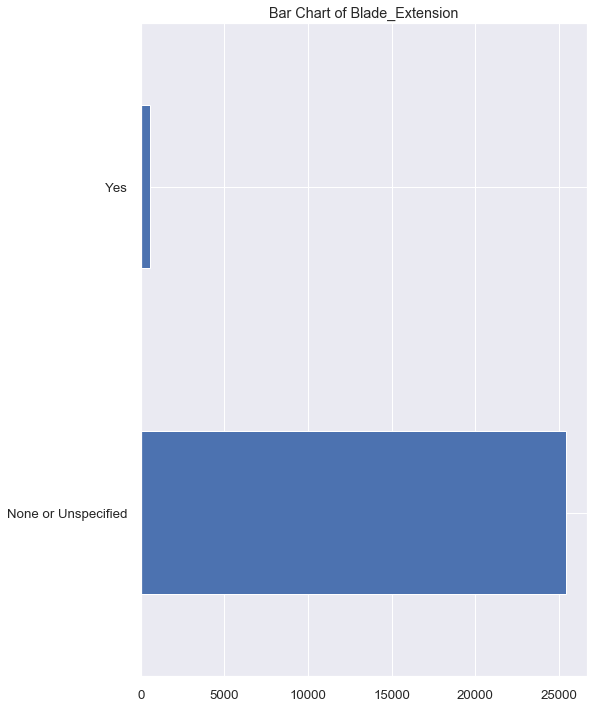

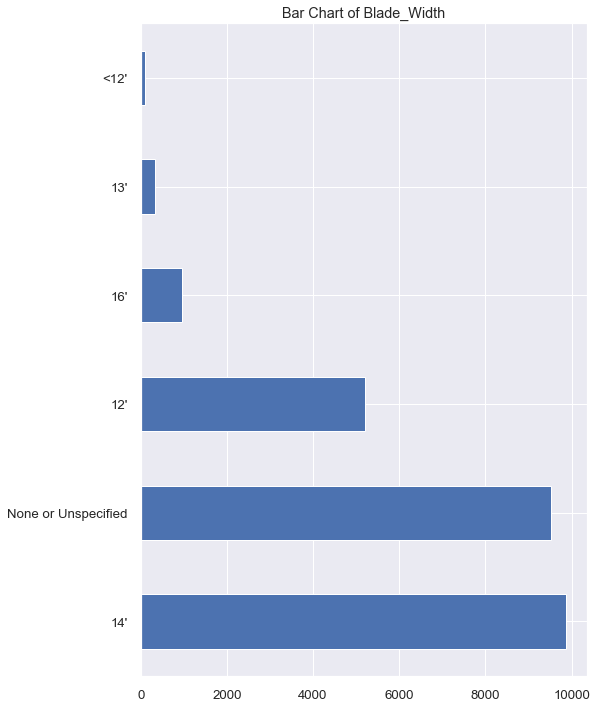

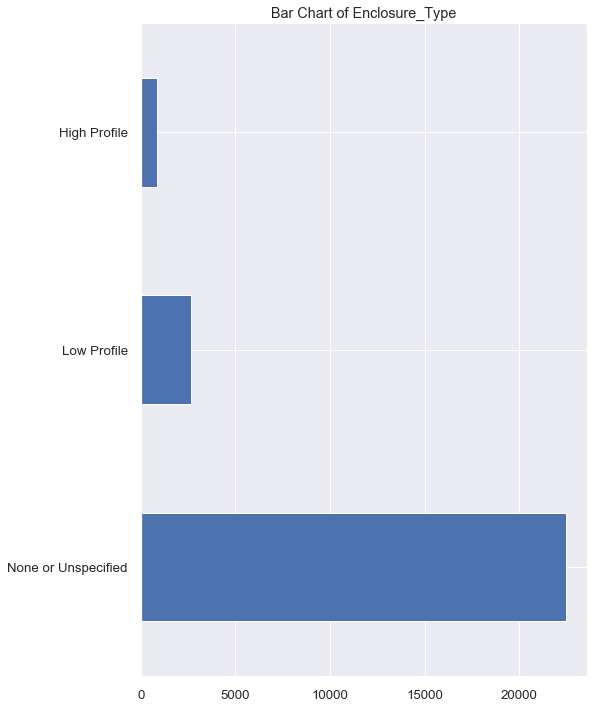

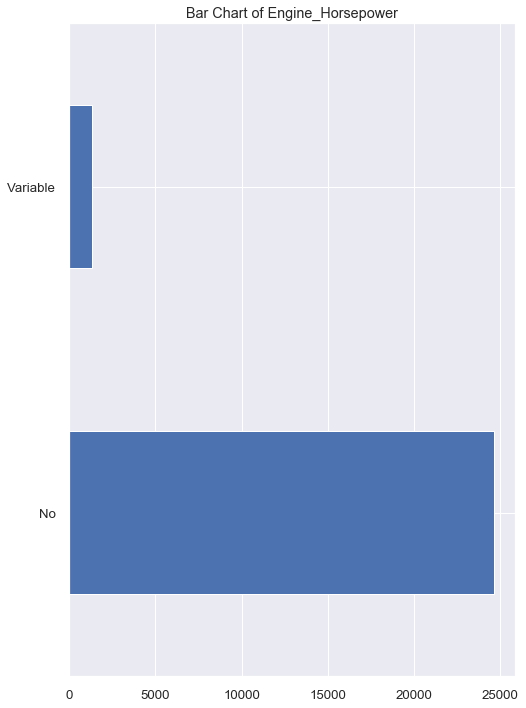

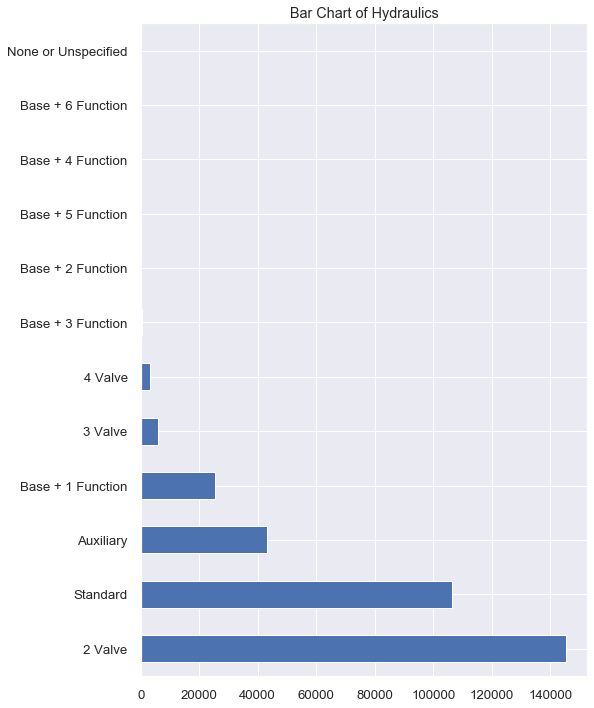

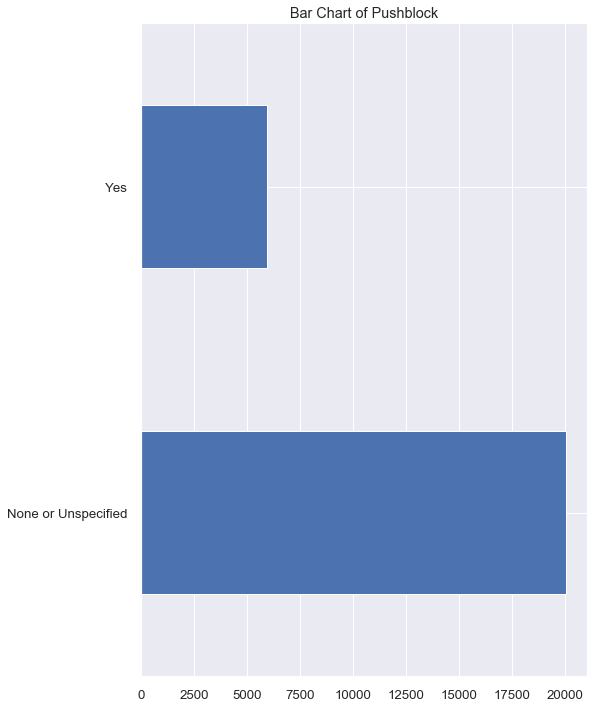

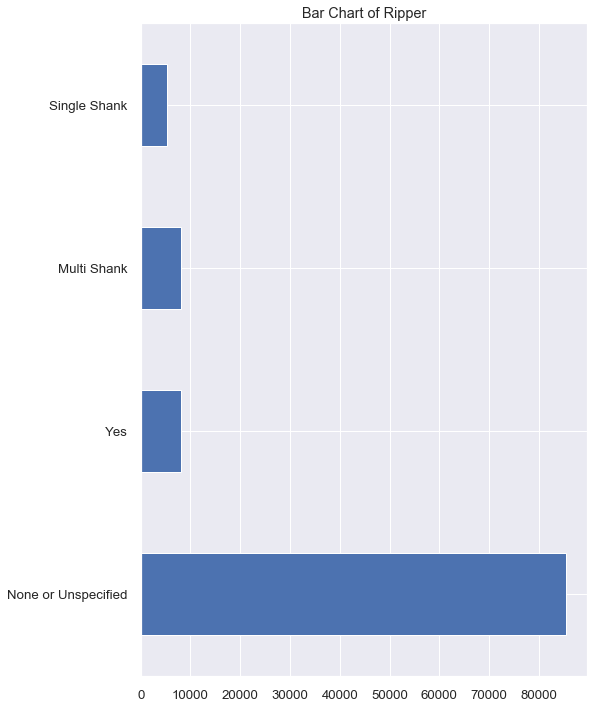

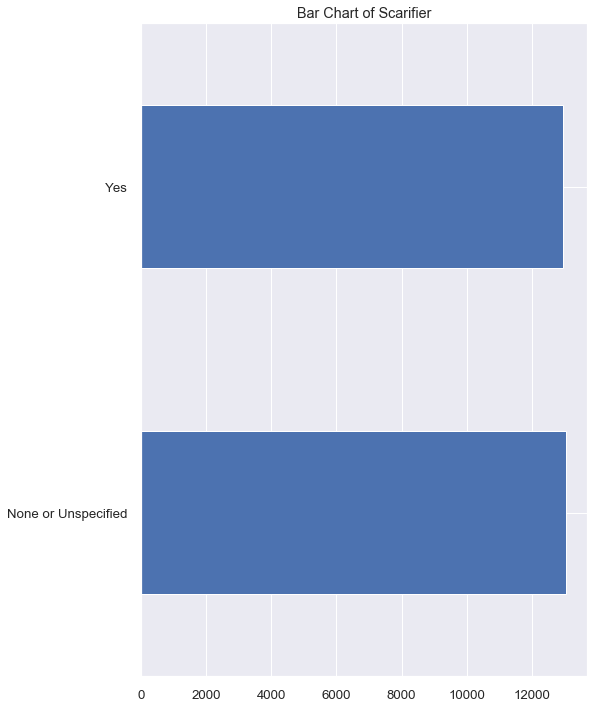

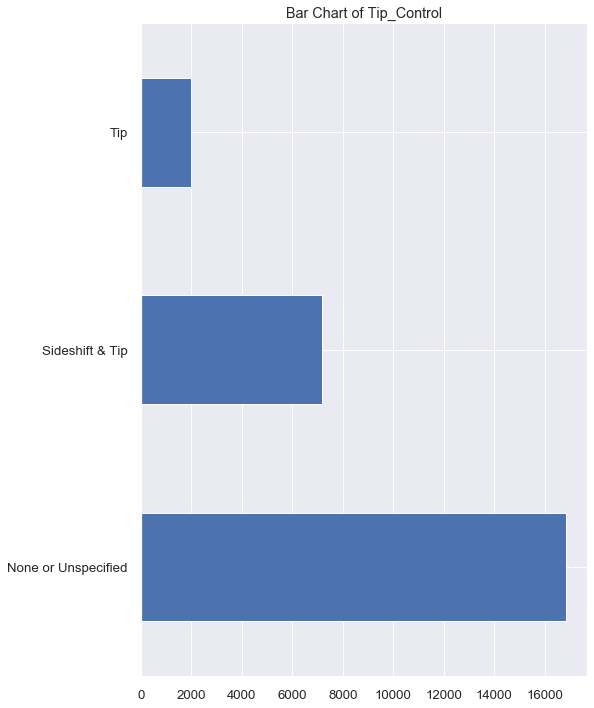

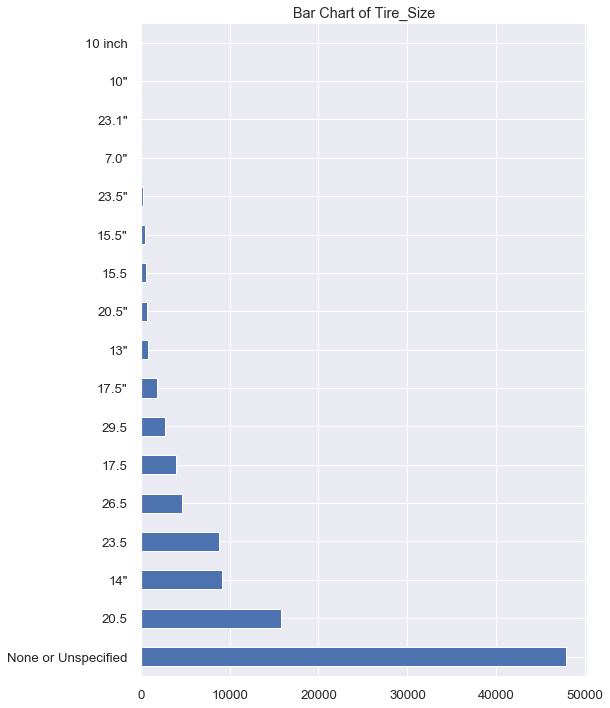

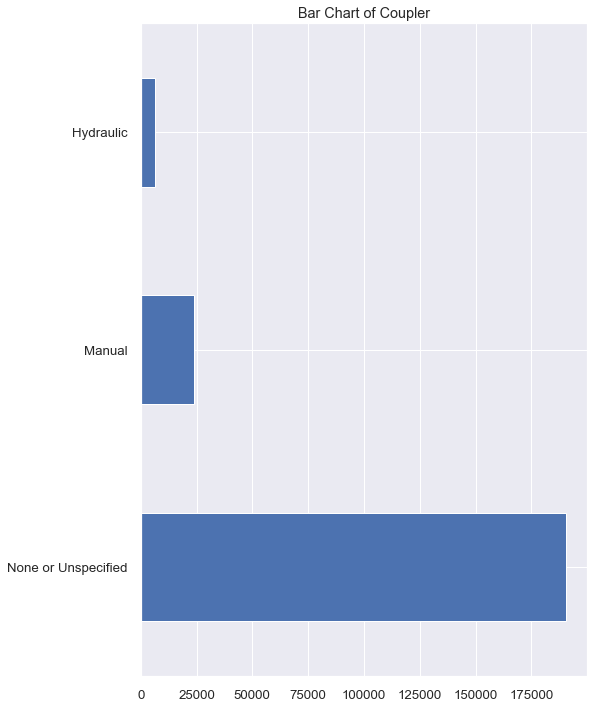

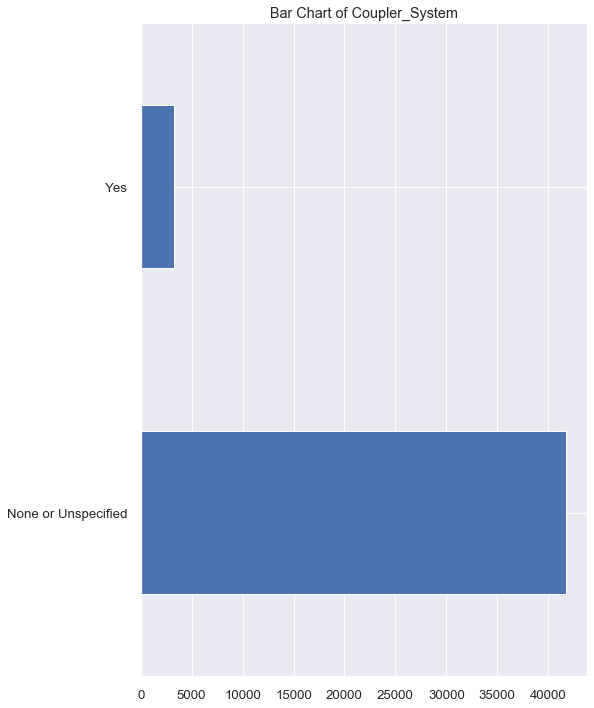

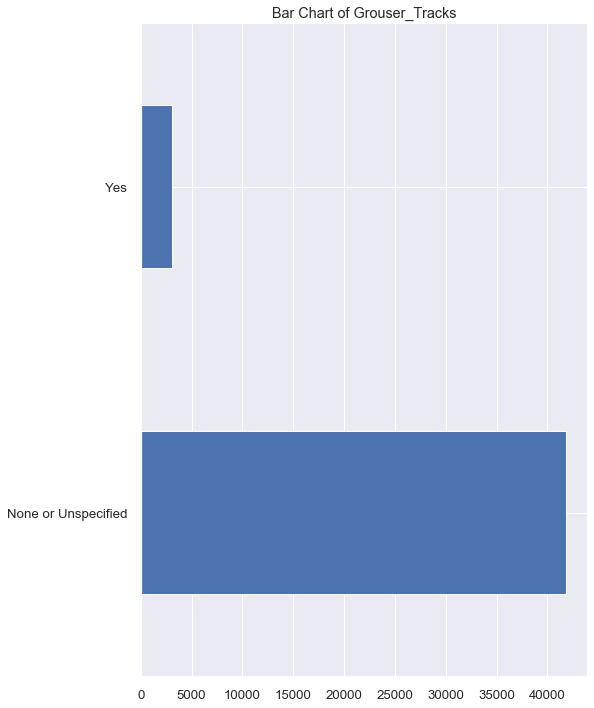

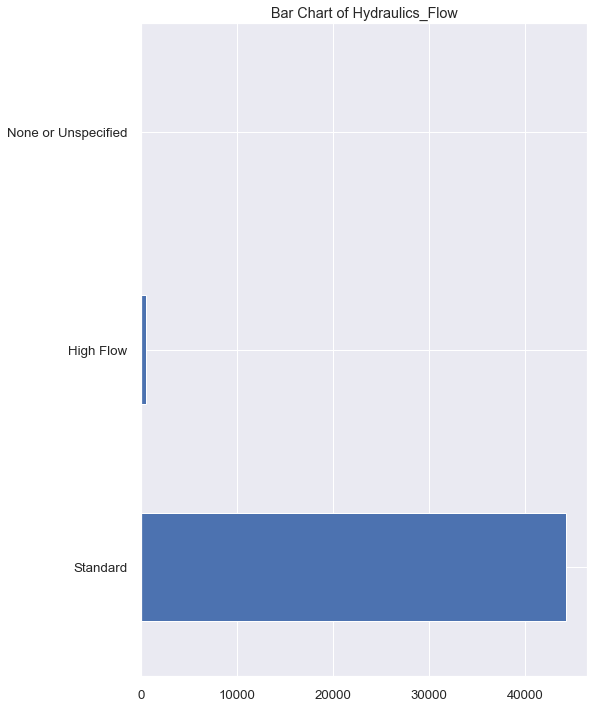

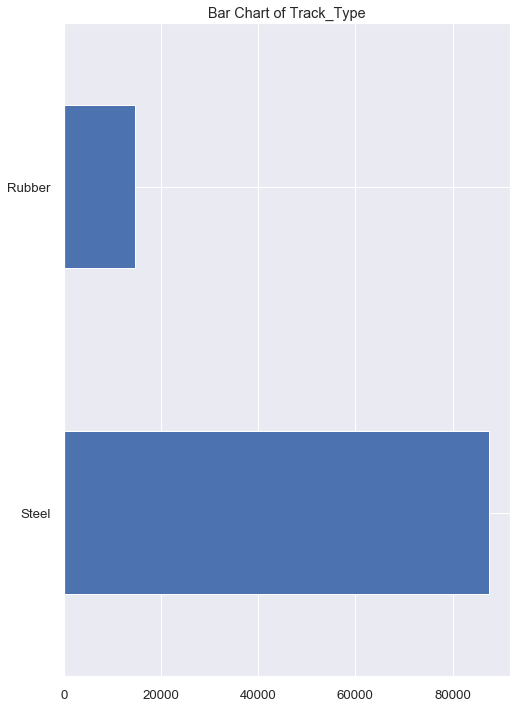

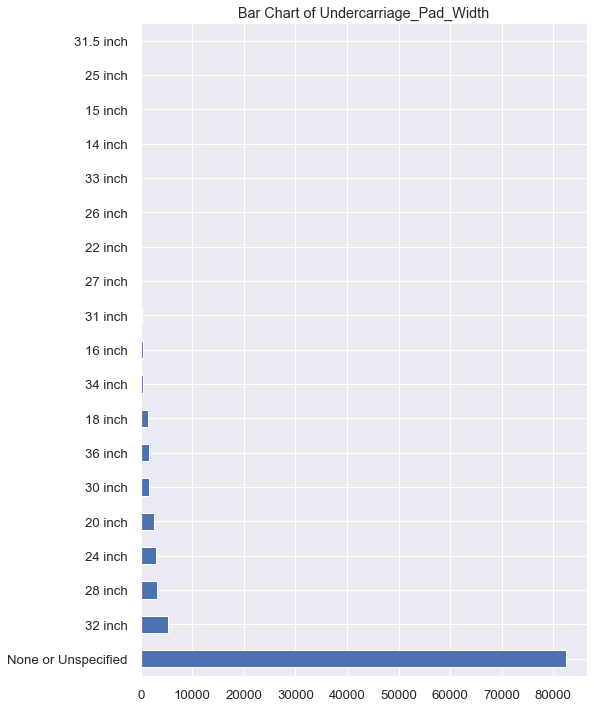

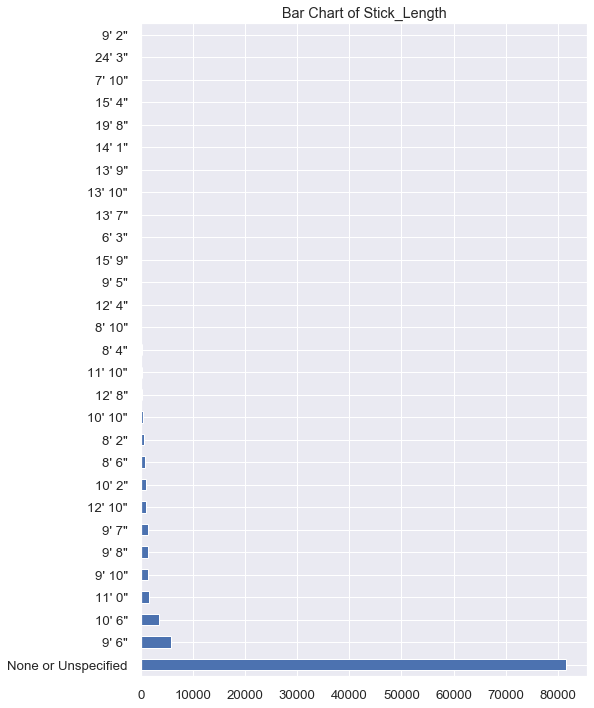

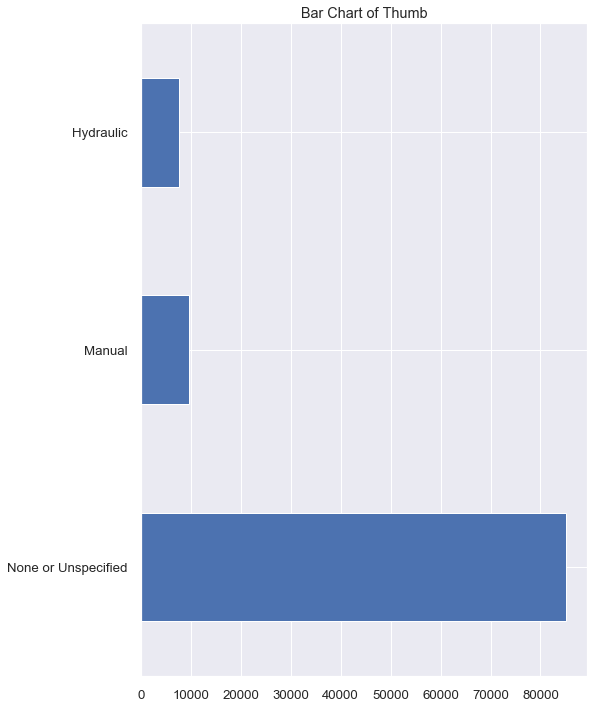

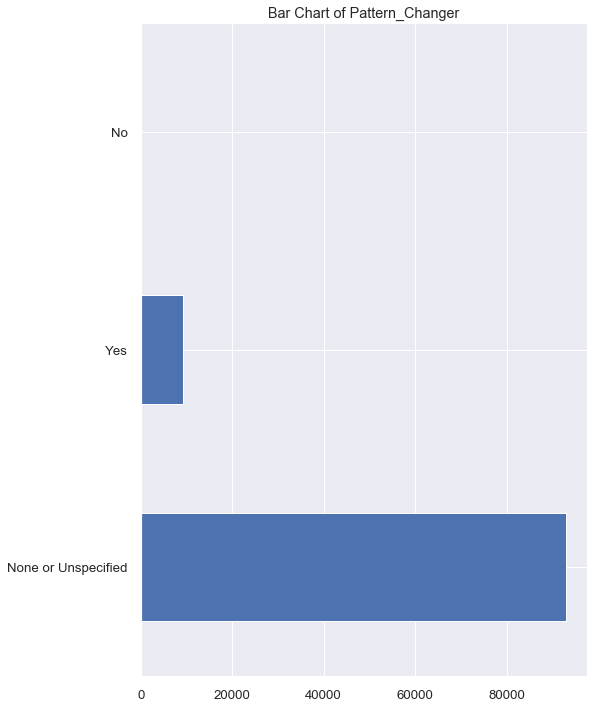

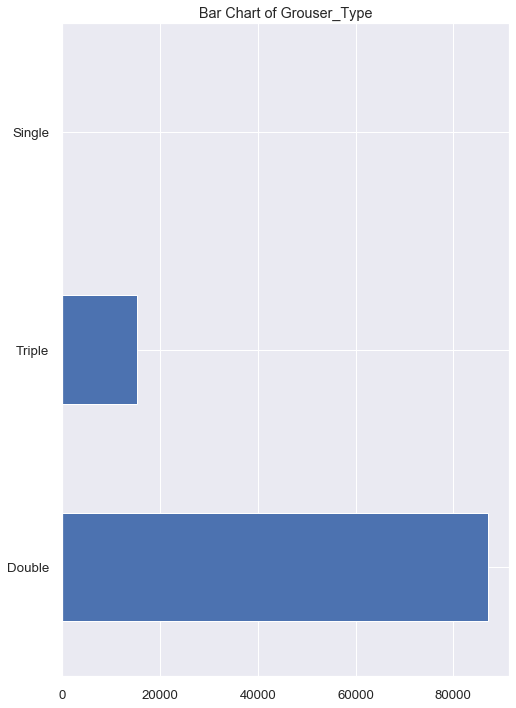

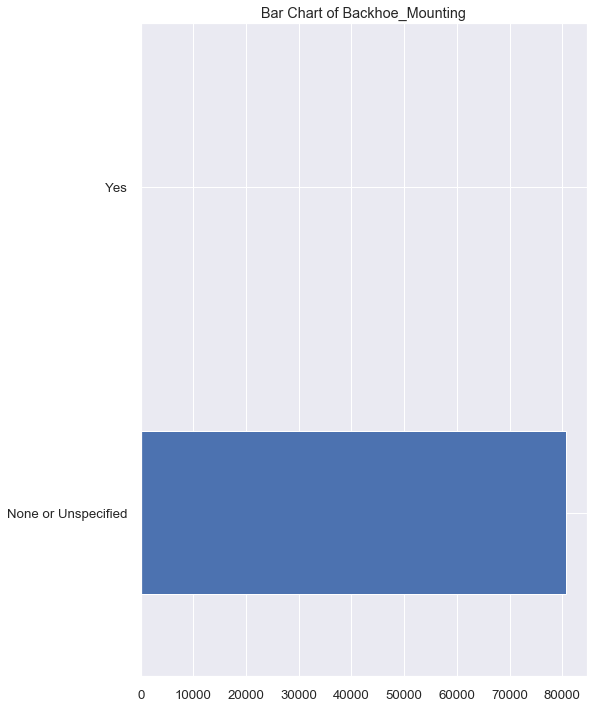

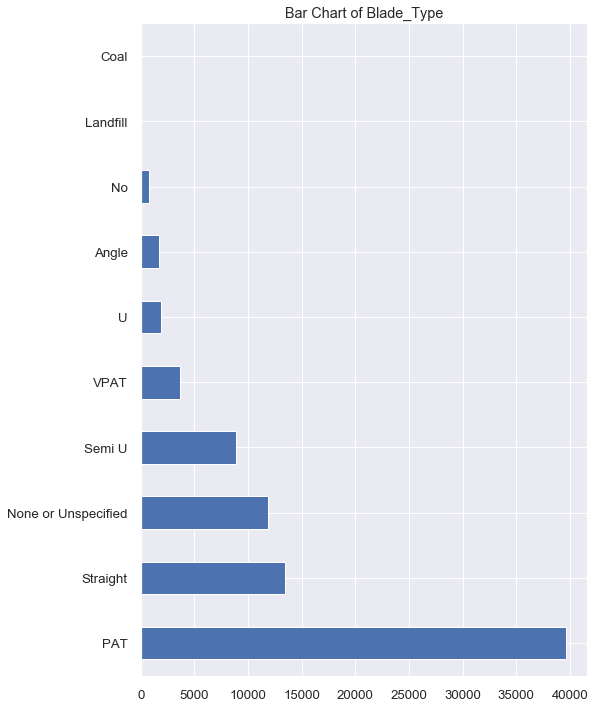

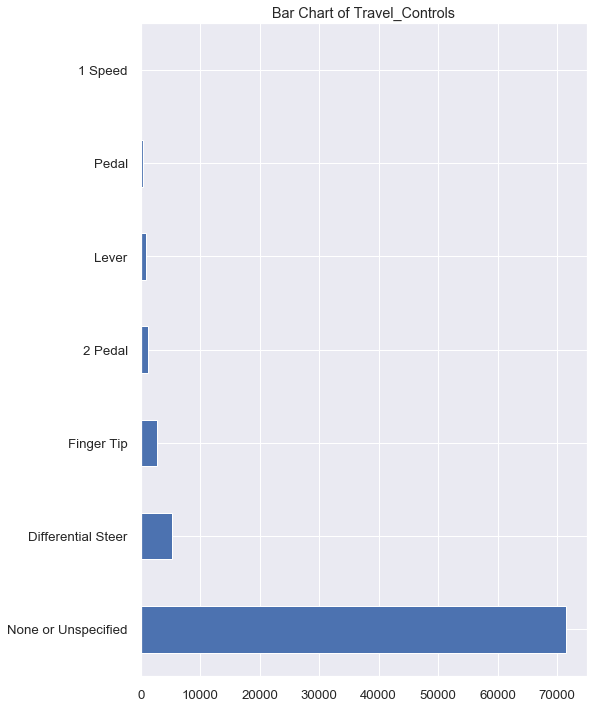

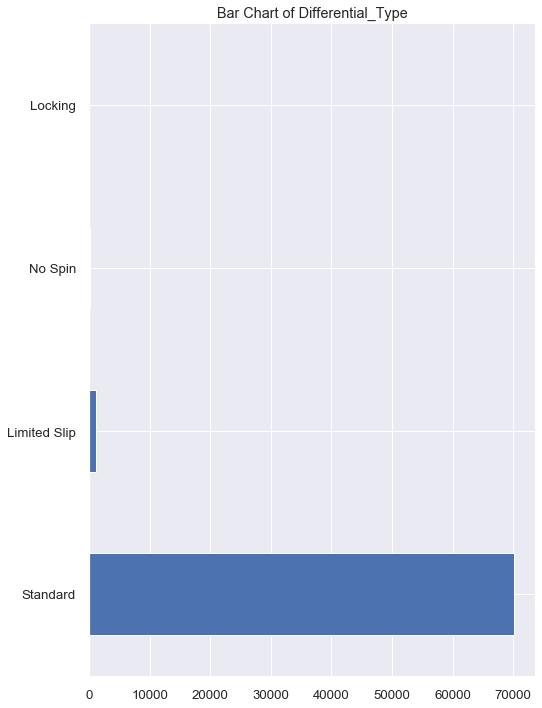

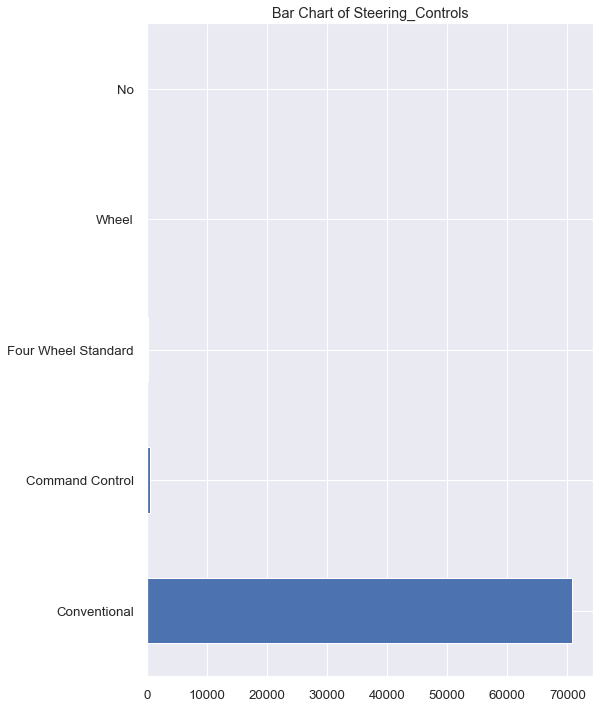

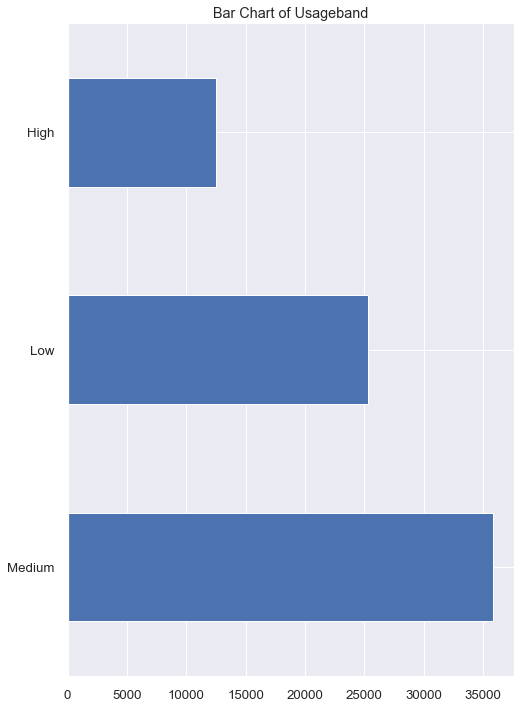

pass fiModelDesc
pass fiBaseModel
pass fiSecondaryDesc
pass fiModelSeries
pass fiModelDescriptor


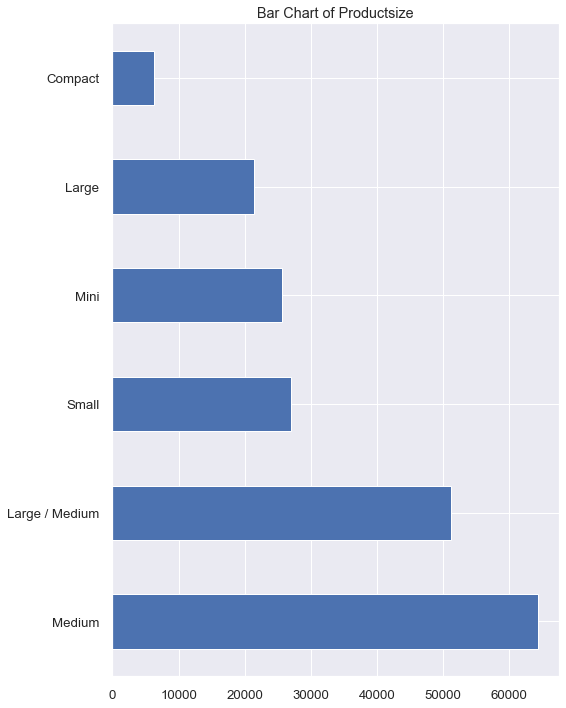

pass fiProductClassDesc


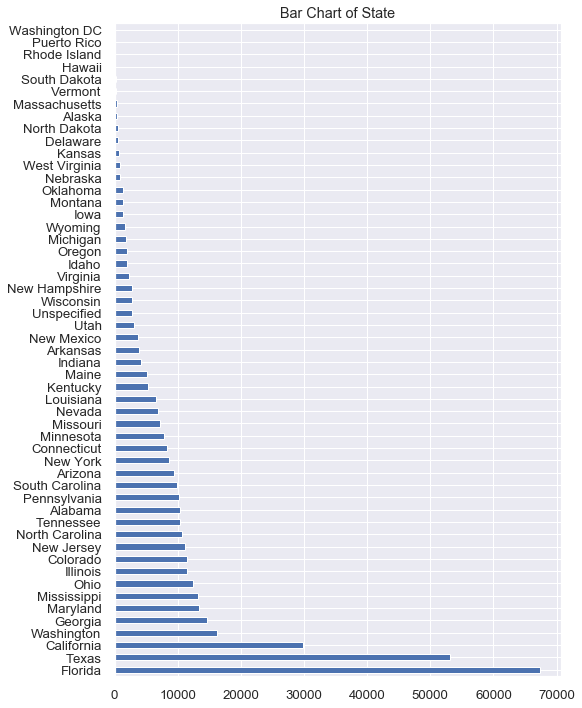

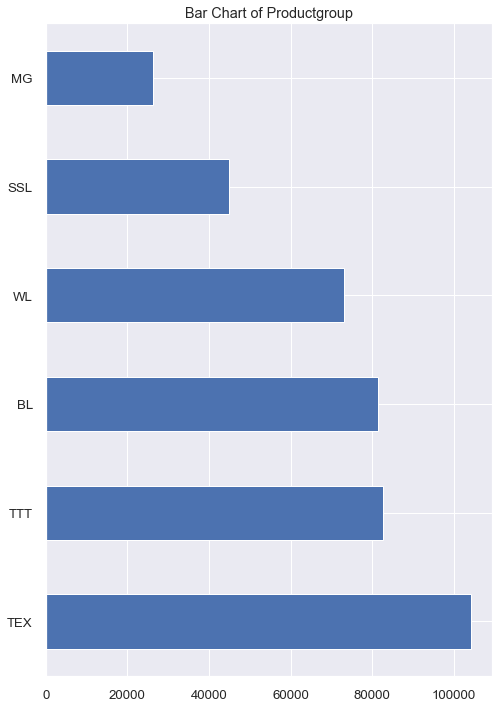

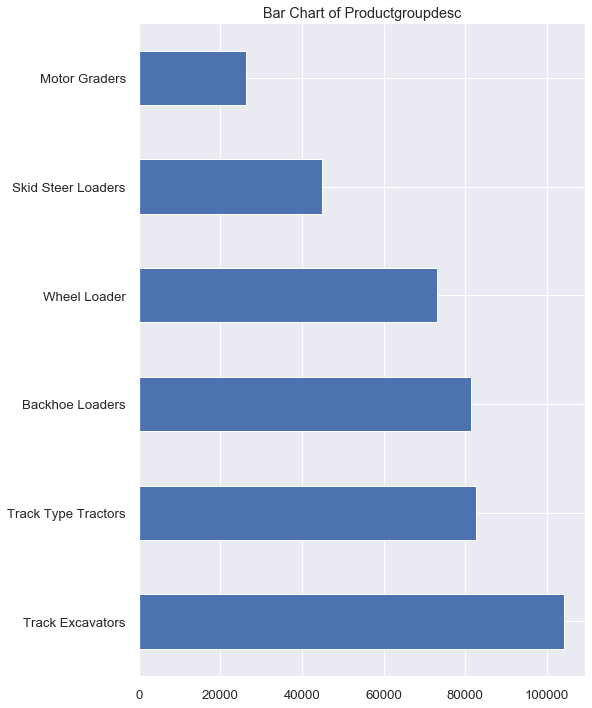

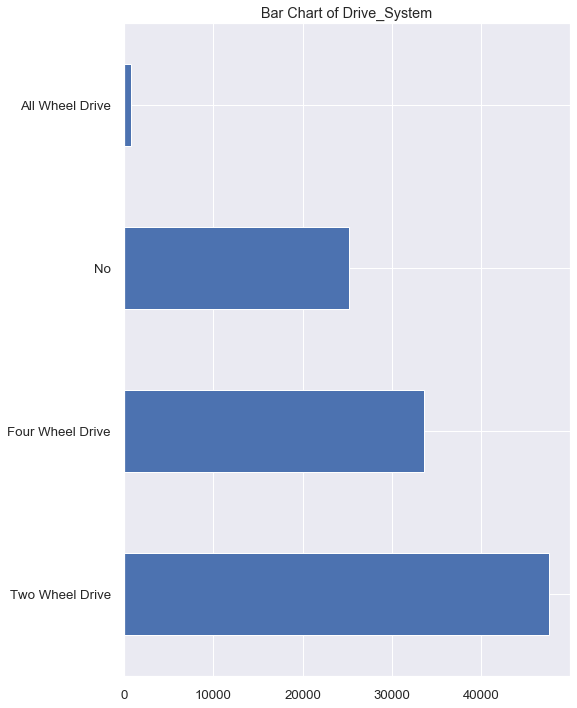

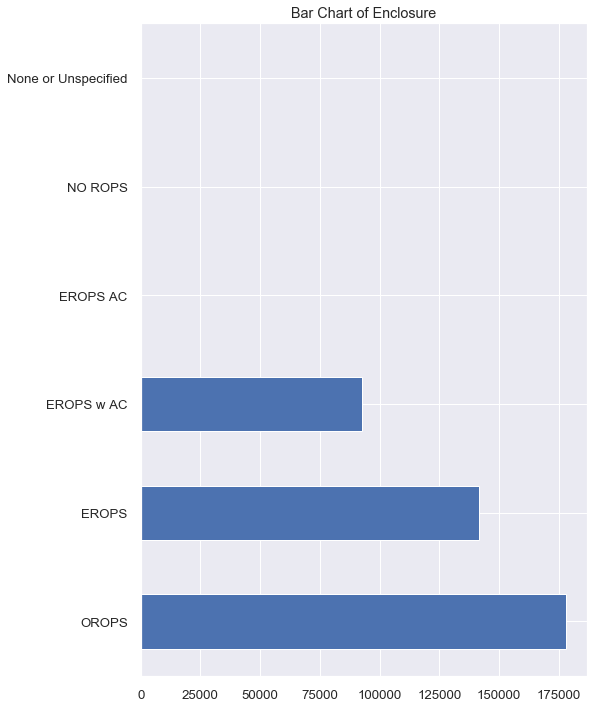

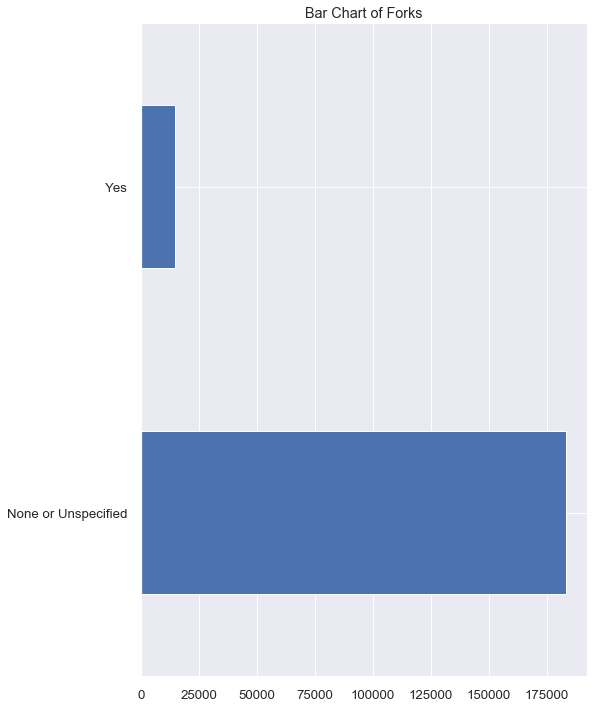

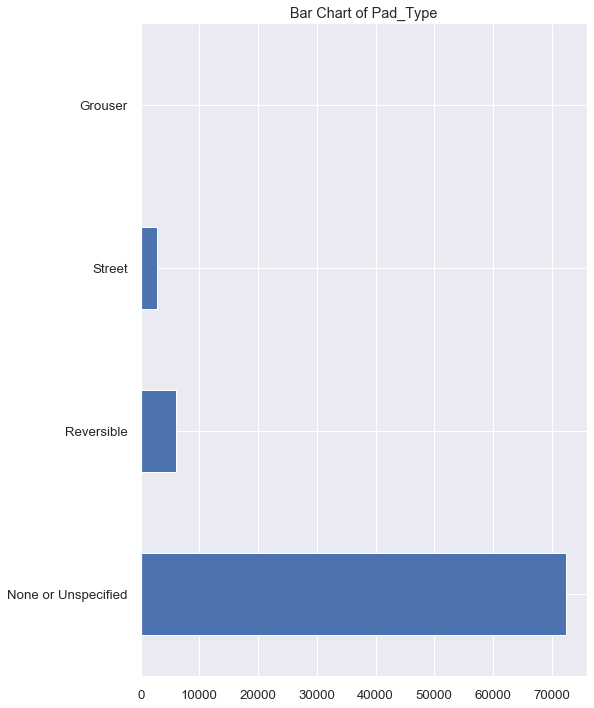

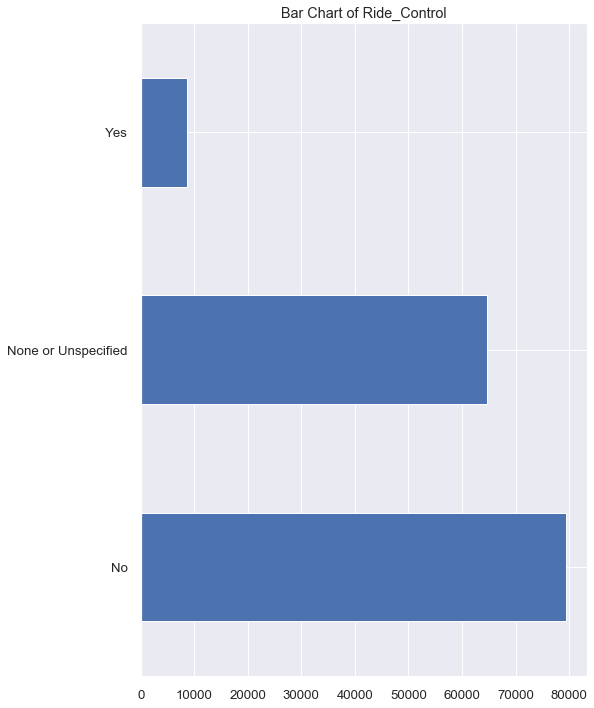

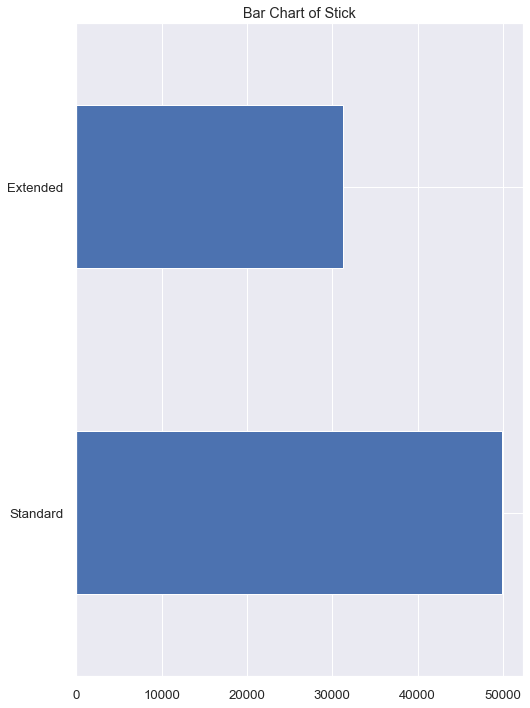

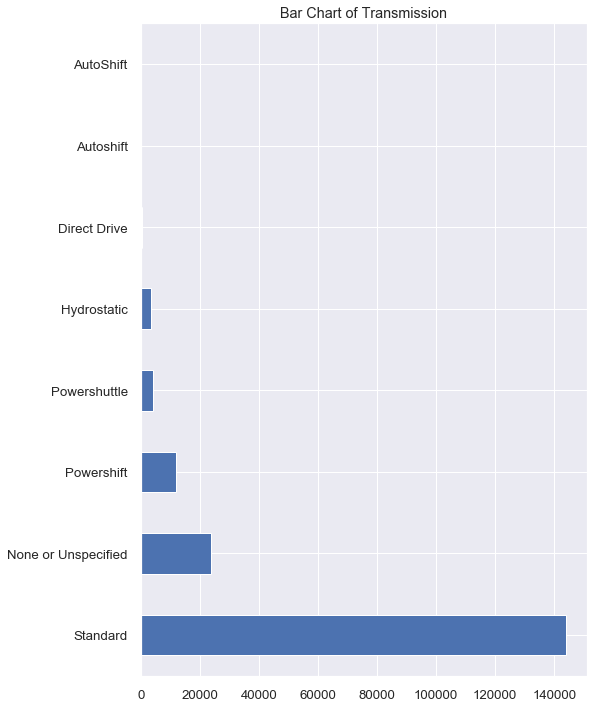

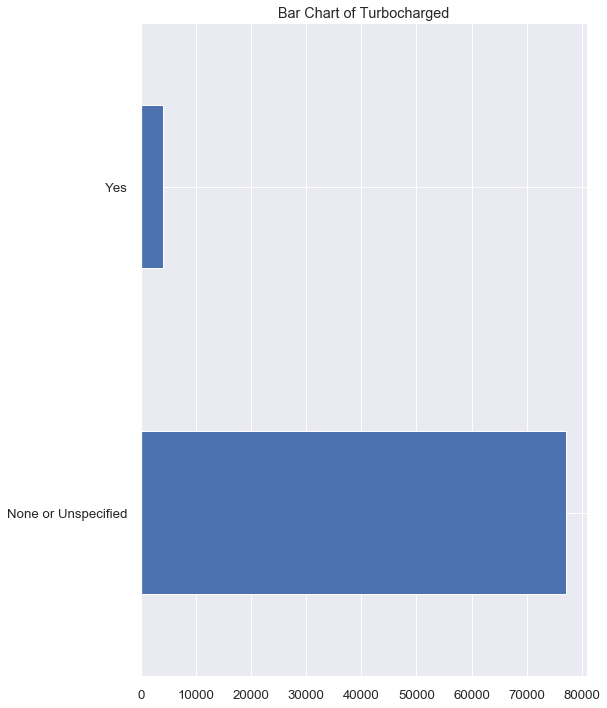

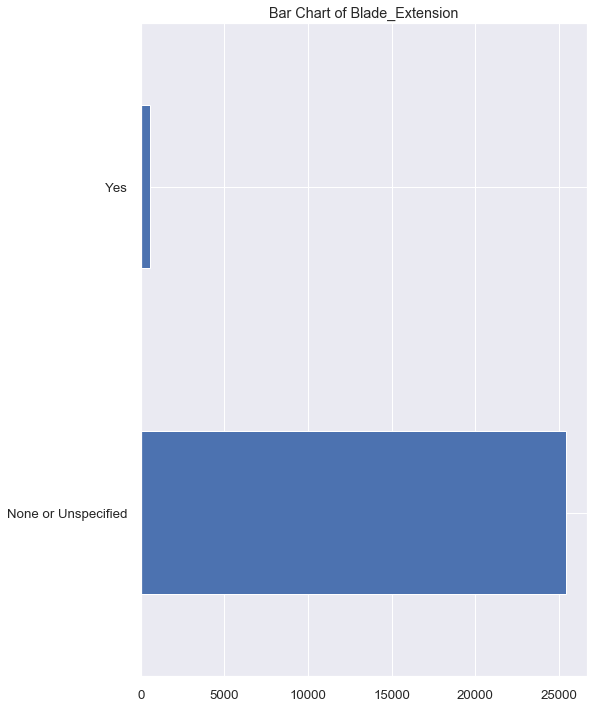

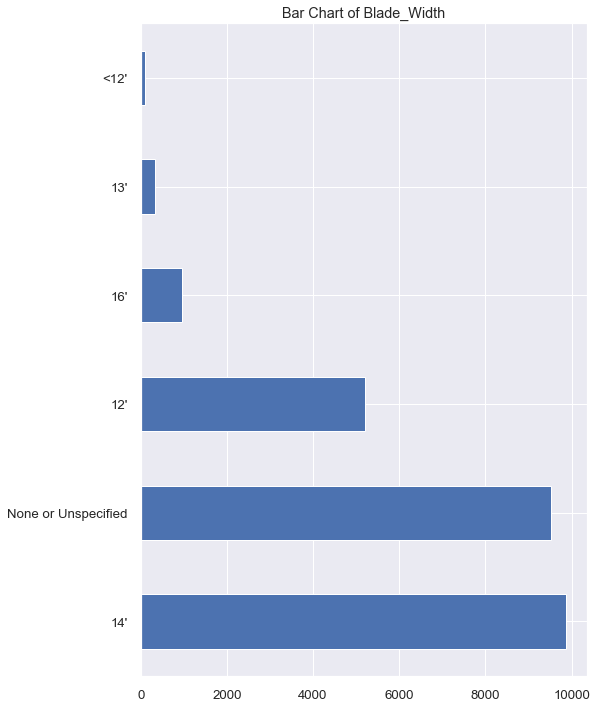

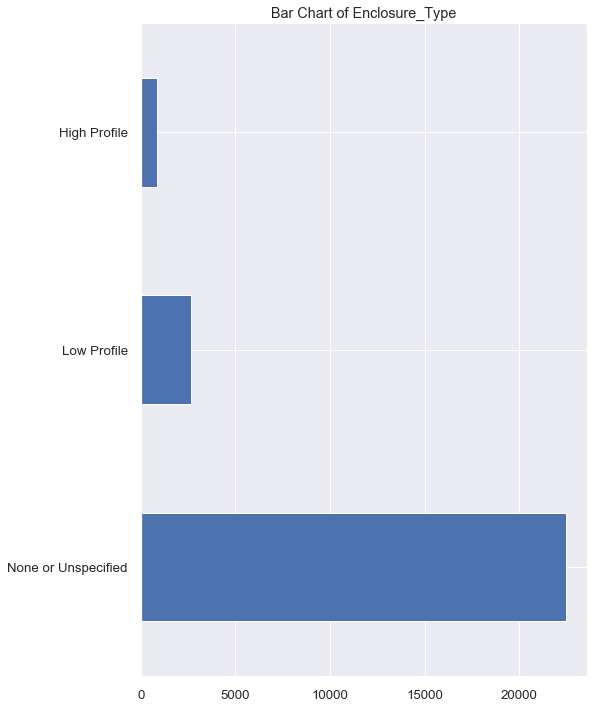

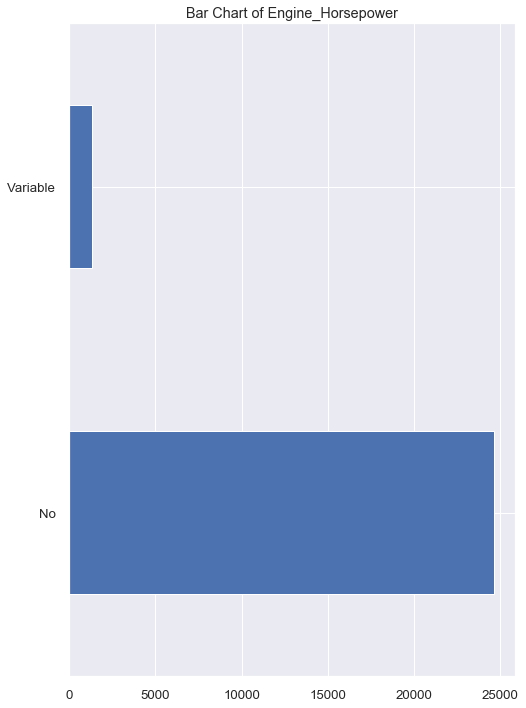

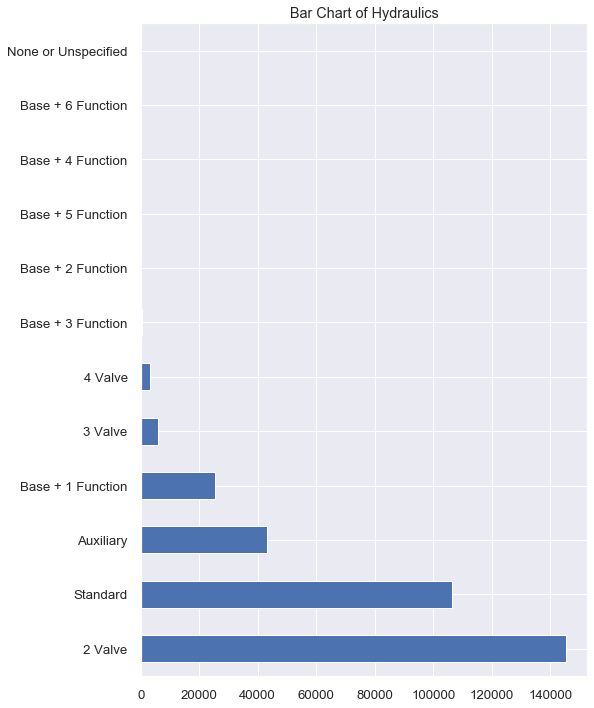

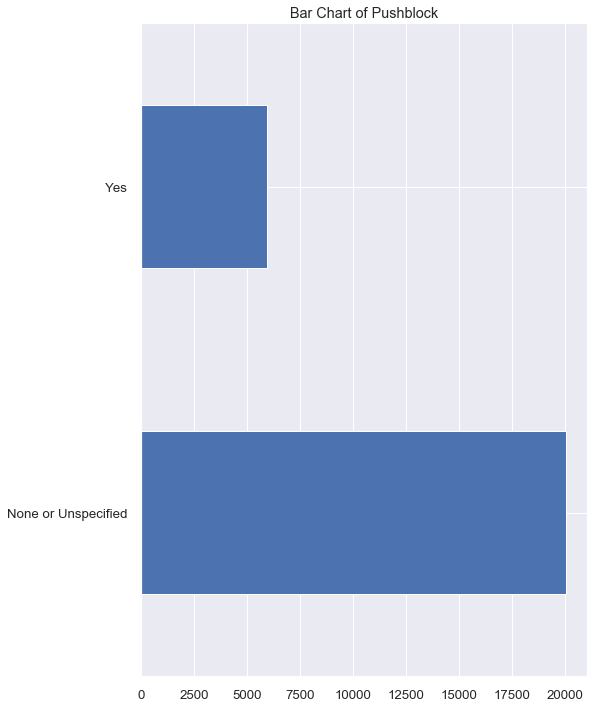

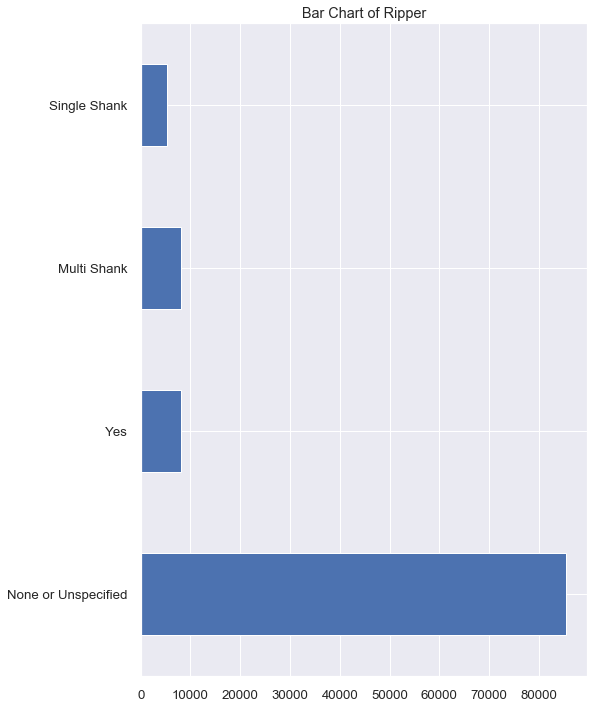

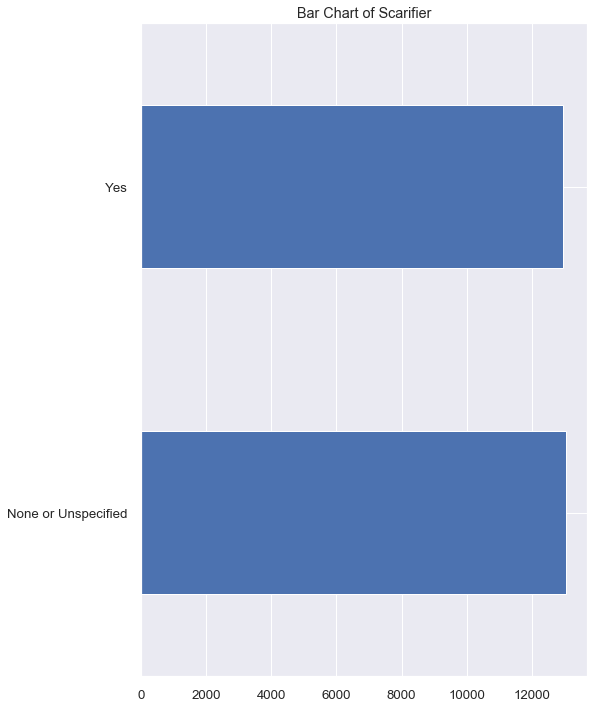

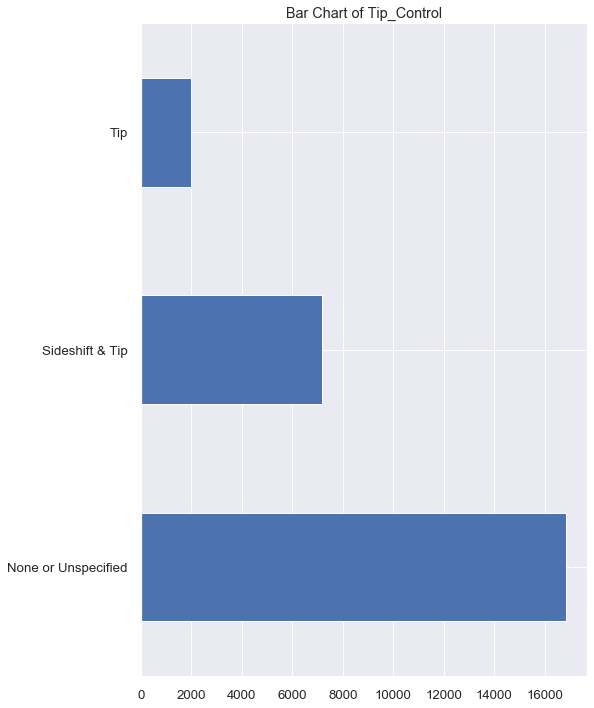

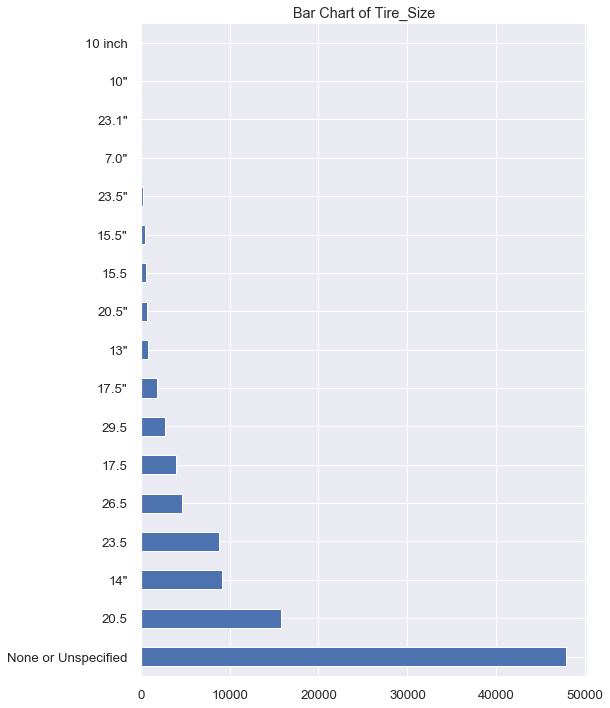

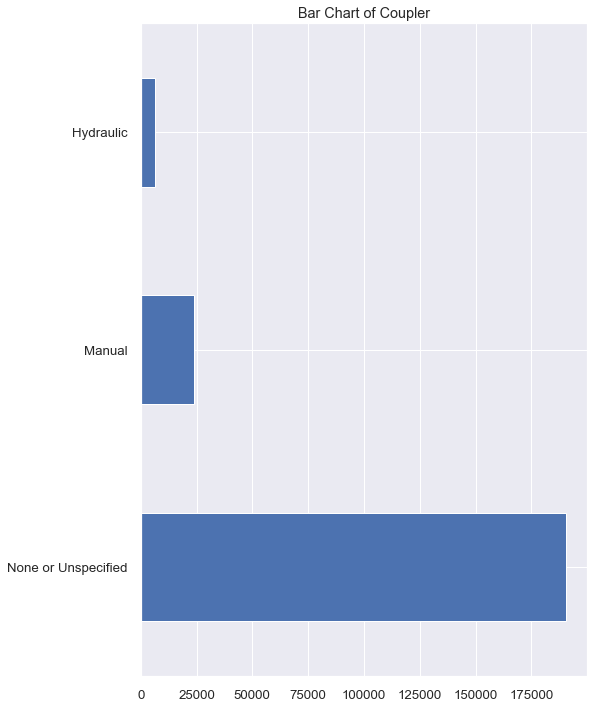

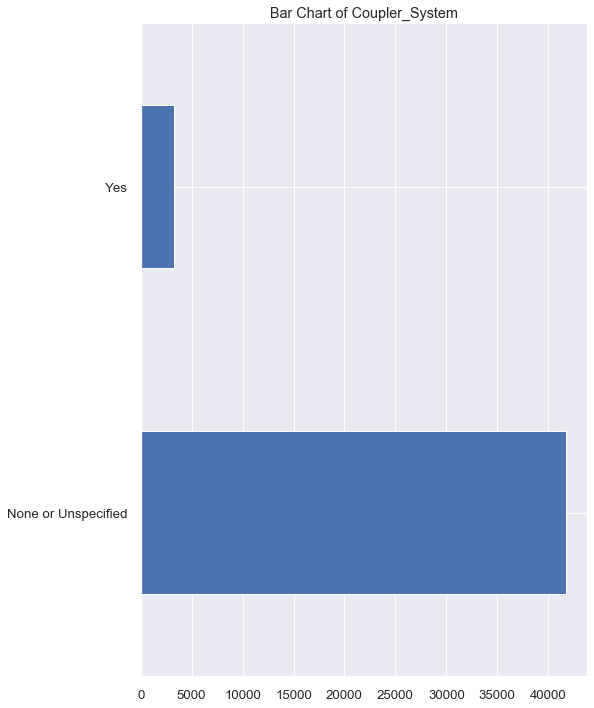

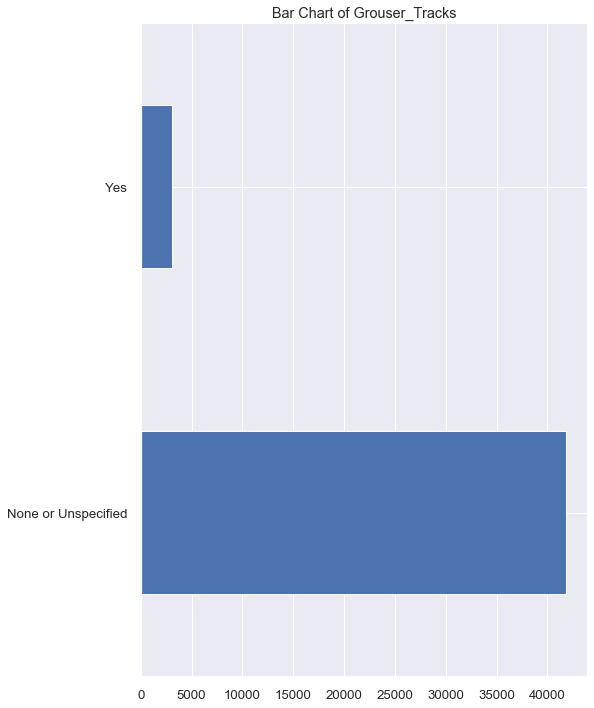

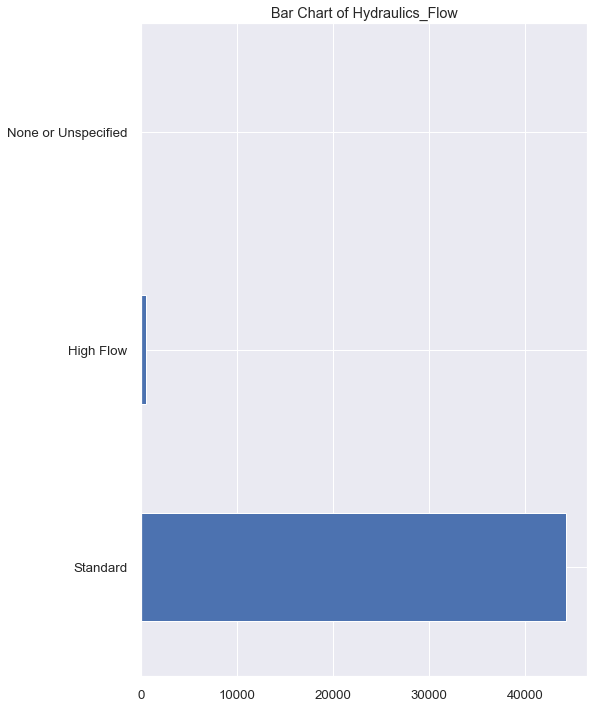

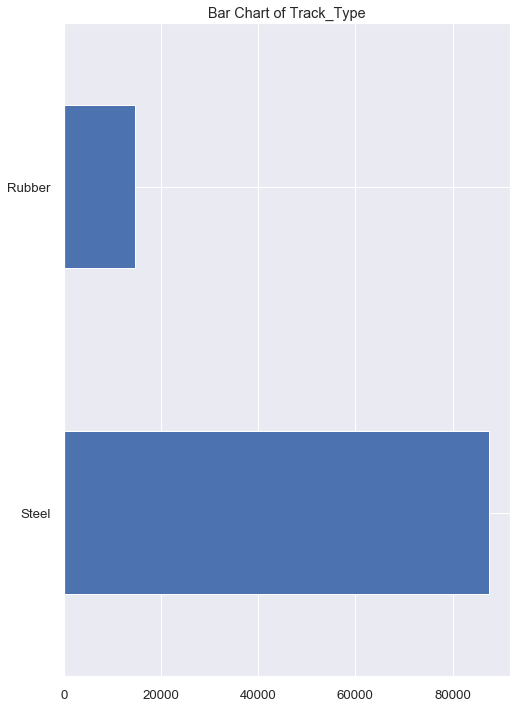

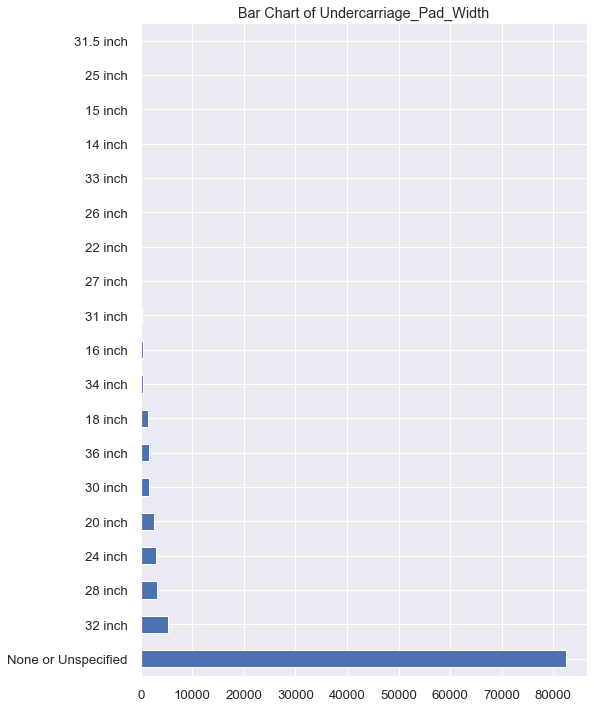

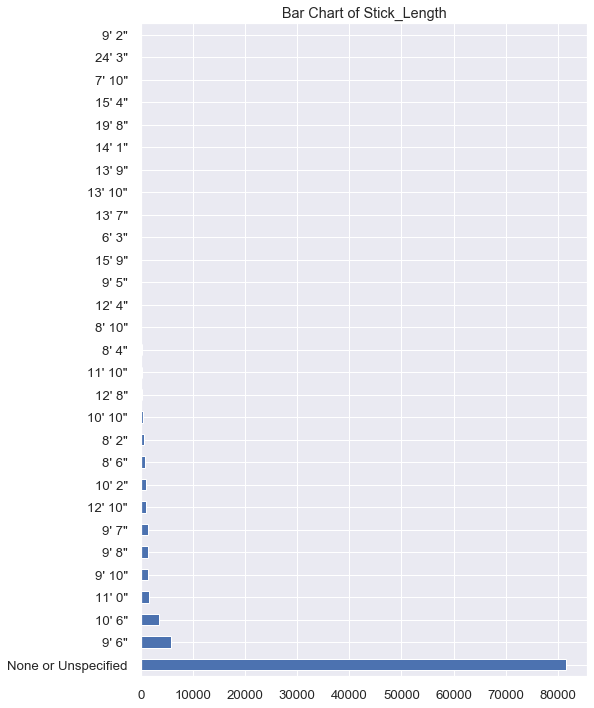

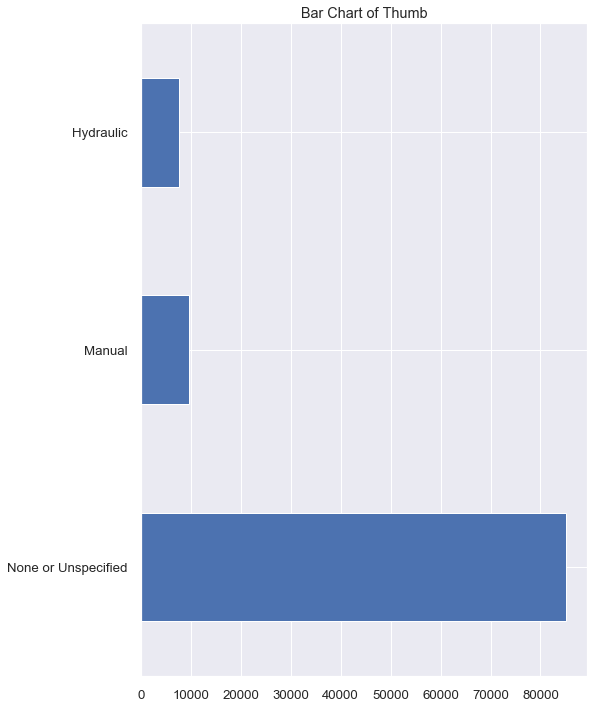

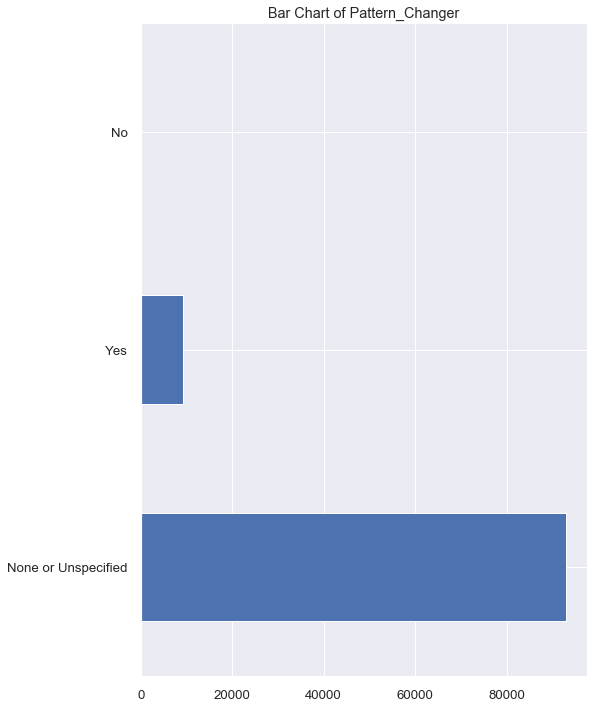

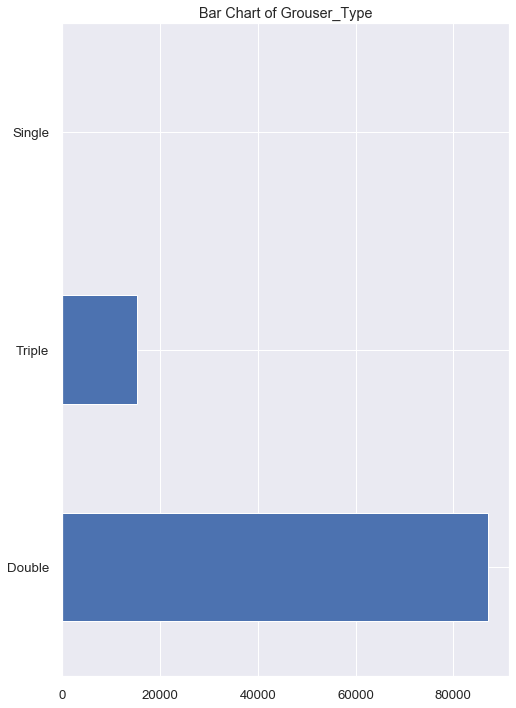

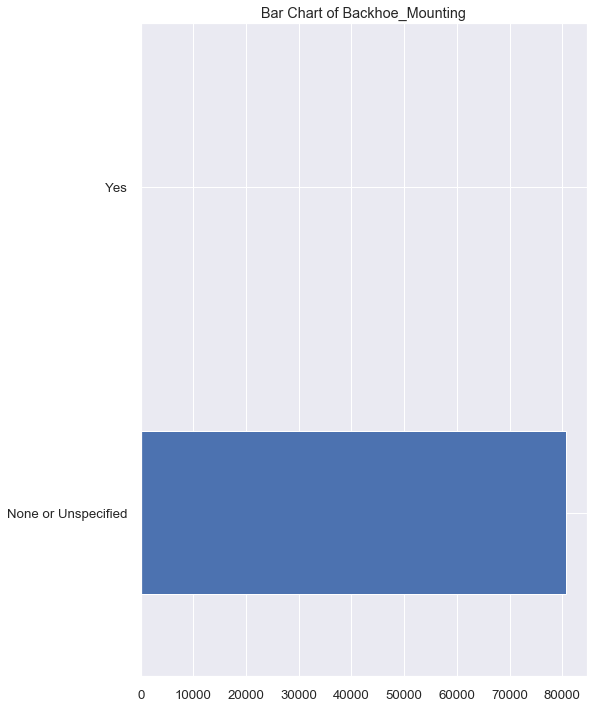

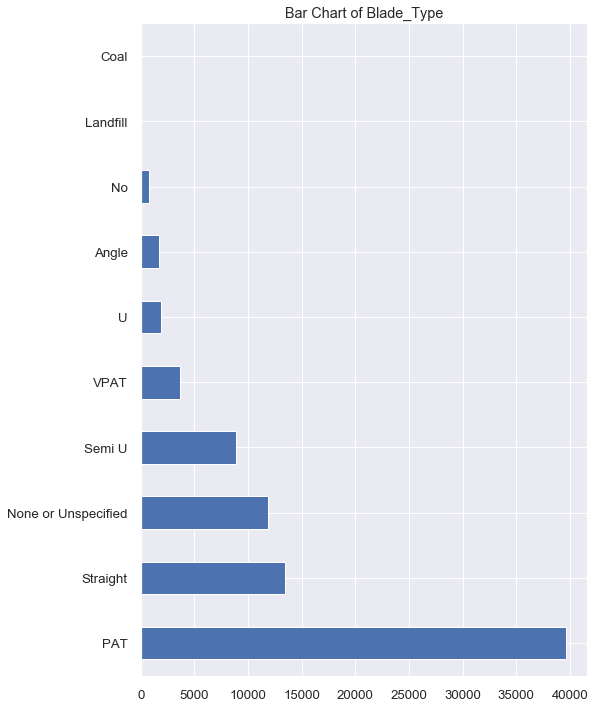

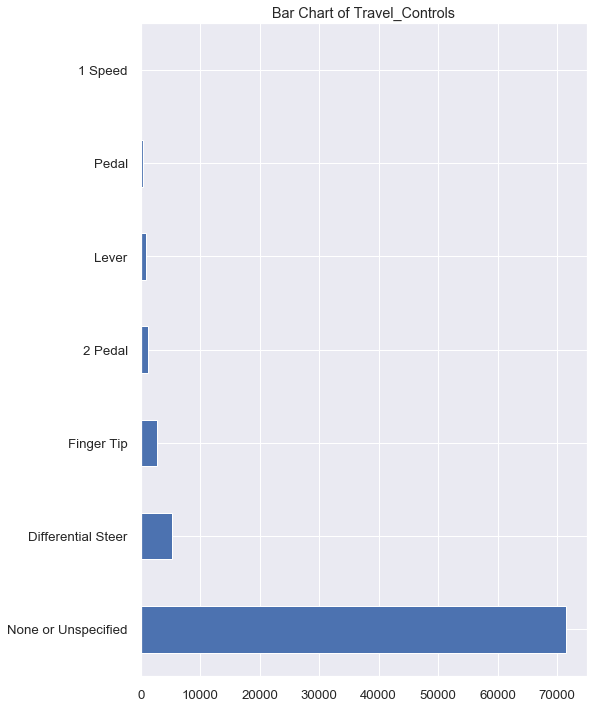

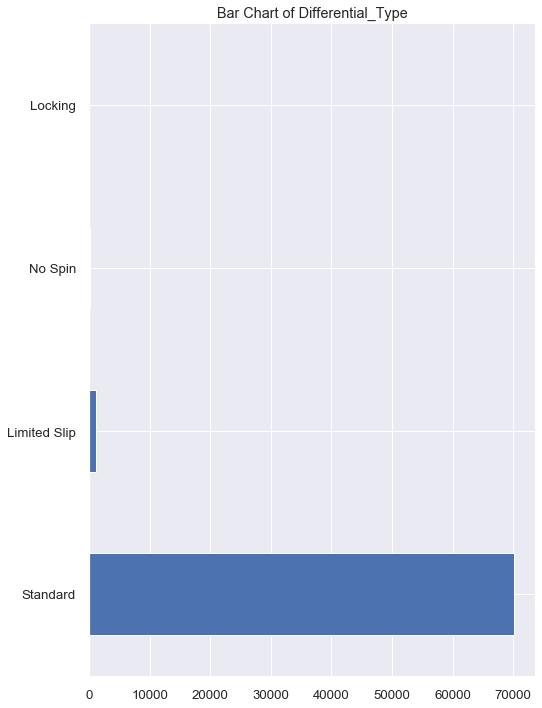

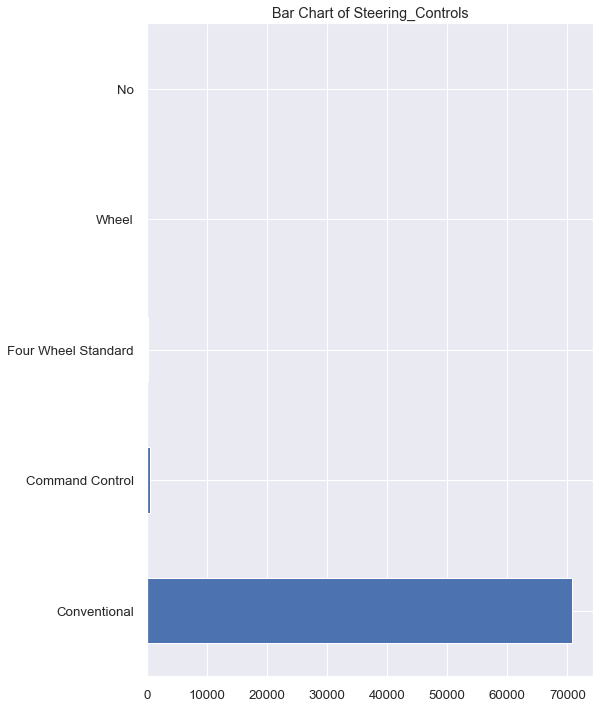

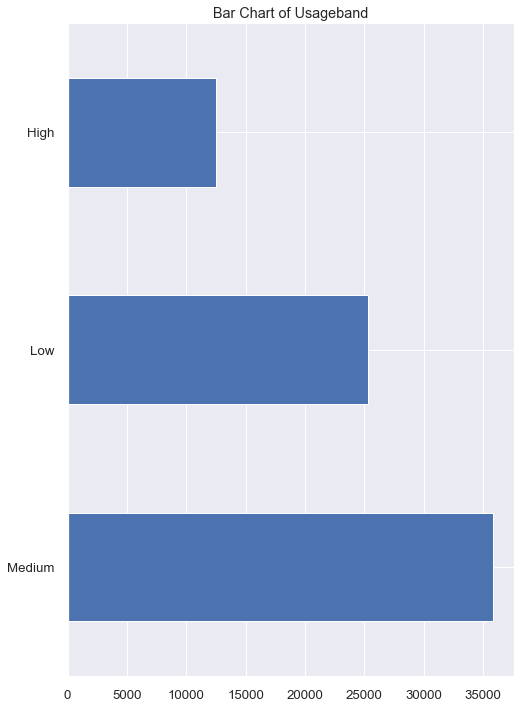

pass fiModelDesc
pass fiBaseModel
pass fiSecondaryDesc
pass fiModelSeries
pass fiModelDescriptor


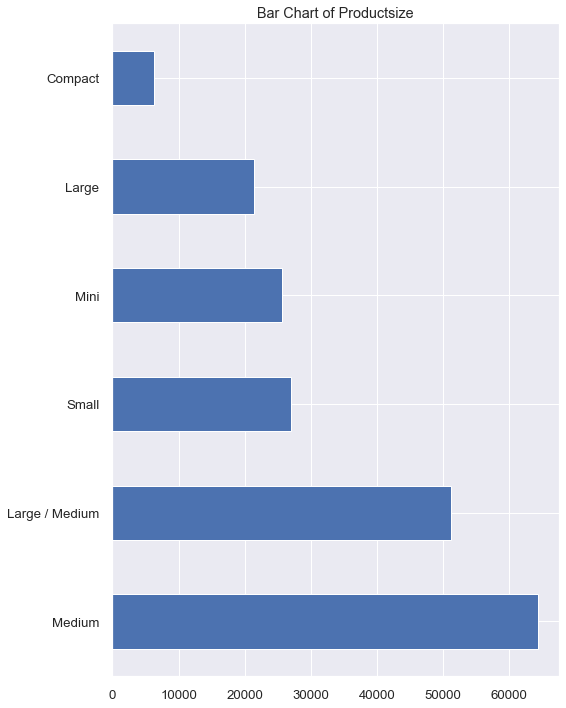

pass fiProductClassDesc


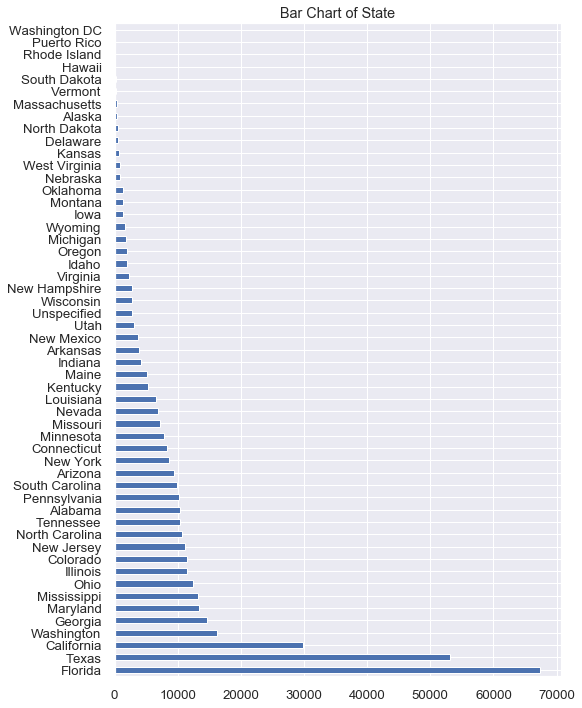

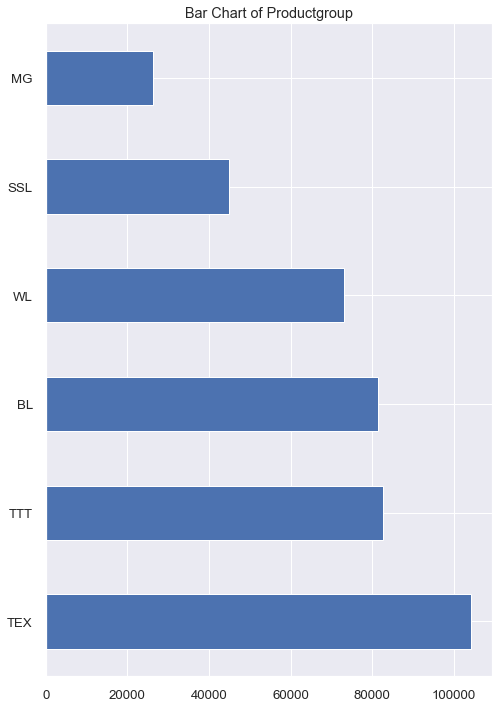

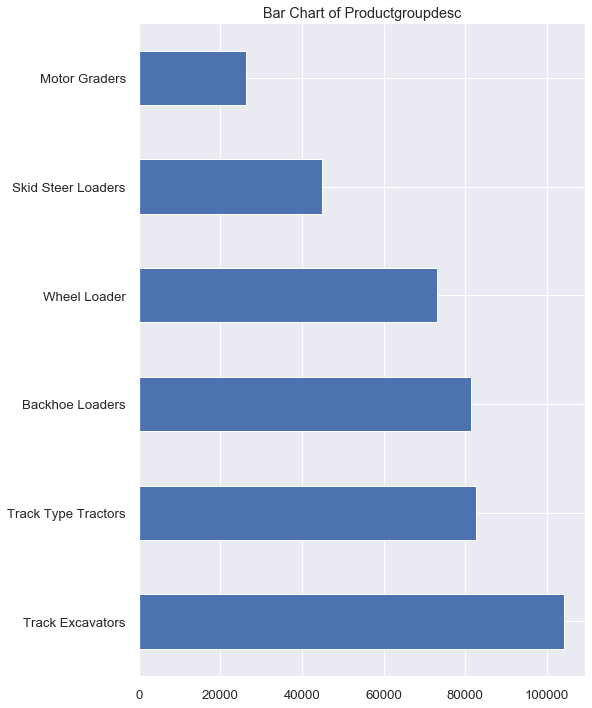

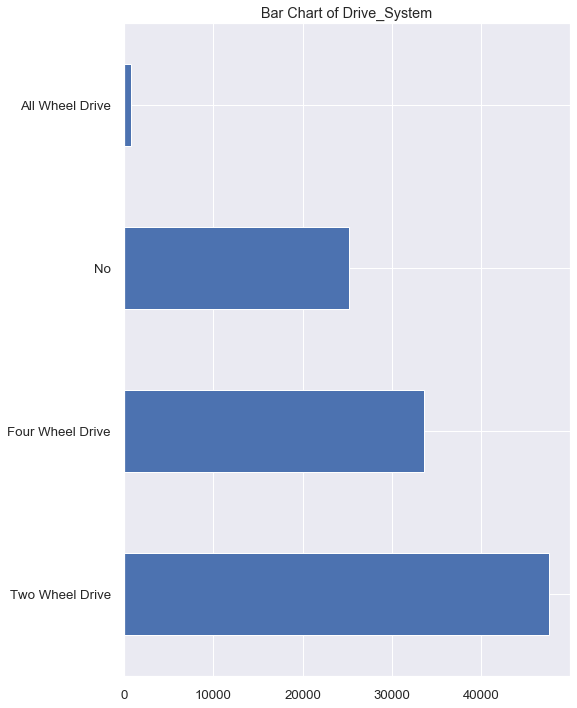

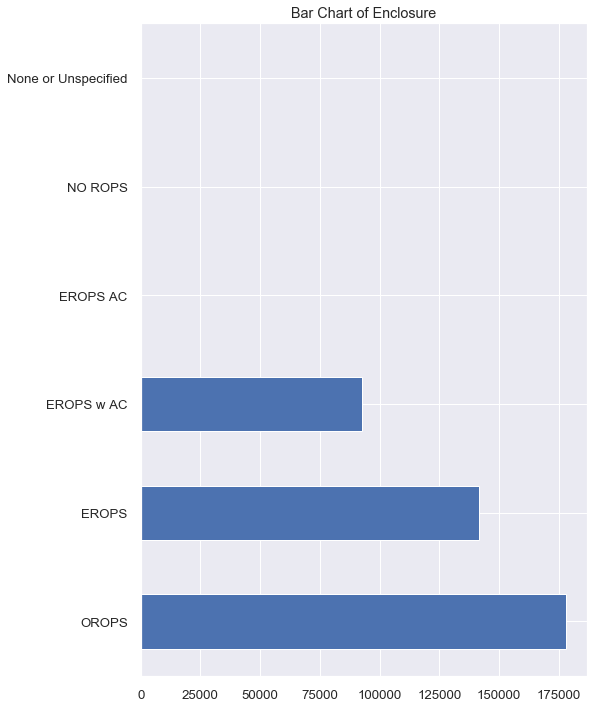

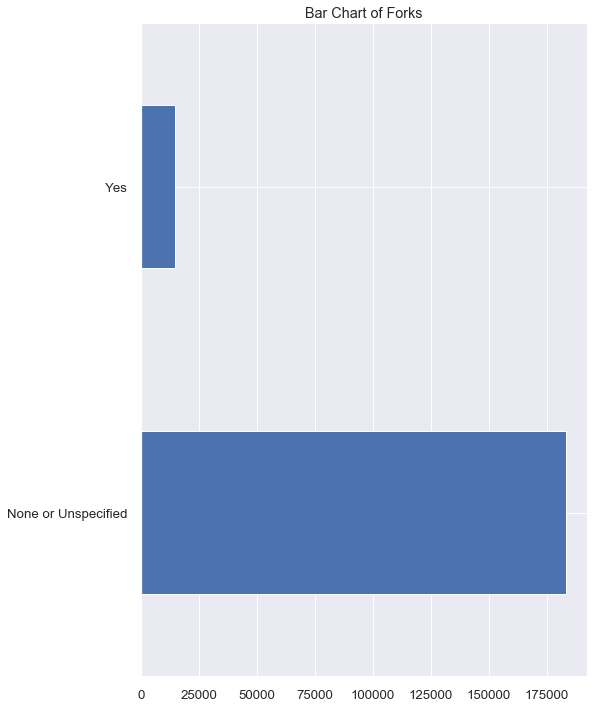

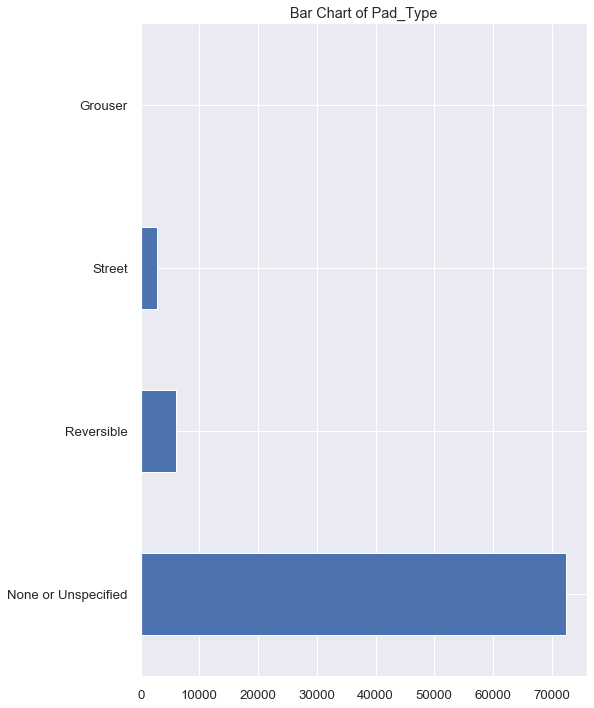

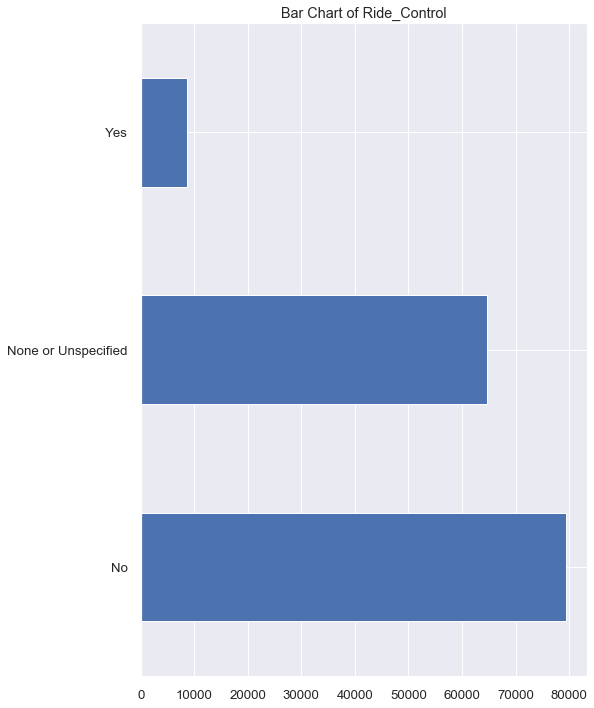

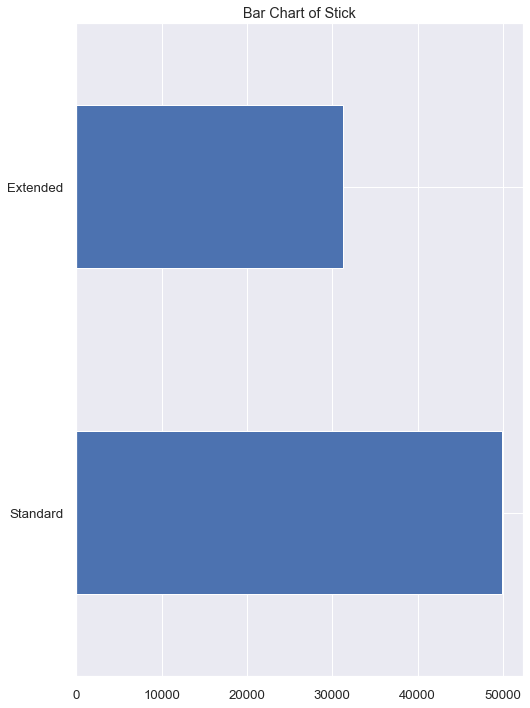

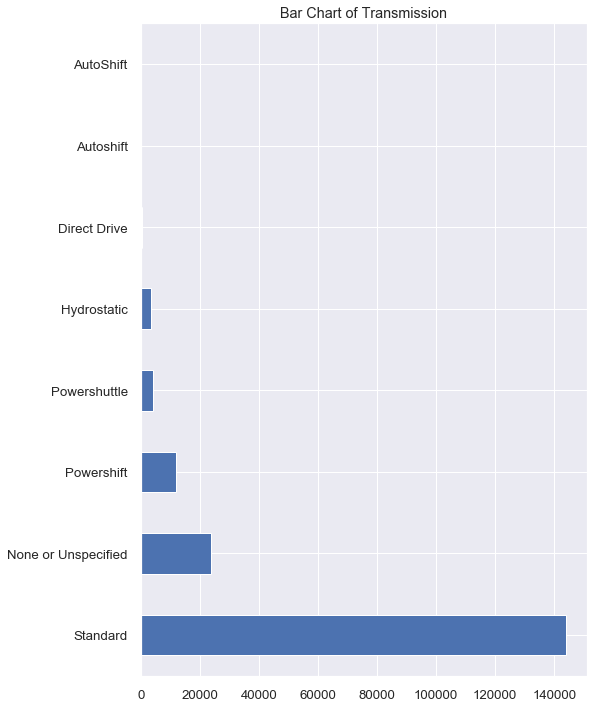

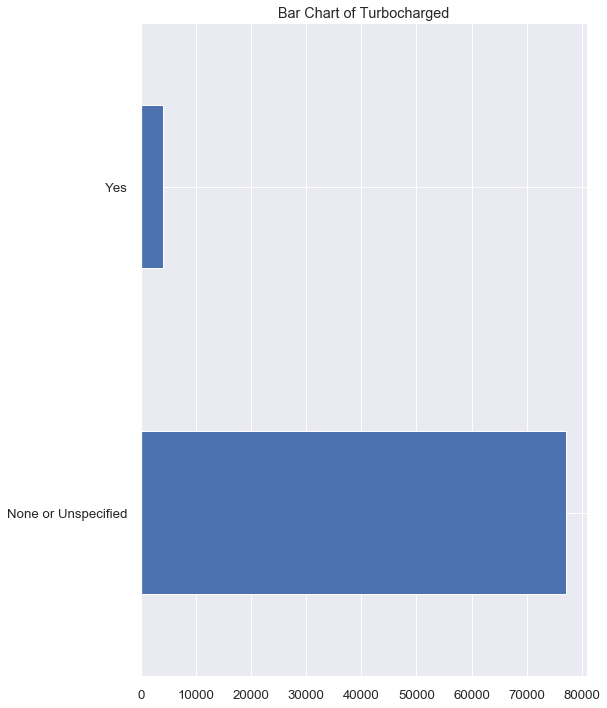

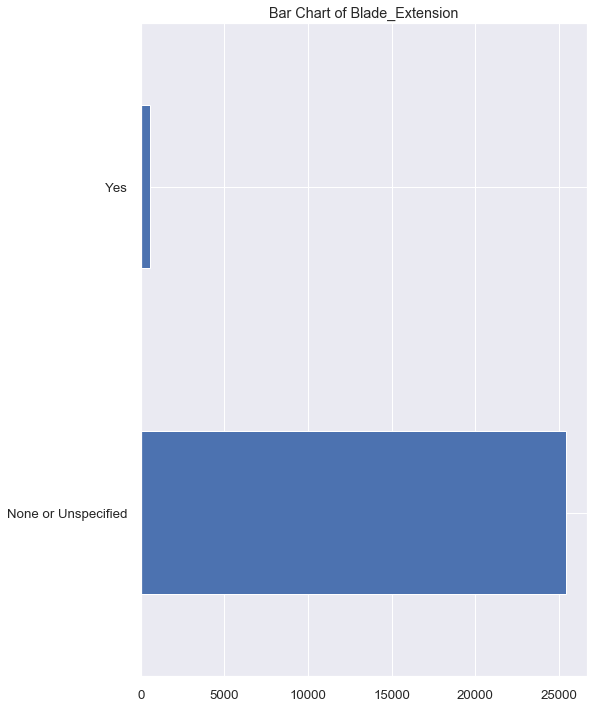

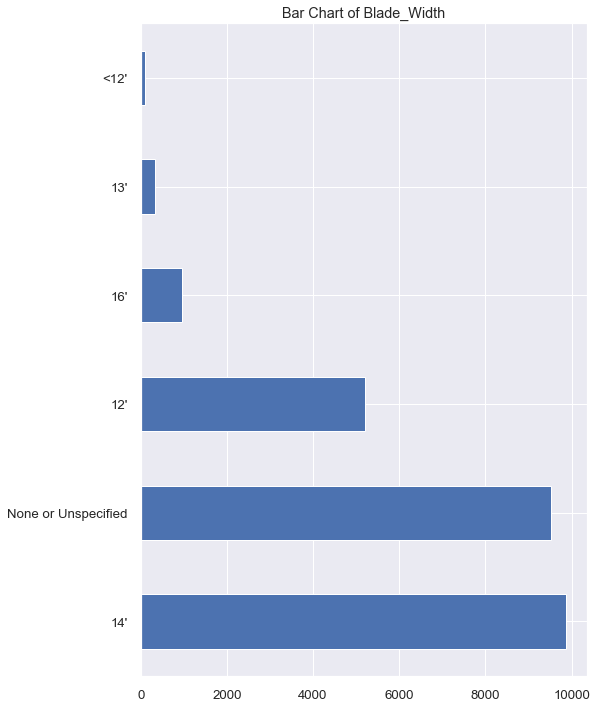

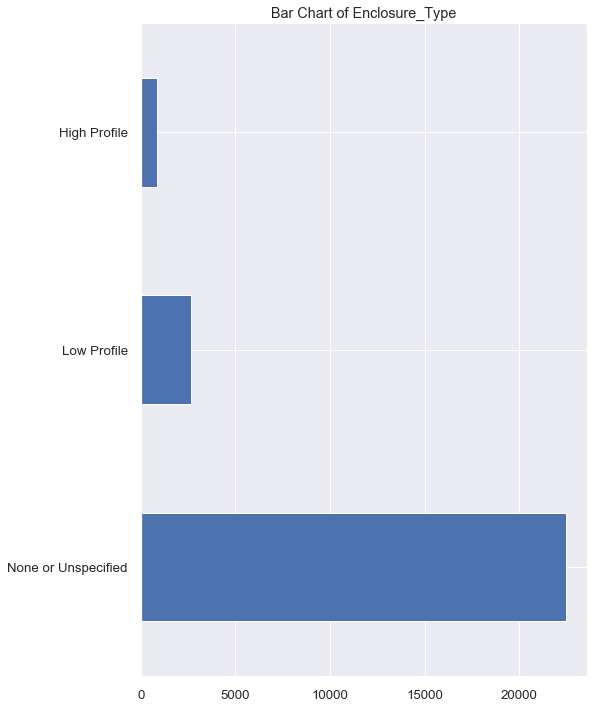

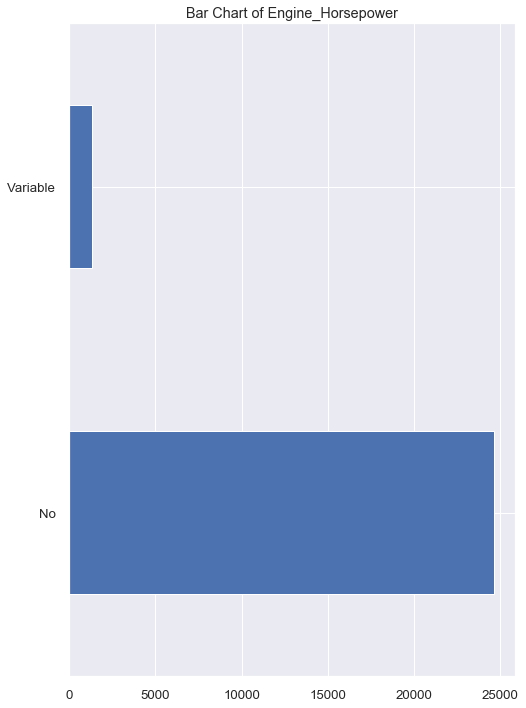

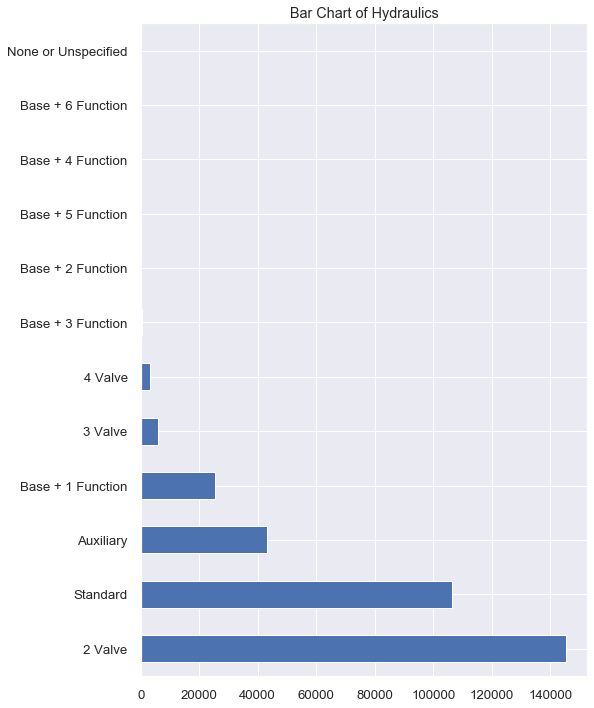

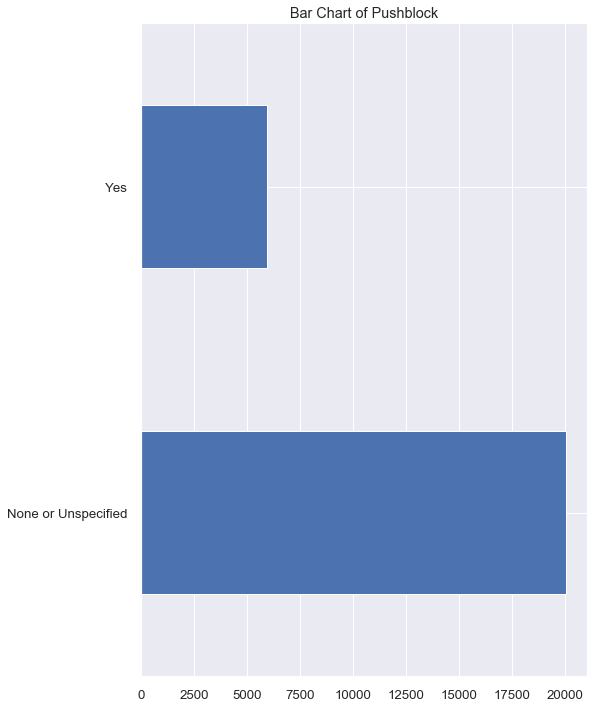

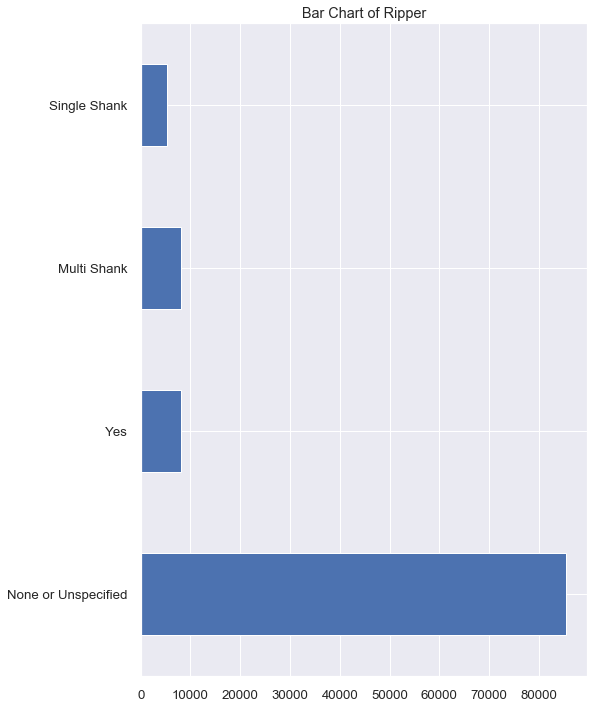

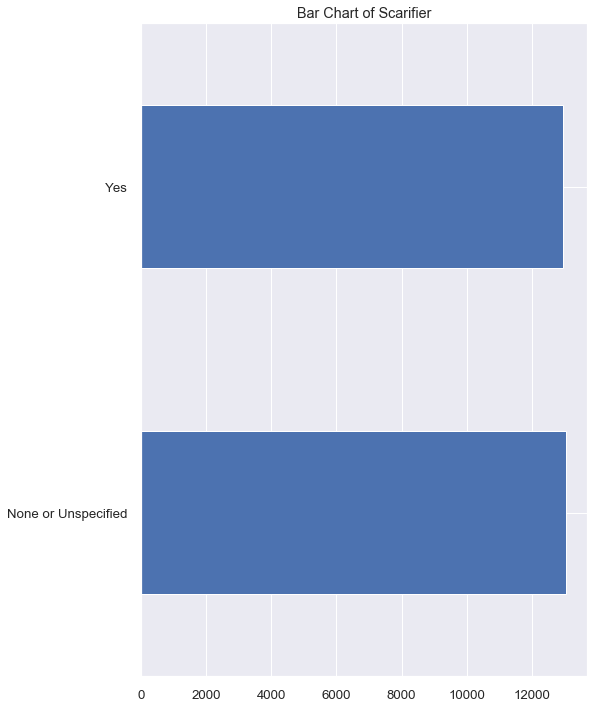

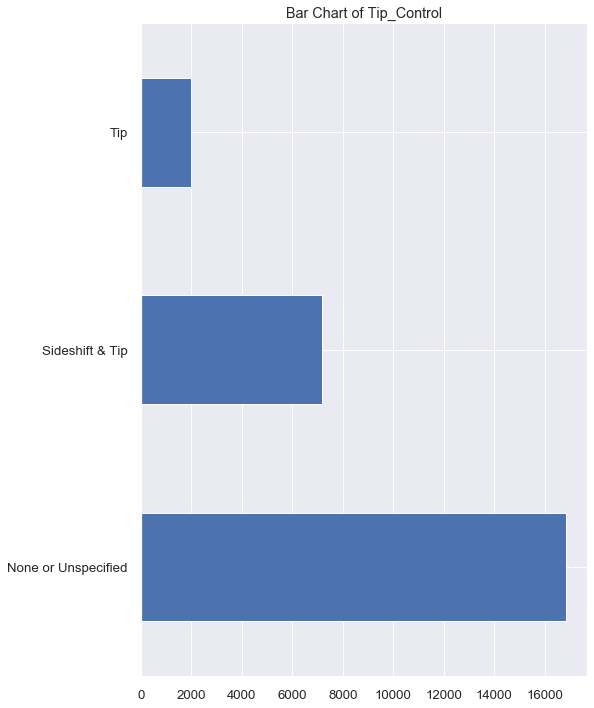

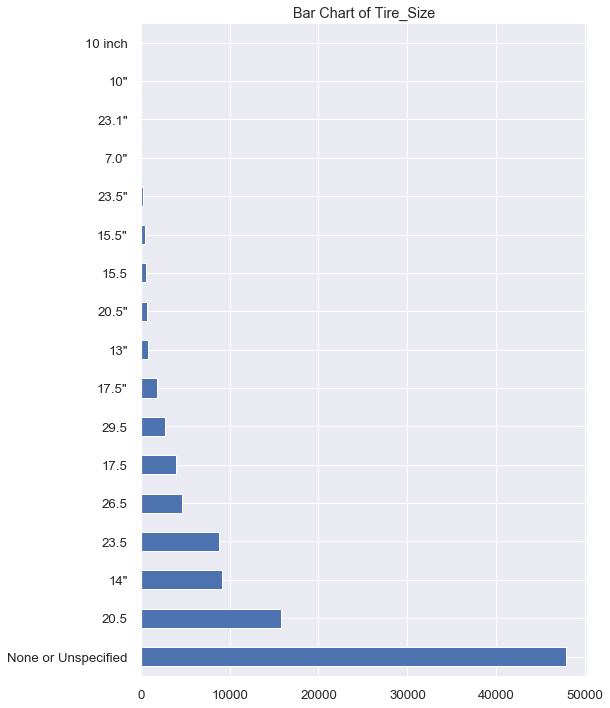

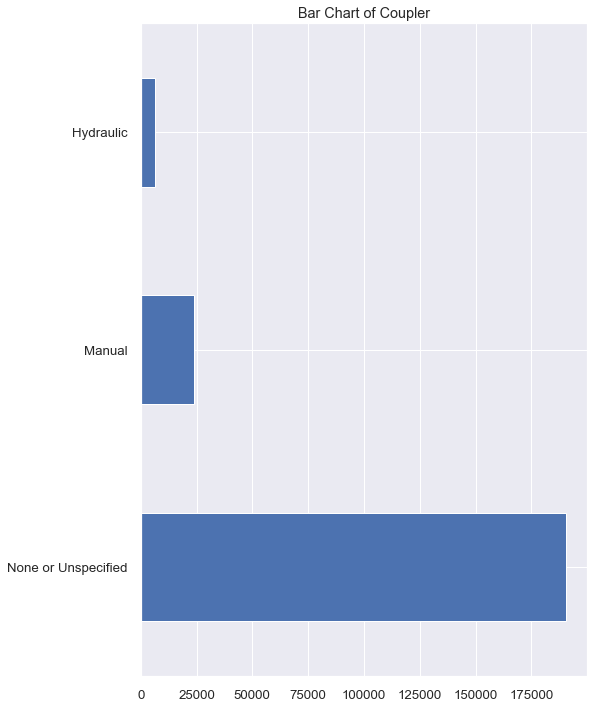

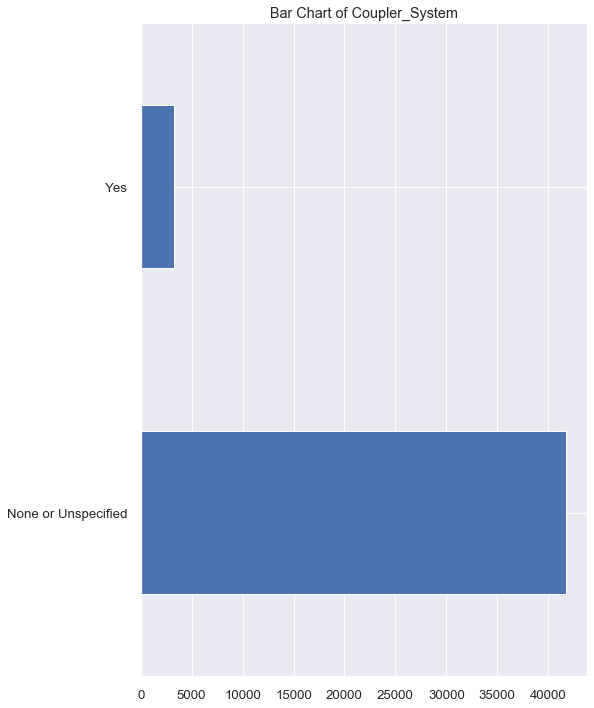

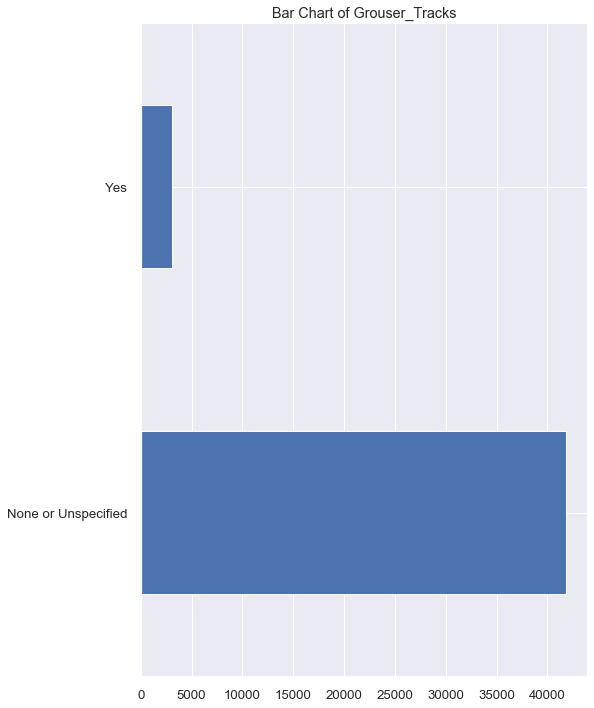

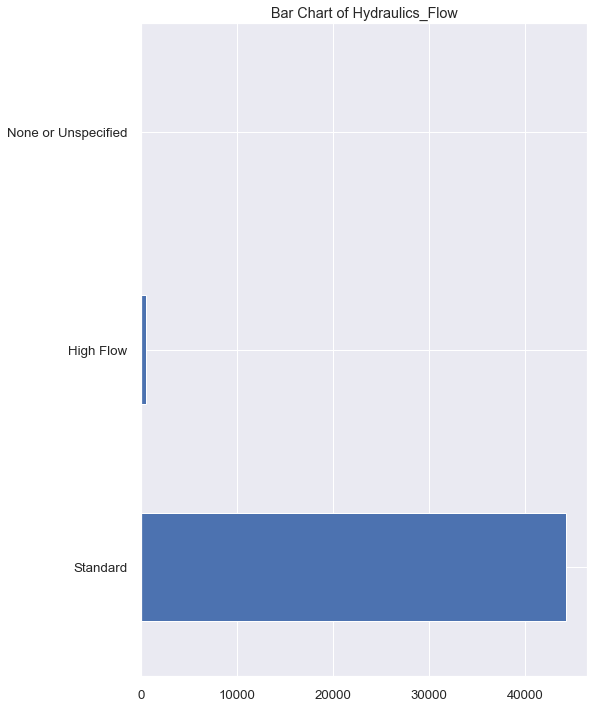

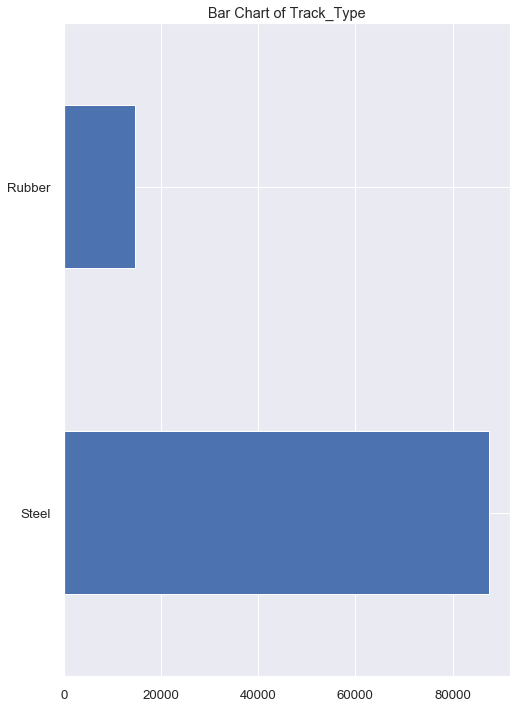

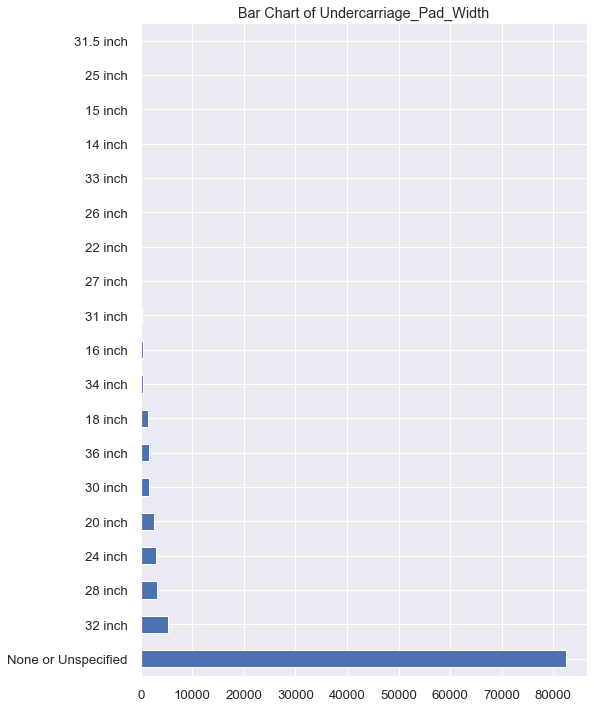

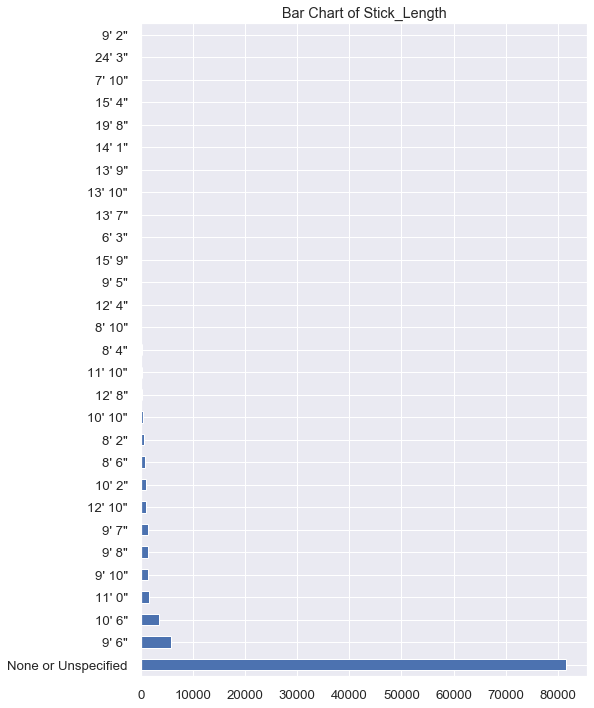

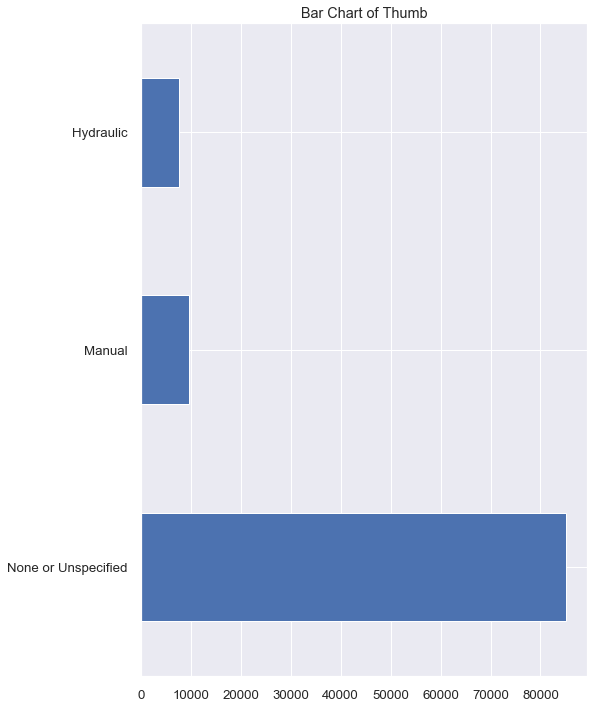

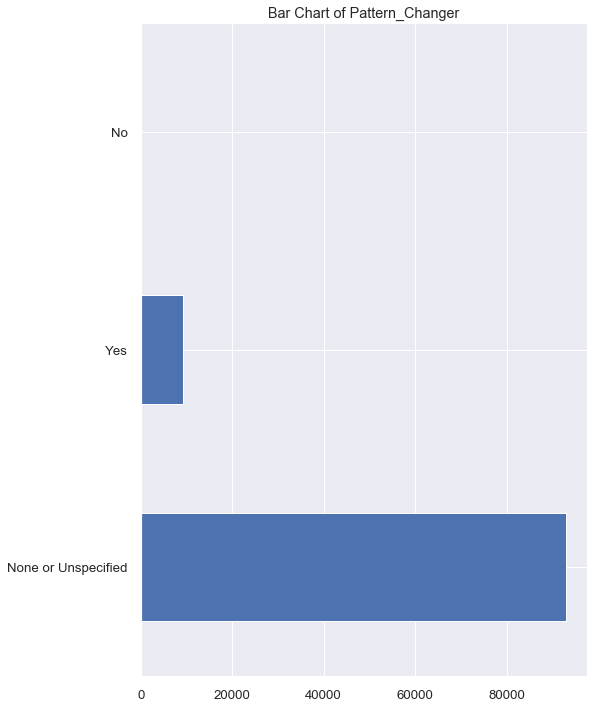

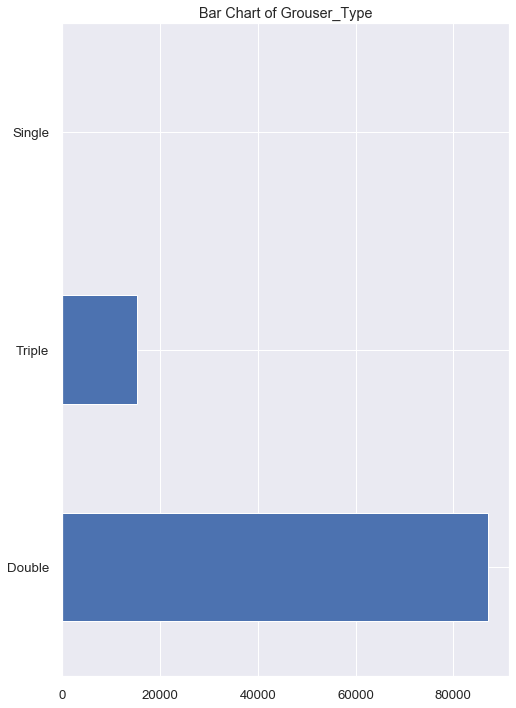

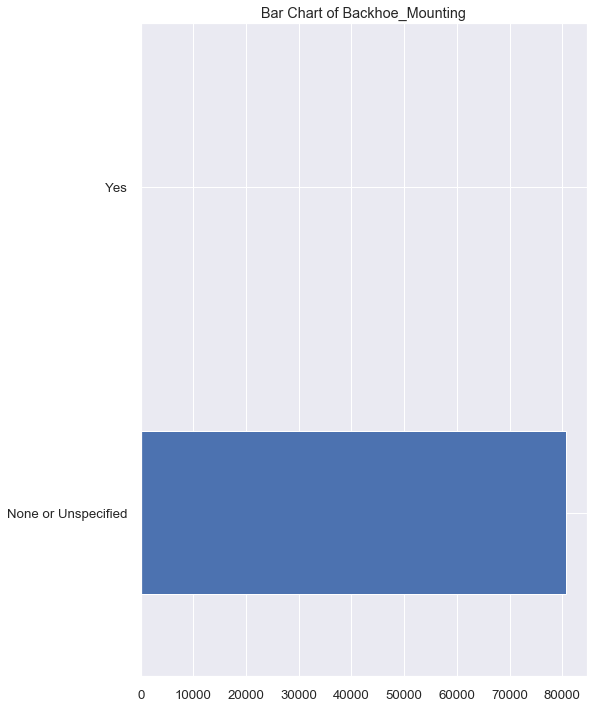

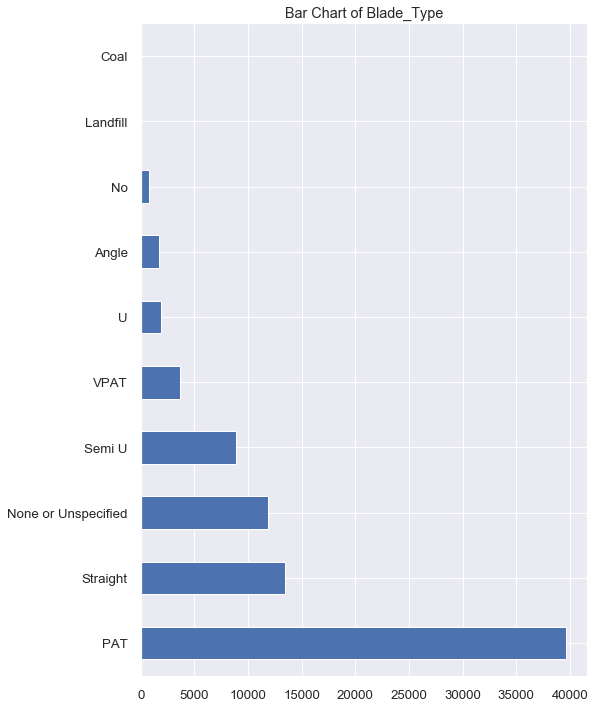

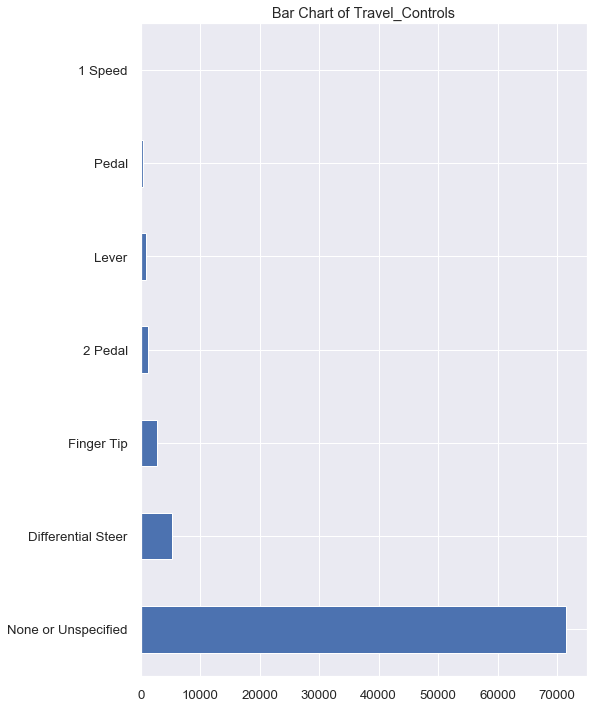

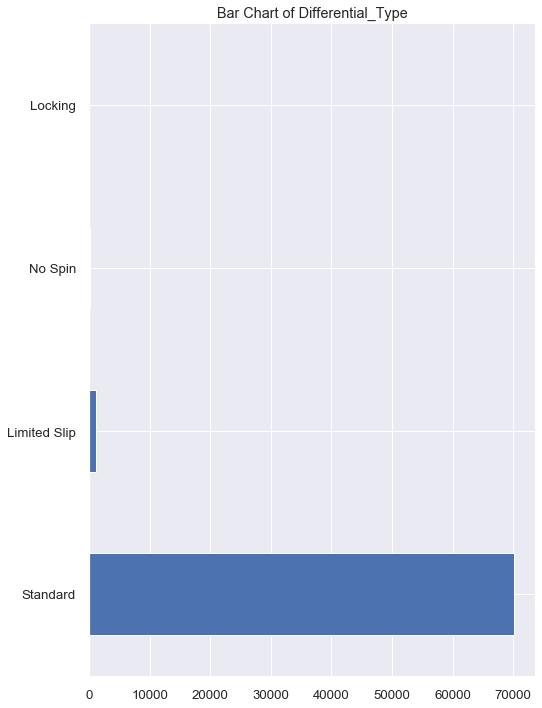

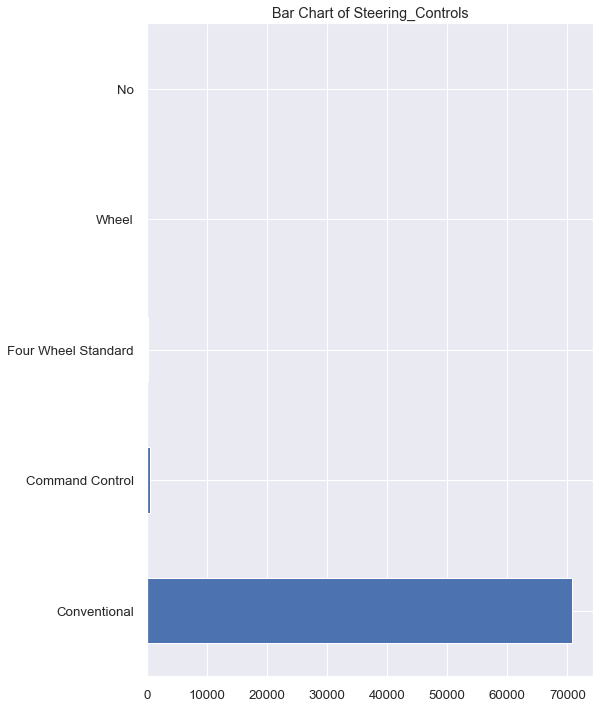

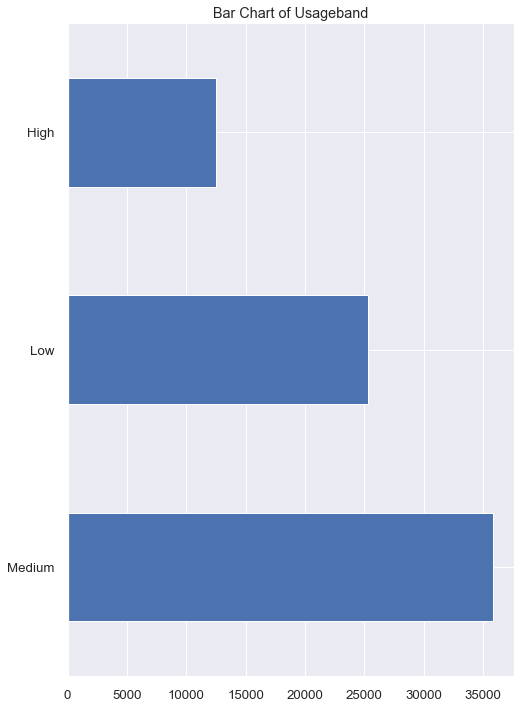

pass fiModelDesc
pass fiBaseModel
pass fiSecondaryDesc
pass fiModelSeries
pass fiModelDescriptor


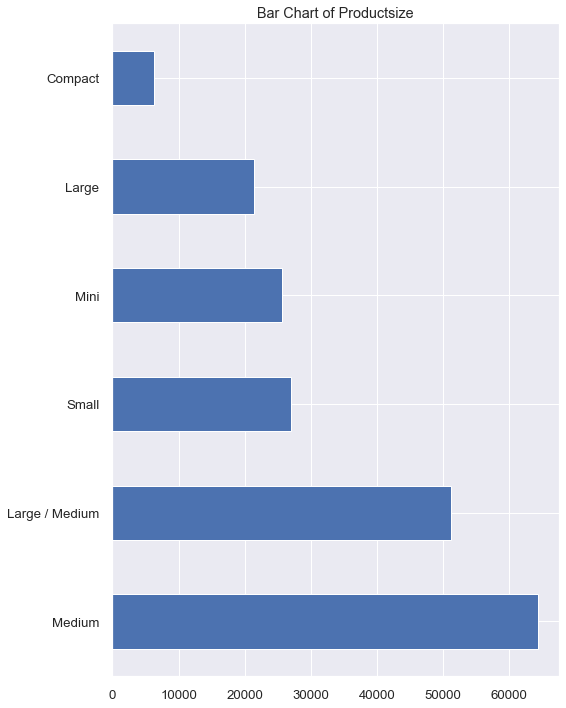

pass fiProductClassDesc


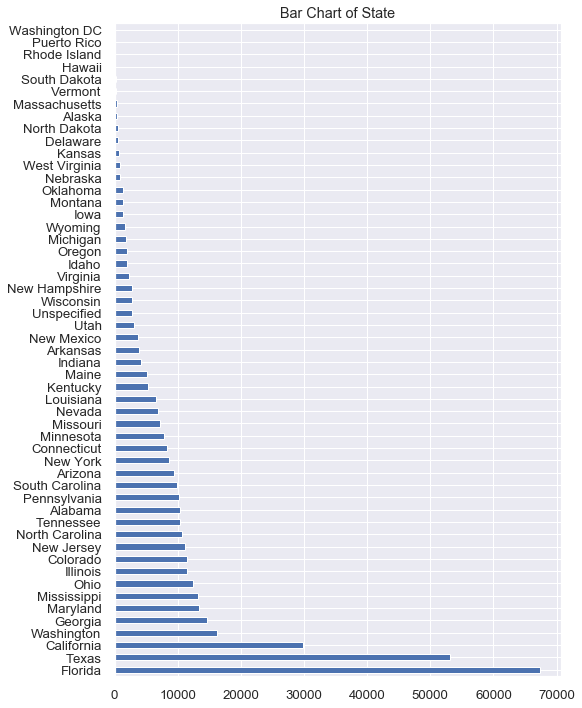

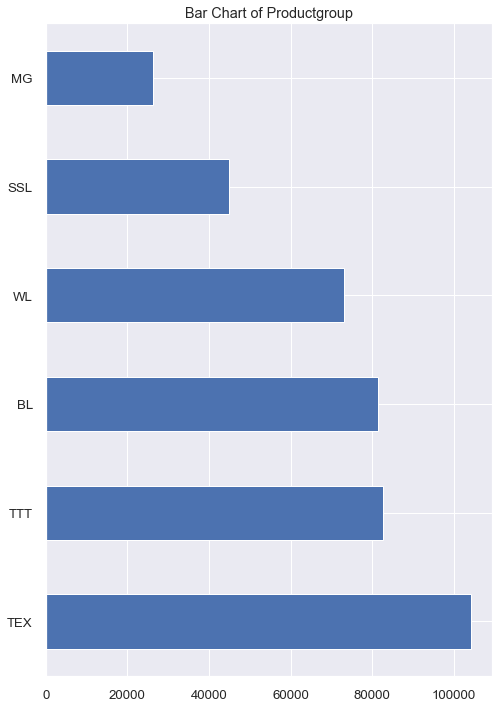

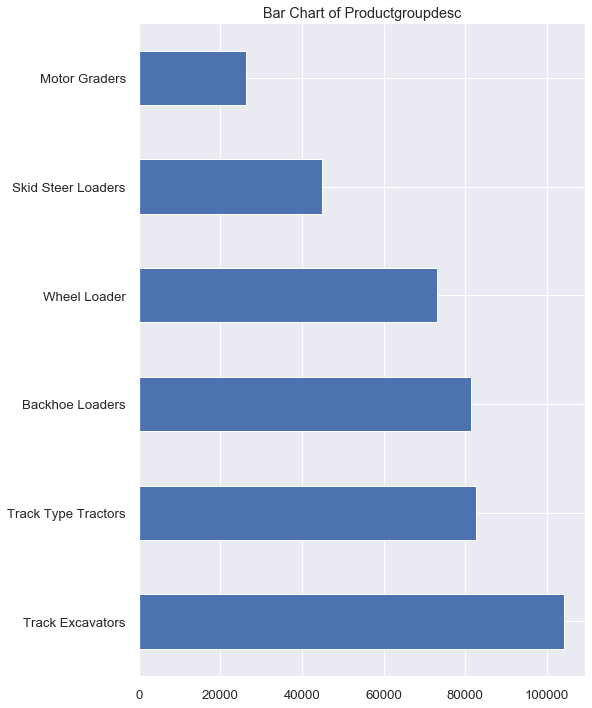

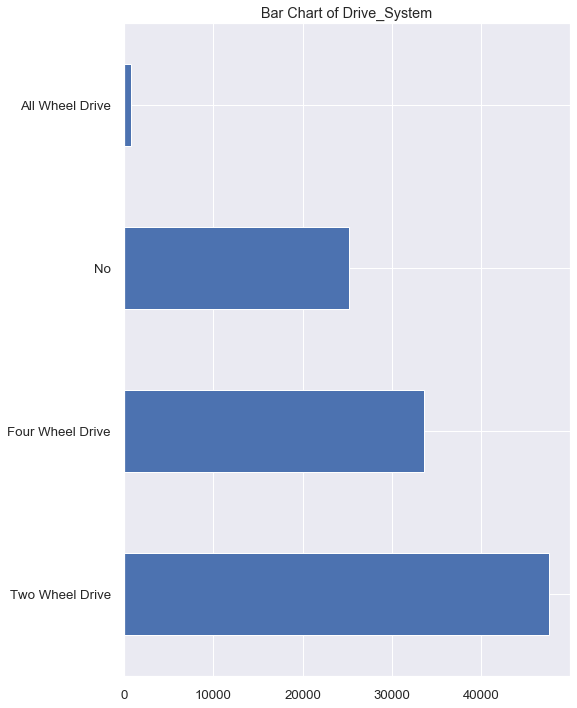

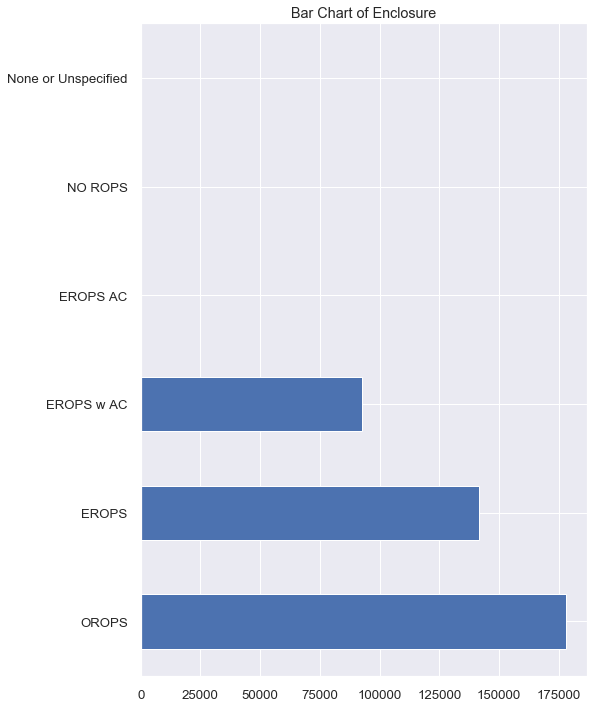

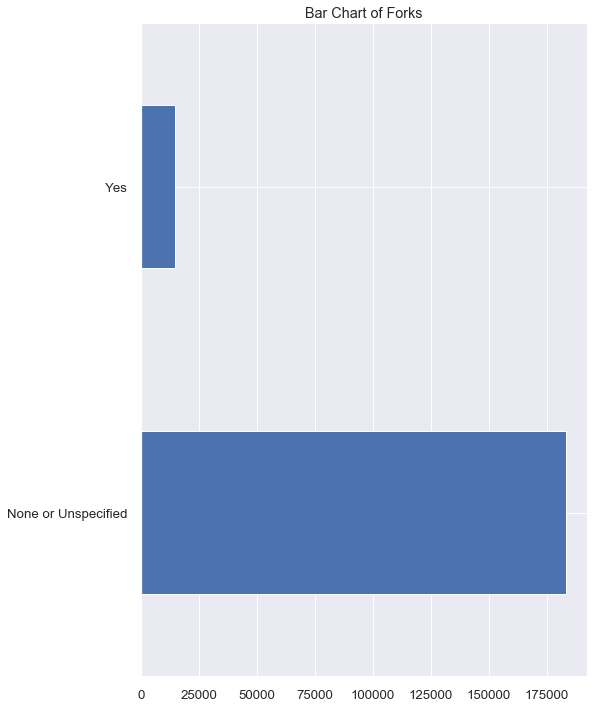

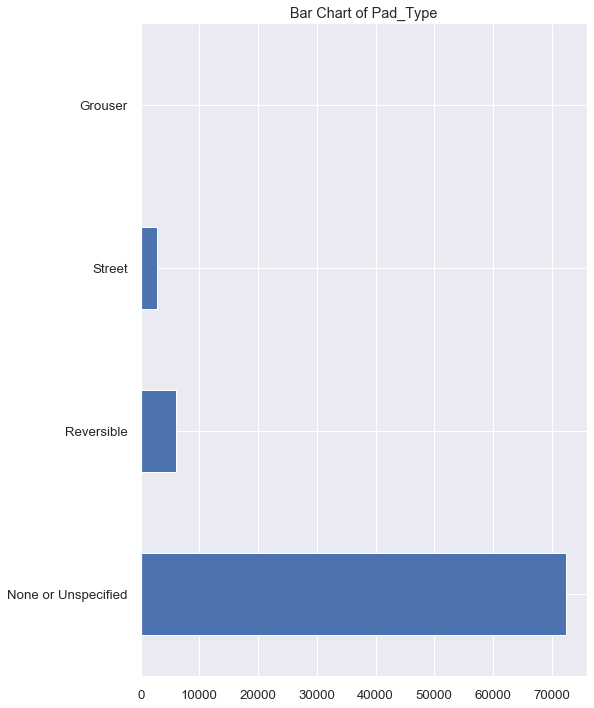

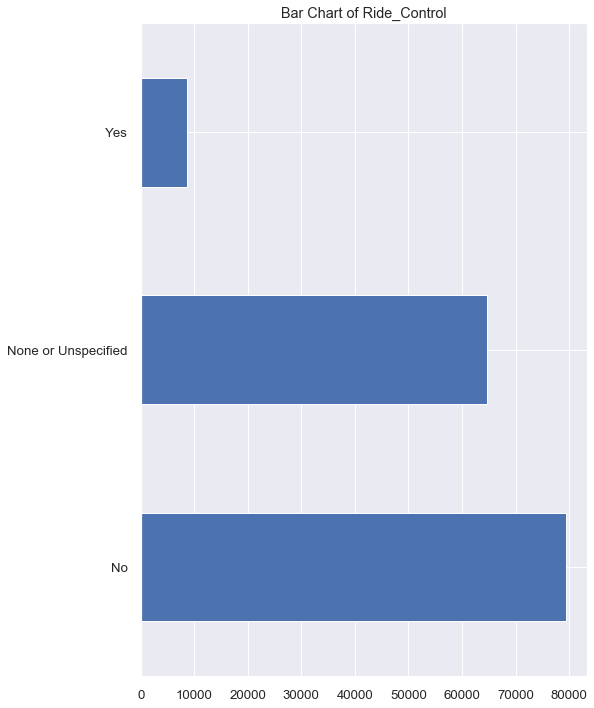

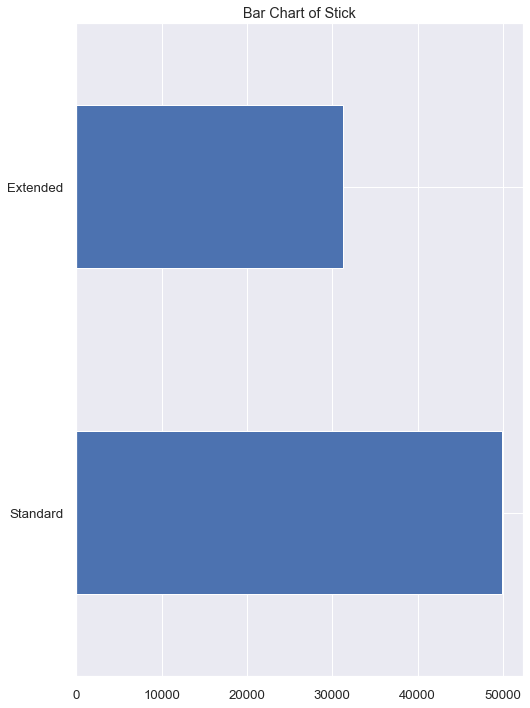

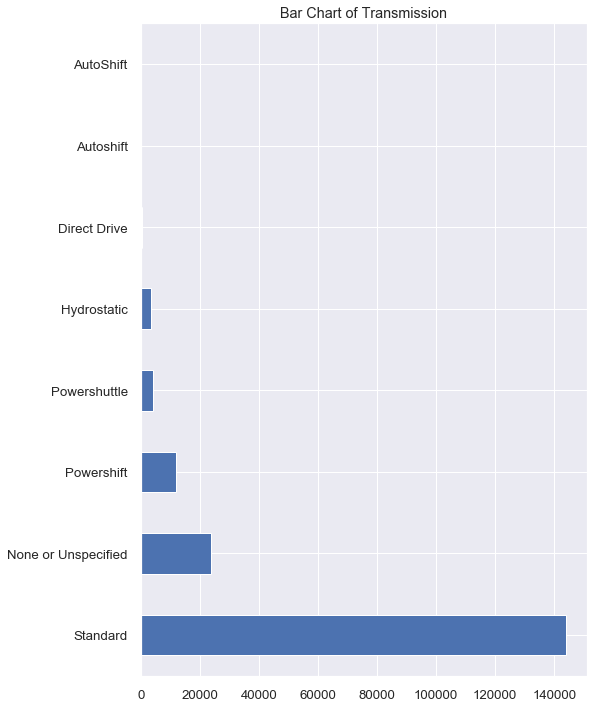

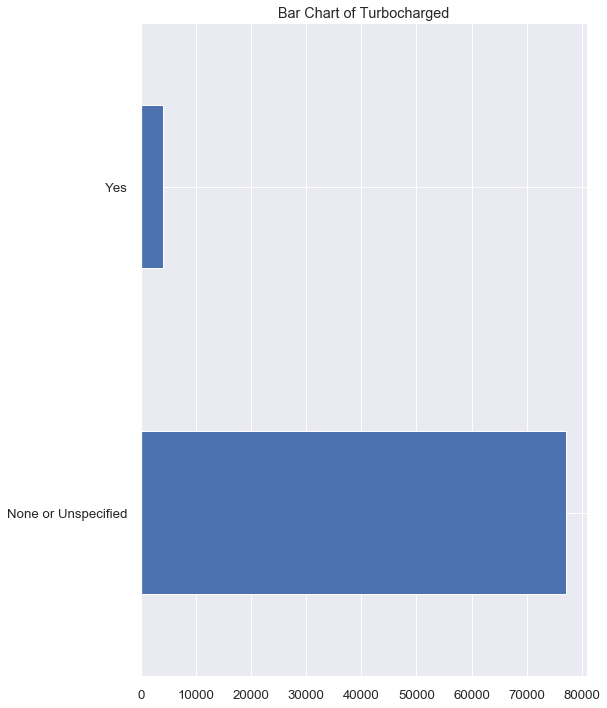

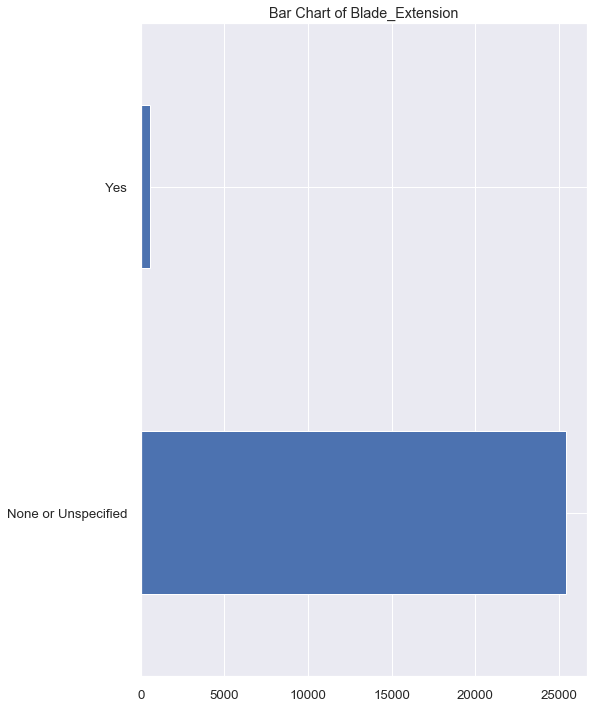

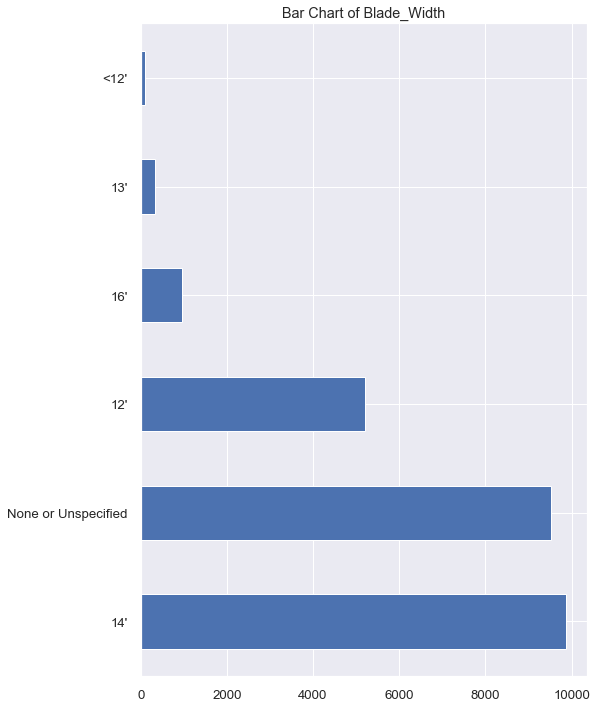

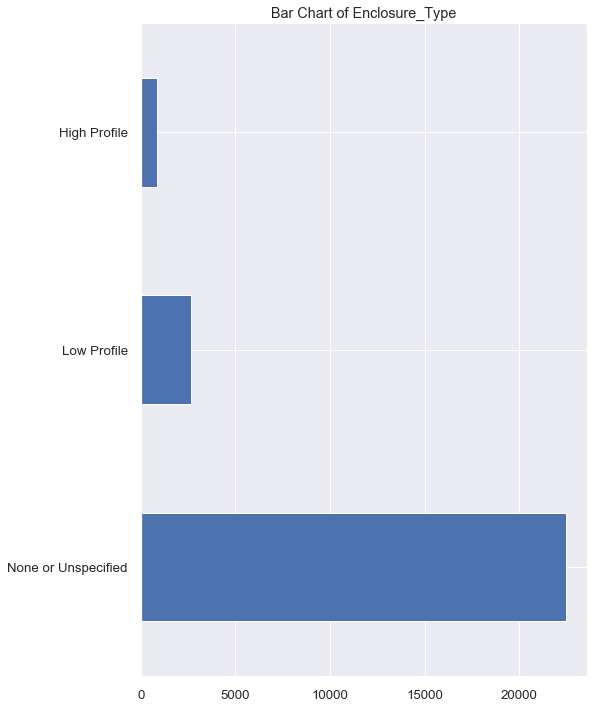

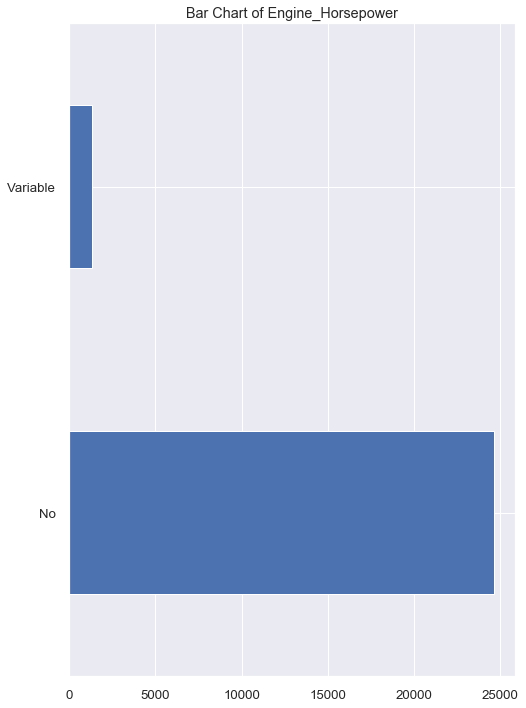

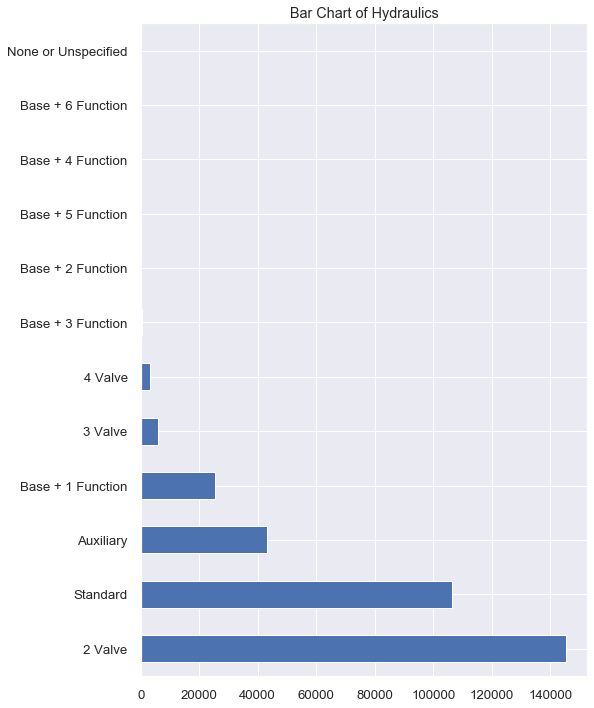

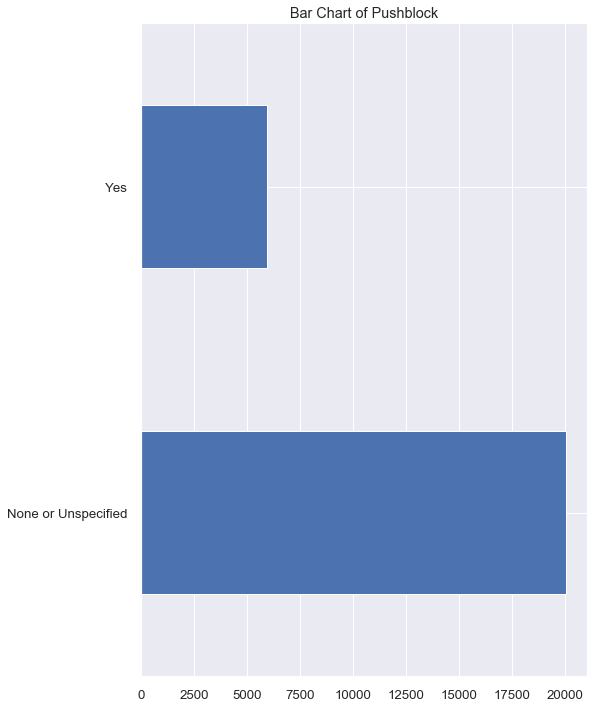

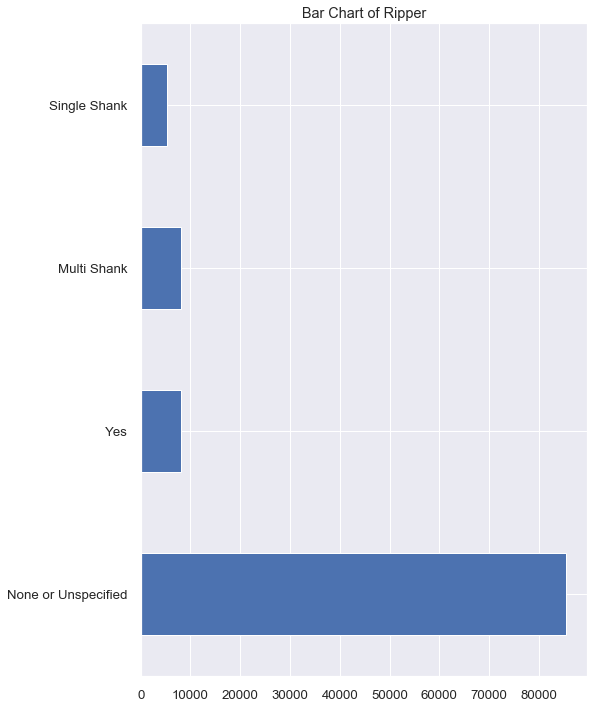

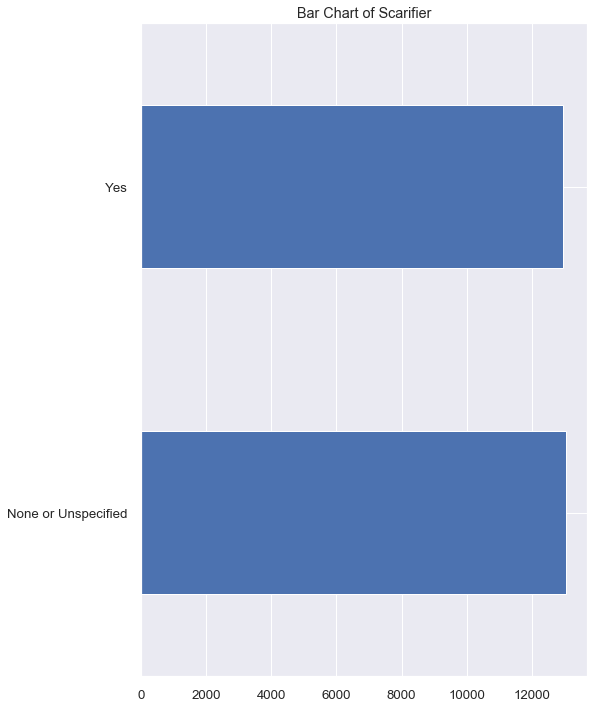

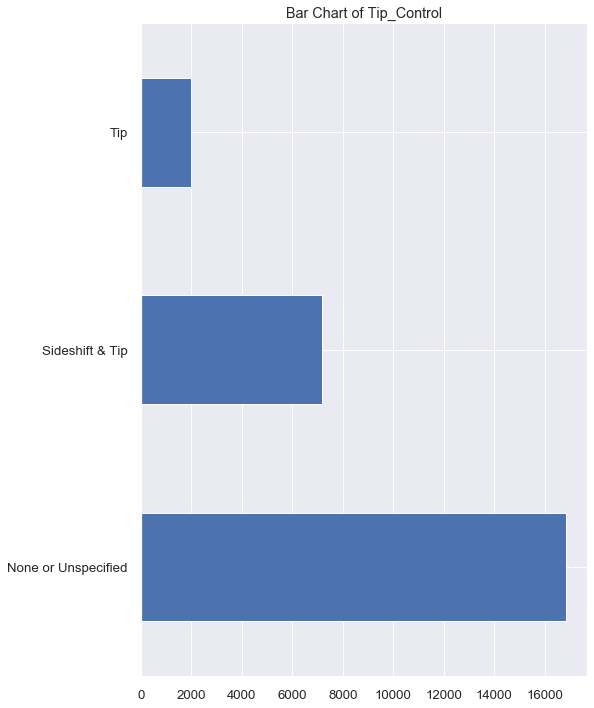

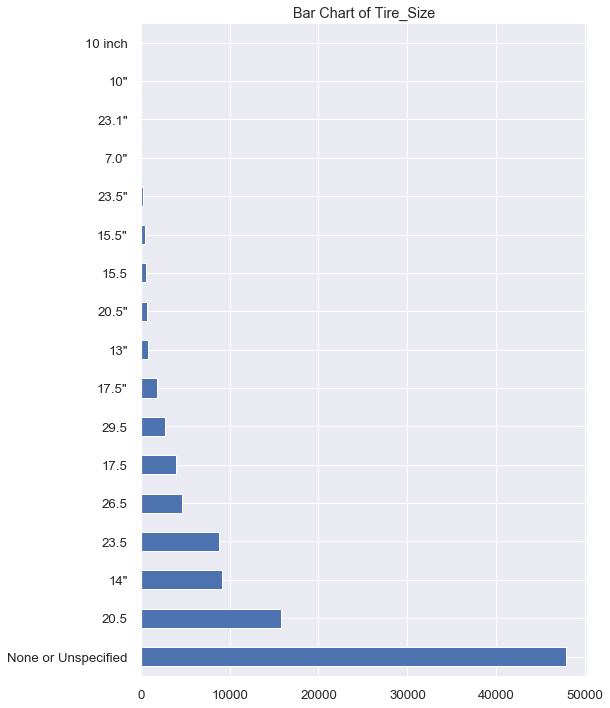

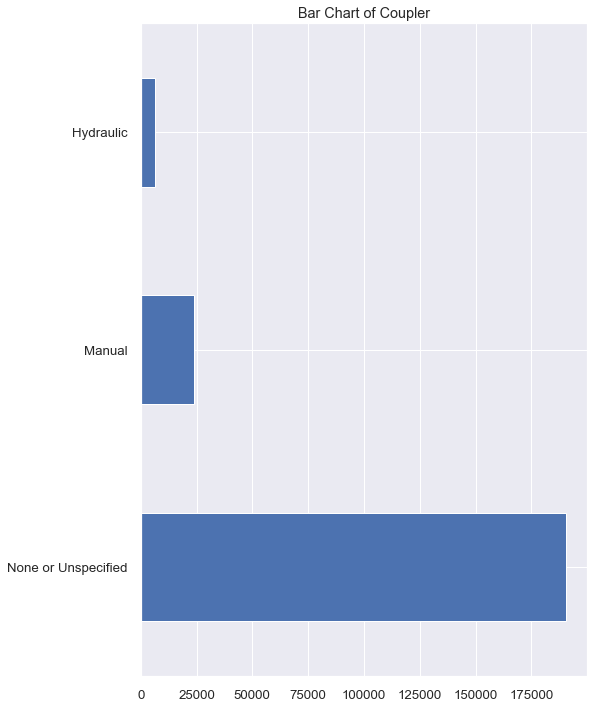

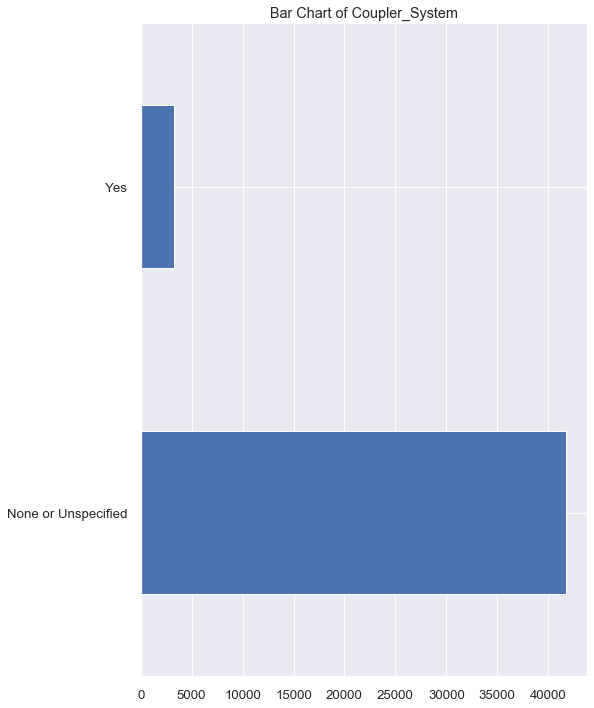

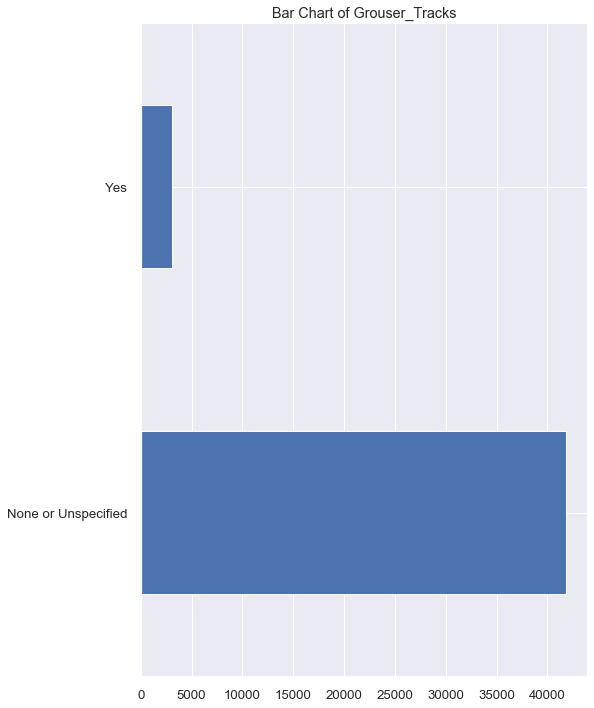

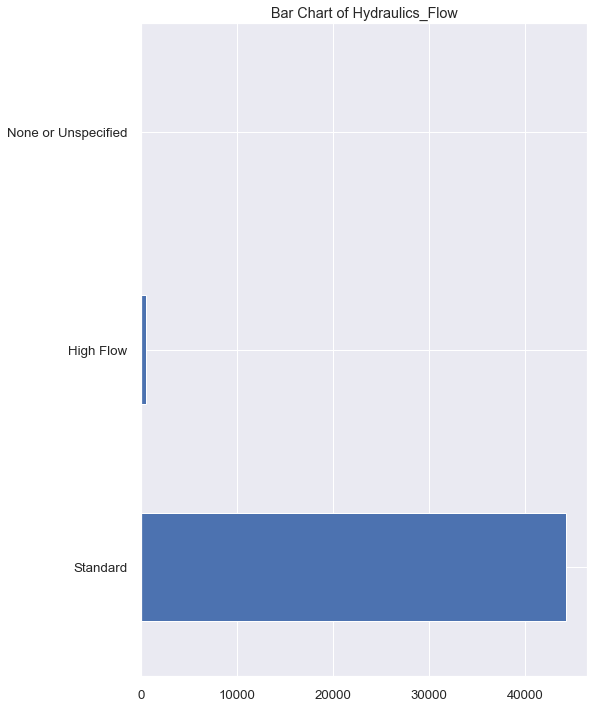

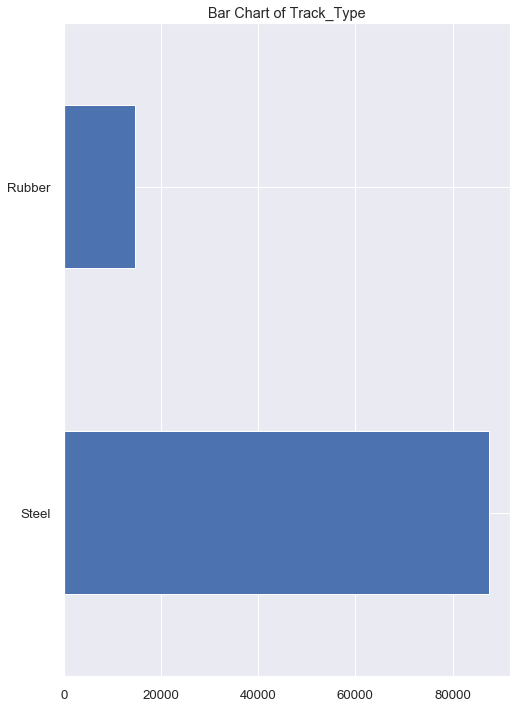

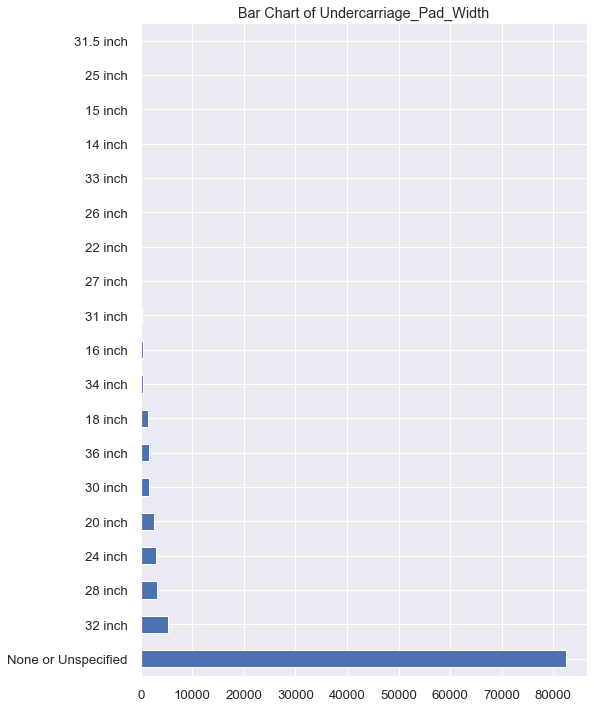

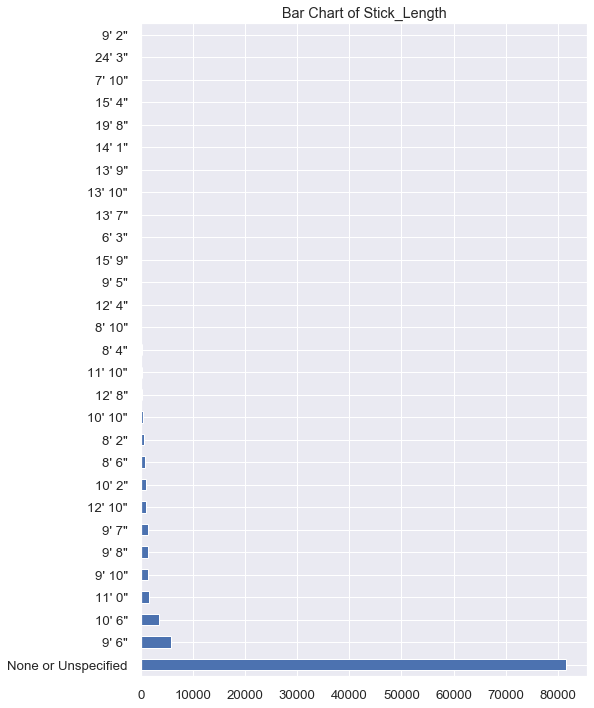

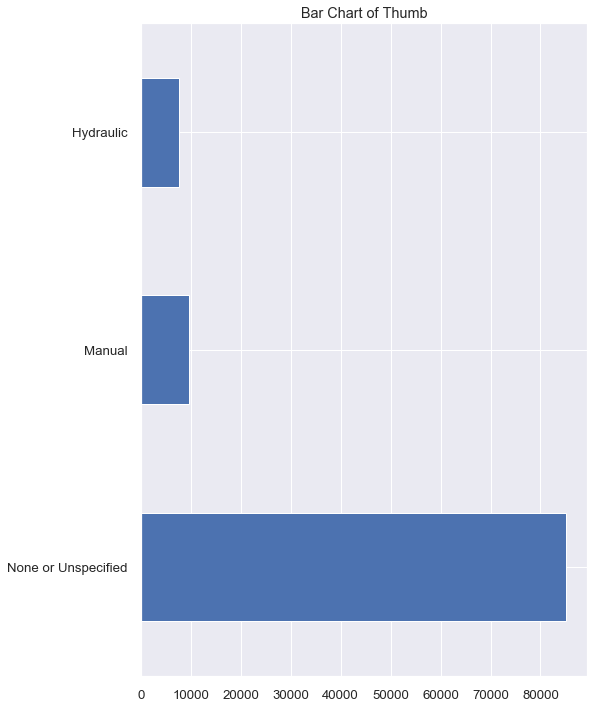

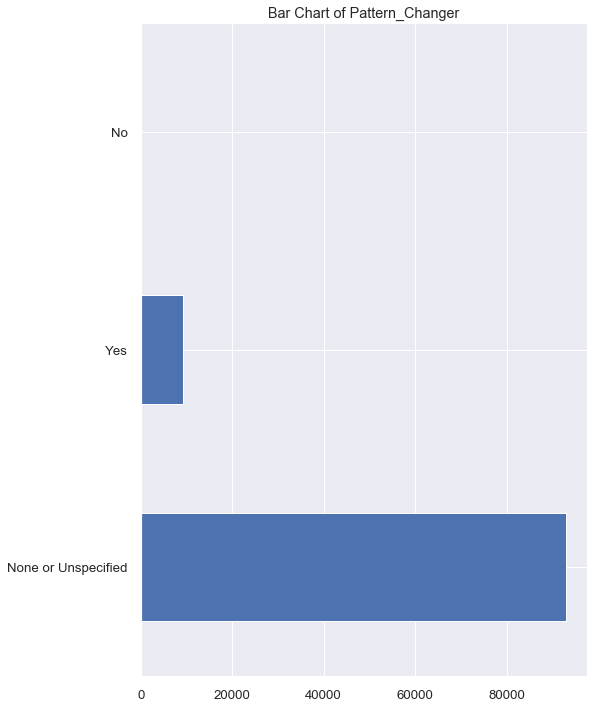

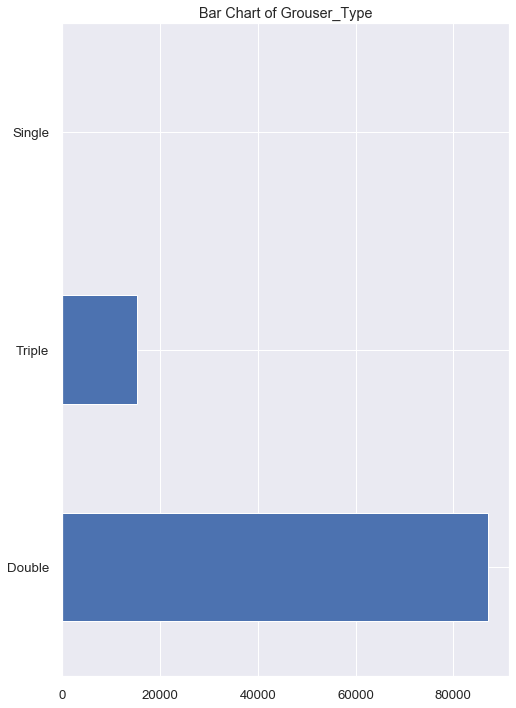

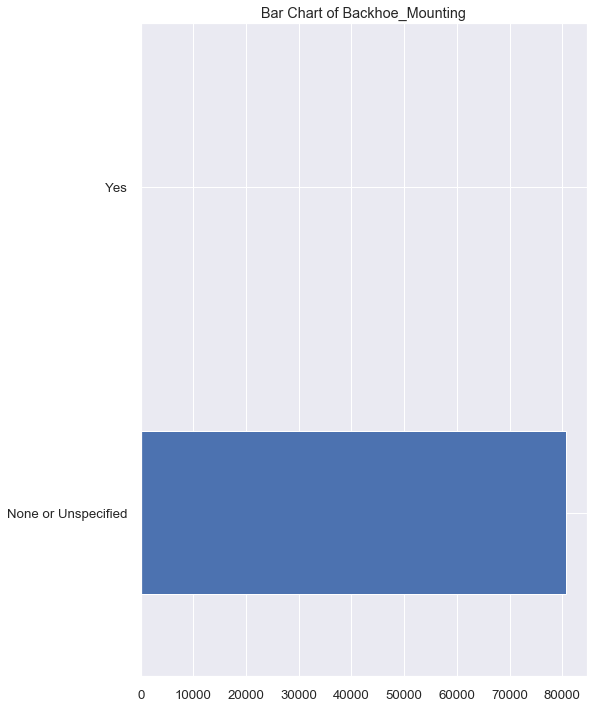

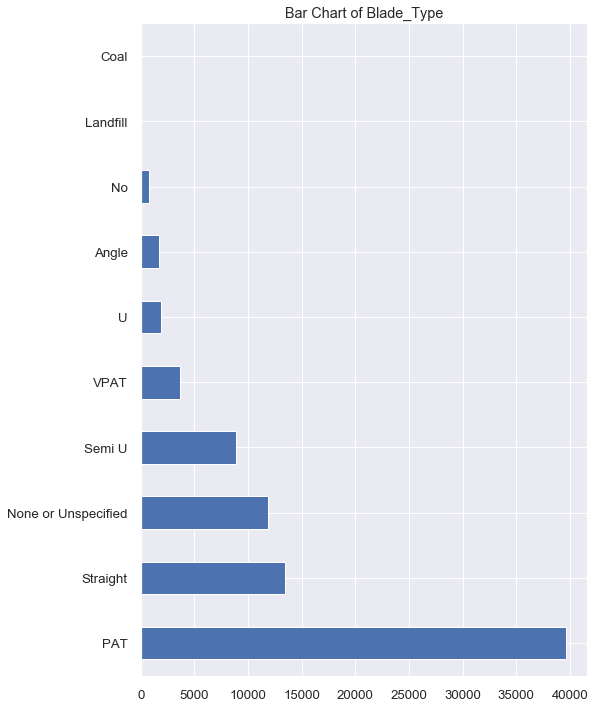

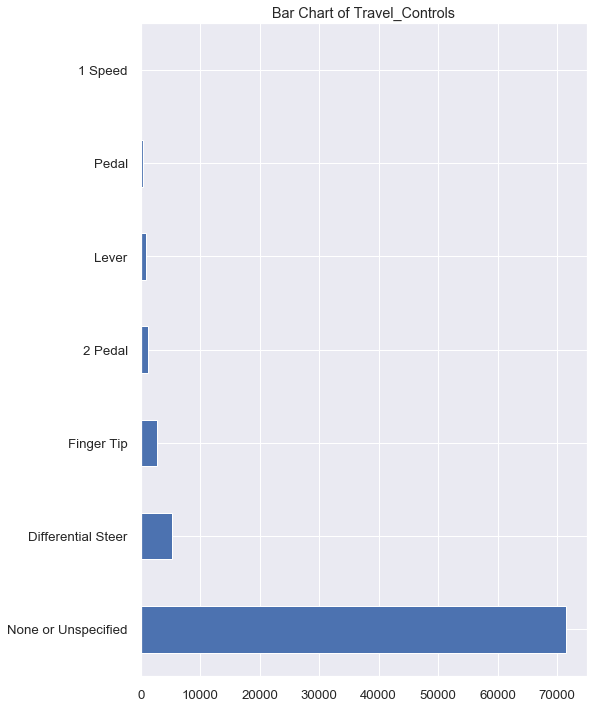

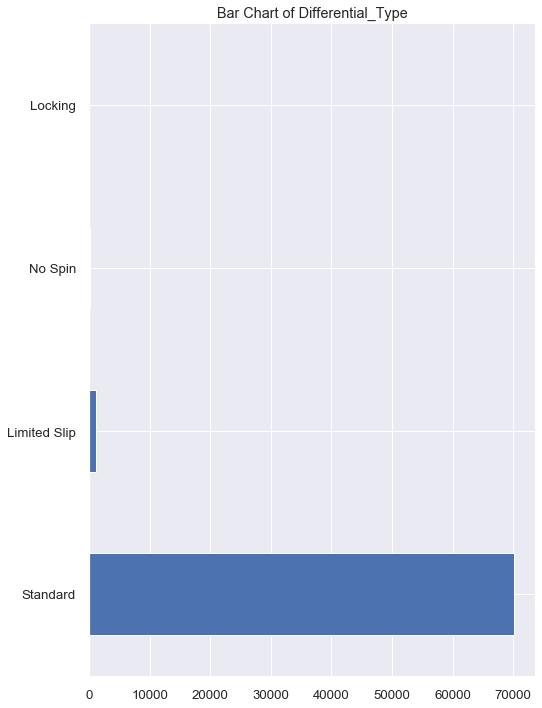

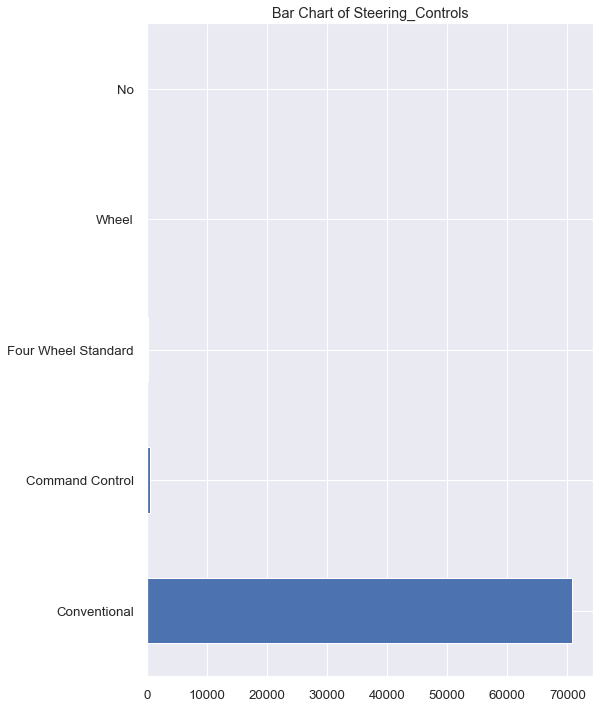

36.5 s ± 3.62 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
#Horizontal bar plots of categorical values with less than 60 unique variables
%%time
plt.style.use('seaborn')
sns.set(font_scale = 1.2)
for i in cat_feature_list:
    if bulldozers_df[i].nunique() < 60:
        bulldozers_df[i].value_counts().plot(kind = "barh", figsize = (8,12))
        plt.title(f"Bar Chart of {i.title()}")
        plt.show()
    if bulldozers_df[i].nunique() > 60:
        print(f"pass {i}")

In [14]:
bulldozers_df.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

## Some Simple Feature Engineering

Having a look at saledate column

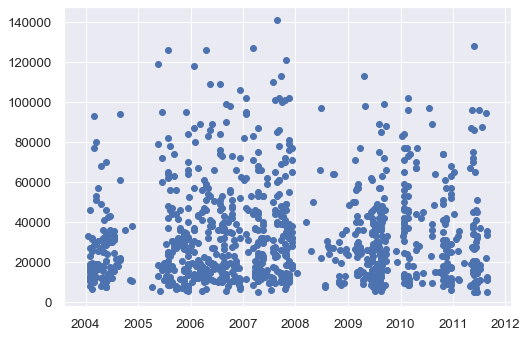

In [13]:
fig, ax = plt.subplots()
ax.scatter(bulldozers_df["saledate"][:1000], bulldozers_df["SalePrice"][:1000])

In [15]:
bulldozers_df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

In [16]:
bulldozers_df.sort_values(by = ["saledate"], inplace = True, ascending = True)
bulldozers_df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [17]:
bulldozers_temp = bulldozers_df.copy()

In [18]:
bulldozers_temp.saledate.dt.year

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saledate, Length: 412698, dtype: int64

In [19]:
#creating new columns derived from the saledate feature
bulldozers_temp["SaleYear"] = bulldozers_temp.saledate.dt.year
bulldozers_temp["SaleMonth"] = bulldozers_temp.saledate.dt.month
bulldozers_temp["SaleDay"] = bulldozers_temp.saledate.dt.day
bulldozers_temp["SaleDayOfWeek"] = bulldozers_temp.saledate.dt.dayofweek
bulldozers_temp["SaleDayOfYear"] = bulldozers_temp.saledate.dt.dayofyear

bulldozers_temp.drop("saledate", axis = 1, inplace = True)

In [20]:
bulldozers_temp.head(20).T

205615  \
SalesID                                                             1646770   
SalePrice                                                              9500   
MachineID                                                           1126363   
ModelID                                                                8434   
datasource                                                              132   
auctioneerID                                                             18   
YearMade                                                               1974   
MachineHoursCurrentMeter                                                NaN   
UsageBand                                                               NaN   
fiModelDesc                                                            TD20   
fiBaseModel                                                            TD20   
fiSecondaryDesc                                                         NaN   
fiModelSeries                                                           NaN   
fiModelDescriptor                                                       NaN   
ProductSize                                                          Medium   
fiProductClassDesc        Track Type Tractor, Dozer - 105.0 to 130.0 Hor...   
state                                                                 Texas   
ProductGroup                                                            TTT   
ProductGroupDesc                                        Track Type Tractors   
Drive_System                                                            NaN   
Enclosure                                                             OROPS   
Forks                                                                   NaN   
Pad_Type                                                                NaN   
Ride_Control                                                            NaN   
Stick                                                                   NaN   
Transmission                                                   Direct Drive   
Turbocharged                                                            NaN   
Blade_Extension                                                         NaN   
Blade_Width                                                             NaN   
Enclosure_Type                                                          NaN   
Engine_Horsepower                                                       NaN   
Hydraulics                                                          2 Valve   
Pushblock                                                               NaN   
Ripper                                                  None or Unspecified   
Scarifier                                                               NaN   
Tip_Control                                                             NaN   
Tire_Size                                                               NaN   
Coupler                                                                 NaN   
Coupler_System                                                          NaN   
Grouser_Tracks                                                          NaN   
Hydraulics_Flow                                                         NaN   
Track_Type                                                              NaN   
Undercarriage_Pad_Width                                                 NaN   
Stick_Length                                                            NaN   
Thumb                                                                   NaN   
Pattern_Changer                                                         NaN   
Grouser_Type                                                            NaN   
Backhoe_Mounting                                        None or Unspecified   
Blade_Type                                                         Straight   
Travel_Controls                                         None or Unspecified   
Differential_Type                       

In [126]:
bulldozers_temp.YearMade.value_counts(ascending = True).head(50)

2013       1
2012       1
1937       1
1942       1
1947       1
1949       1
2014       2
1948       3
1954       3
1955       5
1952       6
1951       7
1953       7
1950       8
1957      16
1920      17
1956      20
1958      25
1959      28
2011      31
2010      58
1960      97
1961      99
1919     127
1962     145
2009     212
1963     250
1964     418
1965     675
1966     951
1967    1104
1968    1260
1970    1321
1969    1544
2008    1691
1971    1720
1972    2141
1973    2547
1976    2718
1982    3048
1974    3113
1975    3240
1981    4190
1977    4425
1983    4603
1980    4744
2007    5048
1979    5613
1978    5693
1984    6174
Name: YearMade, dtype: int64

In [22]:
bulldozers_temp.describe().T

count          mean           std        min  \
SalesID                   412698.0  2.011161e+06  1.080068e+06  1139246.0   
SalePrice                 412698.0  3.121518e+04  2.314174e+04     4750.0   
MachineID                 412698.0  1.230061e+06  4.539533e+05        0.0   
ModelID                   412698.0  6.947202e+03  6.280825e+03       28.0   
datasource                412698.0  1.351694e+02  9.646749e+00      121.0   
auctioneerID              392562.0  6.585268e+00  1.715841e+01        0.0   
YearMade                  412698.0  1.899050e+03  2.921902e+02     1000.0   
MachineHoursCurrentMeter  147504.0  3.522988e+03  2.716993e+04        0.0   
SaleYear                  412698.0  2.004317e+03  5.821090e+00     1989.0   
SaleMonth                 412698.0  6.300268e+00  3.437276e+00        1.0   
SaleDay                   412698.0  1.615289e+01  8.429510e+00        1.0   
SaleDayOfWeek             412698.0  2.594338e+00  1.417971e+00        0.0   
SaleDayOfYear             412698.0  1.767841e+02  1.039107e+02        1.0   

                                 25%        50%         75%        max  
SalesID                   1421897.75  1645852.5  2261012.50  6333349.0  
SalePrice                   14500.00    24000.0    40000.00   142000.0  
MachineID                 1088593.25  1284397.0  1478079.25  2486330.0  
ModelID                      3261.00     4605.0     8899.00    37198.0  
datasource                    132.00      132.0      136.00      173.0  
auctioneerID                    1.00        2.0        4.00       99.0  
YearMade                     1985.00     1995.0     2001.00     2014.0  
MachineHoursCurrentMeter        0.00        0.0     3209.00  2483300.0  
SaleYear                     2000.00     2006.0     2009.00     2012.0  
SaleMonth                       3.00        6.0        9.00       12.0  
SaleDay                         9.00       16.0       23.00       31.0  
SaleDayOfWeek                   2.00        3.0        3.00        6.0  
SaleDayOfYear                  82.00      165.0      270.00      365.0

### Converting string dtype to category

In [23]:
pd.api.types.is_string_dtype(bulldozers_temp["ProductSize"])

True

In [24]:
for label, content in bulldozers_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [25]:
# turning the string values into category values
for label, content in bulldozers_temp.items():
    if pd.api.types.is_string_dtype(content):
        bulldozers_temp[label] = content.astype("category").cat.as_ordered()

In [26]:
bulldozers_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [27]:
bulldozers_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [28]:
bulldozers_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

### Checking For Missing Data

In [29]:
#Percentage of missing data
bulldozers_temp.isnull().sum()/len(bulldozers_temp)*100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

In [30]:
bulldozers_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [31]:
#Checking to see which numeric columns have missing values
for label, content in bulldozers_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [32]:
# Imputing missing variables with the median
for label, content in bulldozers_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            bulldozers_temp[label+"_is_missing"] = pd.isnull(content)
            bulldozers_temp[label] = content.fillna(content.median())

In [33]:
#Confirming the substitution 
for label, content in bulldozers_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [34]:
#Listing numeric features
for label, content in bulldozers_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [35]:
#Turning the categorical variables into numbers
for label, content in bulldozers_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        bulldozers_temp[label+"_is_missing"] = pd.isnull(content)
        bulldozers_temp[label] = pd.Categorical(content).codes+1

In [36]:
bulldozers_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(5), int64(10), int8(39)
memory usage: 81.5 MB


In [37]:
bulldozers_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [38]:
bulldozers_temp.head().T

205615   274835   141296   212552   62755 
SalesID                       1646770  1821514  1505138  1671174  1329056
SalePrice                        9500    14000    50000    16000    22000
MachineID                     1126363  1194089  1473654  1327630  1336053
ModelID                          8434    10150     4139     8591     4089
datasource                        132      132      132      132      132
...                               ...      ...      ...      ...      ...
Backhoe_Mounting_is_missing     False     True    False     True    False
Blade_Type_is_missing           False     True    False     True    False
Travel_Controls_is_missing      False     True    False     True    False
Differential_Type_is_missing     True    False     True    False     True
Steering_Controls_is_missing     True    False     True    False     True

[103 rows x 5 columns]

In [39]:
bulldozers_temp.SaleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: SaleYear, dtype: int64

In [91]:
%%time


models = {"RandomForestRegressor" : RandomForestRegressor(n_jobs = -1),
         "LinearRegression" : LinearRegression (n_jobs = -1)}

bulldozers_train = bulldozers_temp[bulldozers_temp.SaleYear != 2012]
bulldozers_val = bulldozers_temp[bulldozers_temp.SaleYear == 2012]

x_train, y_train = bulldozers_train.drop("SalePrice", axis = 1), bulldozers_train.SalePrice
x_valid, y_valid = bulldozers_val.drop("SalePrice", axis = 1), bulldozers_val.SalePrice


#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 45)

def fit_model(models, x_train, x_test, y_train, y_test):
    results = {}
    for regressor, model in models.items():
        model.fit(x_train, y_train)
        score = model.score(x_test, y_test)
        results[regressor] = score
    return results


CPU times: user 167 ms, sys: 1.72 s, total: 1.89 s
Wall time: 6.57 s


In [92]:
%%time
fit_model(models, x_train, x_valid, y_train, y_valid) 

CPU times: user 20min 19s, sys: 31.6 s, total: 20min 51s
Wall time: 12min 16s


{'RandomForestRegressor': 0.8732012821721742,
 'LinearRegression': 0.4641034271707504}

Since the RandomForestRegressor model has greatly out performed the LinearRegression model, we will continue with the RandomForestRegressor model as our model of choice.

In [93]:
def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
        "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(x_train, y_train),
              "Valid R^2": model.score(x_valid, y_valid)}
    return scores


In [94]:
%%time


models = {"RandomForestRegressor" : RandomForestRegressor(n_jobs = -1, max_samples = 10000)}

fit_model(models, x_train, x_valid, y_train, y_valid)

CPU times: user 46 s, sys: 4.48 s, total: 50.5 s
Wall time: 44.9 s


{'RandomForestRegressor': 0.833379779785209}

In [95]:
model = RandomForestRegressor(n_jobs = -1, max_samples = 10000)
model.fit(x_train, y_train)
show_scores(model)

{'Training MAE': 5556.704548731694,
 'Valid MAE': 7172.684488032489,
 'Training RMSLE': 0.25752389853554464,
 'Valid RMSLE': 0.29385057602059045,
 'Training R^2': 0.8607434709576496,
 'Valid R^2': 0.8327941361713379}

## Hyperparameter tuning with RandomizedSearchCV

In [96]:
%%time

rf_grid = {"n_estimators": np.arange(10, 100, 10),
          "max_depth": [None, 3,5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1,20,2),
          "max_features": [0.5, 1, "sqrt", "auto"],
          "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions = rf_grid,
                             n_iter = 100,
                             cv = 5,
                             verbose = True)

rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 91.0min finished


CPU times: user 54min 58s, sys: 5min 39s, total: 1h 37s
Wall time: 1h 31min 28s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [97]:
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [98]:
show_scores(rs_model)

{'Training MAE': 5676.185563953728,
 'Valid MAE': 7259.8523952559935,
 'Training RMSLE': 0.2619542064685332,
 'Valid RMSLE': 0.29857138978932085,
 'Training R^2': 0.8549531619870249,
 'Valid R^2': 0.8285218899826203}

In [99]:
%%time
# inputing the ideal hyperparameters and setting the max samples to None
ideal_model = RandomForestRegressor(n_estimators = 70,
                                    min_samples_split = 4,
                                    min_samples_leaf = 3,
                                    max_samples = None,
                                    max_features = 0.5,
                                    max_depth = None)

ideal_model.fit(x_train, y_train)

show_scores(ideal_model)

CPU times: user 5min 4s, sys: 7.94 s, total: 5min 12s
Wall time: 6min 20s


{'Training MAE': 2514.6270013720764,
 'Valid MAE': 5914.624552508018,
 'Training RMSLE': 0.1281761599848217,
 'Valid RMSLE': 0.2431661867306153,
 'Training R^2': 0.9679007997158294,
 'Valid R^2': 0.8814657757535231}

In [100]:
bulldozers_test = pd.read_csv("bluebook-for-bulldozers/Test.csv", parse_dates = ["saledate"])
bulldozers_test.head().T

0  \
SalesID                                                             1227829   
MachineID                                                           1006309   
ModelID                                                                3168   
datasource                                                              121   
auctioneerID                                                              3   
YearMade                                                               1999   
MachineHoursCurrentMeter                                               3688   
UsageBand                                                               Low   
saledate                                                2012-05-03 00:00:00   
fiModelDesc                                                            580G   
fiBaseModel                                                             580   
fiSecondaryDesc                                                           G   
fiModelSeries                                                           NaN   
fiModelDescriptor                                                       NaN   
ProductSize                                                             NaN   
fiProductClassDesc        Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...   
state                                                               Wyoming   
ProductGroup                                                             BL   
ProductGroupDesc                                            Backhoe Loaders   
Drive_System                                                Two Wheel Drive   
Enclosure                                                             OROPS   
Forks                                                                   Yes   
Pad_Type                                                None or Unspecified   
Ride_Control                                                             No   
Stick                                                              Standard   
Transmission                                                       Standard   
Turbocharged                                            None or Unspecified   
Blade_Extension                                                         NaN   
Blade_Width                                                             NaN   
Enclosure_Type                                                          NaN   
Engine_Horsepower                                                       NaN   
Hydraulics                                                              NaN   
Pushblock                                                               NaN   
Ripper                                                                  NaN   
Scarifier                                                               NaN   
Tip_Control                                                             NaN   
Tire_Size                                                               NaN   
Coupler                                                                 NaN   
Coupler_System                                                          NaN   
Grouser_Tracks                                                          NaN   
Hydraulics_Flow                                                         NaN   
Track_Type                                                              NaN   
Undercarriage_Pad_Width                                                 NaN   
Stick_Length                                                            NaN   
Thumb                                                                   NaN   
Pattern_Changer                                                         NaN   
Grouser_Type                                                            NaN   
Backhoe_Mounting                                                        NaN   
Blade_Type                                                              NaN   
Travel_Controls                                                         NaN   
Differential_Type                            

In [214]:
def preprocess_data(df_test, df_model):
    df_test["SaleYear"] = df_test.saledate.dt.year
    df_test["SaleMonth"] = df_test.saledate.dt.month
    df_test["SaleDay"] = df_test.saledate.dt.day
    df_test["SaleDayOfWeek"] = df_test.saledate.dt.dayofweek
    df_test["SaleDayOfYear"] = df_test.saledate.dt.dayofyear
    
    #drop original saledate
    df_test.drop("saledate", axis = 1, inplace = True)
    
    for label, content in df_test.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df_test[label+"_is_missing"] = pd.isnull(content)
                df_test[label] = content.fillna(content.median())
                
            #Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df_test[label+"_is_missing"] = pd.isnull(content)
            df_test[label] = pd.Categorical(content).codes + 1
            
            #Checks for missing columns in the test set and ensures 
            # test and training has the same features
        for label, content in df_model.items():
            if label not in df_test.columns.tolist():
                if label != "SalePrice":
                    df_test[label] = False
                    
    return df_test


In [102]:
bulldozers_test = preprocess_data(bulldozers_test, bulldozers_temp) 


In [103]:
#Checking the shape. Bulldozers_temp should have one extra columns, the SalePrice
bulldozers_test.shape, bulldozers_temp.shape

((12457, 102), (412698, 103))

In [104]:
#making predictions on the test dataset

test_preds = ideal_model.predict(bulldozers_test)

In [105]:
bulldozers_preds = pd.DataFrame({"SalesID": bulldozers_test.SalesID, "SalePrice" : test_preds})

In [106]:
bulldozers_preds

SalesID     SalePrice
0      1227829  17552.755102
1      1227844  16253.738353
2      1227847  53148.185941
3      1227848  62591.537312
4      1227863  52629.860544
...        ...           ...
12452  6643171  42652.272470
12453  6643173  10738.839286
12454  6643184  13133.566610
12455  6643186  15404.525227
12456  6643196  25965.601644

[12457 rows x 2 columns]

In [107]:
bulldozers_preds.to_csv("Bulldozers_prediction.csv", index = False)

## Feature Importance

In [108]:
ideal_model.feature_importances_

array([3.47145208e-02, 2.23848826e-02, 4.43567161e-02, 1.98446023e-03,
       3.82013936e-03, 1.98673629e-01, 3.17885102e-03, 1.10702480e-03,
       4.63191041e-02, 4.00642152e-02, 6.00483317e-02, 4.65938127e-03,
       1.71515498e-02, 1.40519026e-01, 4.44410129e-02, 7.15463351e-03,
       4.38889618e-03, 3.93624148e-03, 3.16464934e-03, 7.85527731e-02,
       6.00481279e-04, 6.93480056e-05, 1.32336093e-03, 2.27452056e-04,
       1.56585352e-03, 2.14801071e-05, 2.36613779e-03, 7.85650221e-03,
       1.72685892e-03, 1.28699337e-03, 4.64731338e-03, 3.37901949e-03,
       4.54963485e-03, 6.75762785e-04, 4.94662897e-04, 9.44918676e-03,
       9.07930979e-04, 1.54583222e-02, 1.26314290e-03, 1.86437606e-03,
       1.36302049e-03, 9.64312679e-04, 1.43490007e-03, 6.43793715e-04,
       4.98611246e-04, 3.57196425e-04, 5.07336766e-04, 2.52766975e-03,
       8.99042953e-04, 3.09177345e-04, 2.22367744e-04, 7.34268307e-02,
       5.00830762e-03, 7.28287087e-03, 3.66471449e-03, 1.12731103e-02,
      

In [116]:
def plot_features(columns, importances, n = 20):
    bulldozers_features = ( pd.DataFrame({"features": columns,
                                         "feature_importance": importances})
                          .sort_values("feature_importance", ascending = False)
                          .reset_index(drop = True))
    
    sns.barplot(x = "feature_importance",
               y = "features",
               data = bulldozers_features[:n],
               orient = "h")

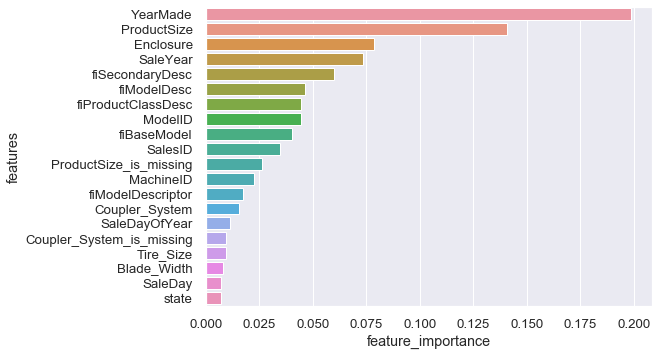

In [117]:
plot_features(x_train.columns, ideal_model.feature_importances_)

In [118]:
sum(ideal_model.feature_importances_)

1.0

In [122]:
bulldozers_df.ProductSize.isna().sum()

216605

In [120]:
bulldozers_temp.ProductSize.value_counts()

0    216605
4     64342
3     51297
6     27057
5     25721
2     21396
1      6280
Name: ProductSize, dtype: int64

## Re-Examining The Year Column

Before we noticed that the year column had a minimum value of 1000. And since it is unlikely that this tractor was made in the first millennium, let's set this value to NAN and see if it improves the score.

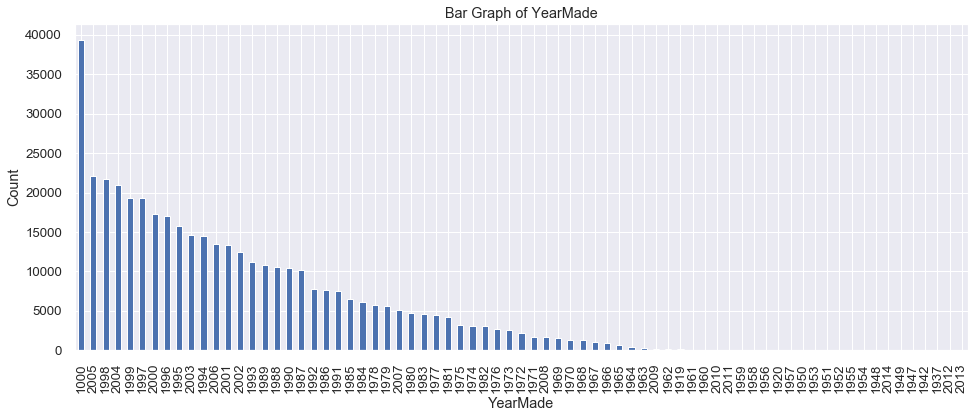

In [224]:
#Visualising the Year Made column
bulldozers_temp.YearMade.value_counts().plot(kind = "bar",figsize = (16, 6))#sort_values(ascending = True)
plt.title("Bar Graph of YearMade")
plt.ylabel("Count")
plt.xlabel("YearMade")
plt.show()

In [201]:
# Preparing the data for processing, this time changing the '1000' value in the YearMade
# column to NAN

def process_data_1000(df):
    df["SaleYear"] = df.saledate.dt.year
    df["SaleMonth"] = df.saledate.dt.month
    df["SaleDay"] = df.saledate.dt.day
    df["SaleDayOfWeek"] = df.saledate.dt.dayofweek
    df["SaleDayOfYear"] = df.saledate.dt.dayofyear
    
    #drop original saledate
    df.drop("saledate", axis = 1, inplace = True)
    
    #replace values in the year column equal to 1000
    df.YearMade.replace(1000, np.nan, inplace = True)

    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
            #Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1
            
                    
    return df


In [202]:
bulldozers_temp_1000 = bulldozers_df.copy()
bulldozers_temp_1000 = process_data_1000(bulldozers_temp_1000)
bulldozers_temp_1000.T

205615   274835   141296   212552   62755   \
SalesID                       1646770  1821514  1505138  1671174  1329056   
SalePrice                        9500    14000    50000    16000    22000   
MachineID                     1126363  1194089  1473654  1327630  1336053   
ModelID                          8434    10150     4139     8591     4089   
datasource                        132      132      132      132      132   
...                               ...      ...      ...      ...      ...   
Backhoe_Mounting_is_missing     False     True    False     True    False   
Blade_Type_is_missing           False     True    False     True    False   
Travel_Controls_is_missing      False     True    False     True    False   
Differential_Type_is_missing     True    False     True    False     True   
Steering_Controls_is_missing     True    False     True    False     True   

                               54653    81383    204924   135376   113390  \
SalesID                       1301884  1379228  1645390  1493279  1449549   
SalePrice                       23500    31000    11750    63000    13000   
MachineID                     1182999  1082797  1527216  1363756  1289412   
ModelID                          4123     7620     8202     2759     3356   
datasource                        132      132      132      132      132   
...                               ...      ...      ...      ...      ...   
Backhoe_Mounting_is_missing     False     True     True    False     True   
Blade_Type_is_missing           False     True     True    False     True   
Travel_Controls_is_missing      False     True     True    False     True   
Differential_Type_is_missing     True    False    False     True     True   
Steering_Controls_is_missing     True    False    False     True     True   

                              ...   409202   408976   411695   411319  \
SalesID                       ...  6283634  6282337  6311321  6306476   
SalePrice                     ...    35000     7500    13000    53000   
MachineID                     ...  1930870  1928688  1823846  1278794   
ModelID                       ...     4701    22072    17311     9114   
datasource                    ...      149      149      149      149   
...                           ...      ...      ...      ...      ...   
Backhoe_Mounting_is_missing   ...     True     True     True     True   
Blade_Type_is_missing         ...     True     True     True     True   
Travel_Controls_is_missing    ...     True     True     True     True   
Differential_Type_is_missing  ...    False     True     True    False   
Steering_Controls_is_missing  ...    False     True     True    False   

                               408889   410879   412476   411927   407124  \
SalesID                       6281219  6302984  6324811  6313029  6266251   
SalePrice                       39000    16000     6000    16000    55000   
MachineID                     1792049  1915521  1919104  1918416   509560   
ModelID                         13976     5266    19330    17244     3357   
datasource                        149      149      149      149      149   
...                               ...      ...      ...      ...      ...   
Backhoe_Mounting_is_missing      True    False     True     True     True   
Blade_Type_is_missing            True    False     True     True     True   
Travel_Controls_is_missing       True    False     True     True     True   
Differential_Type_is_missing     True     True     True     True     True   
Steering_Controls_is_missing     True     True     True     True     True   

                               409203  
SalesID                       6283635  
SalePrice                       34000  
MachineID                     1869284  
ModelID                          4701  
datasource                        149  
...                               ...  
Backhoe_Mounting_is_missing      True  
Blade_Type_is_missing            True  
Travel_Controls_is_

In [203]:
%%time

models = {"RandomForestRegressor" : RandomForestRegressor(n_jobs = -1),
         "LinearRegression" : LinearRegression (n_jobs = -1)}

#Setting our training and validation sets by date
bulldozers_train = bulldozers_temp_1000[bulldozers_temp.SaleYear != 2012]
bulldozers_val = bulldozers_temp_1000[bulldozers_temp.SaleYear == 2012]


x_train_1000, y_train_1000 = bulldozers_train.drop("SalePrice", axis = 1), bulldozers_train.SalePrice
x_valid_1000, y_valid_1000 = bulldozers_val.drop("SalePrice", axis = 1), bulldozers_val.SalePrice


fit_model(models, x_train_1000, x_valid_1000, y_train_1000, y_valid_1000)

CPU times: user 21min 25s, sys: 25.4 s, total: 21min 50s
Wall time: 9min 34s


{'RandomForestRegressor': 0.874788509767799,
 'LinearRegression': 0.5359587999377573}

Since the RandomForestRegressor model has greatly out performed the LinearRegression model, we will continue with the RandomForestRegressor model as our model of choice.

In [204]:
%%time
 
models = {"RandomForestRegressor" : RandomForestRegressor(n_jobs = -1, max_samples = 10000)}

fit_model(models, x_train_1000, x_valid_1000, y_train_1000, y_valid_1000)

CPU times: user 47.6 s, sys: 2.12 s, total: 49.8 s
Wall time: 28.4 s


{'RandomForestRegressor': 0.8375724777974018}

In [205]:
%%time
model_1000 = RandomForestRegressor(n_jobs = -1, max_samples = 10000)
model_1000.fit(x_train_1000, y_train_1000)
show_scores(model_1000)

CPU times: user 1min 15s, sys: 3.27 s, total: 1min 19s
Wall time: 50.7 s


{'Training MAE': 5555.338435973823,
 'Valid MAE': 6983.818183703448,
 'Training RMSLE': 0.2577977920481357,
 'Valid RMSLE': 0.28642272745345737,
 'Training R^2': 0.8612492016426665,
 'Valid R^2': 0.8393569444925734}

In [206]:
%%time

rf_grid_1000 = {"n_estimators": np.arange(10, 100, 10),
          "max_depth": [None, 3,5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1,20,2),
          "max_features": [0.5, 1, "sqrt", "auto"],
          "max_samples": [10000]}

rs_model_1000 = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions = rf_grid,
                             n_iter = 100,
                             cv = 5,
                             verbose = True)

rs_model_1000.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 80.8min finished


CPU times: user 53min 57s, sys: 4min 56s, total: 58min 53s
Wall time: 1h 21min 6s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [207]:
rs_model_1000.best_params_

{'n_estimators': 50,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [208]:
show_scores(rs_model_1000)

{'Training MAE': 5869.945498343414,
 'Valid MAE': 7239.632644522298,
 'Training RMSLE': 0.2687504787347316,
 'Valid RMSLE': 0.293871156360826,
 'Training R^2': 0.8452879929138486,
 'Valid R^2': 0.8274531336769039}

In [222]:
%%time

# inputing the ideal hyperparameters and setting the max samples to None
ideal_model_1000 = RandomForestRegressor(n_estimators = 50,
                                    min_samples_split = 18,
                                    min_samples_leaf = 1,
                                    max_samples = None,
                                    max_features = 0.5,
                                    max_depth = None)

ideal_model_1000.fit(x_train_1000, y_train_1000)

show_scores(ideal_model_1000)

CPU times: user 4min 23s, sys: 18.1 s, total: 4min 42s
Wall time: 12min 45s


{'Training MAE': 3196.9856551023727,
 'Valid MAE': 5924.79623893637,
 'Training RMSLE': 0.1545431141352196,
 'Valid RMSLE': 0.24498298449968792,
 'Training R^2': 0.9523826921762492,
 'Valid R^2': 0.8830361929074745}

In [ ]:
def preprocess_data_1000(df_test, df_model):
    df_test["SaleYear"] = df_test.saledate.dt.year
    df_test["SaleMonth"] = df_test.saledate.dt.month
    df_test["SaleDay"] = df_test.saledate.dt.day
    df_test["SaleDayOfWeek"] = df_test.saledate.dt.dayofweek
    df_test["SaleDayOfYear"] = df_test.saledate.dt.dayofyear
    
    #drop original saledate
    df_test.drop("saledate", axis = 1, inplace = True)
    
    #replace values in the year column equal to 1000
    df.YearMade.replace(1000, np.nan, inplace = True)
    
    for label, content in df_test.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df_test[label+"_is_missing"] = pd.isnull(content)
                df_test[label] = content.fillna(content.median())
                
            #Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df_test[label+"_is_missing"] = pd.isnull(content)
            df_test[label] = pd.Categorical(content).codes + 1
            
            #Checks for missing columns in the test set and ensures 
            # test and training has the same features
        for label, content in df_model.items():
            if label not in df_test.columns.tolist():
                if label != "SalePrice":
                    df_test[label] = False
                    
    return df_test


In [216]:
bulldozers_test_1000 = pd.read_csv("bluebook-for-bulldozers/Test.csv", parse_dates = ["saledate"])
bulldozers_test_1000 = preprocess_data_1000(bulldozers_test_1000, bulldozers_temp_1000)

In [217]:
bulldozers_test_1000.shape, bulldozers_temp.shape

((12457, 103), (412698, 103))

In [218]:
test_preds_1000 = ideal_model_1000.predict(bulldozers_test_1000)
bulldozers_preds_1000 = pd.DataFrame({"SalesID": bulldozers_test_1000.SalesID, "SalePrice" : test_preds_1000})
bulldozers_preds_1000


SalesID     SalePrice
0      1227829  18586.697572
1      1227844  18627.139207
2      1227847  51256.714934
3      1227848  62748.563384
4      1227863  60007.658992
...        ...           ...
12452  6643171  42065.766389
12453  6643173  12275.161540
12454  6643184  14062.453114
12455  6643186  17540.192279
12456  6643196  27397.872597

[12457 rows x 2 columns]

In [219]:
bulldozers_preds_1000.to_csv("Bulldozers_prediction_1000.csv", index = False)

# Conclusion

Finally we can compare our results. Without treating the YearMade value of 1000 as NAN, the Valid RMSLE score resulted in a value of 0.2431661867306153. When we did treat the year value of 1000 at NAN (as it is very unlikely that the bulldozer was made at that time) the Valid RMSLE resulted in a value of 0.24498298449968792, slightly worse than our original score.

Our model indicates that the main features that contributed to the sale price are YearMade and ProductSize.